# 单纯温度求平均

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

In [3]:
# file_dir = os.getcwd()
# raw_data_dir = os.path.join(file_dir, '/raw_data')
file_list = []

for root, dirs, files in os.walk('./raw_data'):
    for file in files:
        if os.path.splitext(file)[1] == '.csv':
        # 排除掉readme.md等非csv文件
            file_list.append(file)

print(file_list[-1])  
df_temp = pd.read_csv('./raw_data/'+file_list[-1])    

data_20190309_1413_1.csv


In [4]:
df_temp.shape

(106, 768)

C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


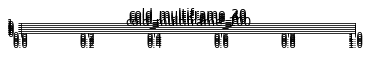

In [12]:
# 按等高线图画出温度分布
X, Y = np.meshgrid(np.linspace(0, 31, 32), np.linspace(0, 23, 24))
tmp_all = np.zeros([24, 32])
for l in range(df_temp.shape[0]):
    temperature = df_temp.iloc[l]
    temperature0 = np.zeros([24, 32]) 
    k = 0

    # 把温度点按照排成32*24,先排列（从右到左），再排行（从下到上）
    for i in range(24):
        for j in range(32):
            temperature0[-1-i, -1-j] = temperature[k] 
            #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
            k += 1
    
    # 多帧相加
    tmp_all += temperature0
            
    tmp_ave = tmp_all / (l + 1)            
    
    if (l+1) % 20 == 0:
        ax0 = fig.add_subplot(1, 1, 1)
#         fig = plt.figure(figsize=(5, 550))
        plt.subplot(df_temp.shape[0], 1, (l+1)/20)
        cmap=plt.get_cmap('rainbow')
        levels = MaxNLocator(nbins=20).tick_values(temperature0.min(), temperature0.max())  # 分成binb
        norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
        c = ax0.pcolormesh(X, Y, temperature0, cmap=cmap, norm=norm)
#         plt.contour(X, Y, tmp_ave, cmap='Spectral_r', levels=20)
#         cb = fig.colorbar(c)
#         cb.set_label('Temperature')
        plt.title('cold_multiframe_{}'.format(l+1))

plt.show()

# 从RGB三色道分别求平均

C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


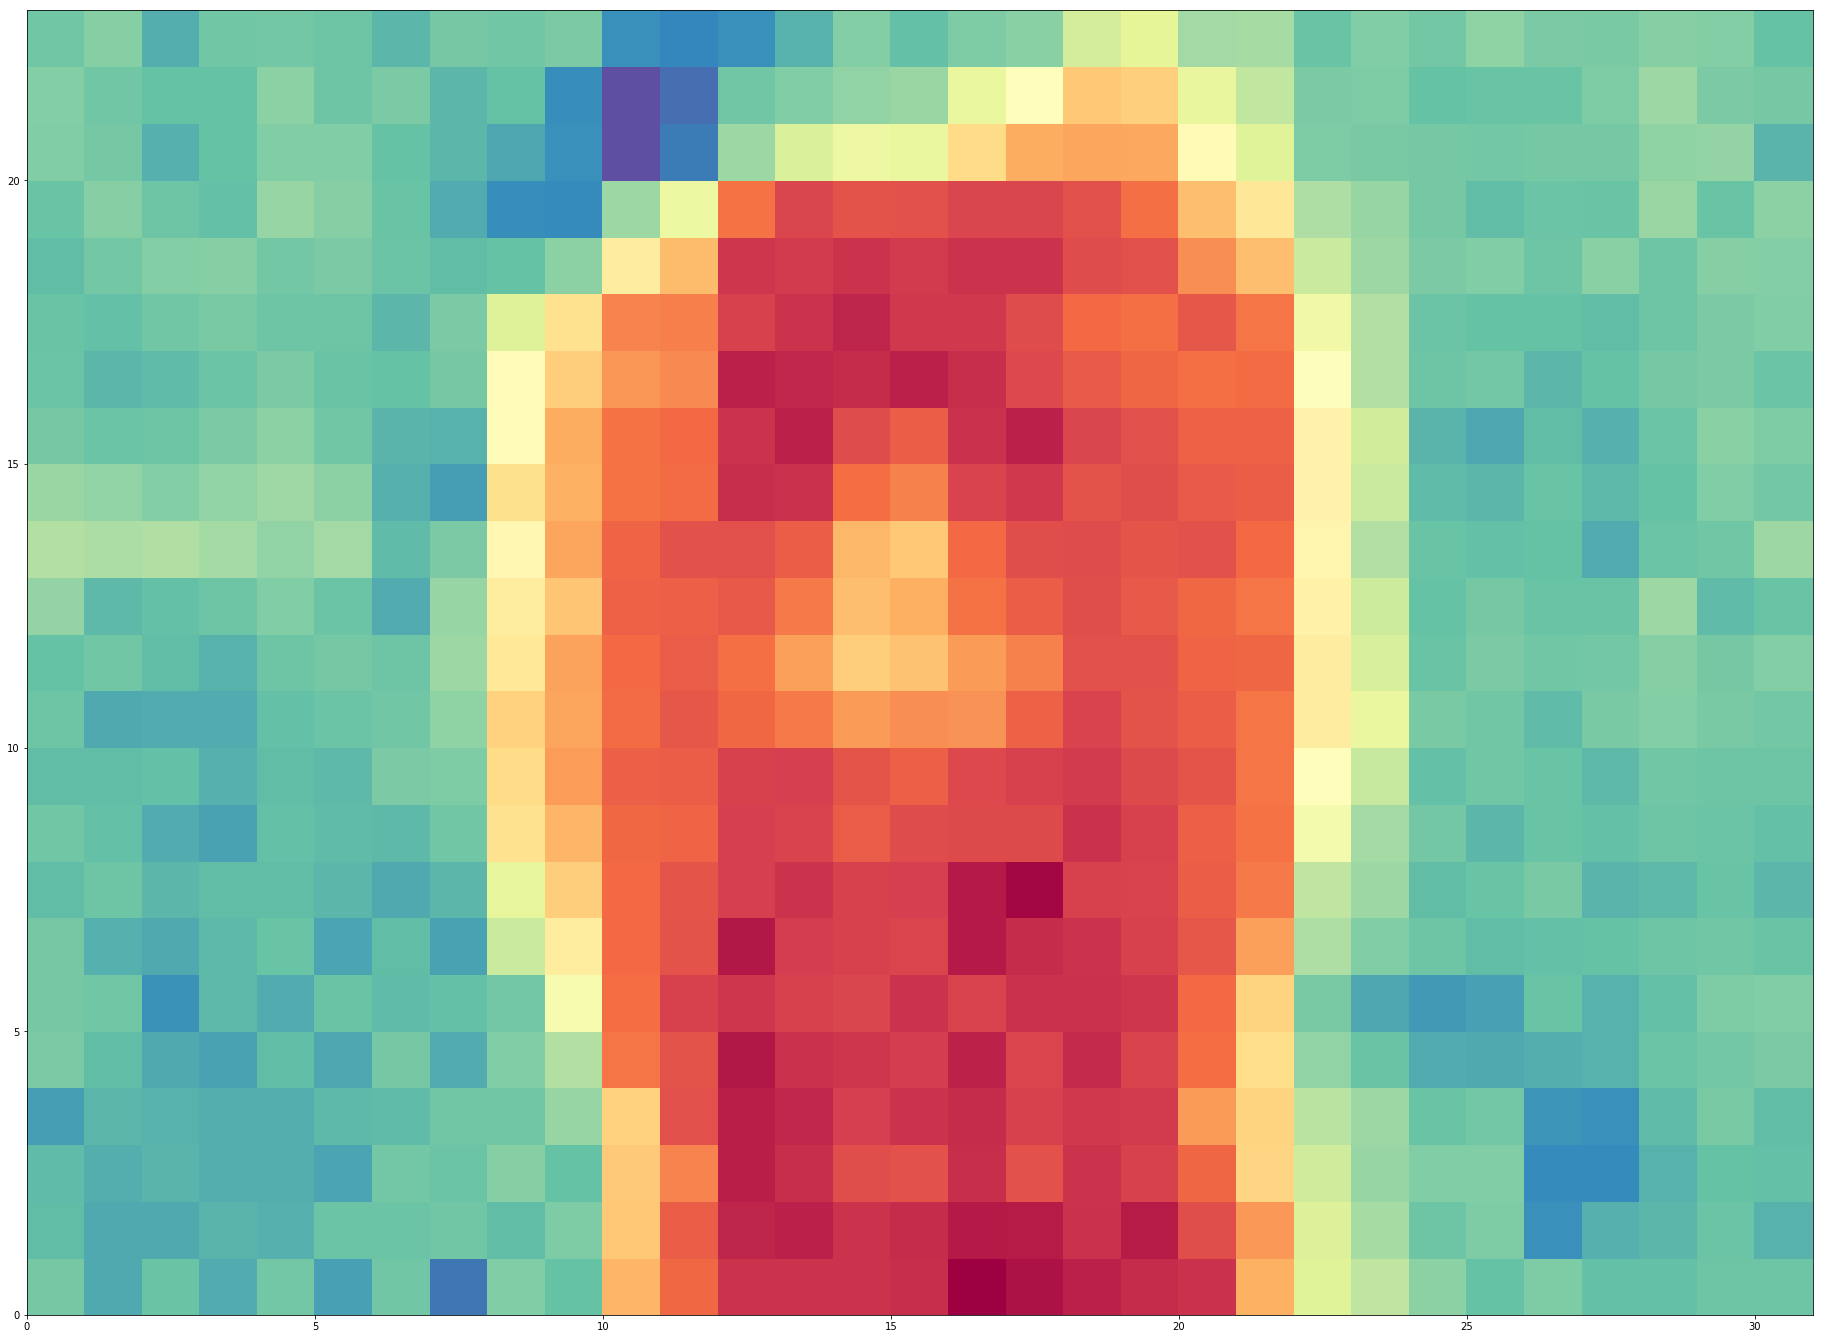

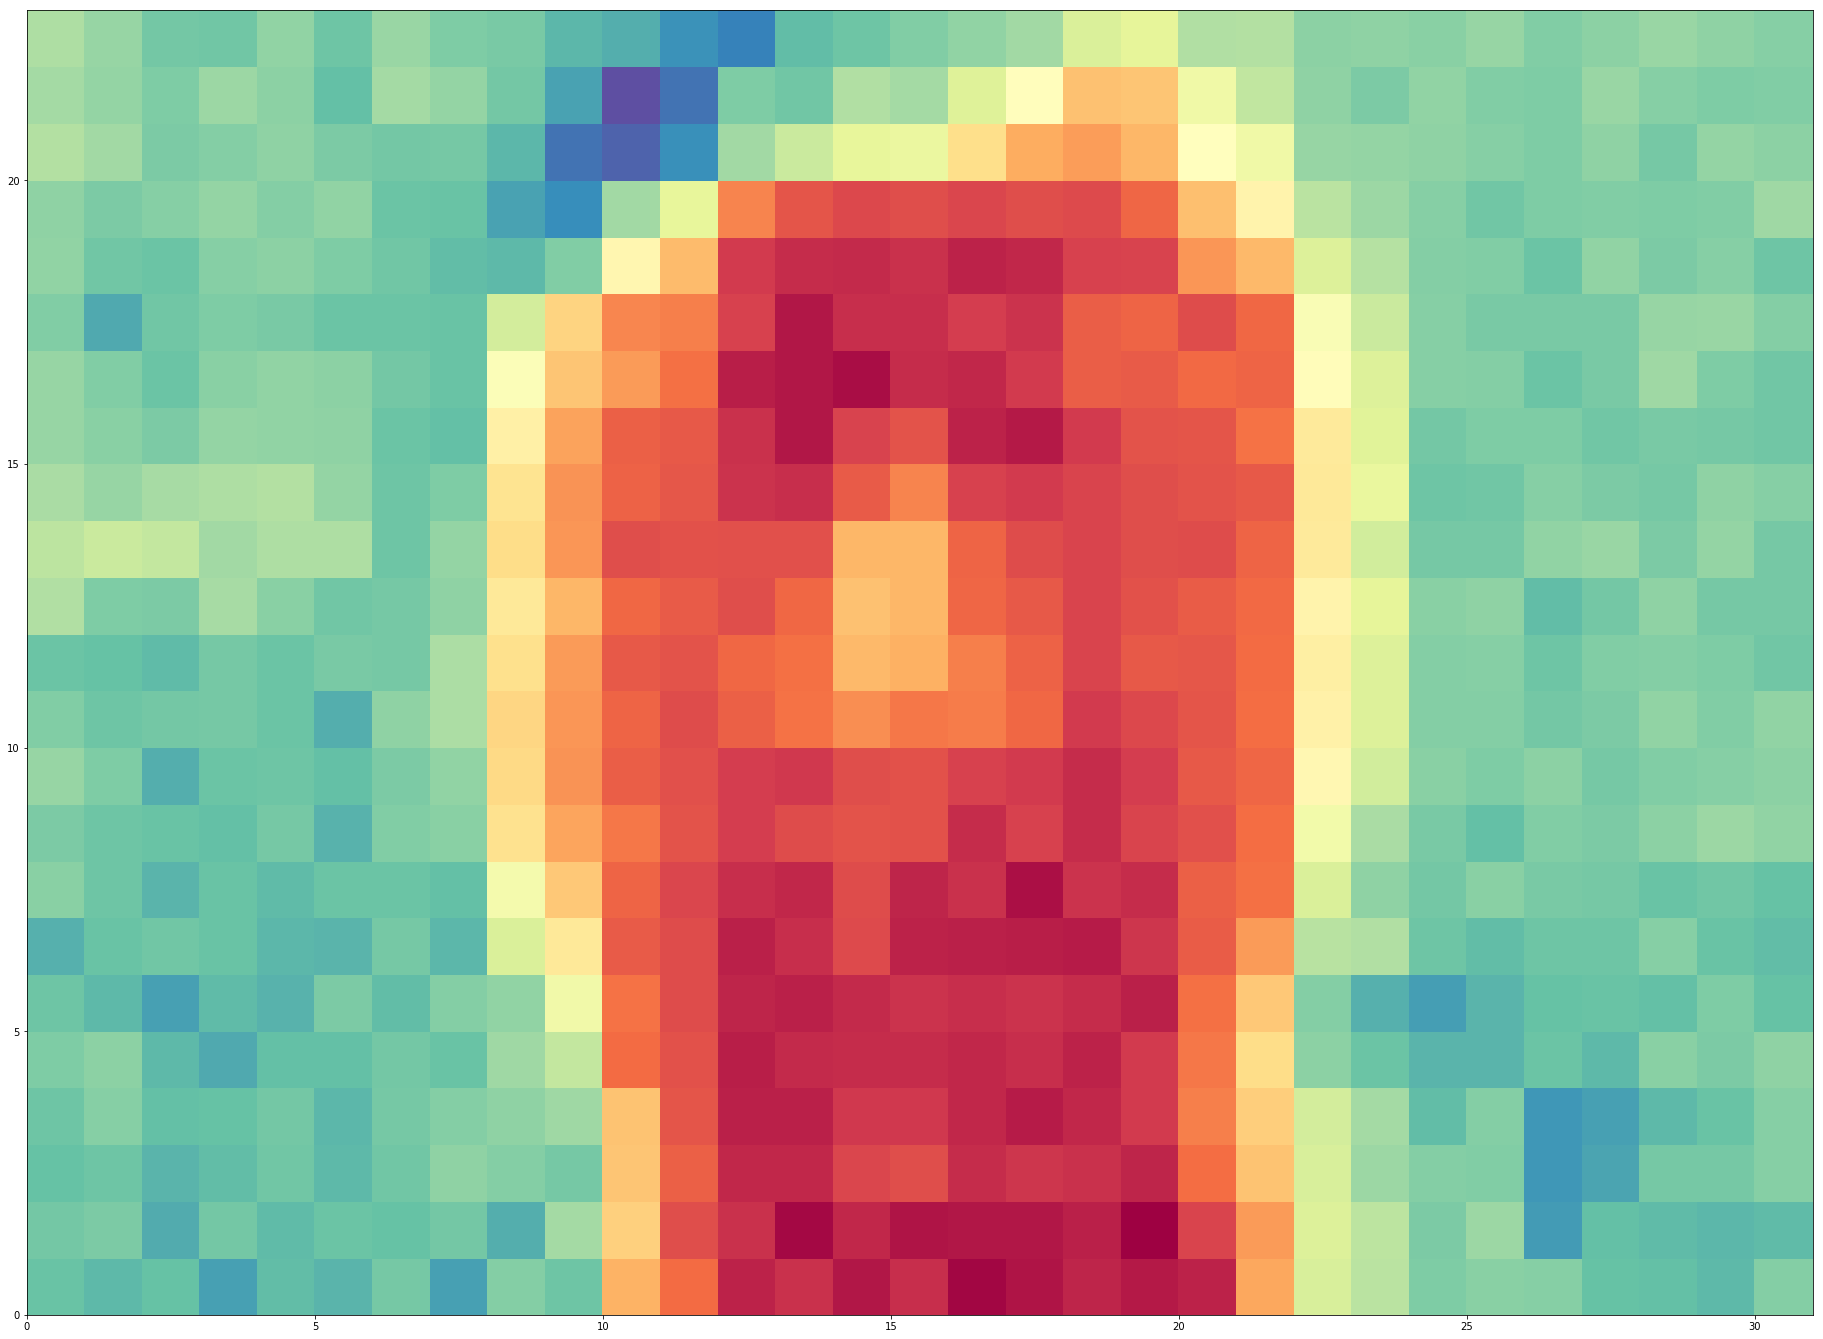

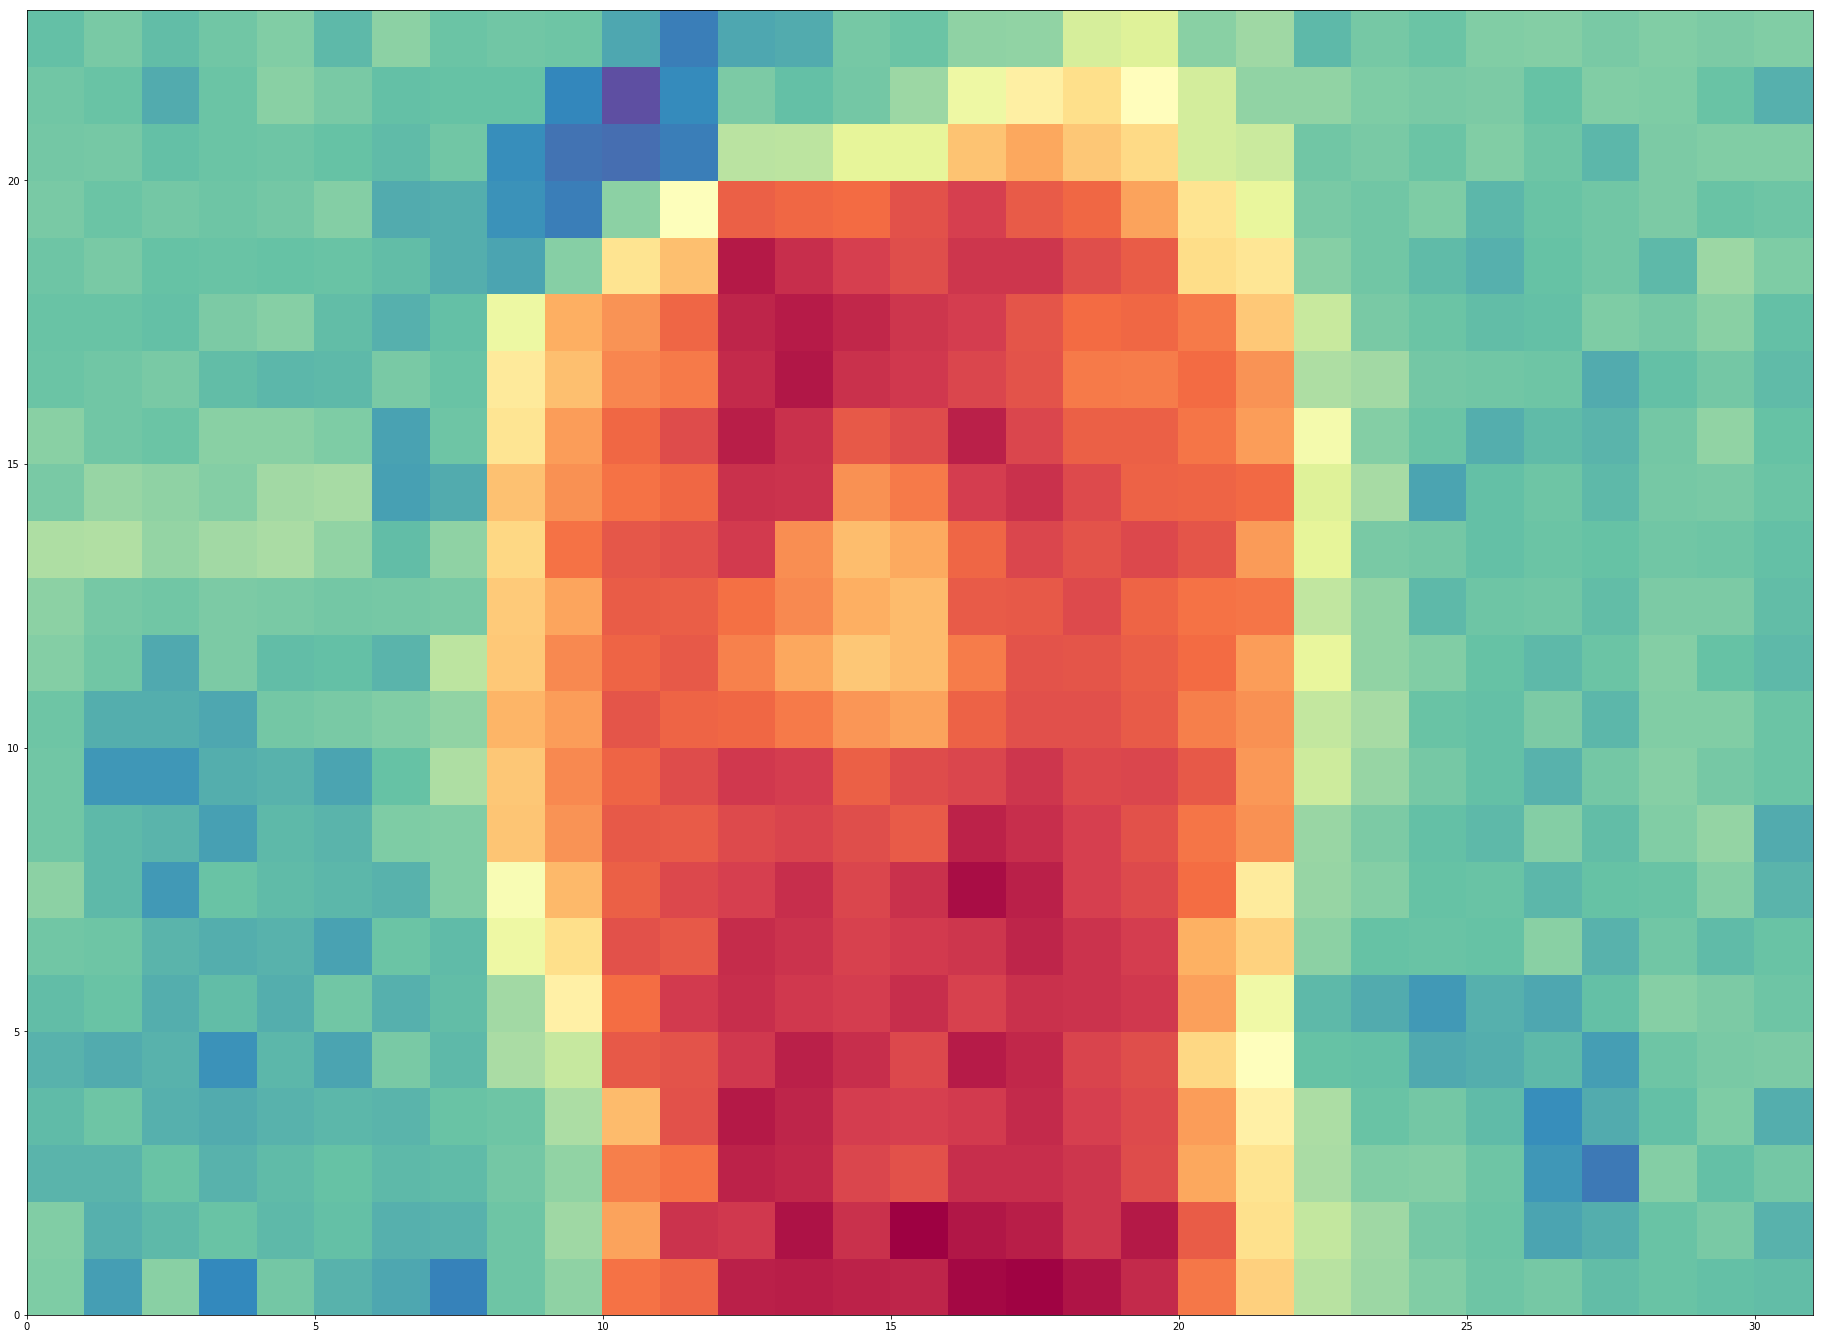

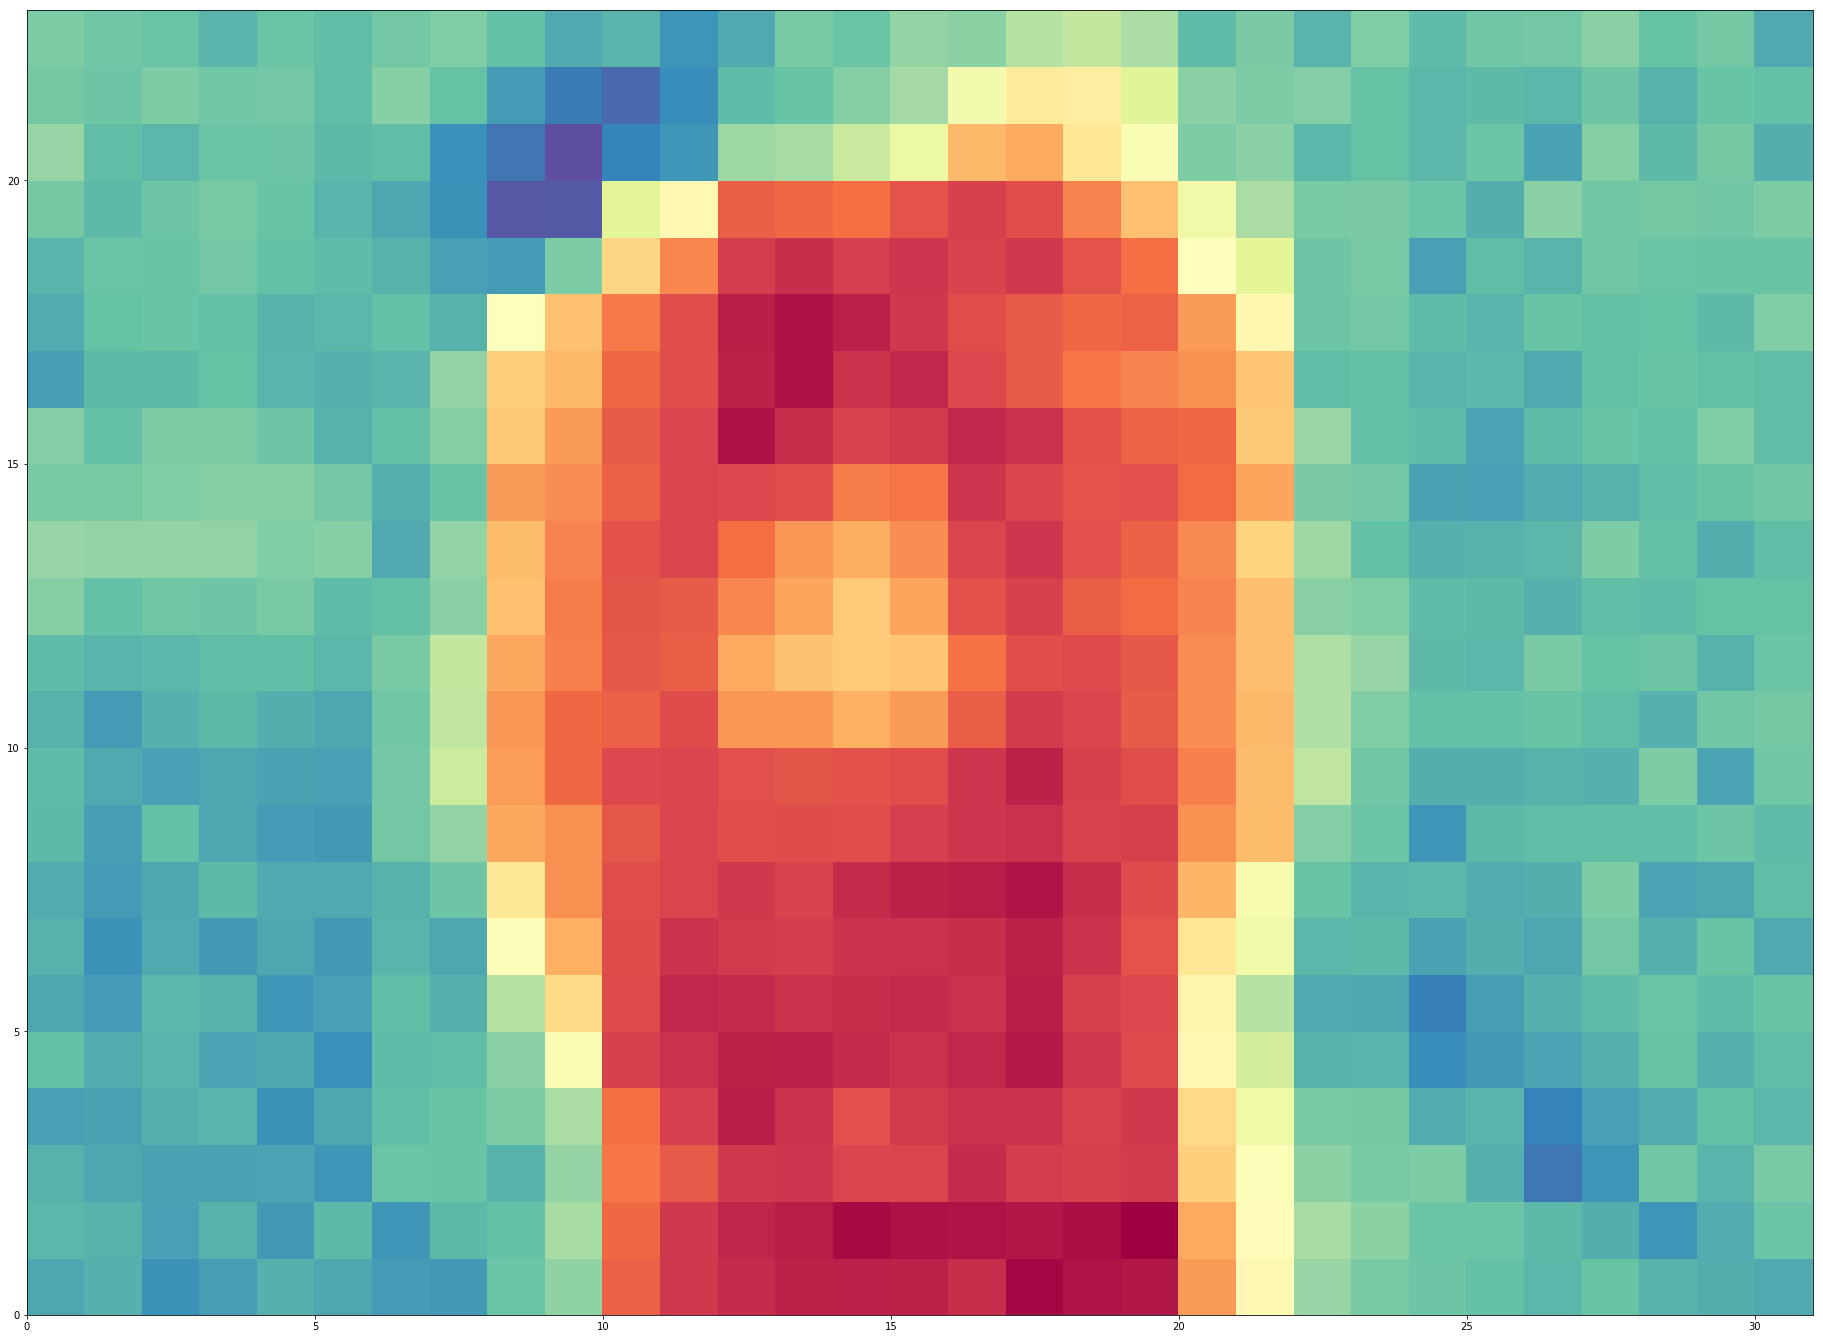

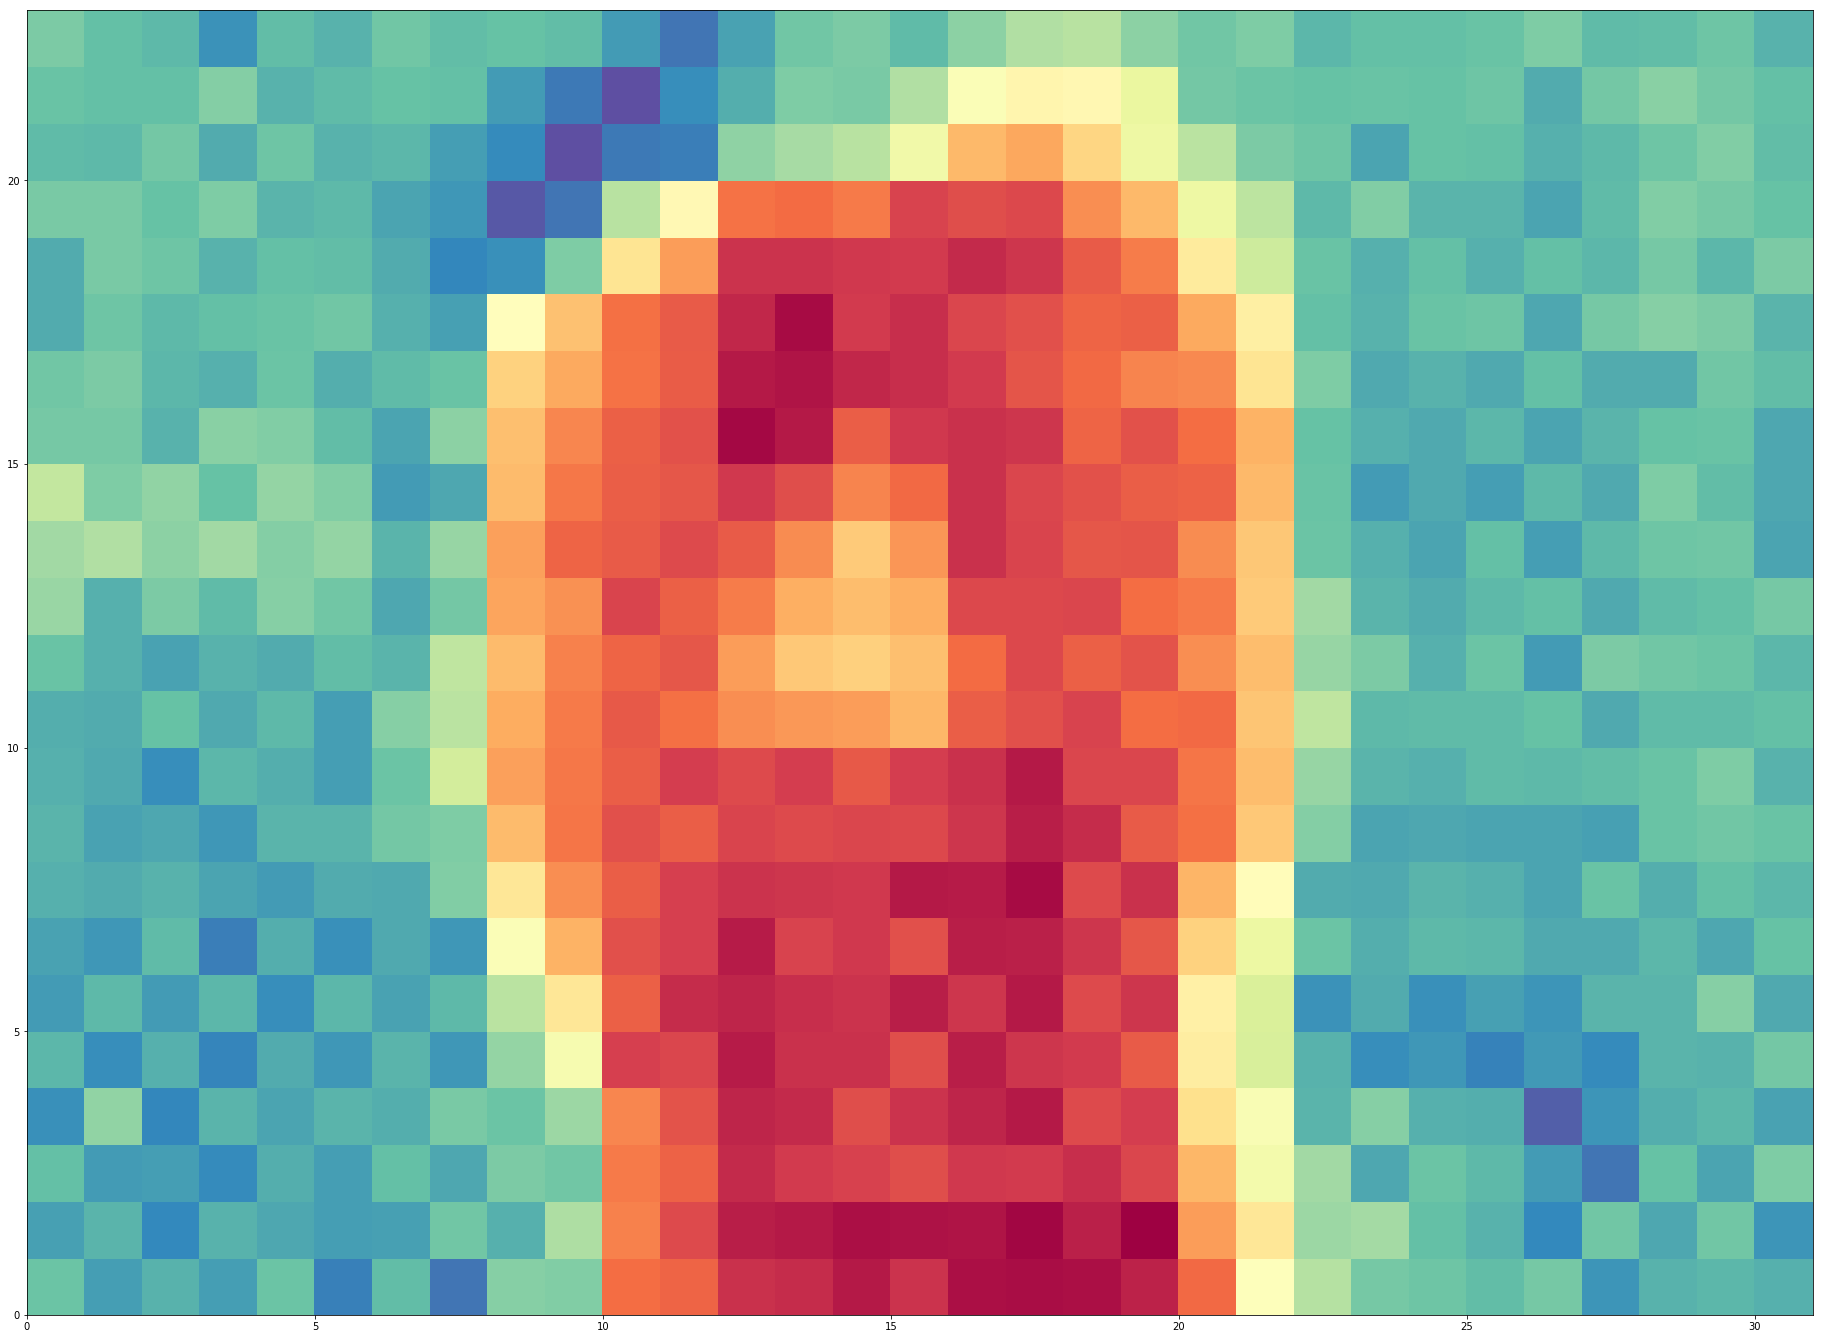

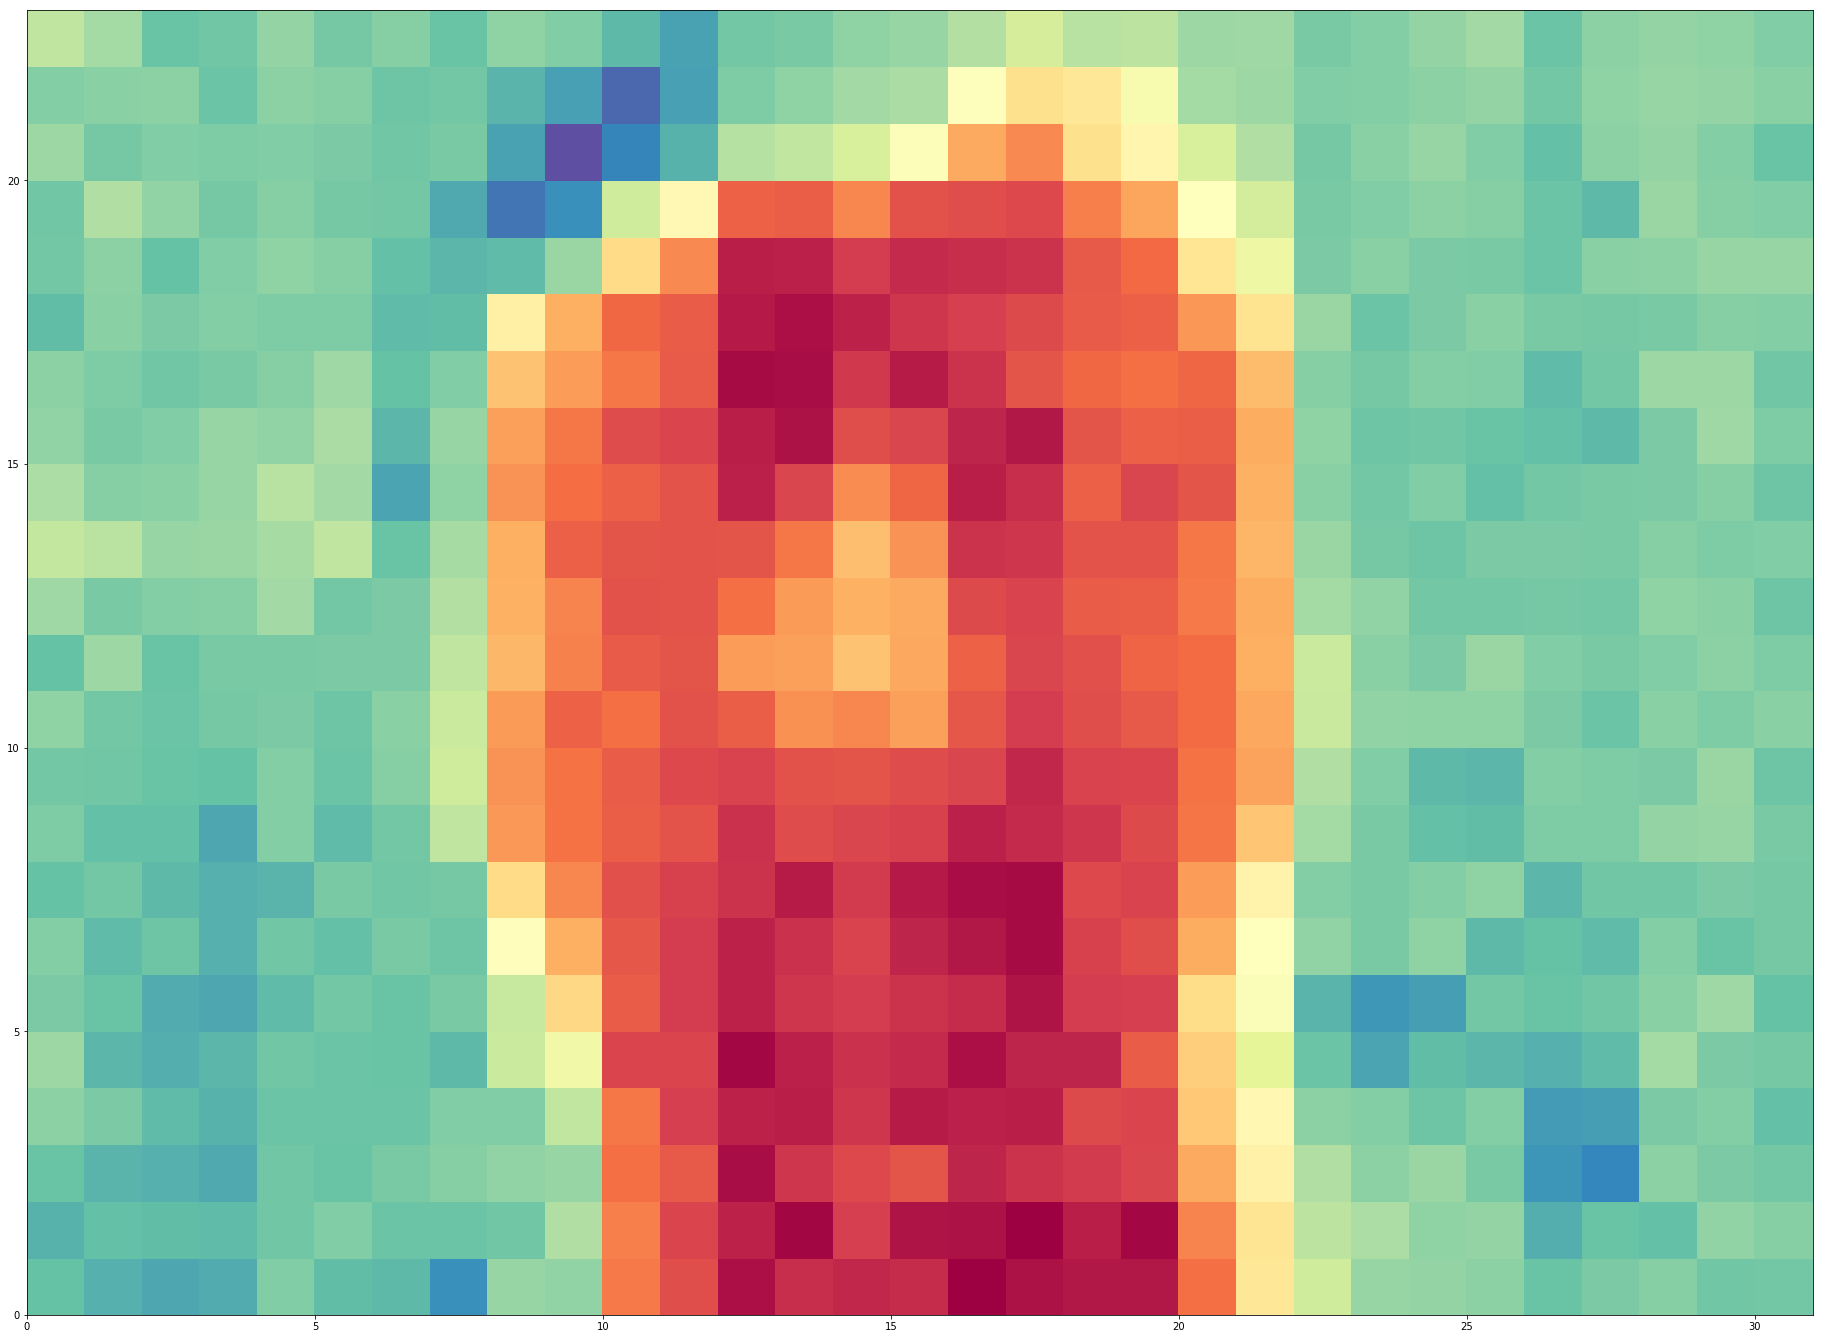

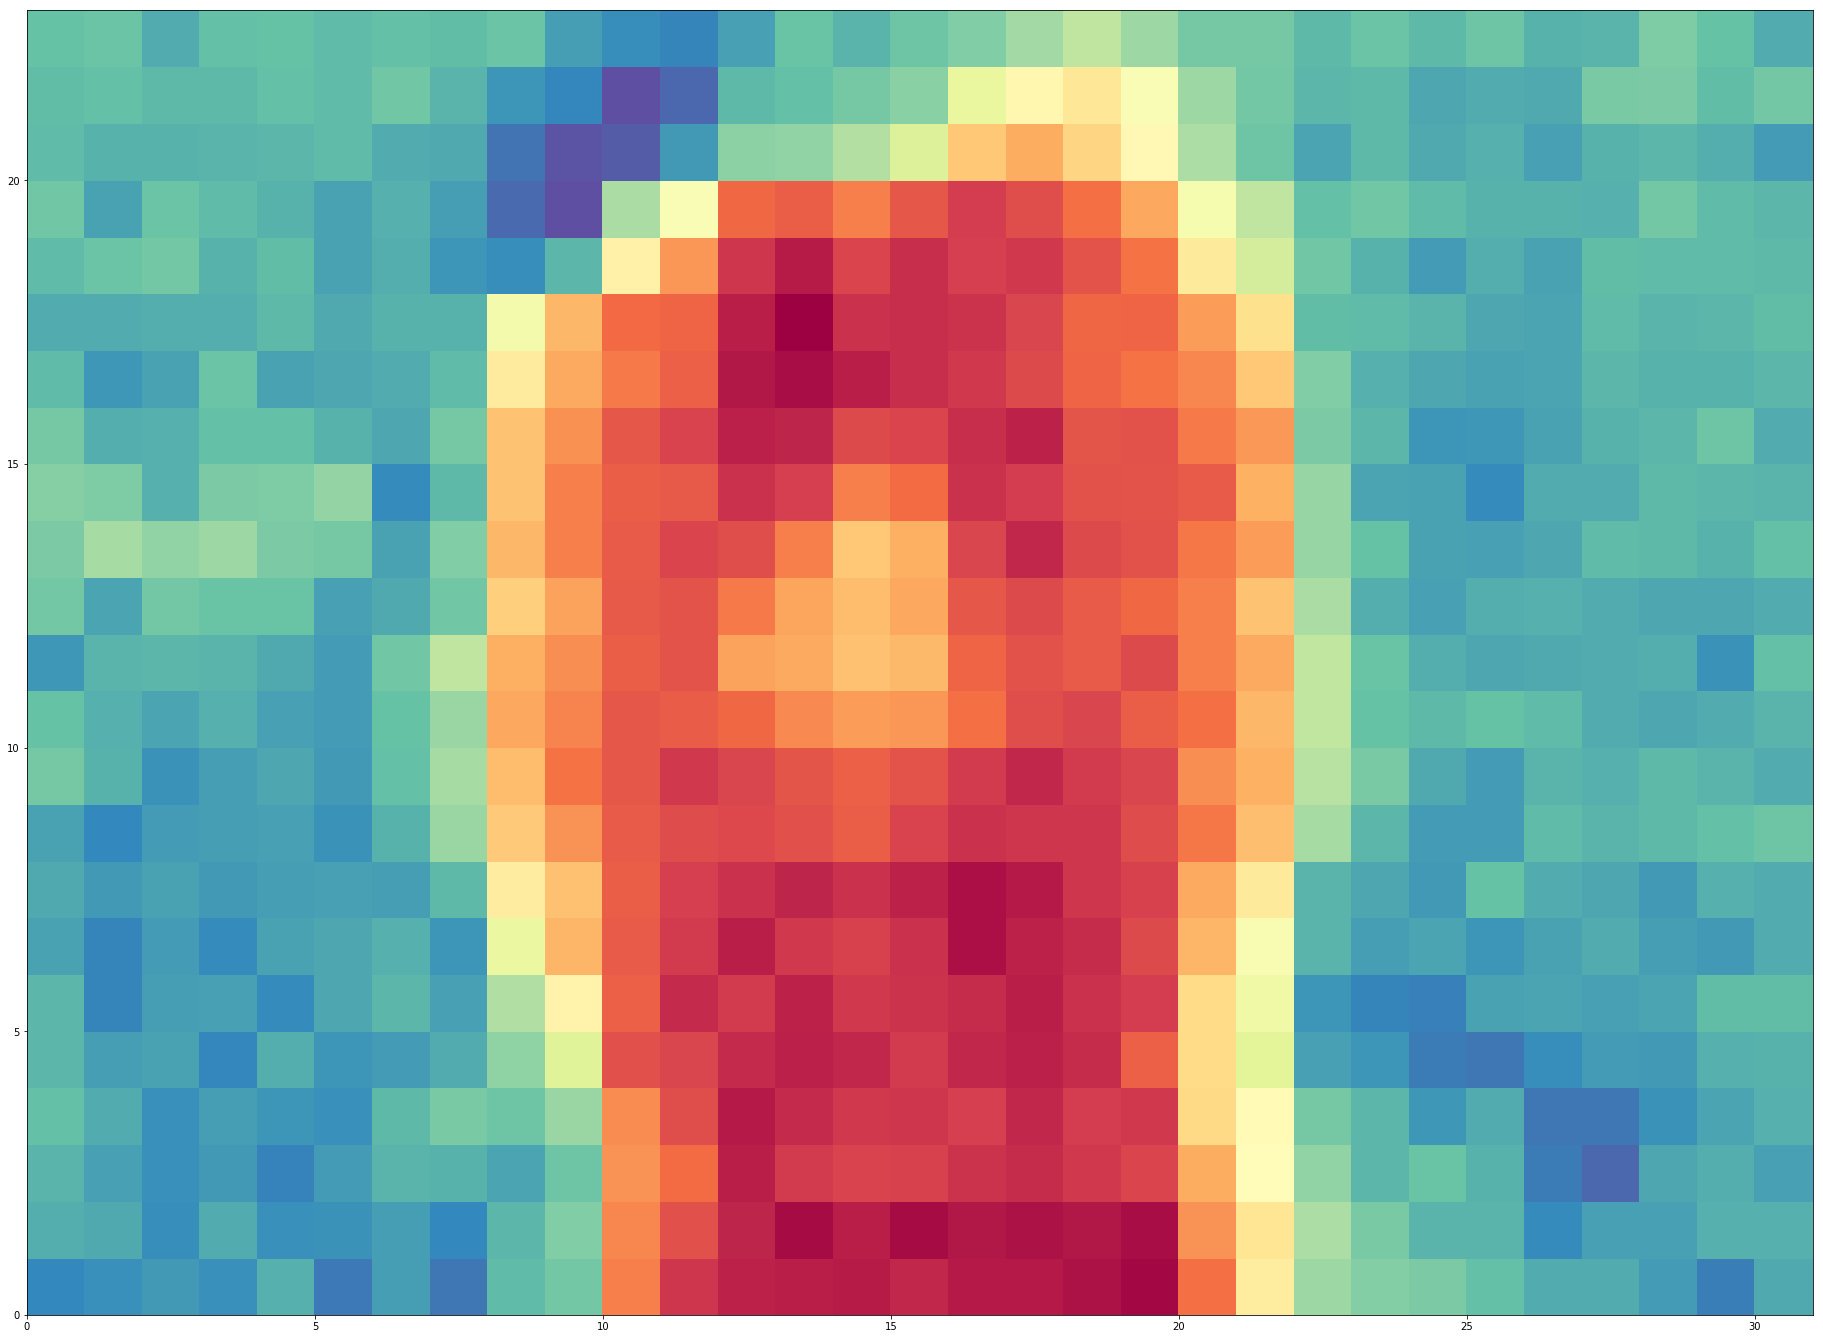

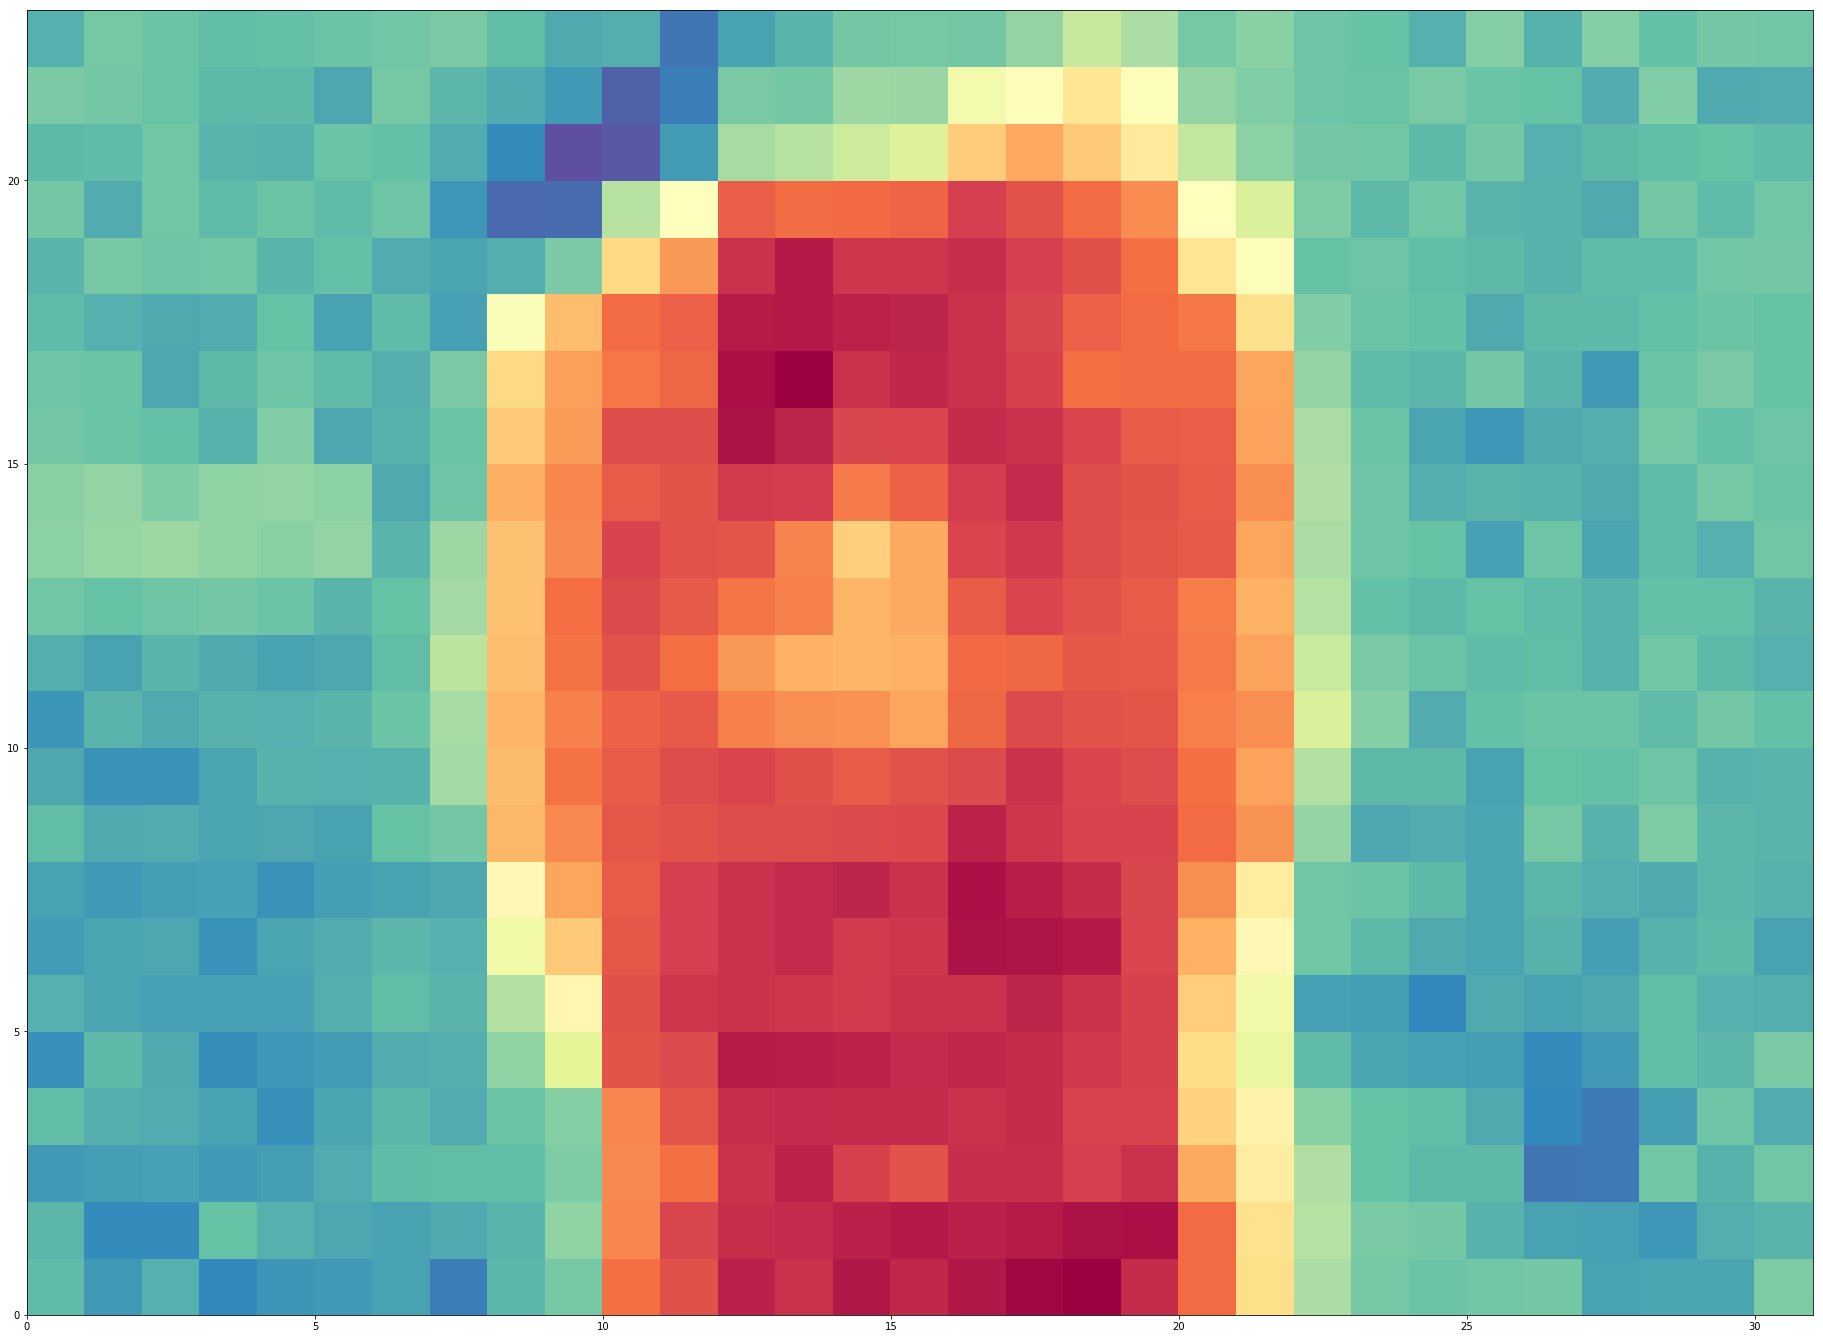

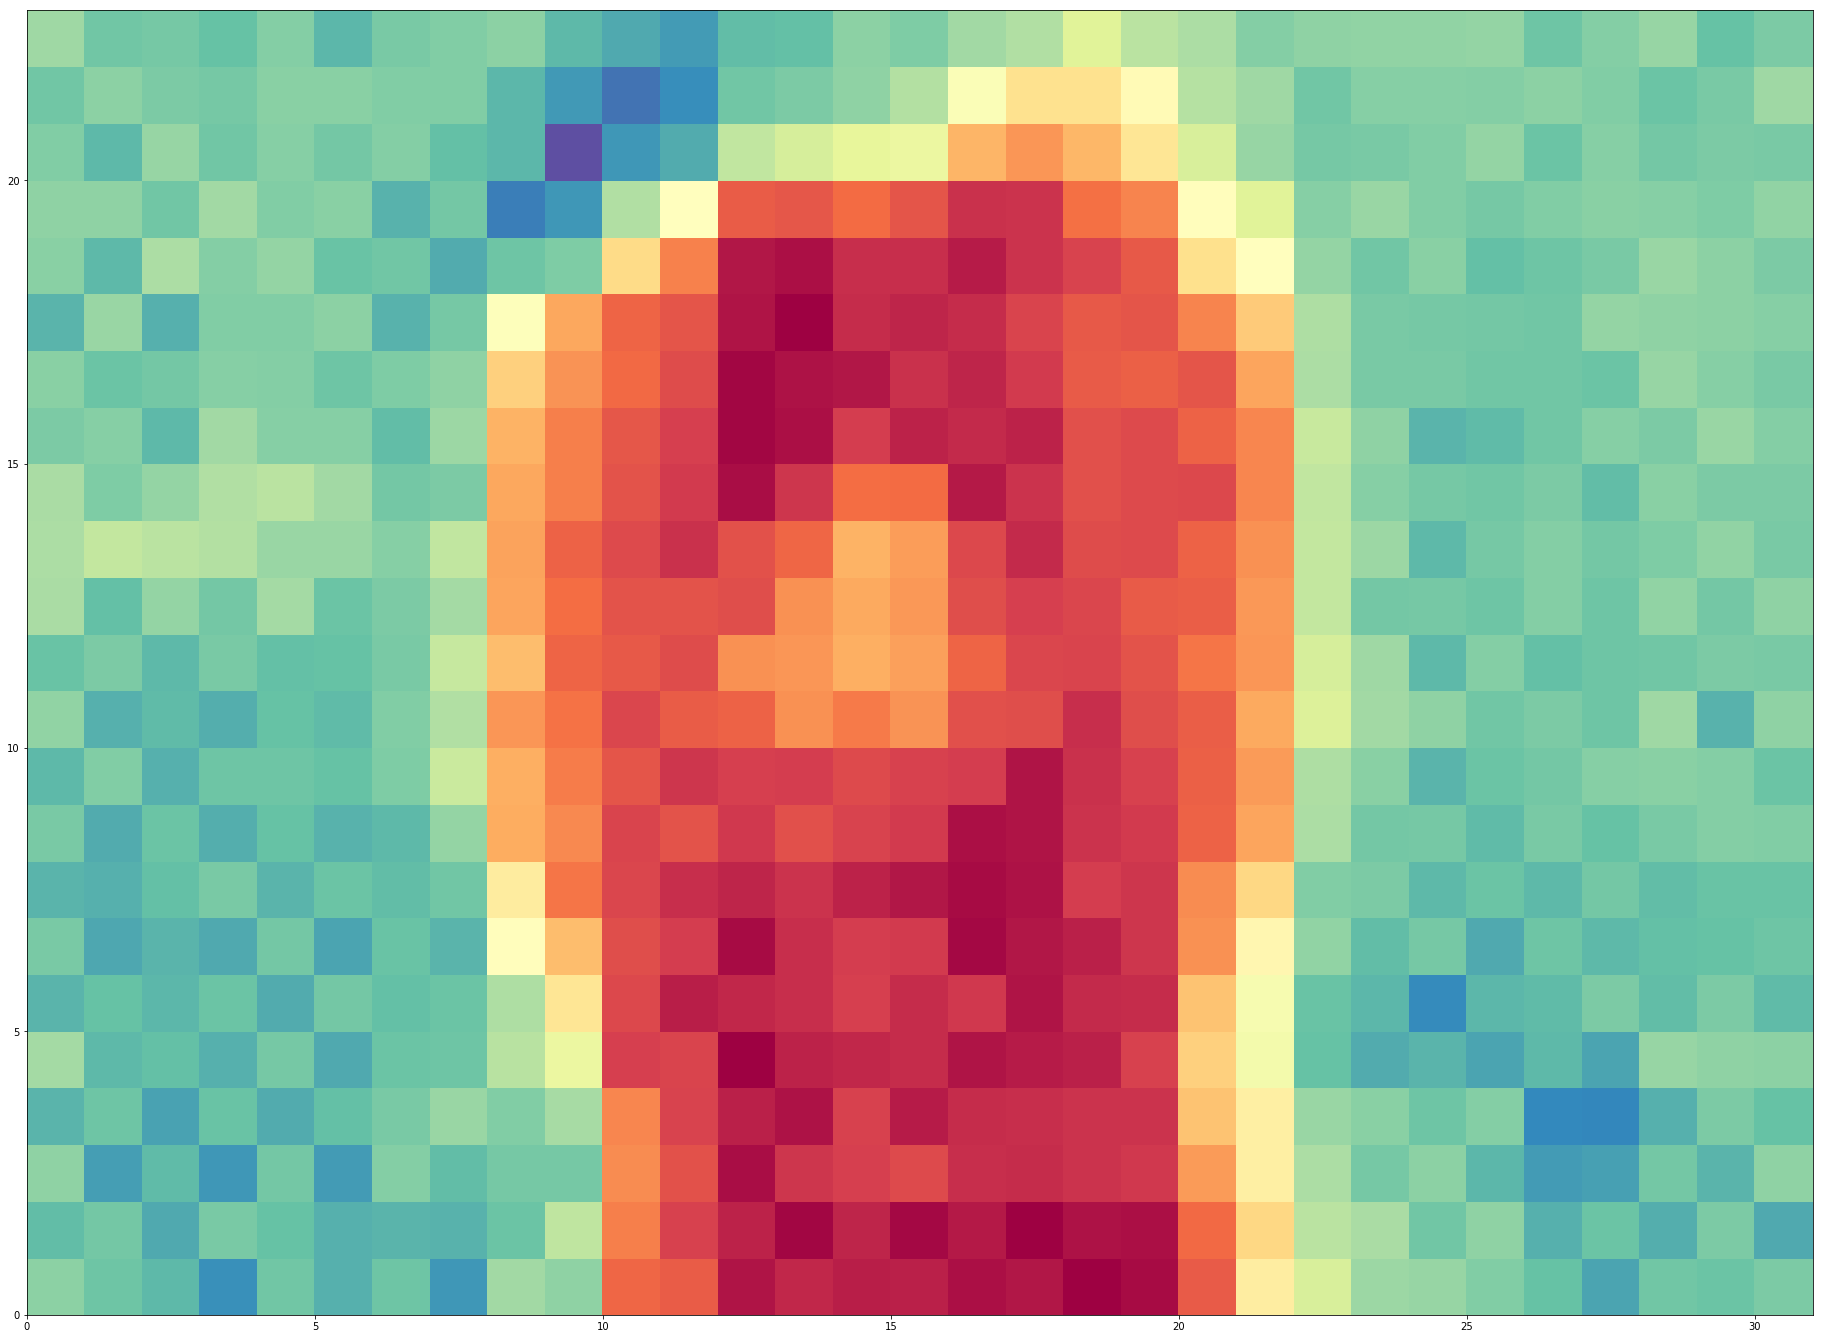

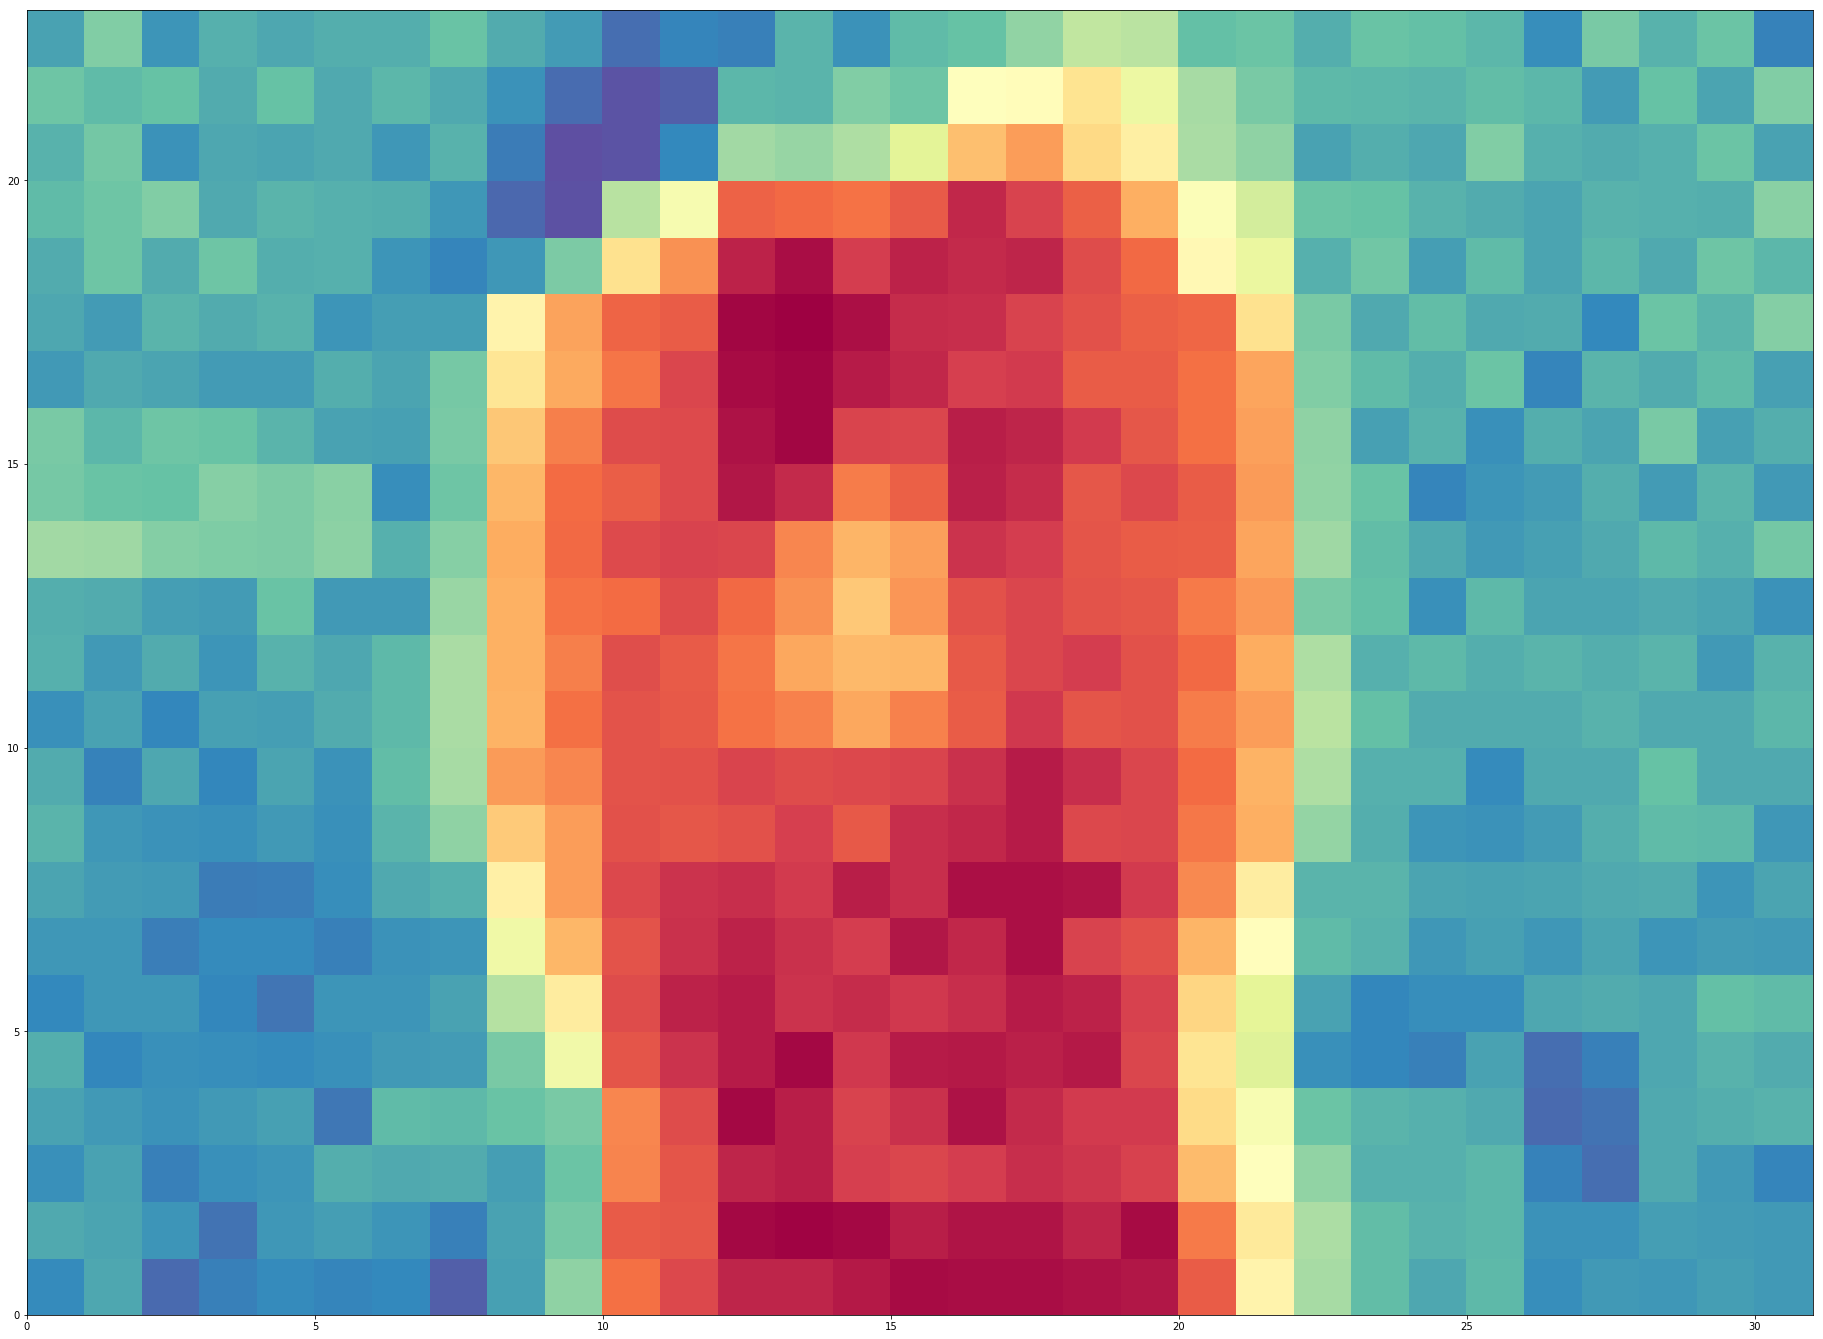

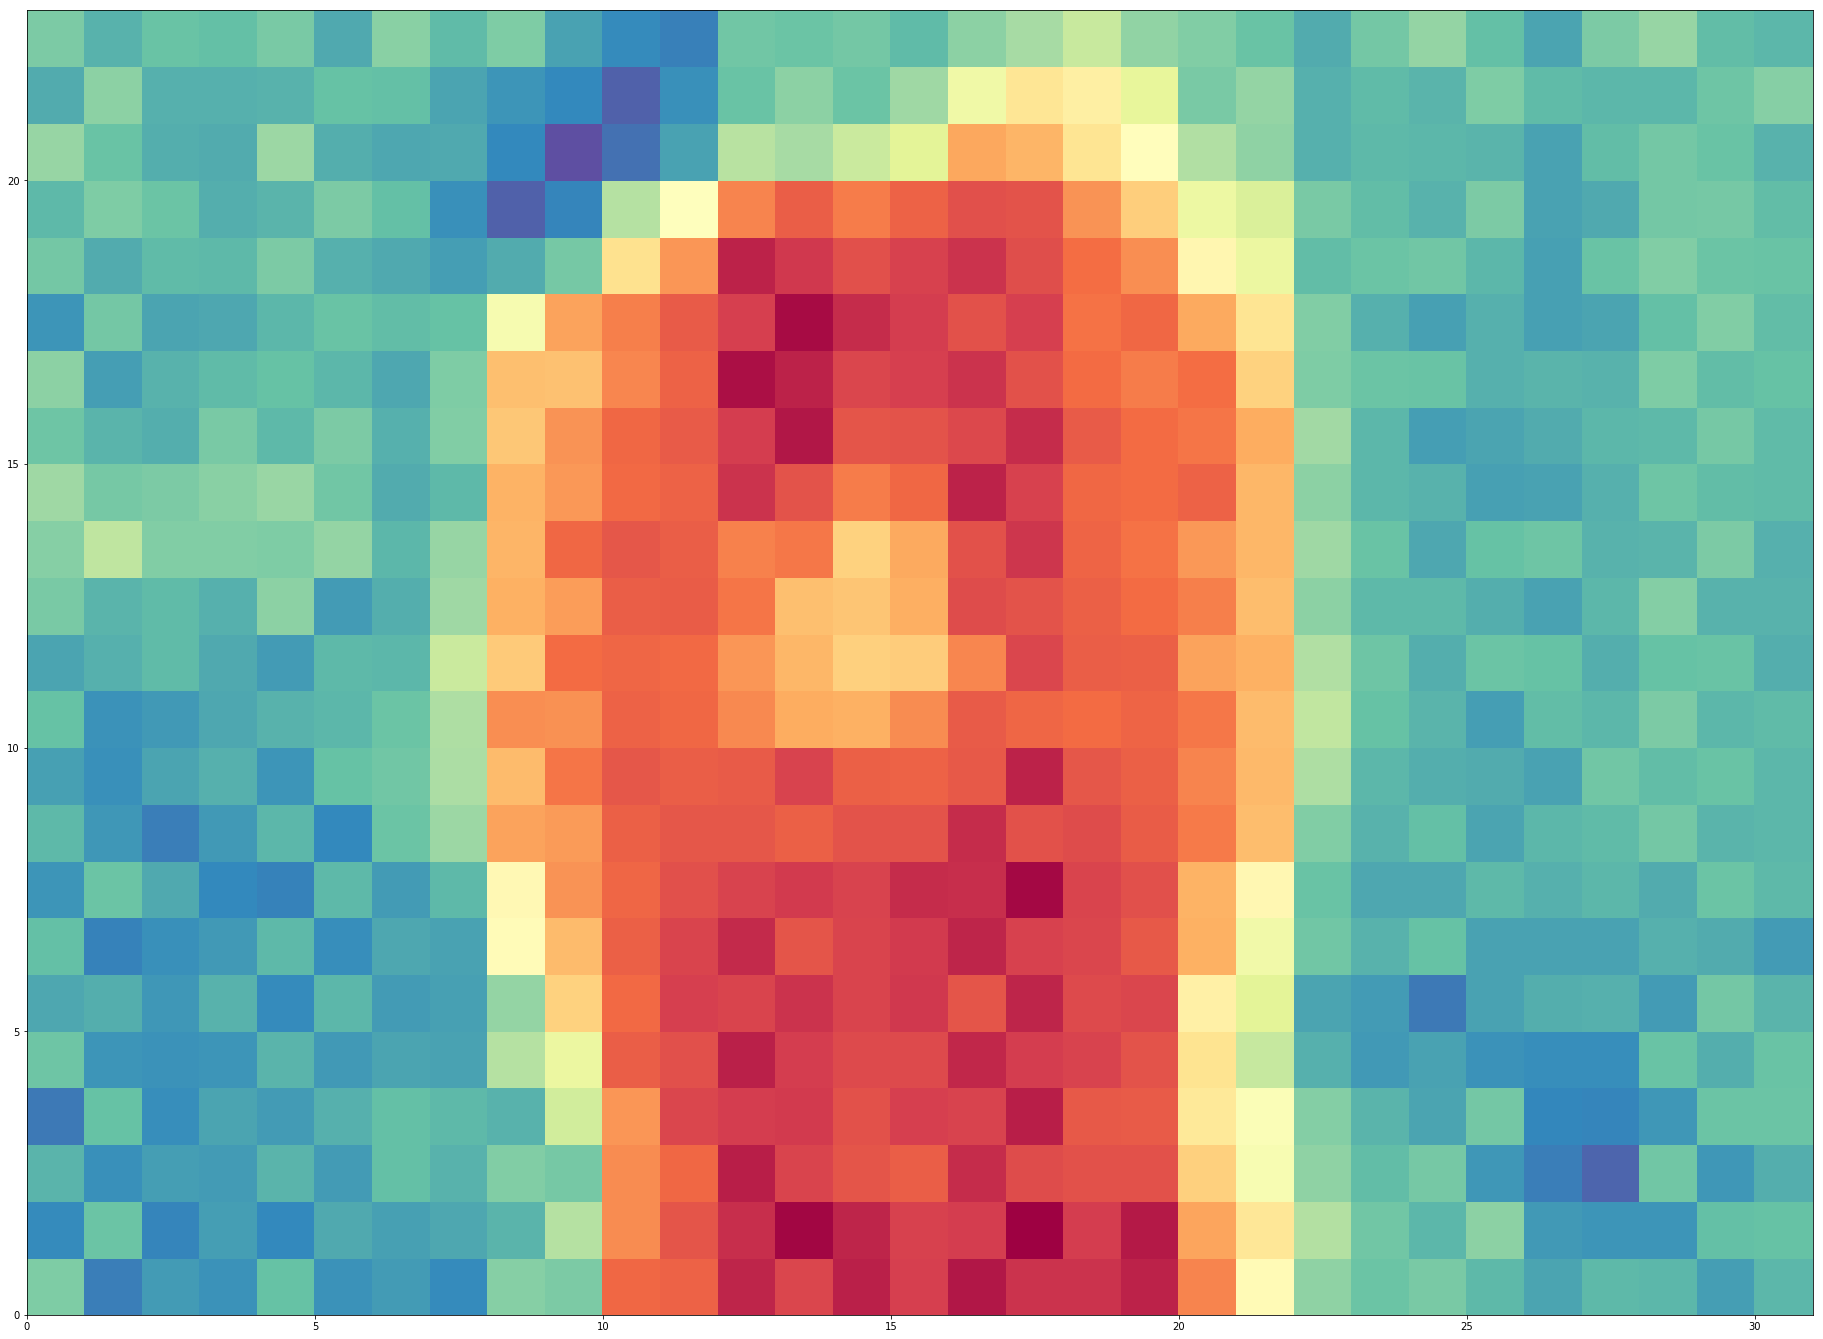

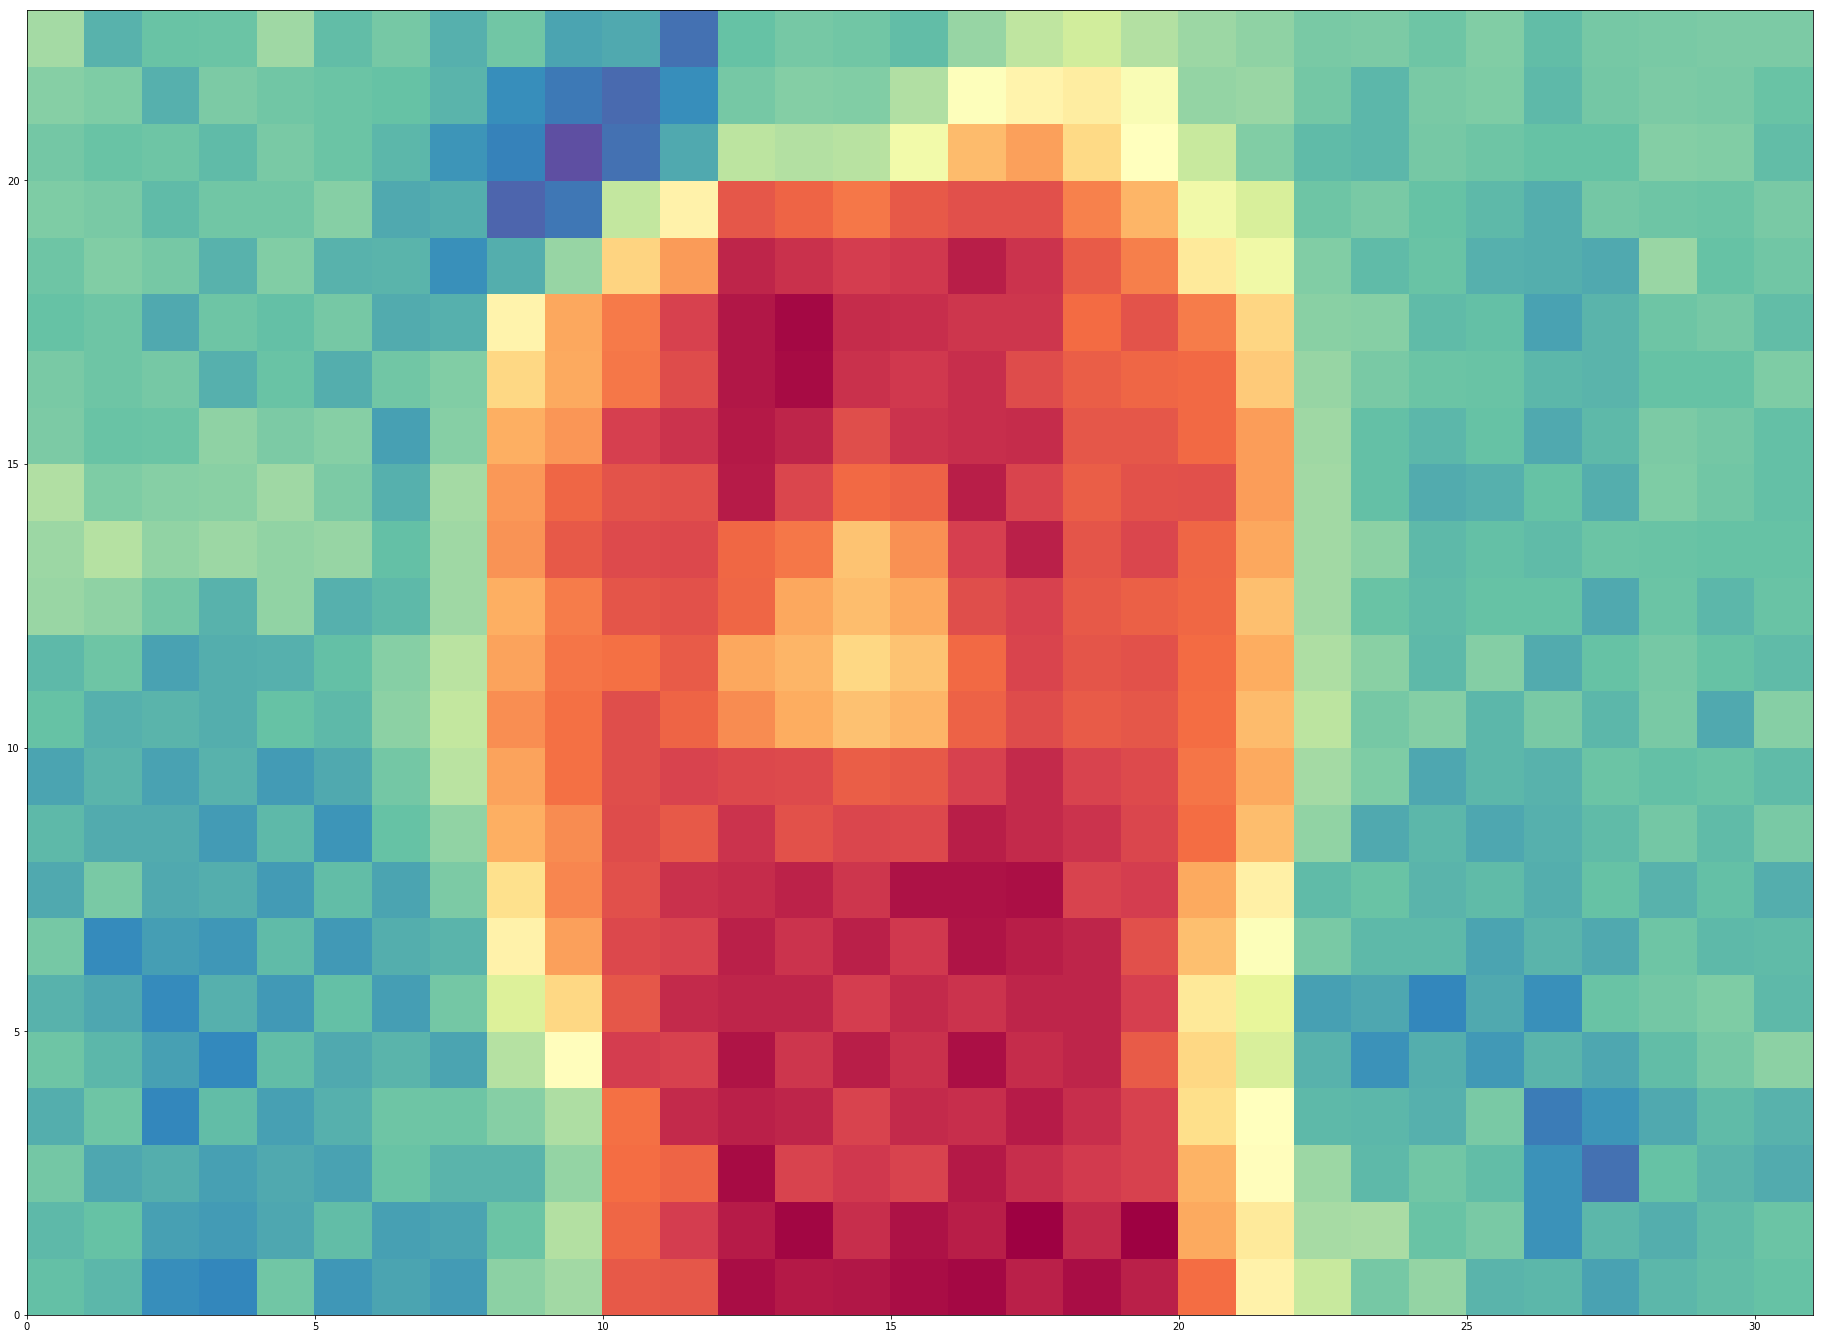

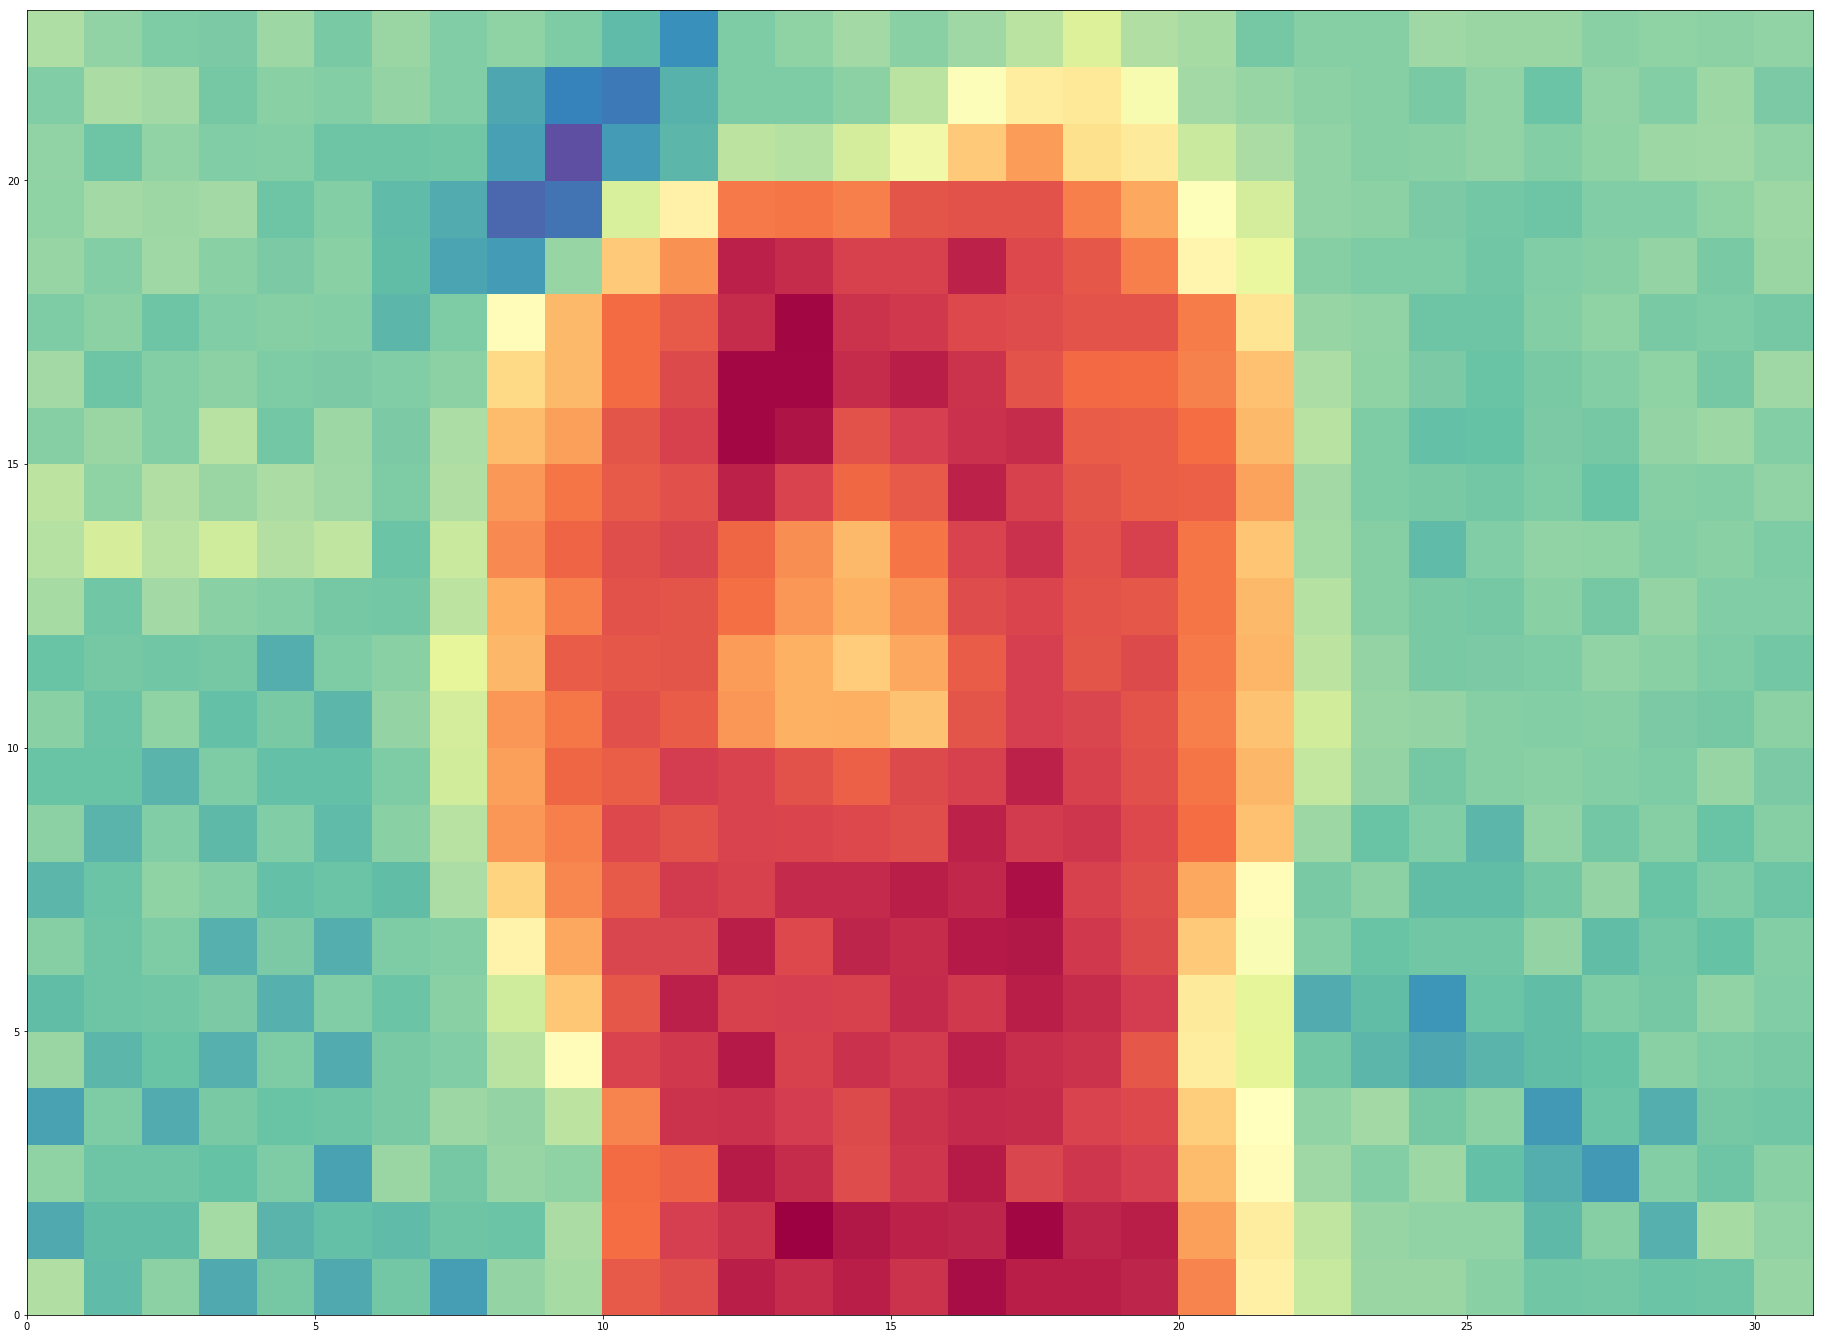

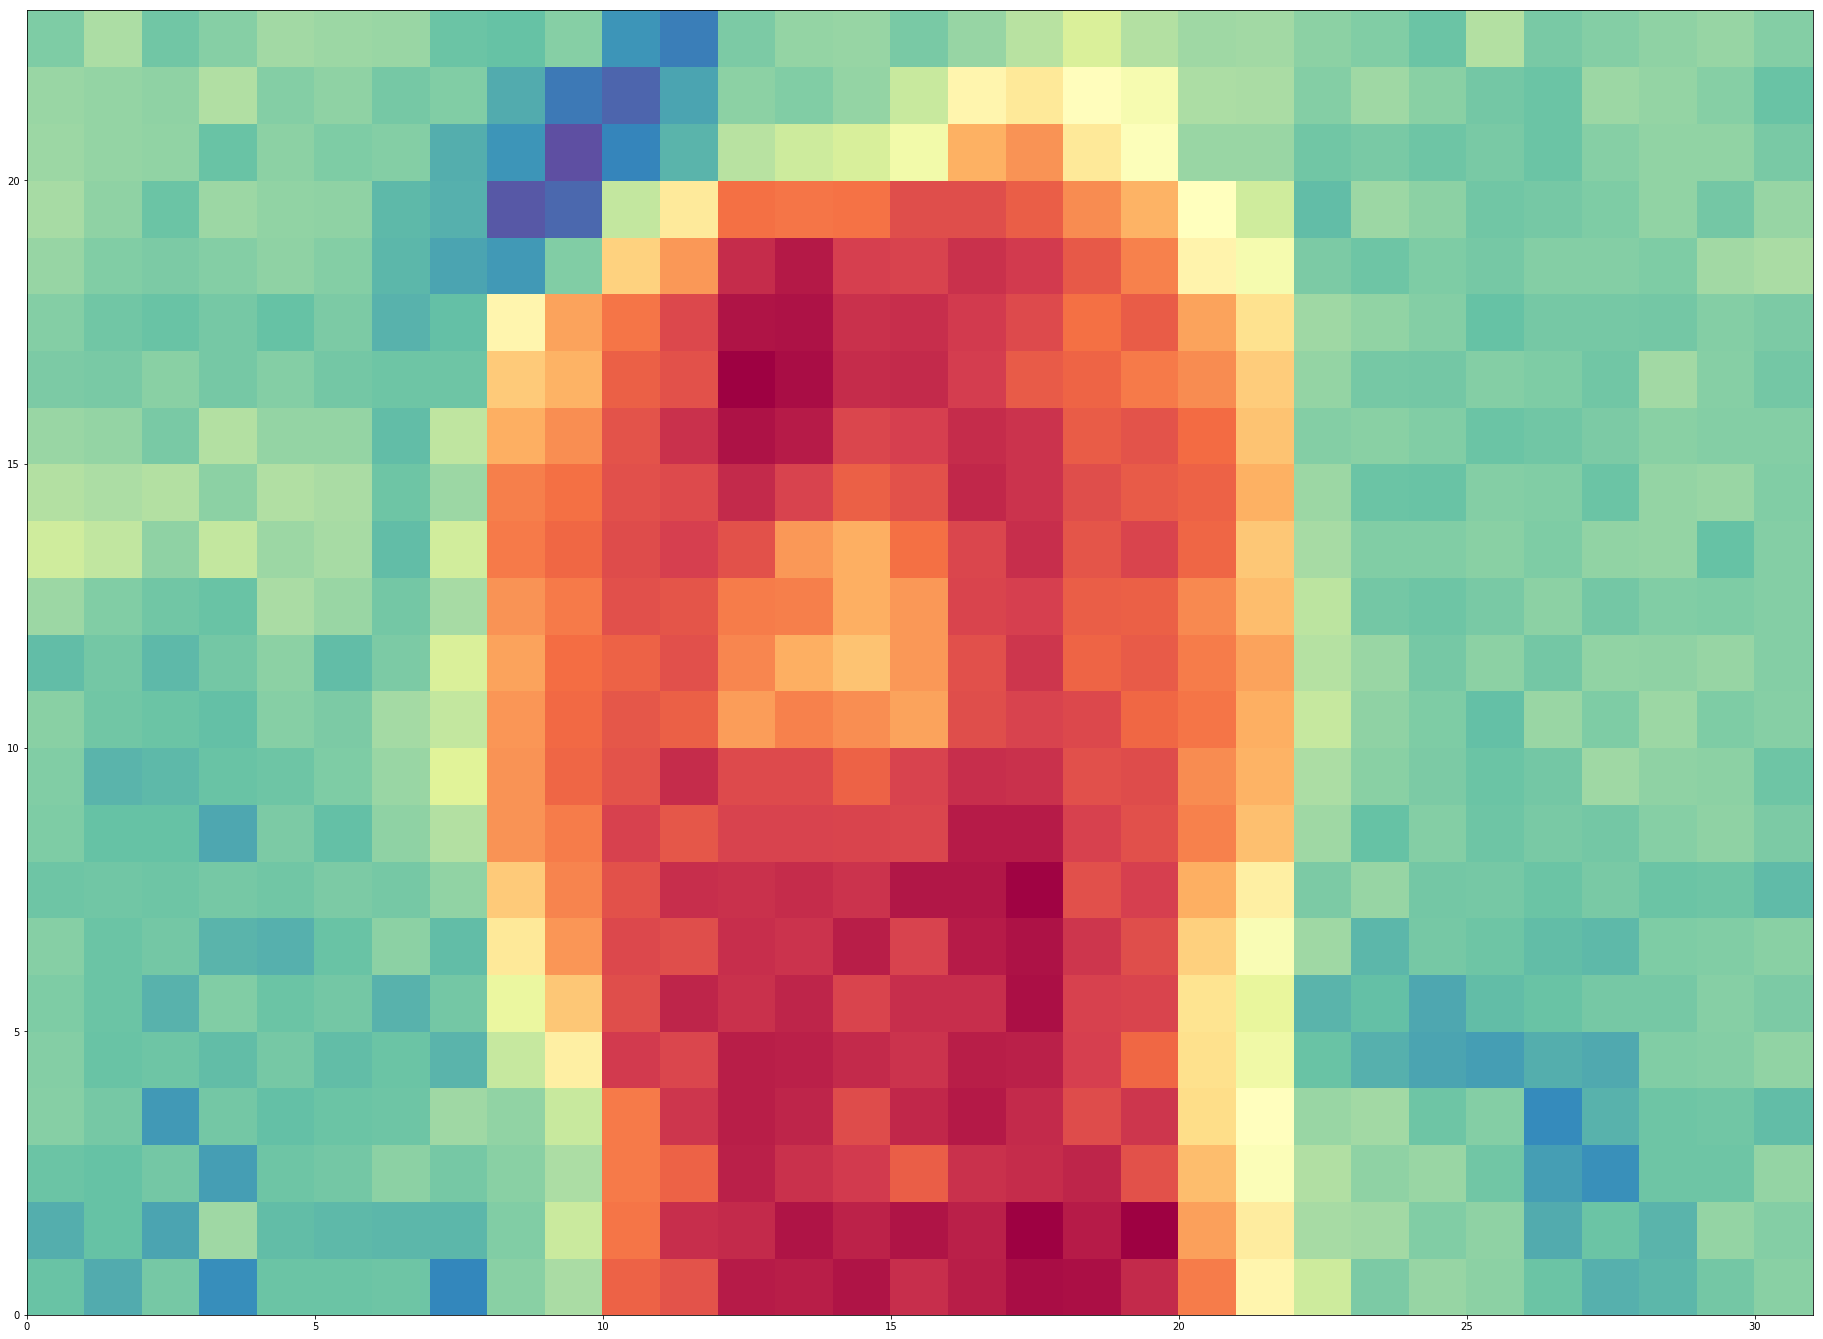

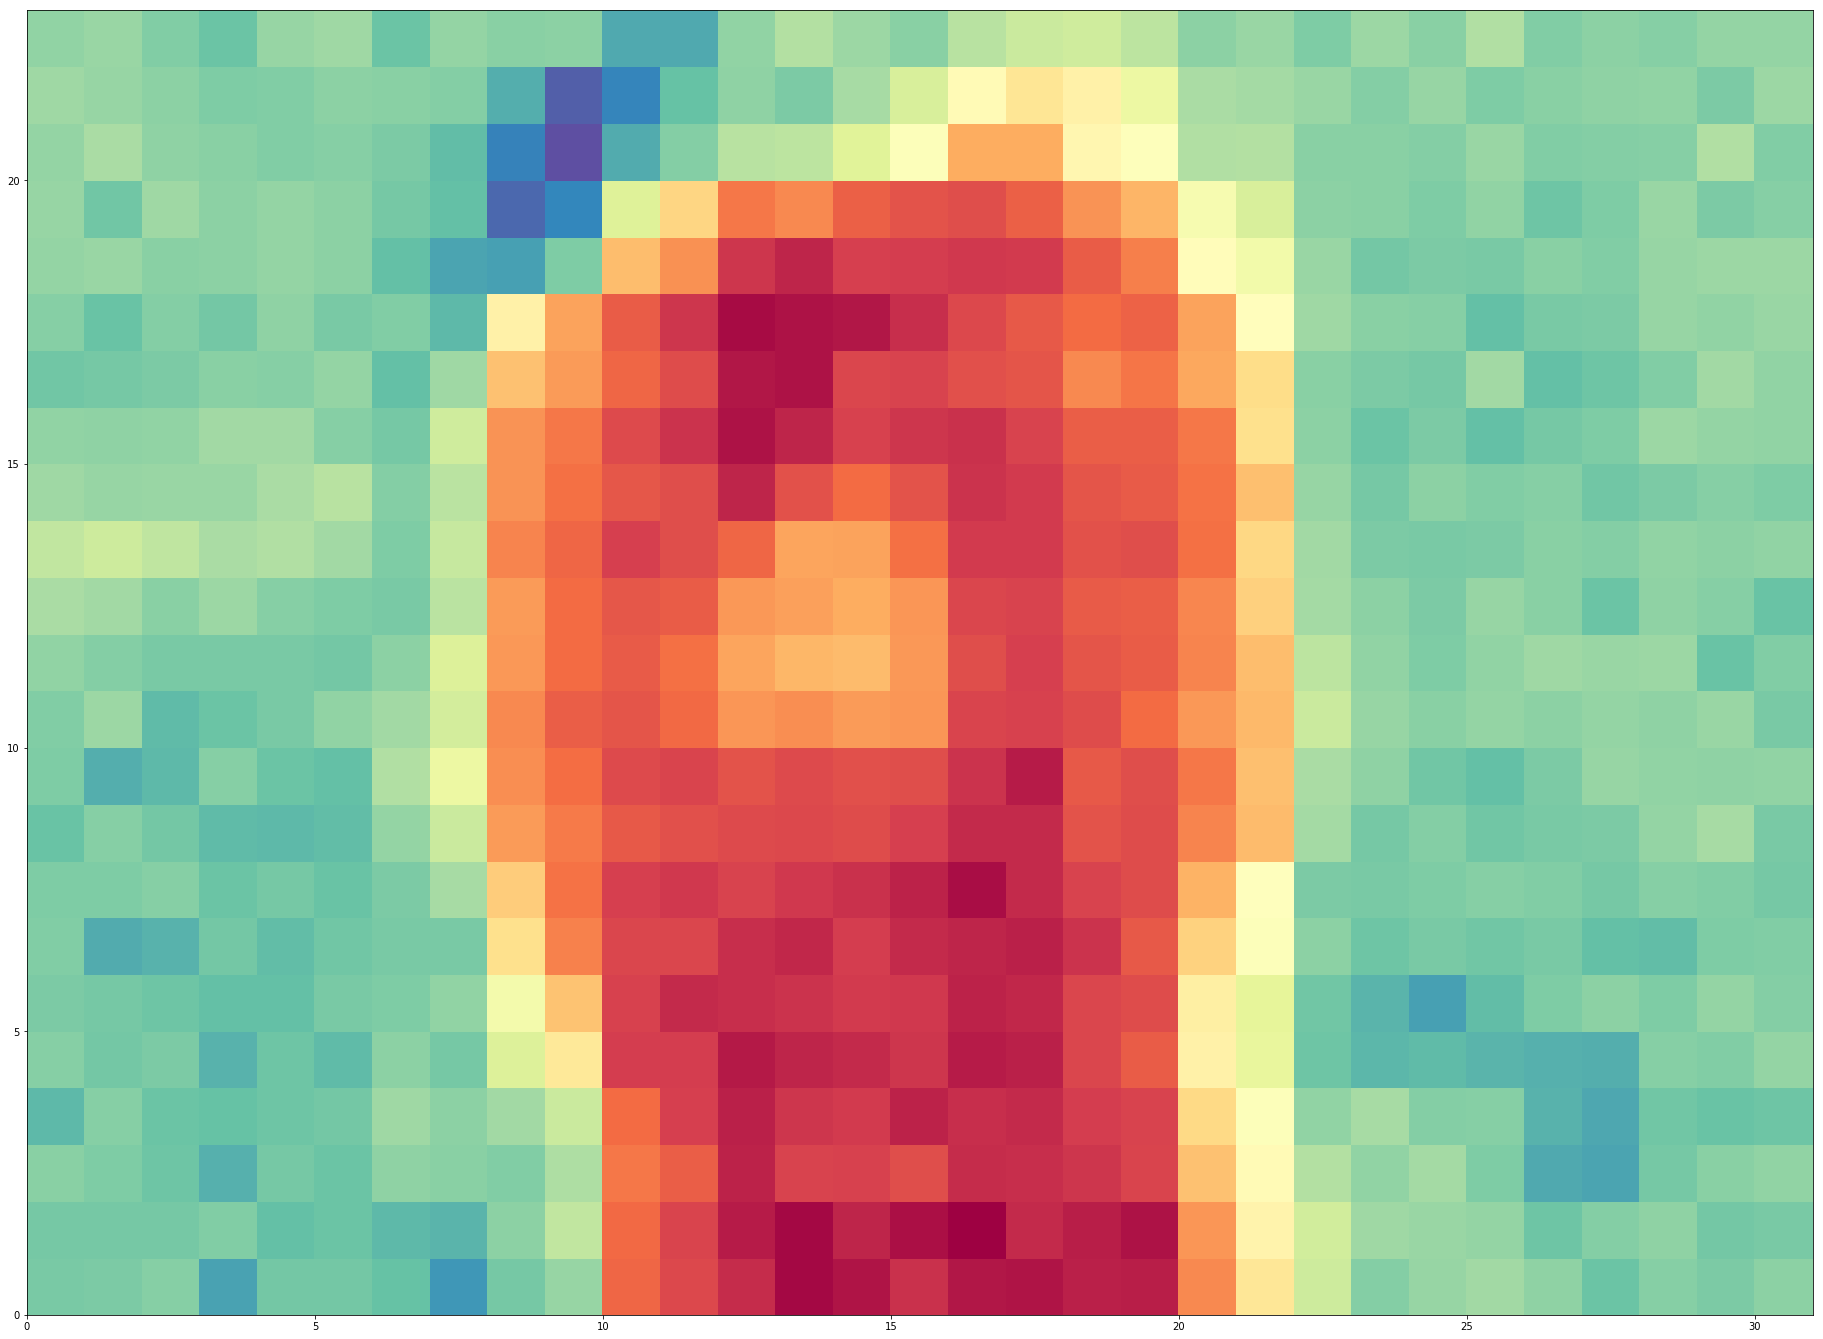

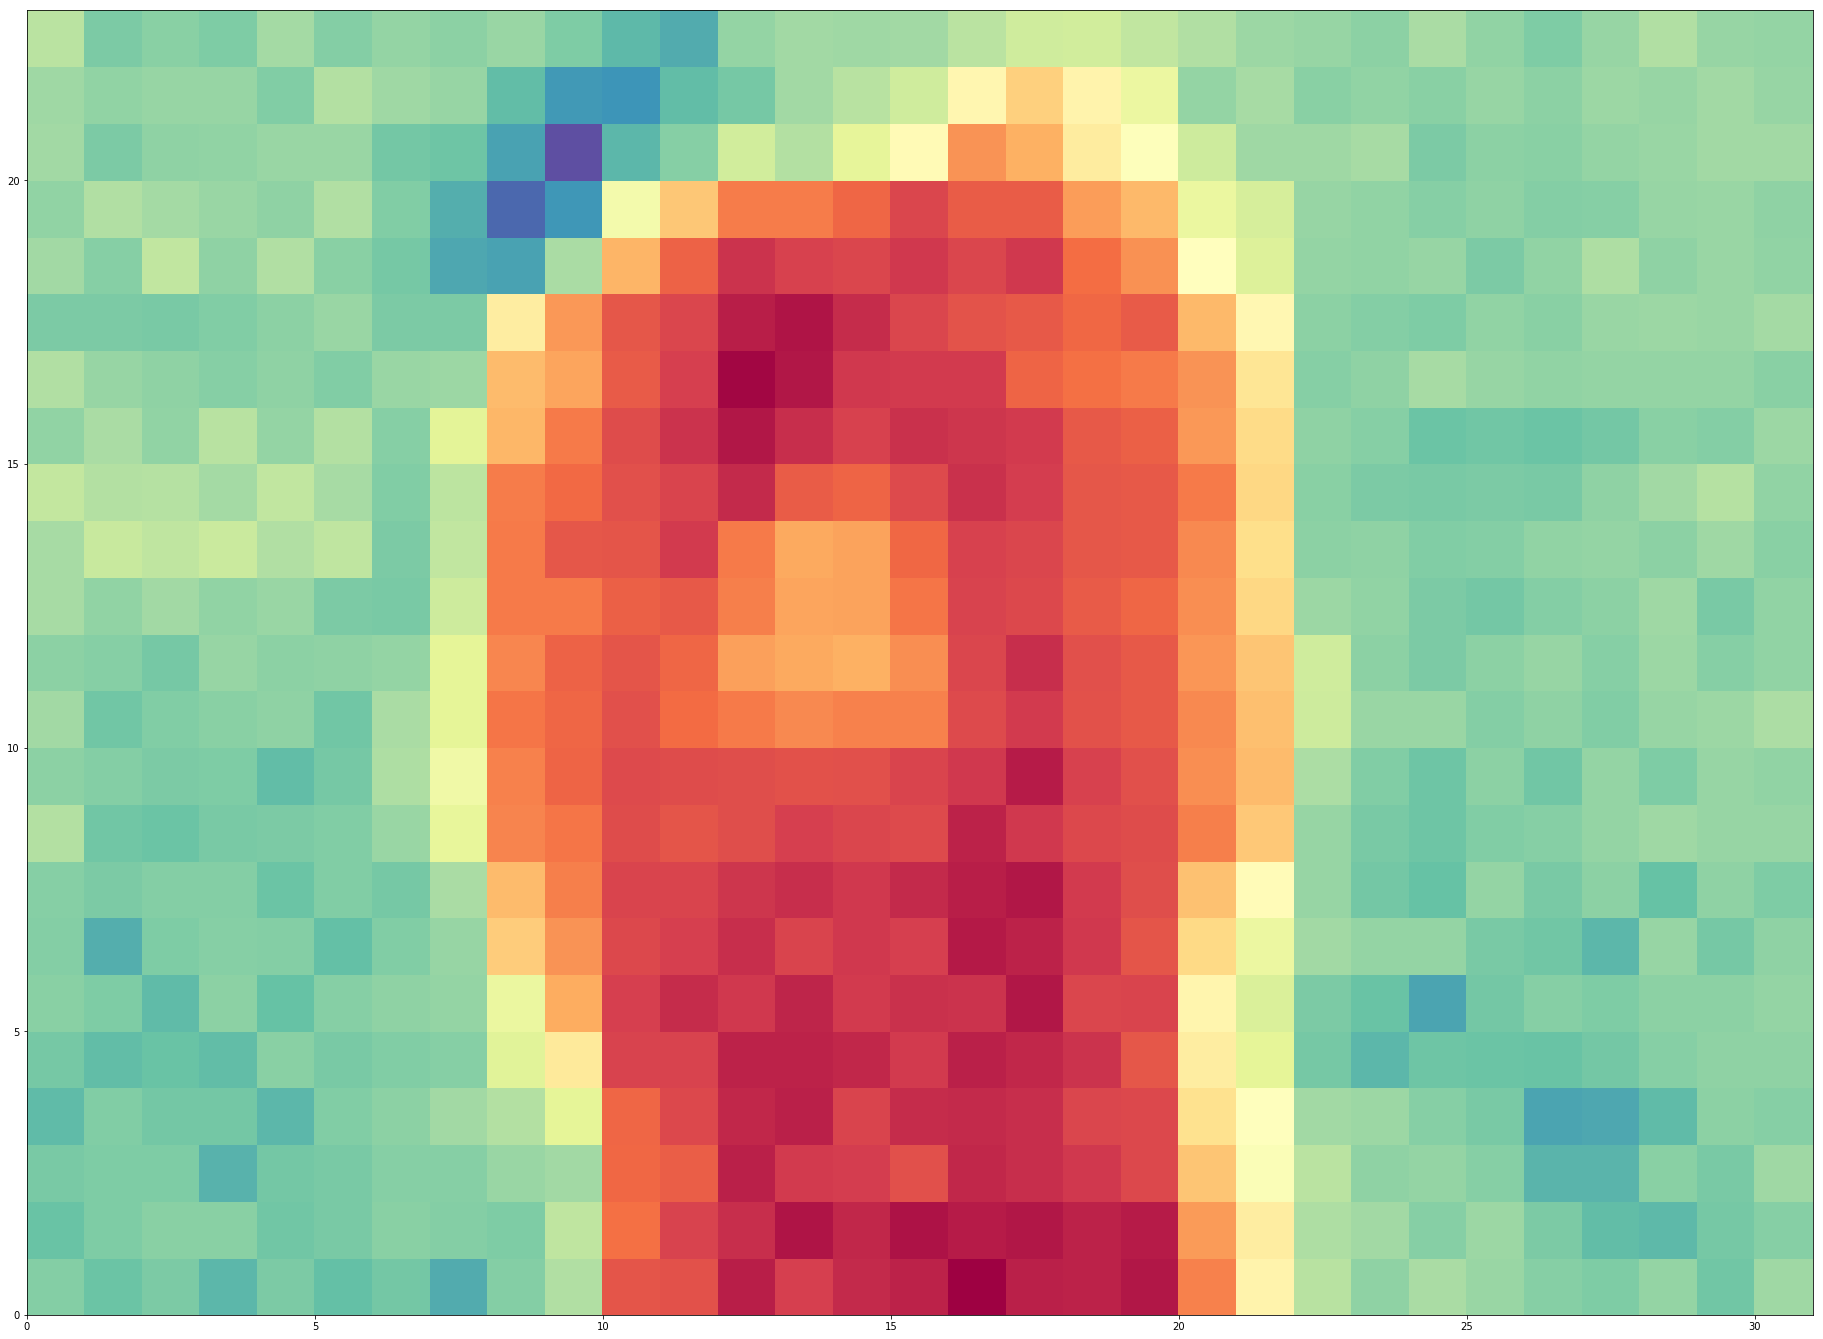

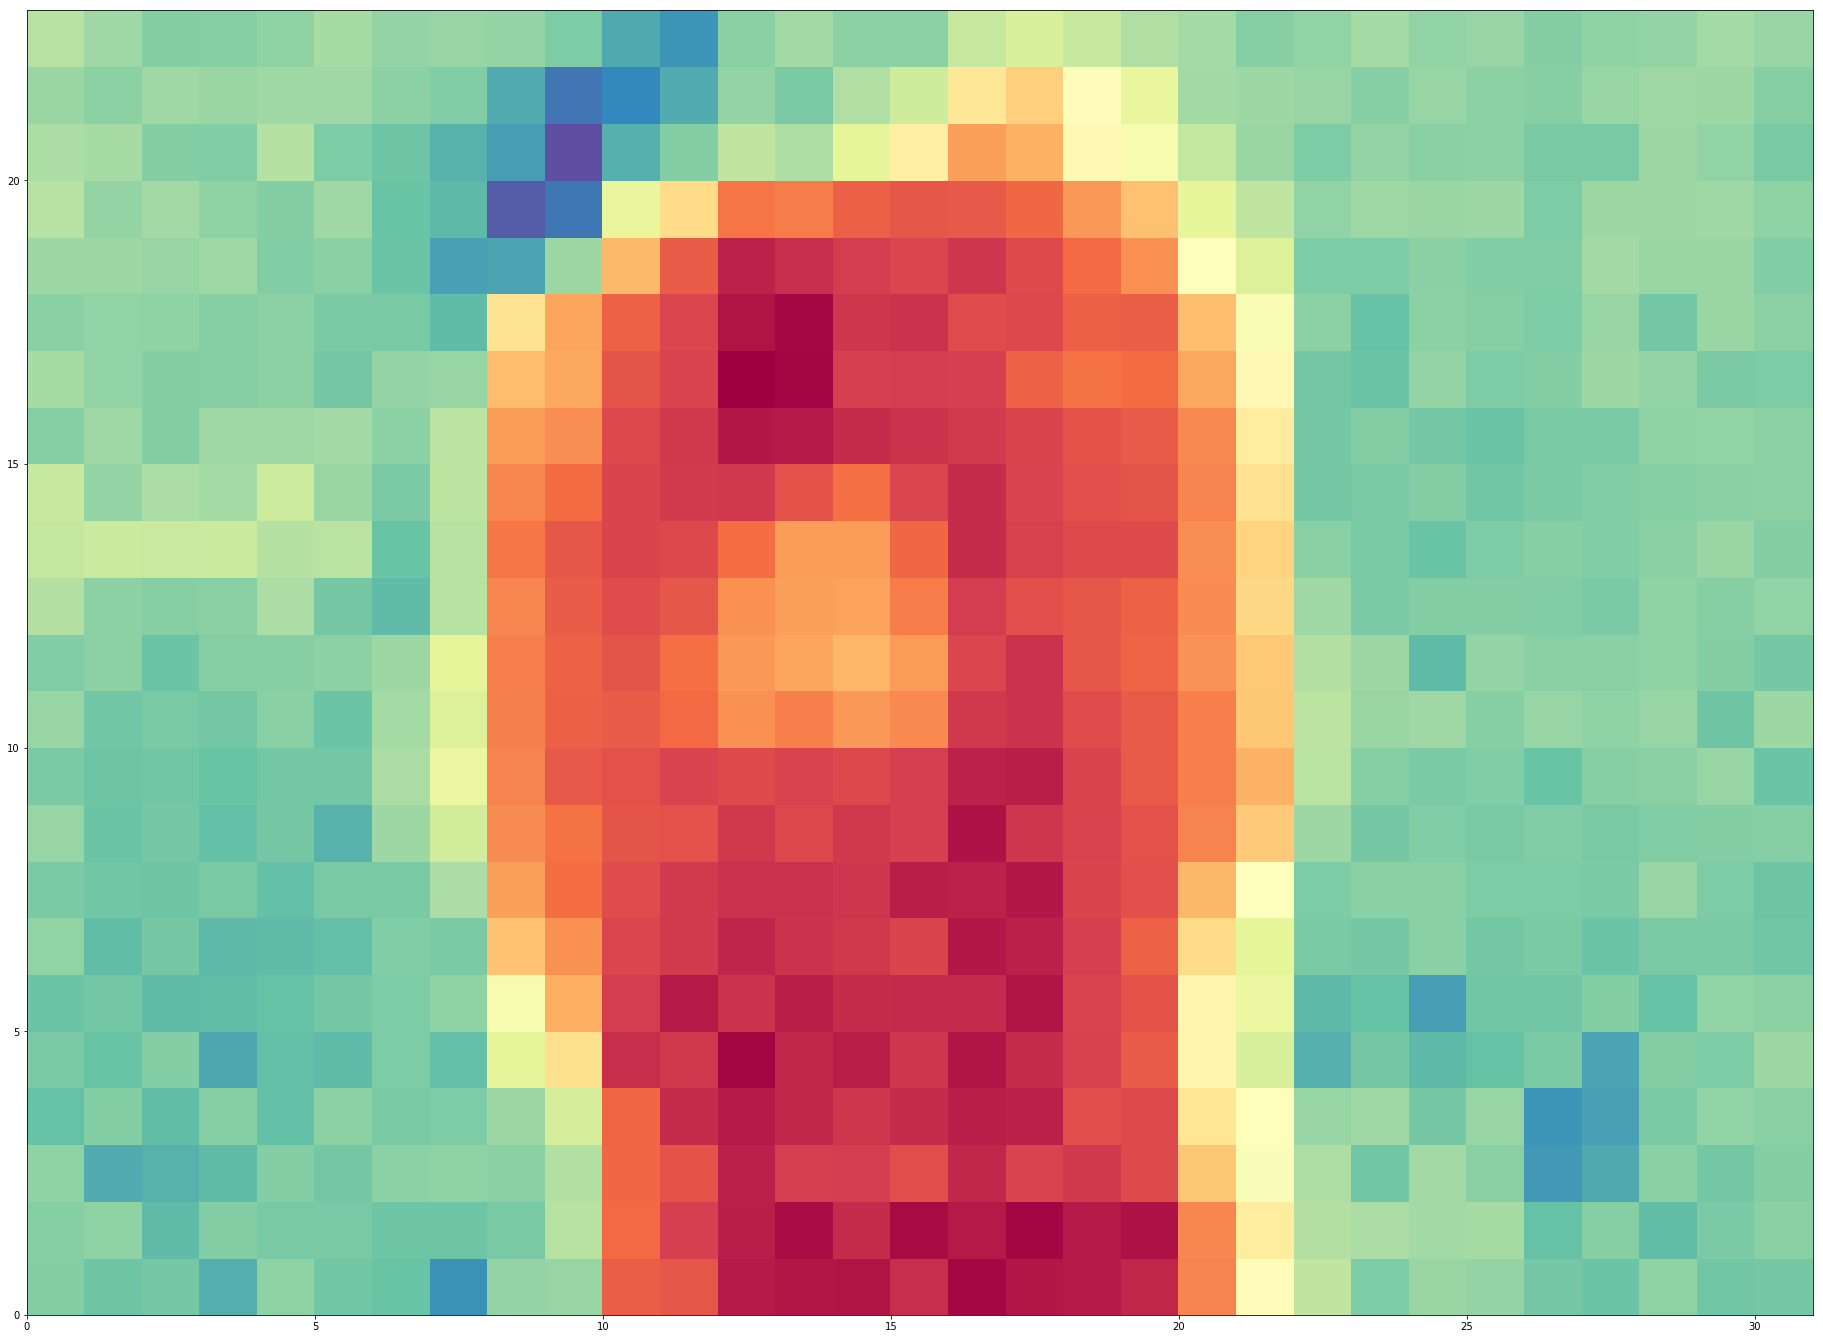

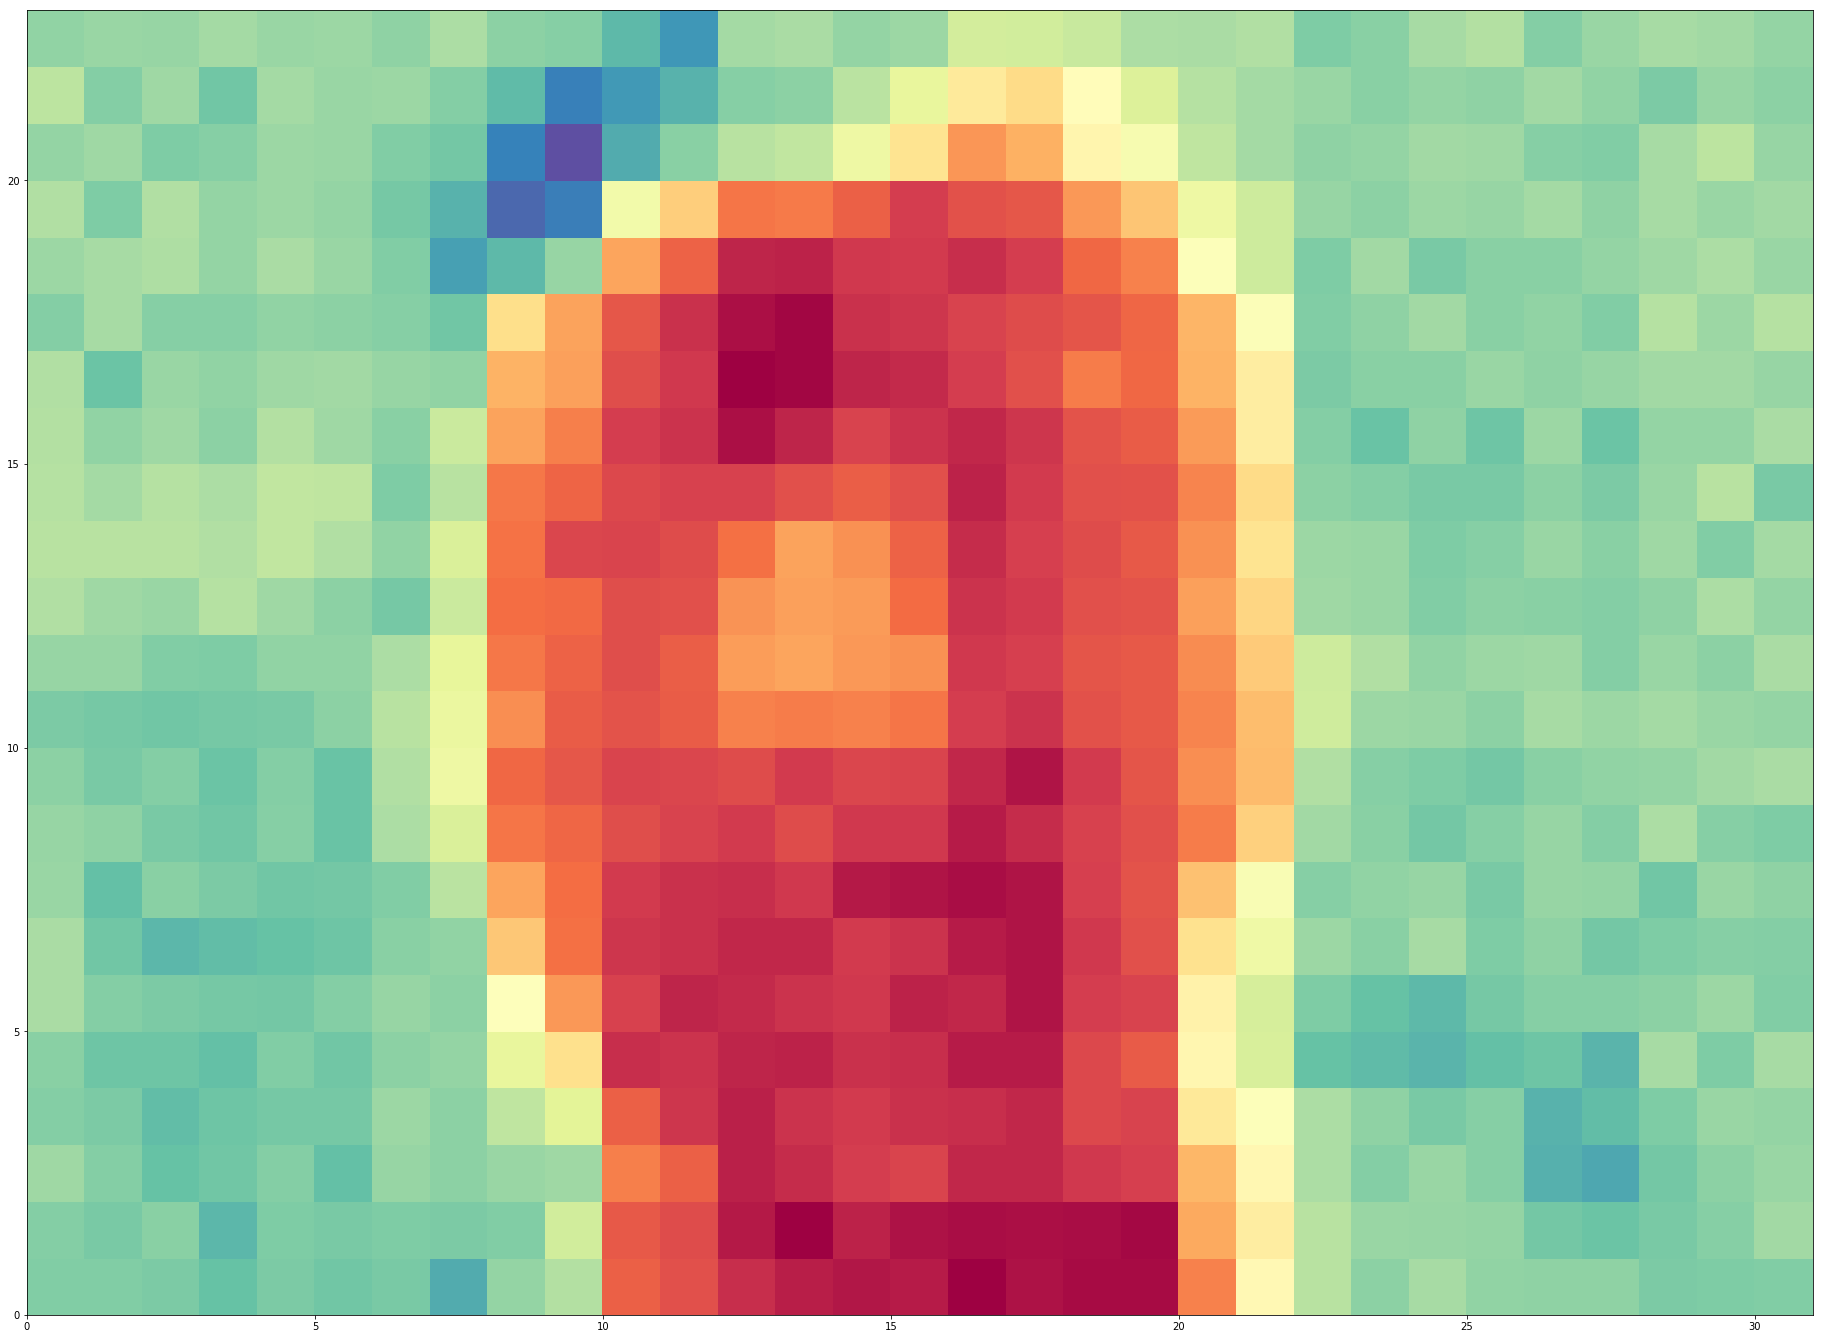

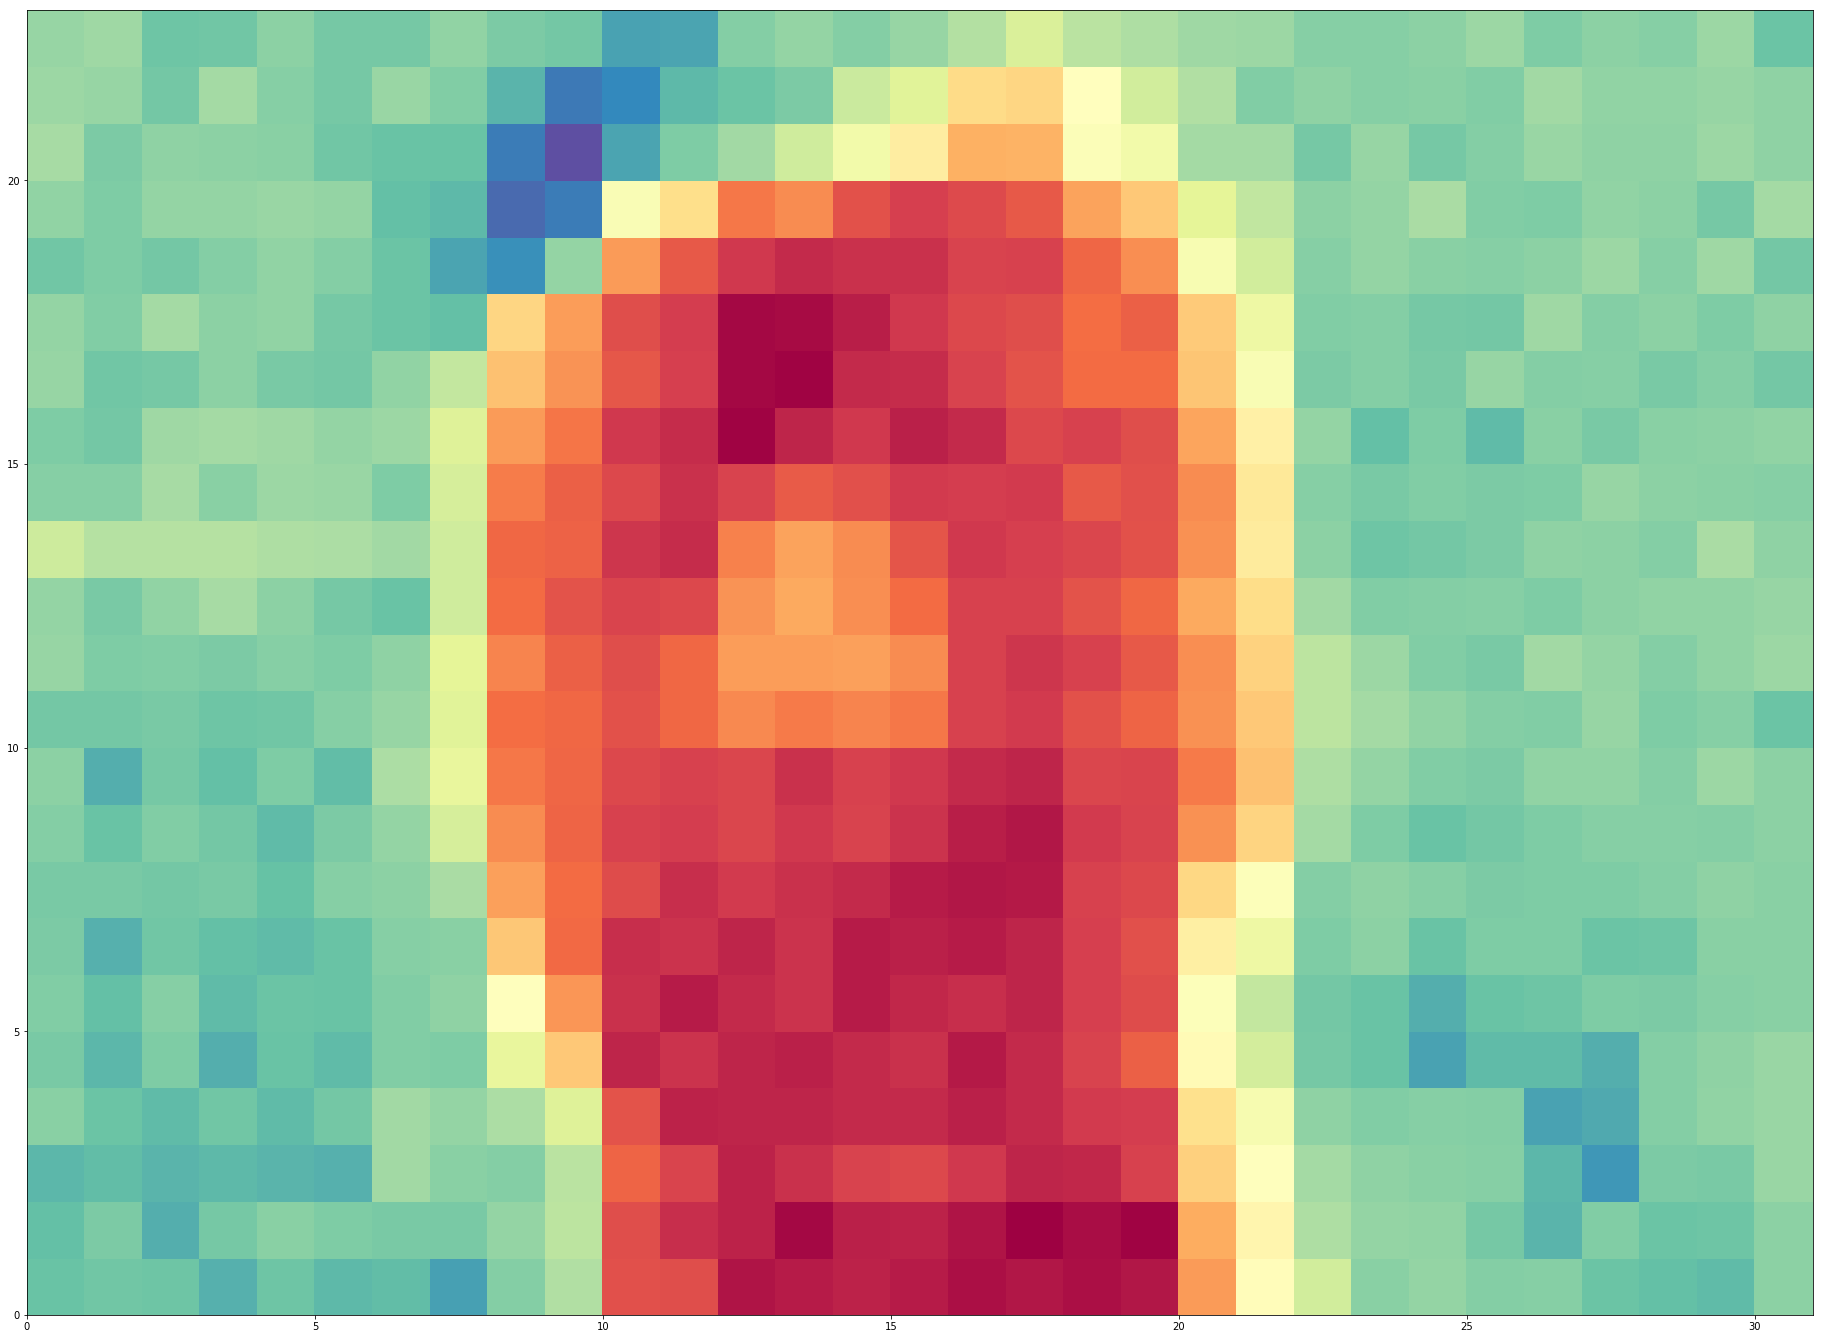

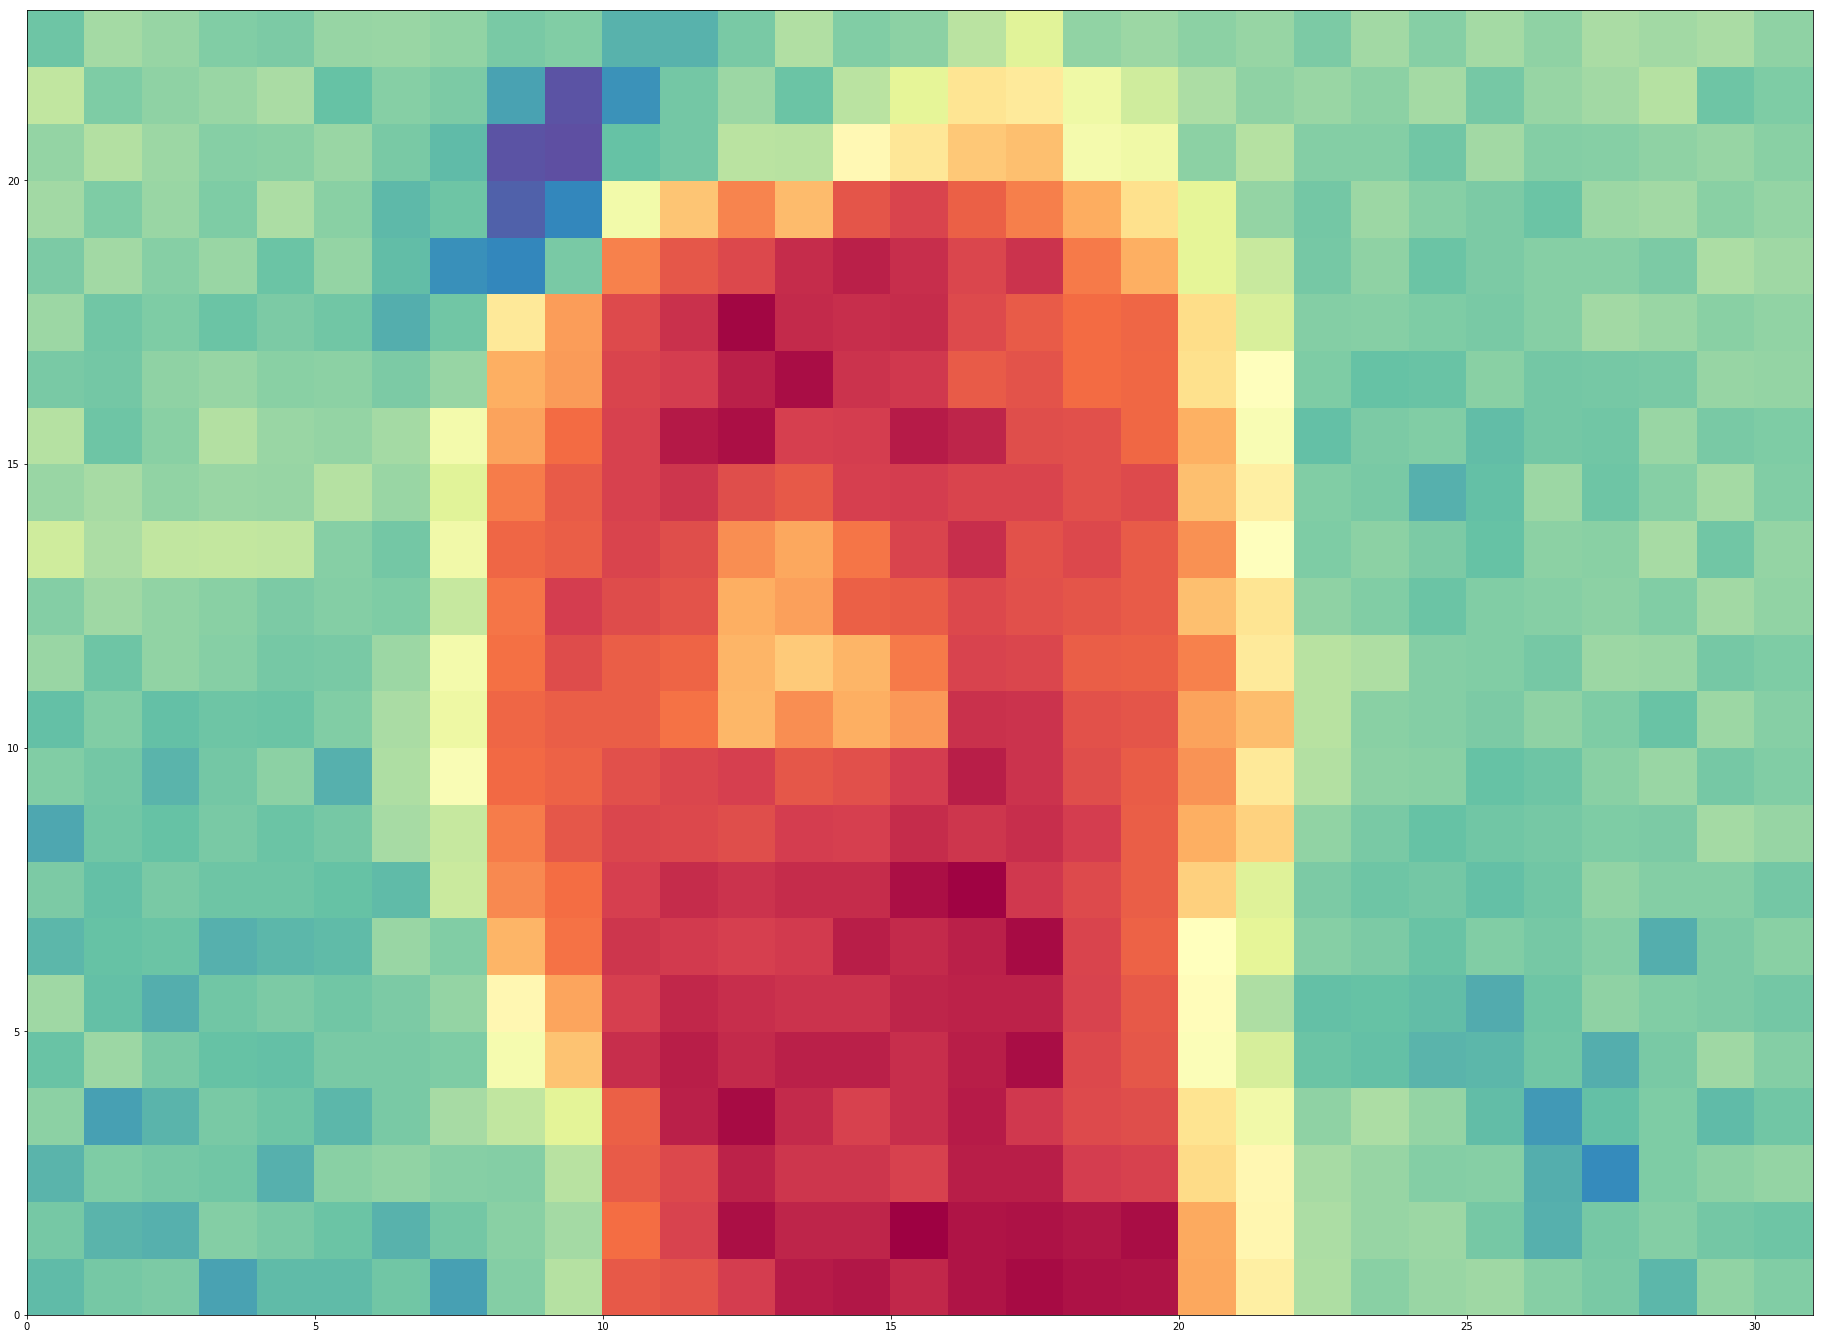

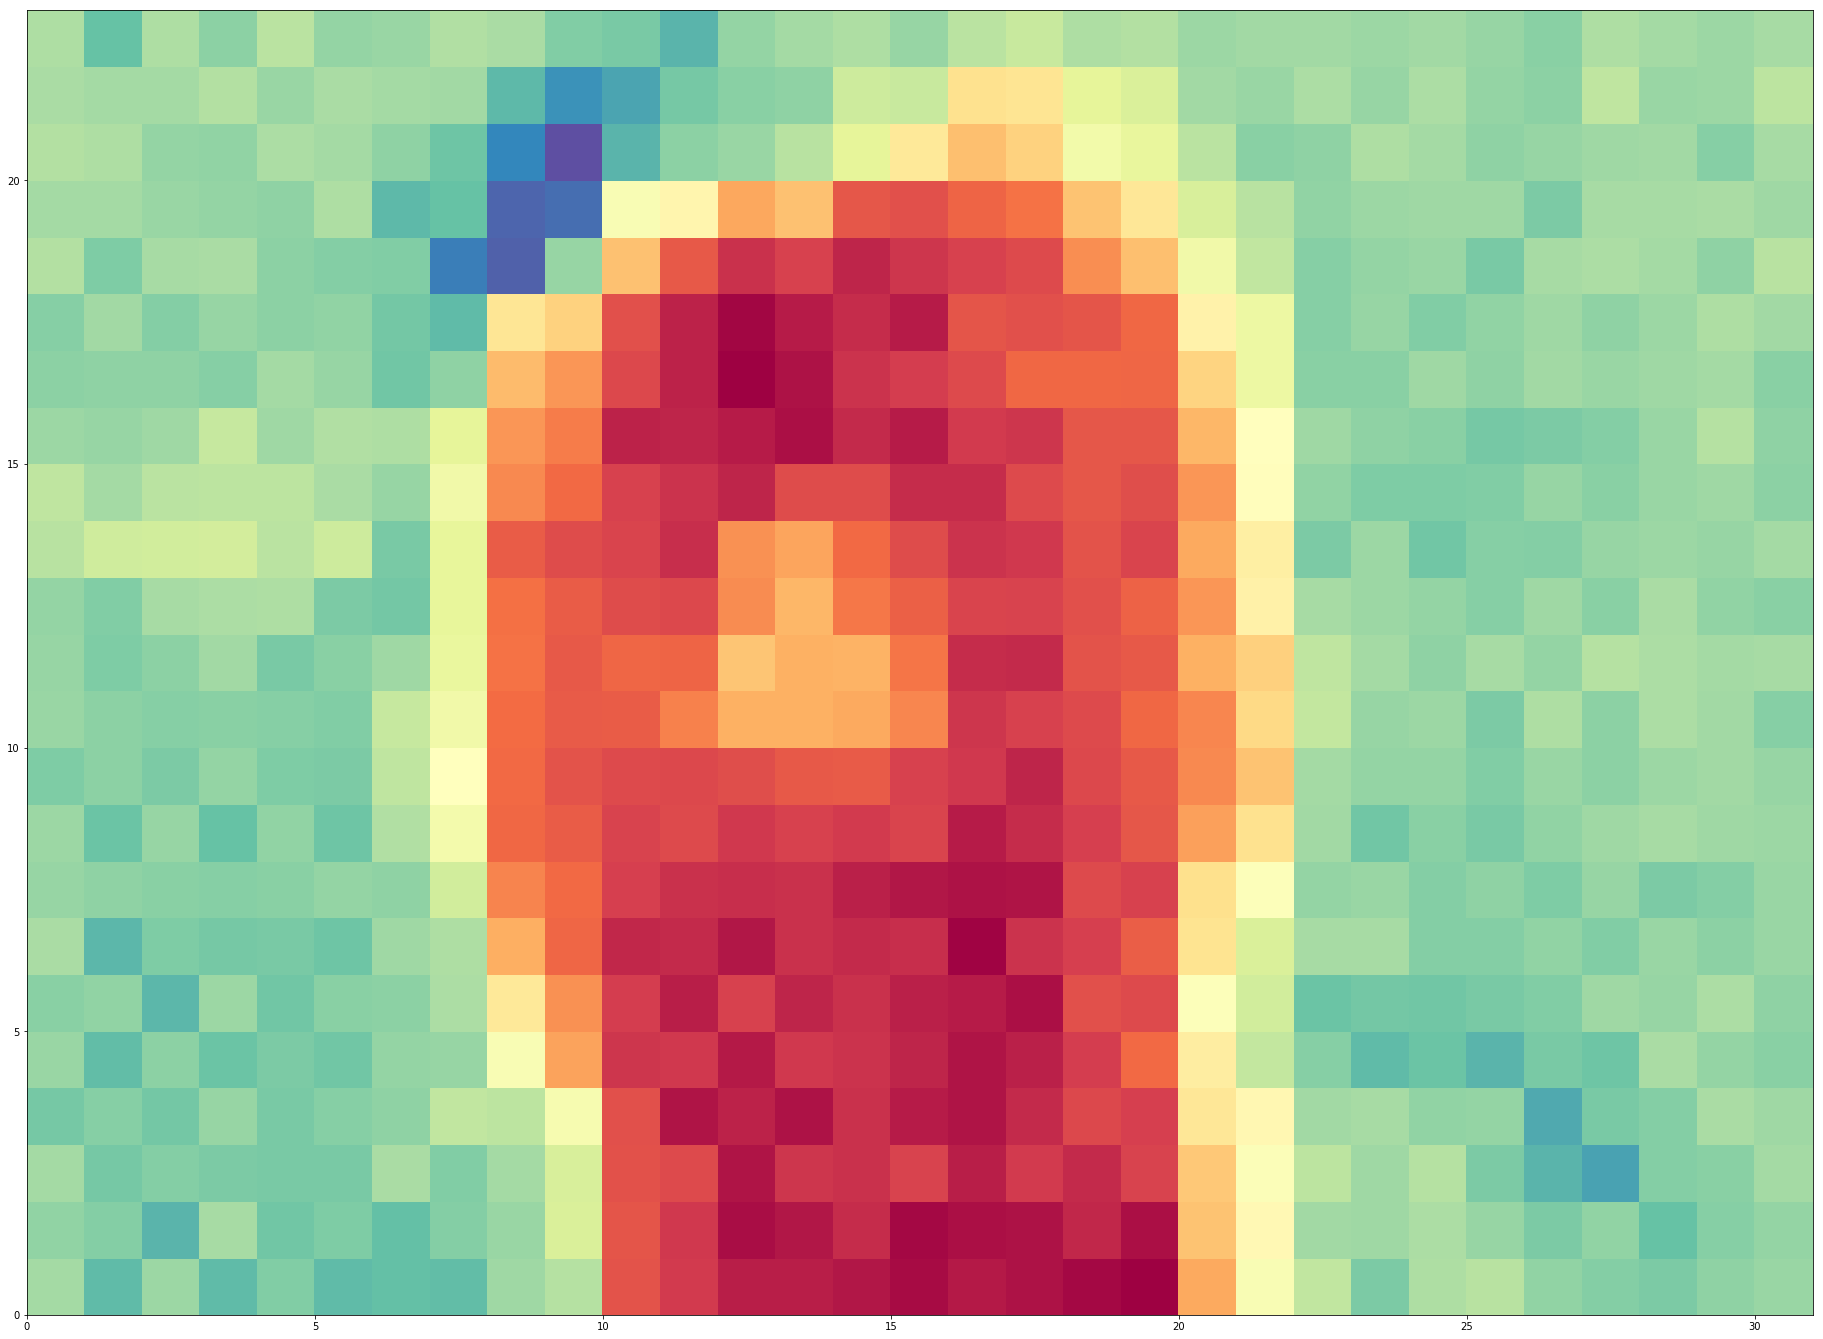

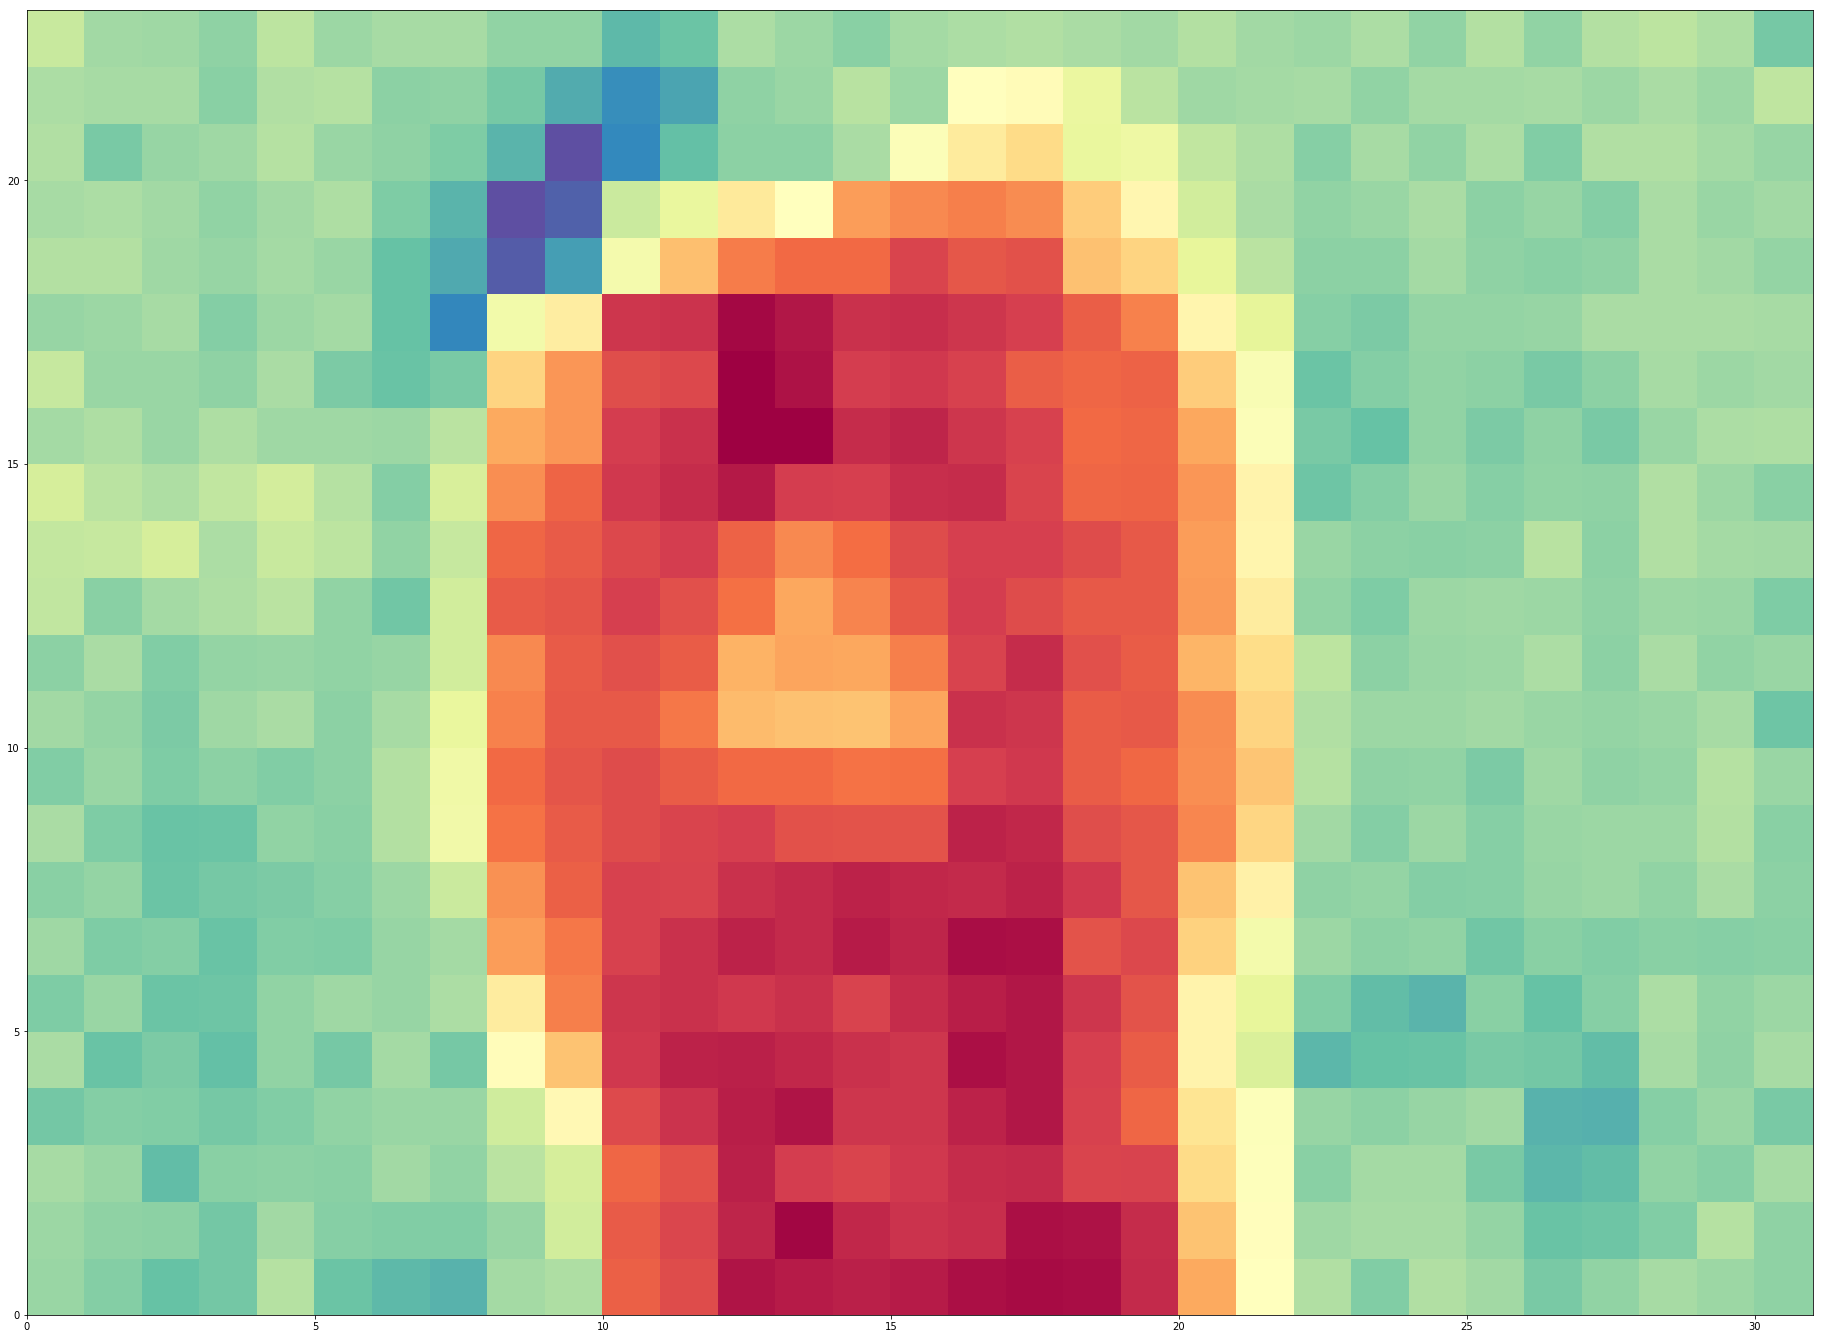

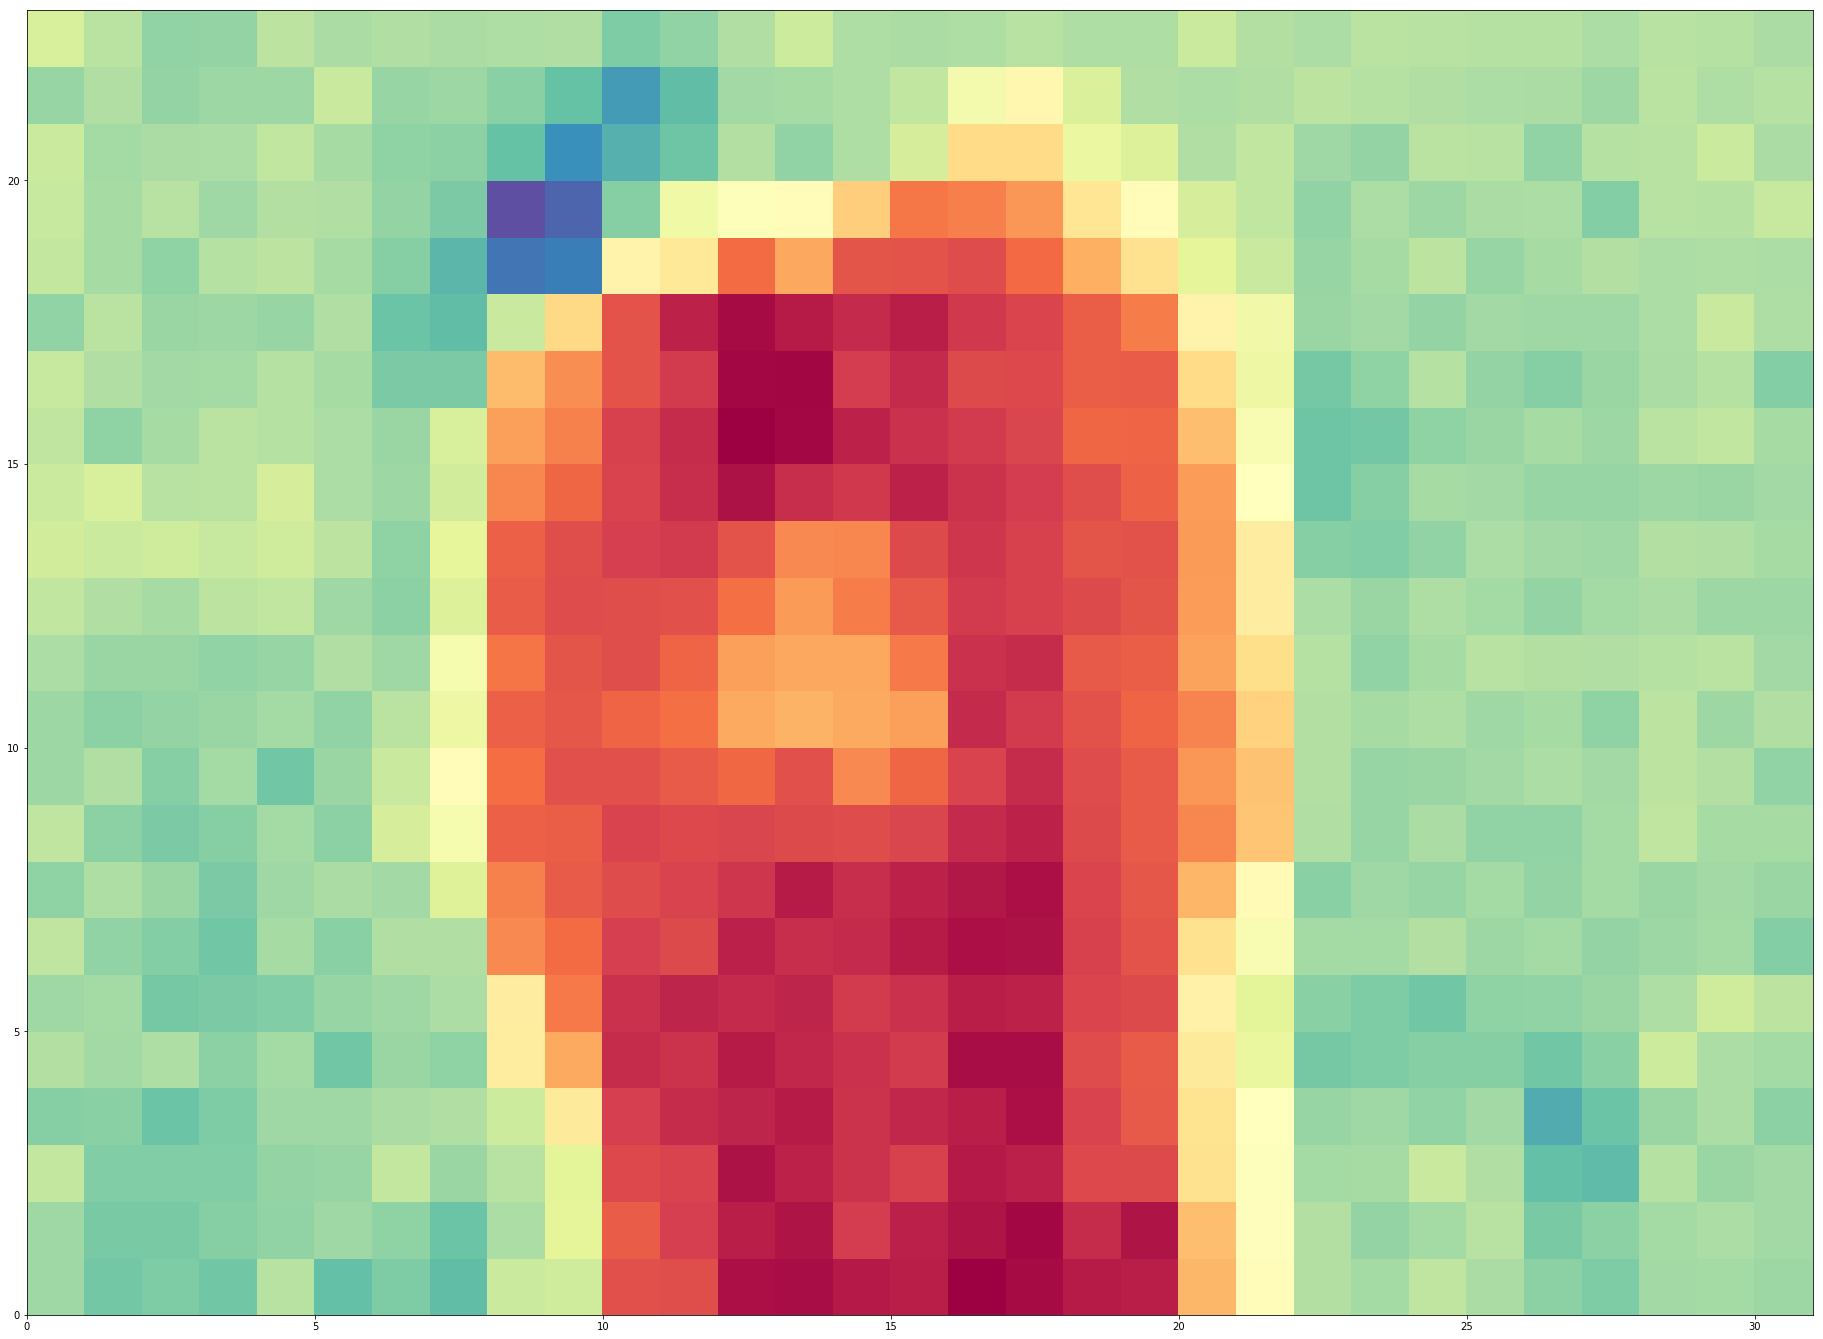

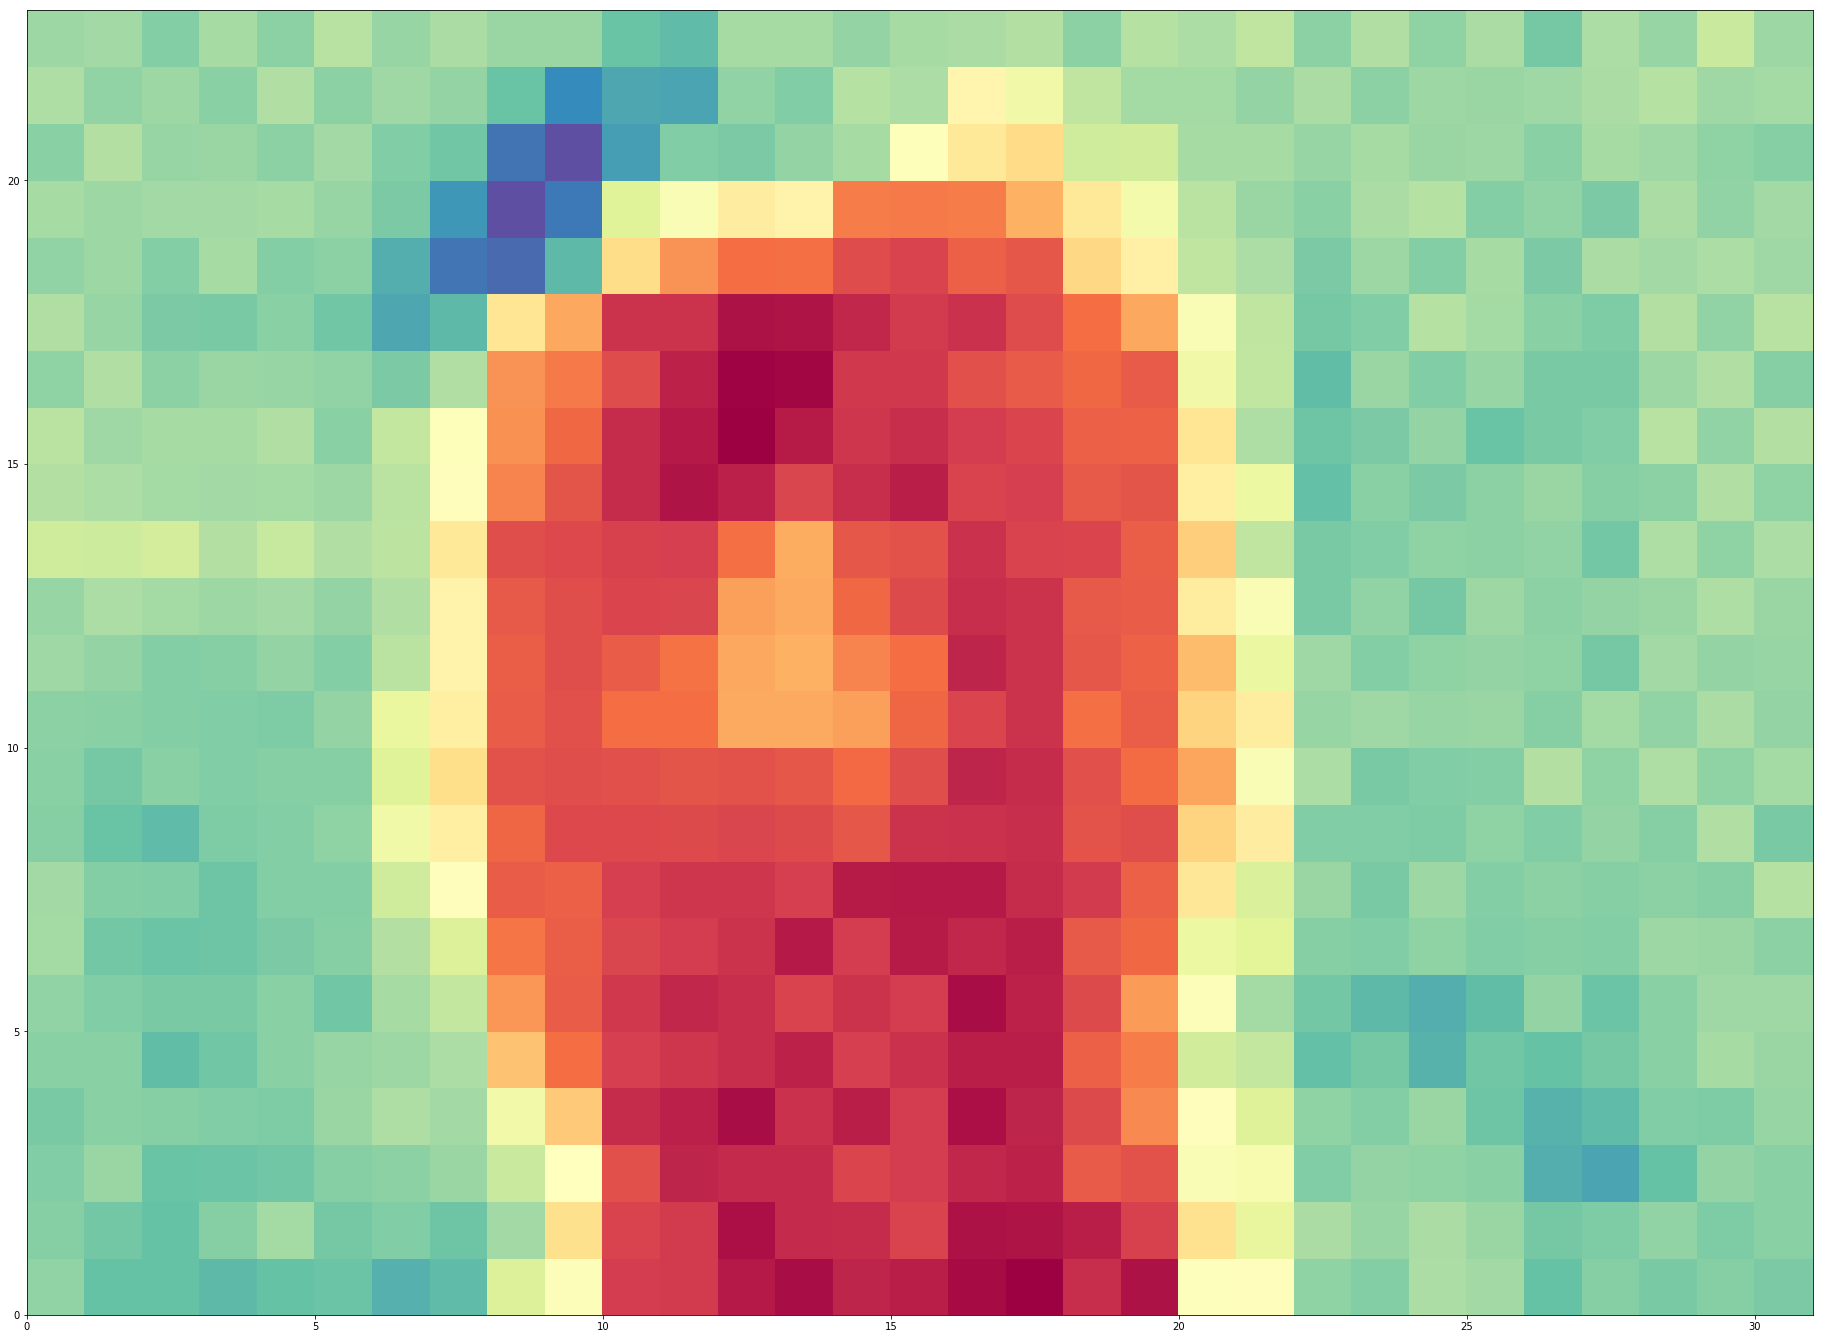

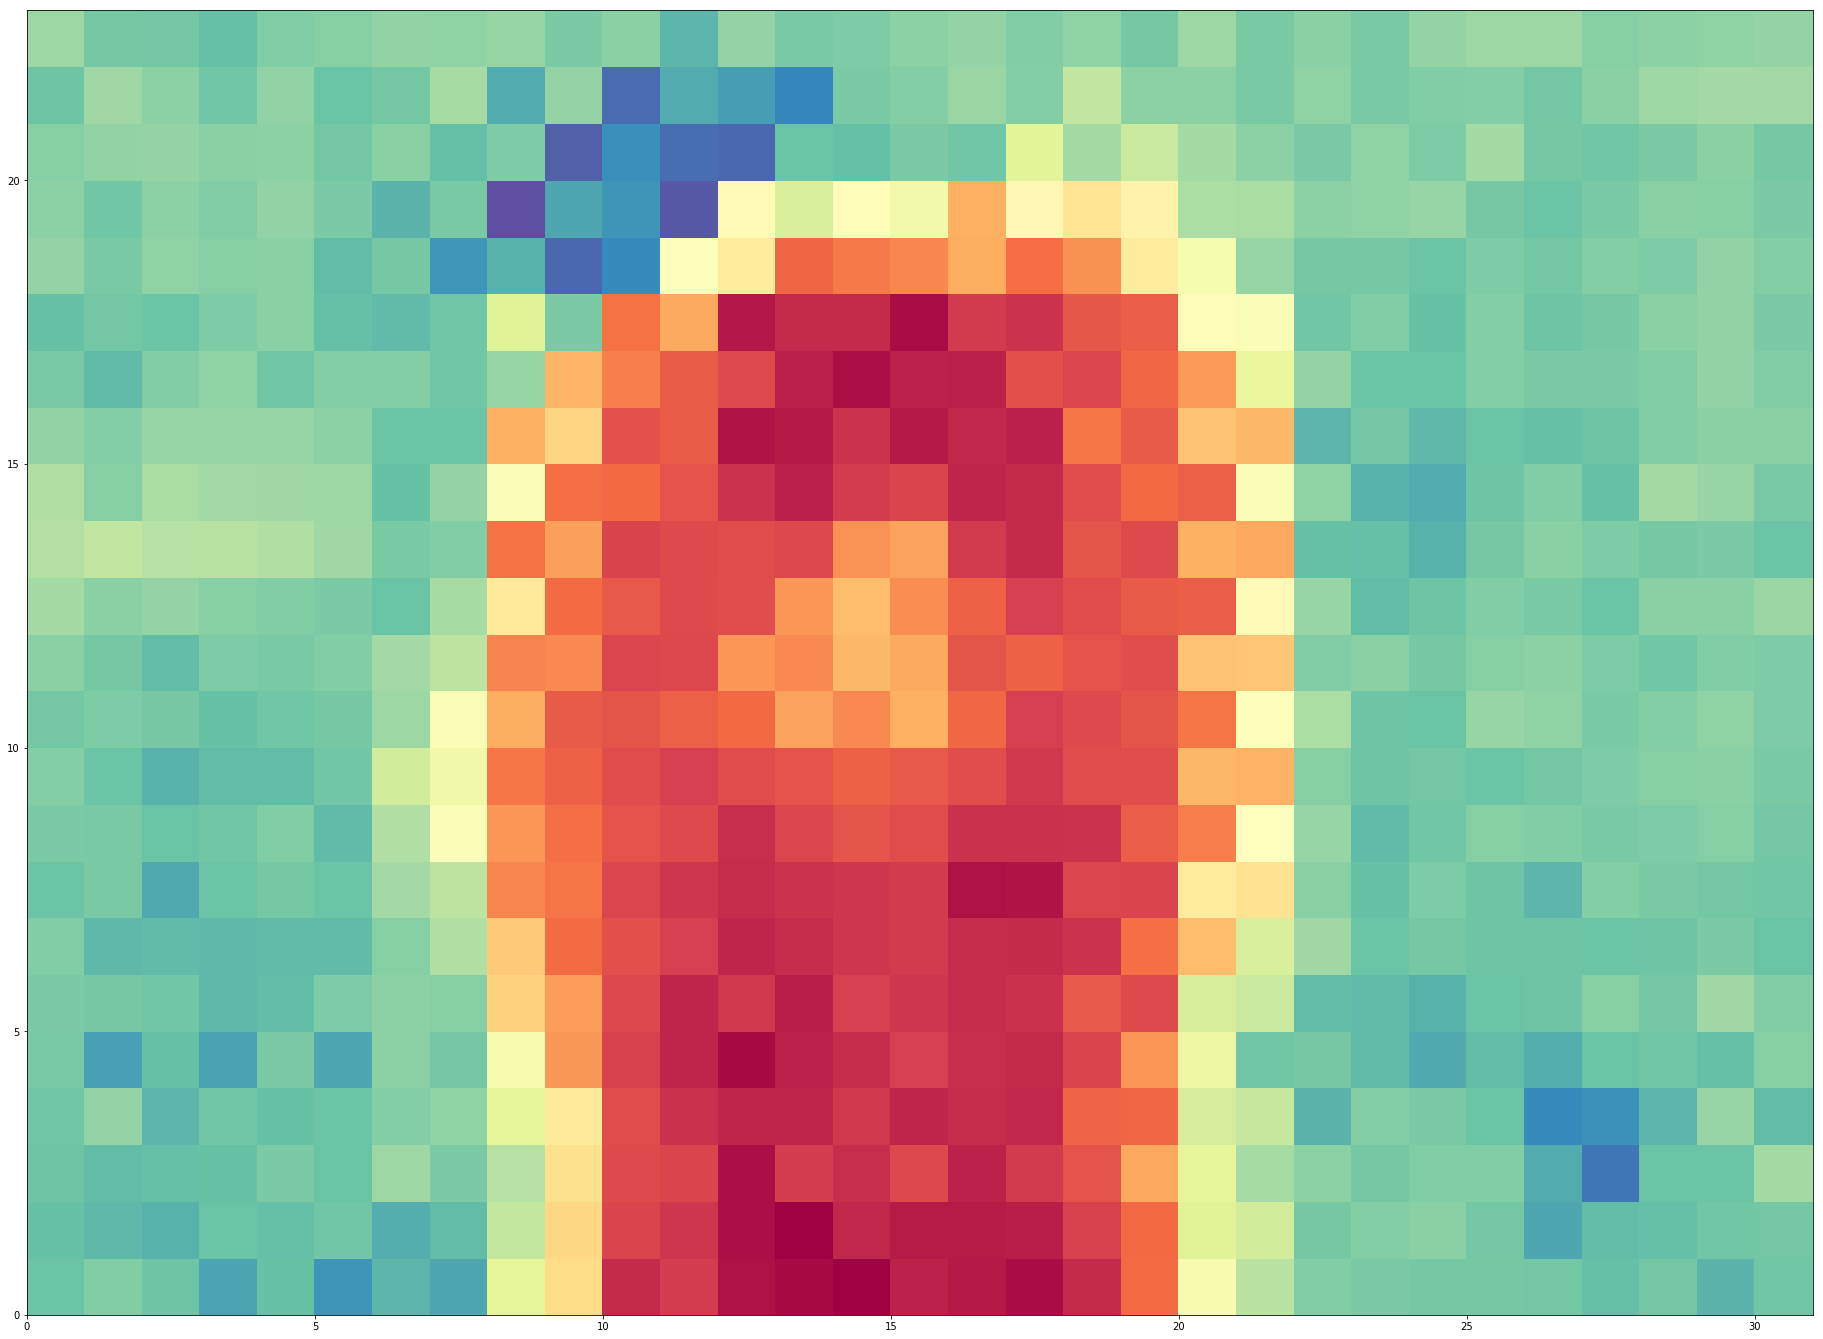

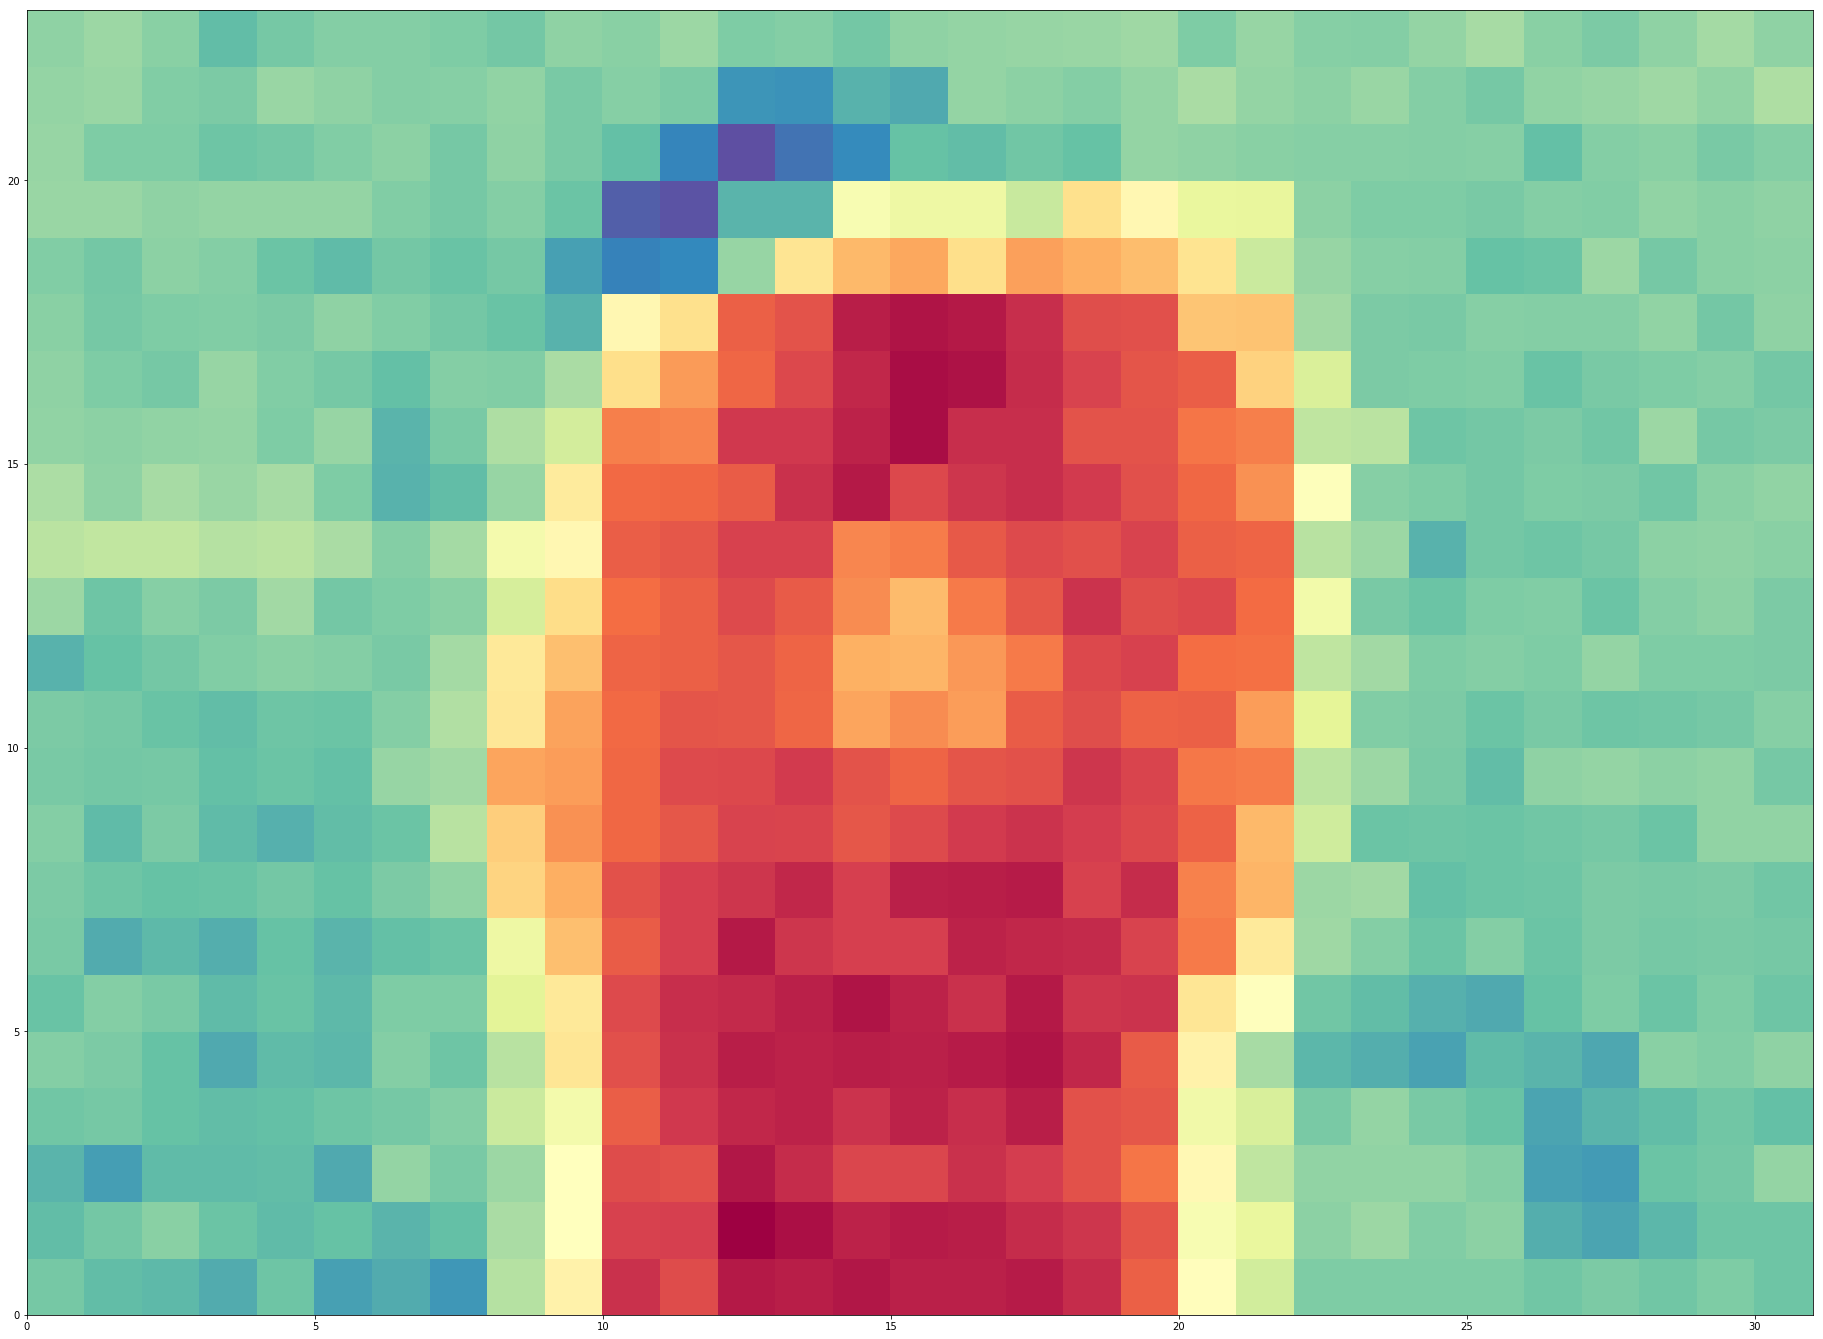

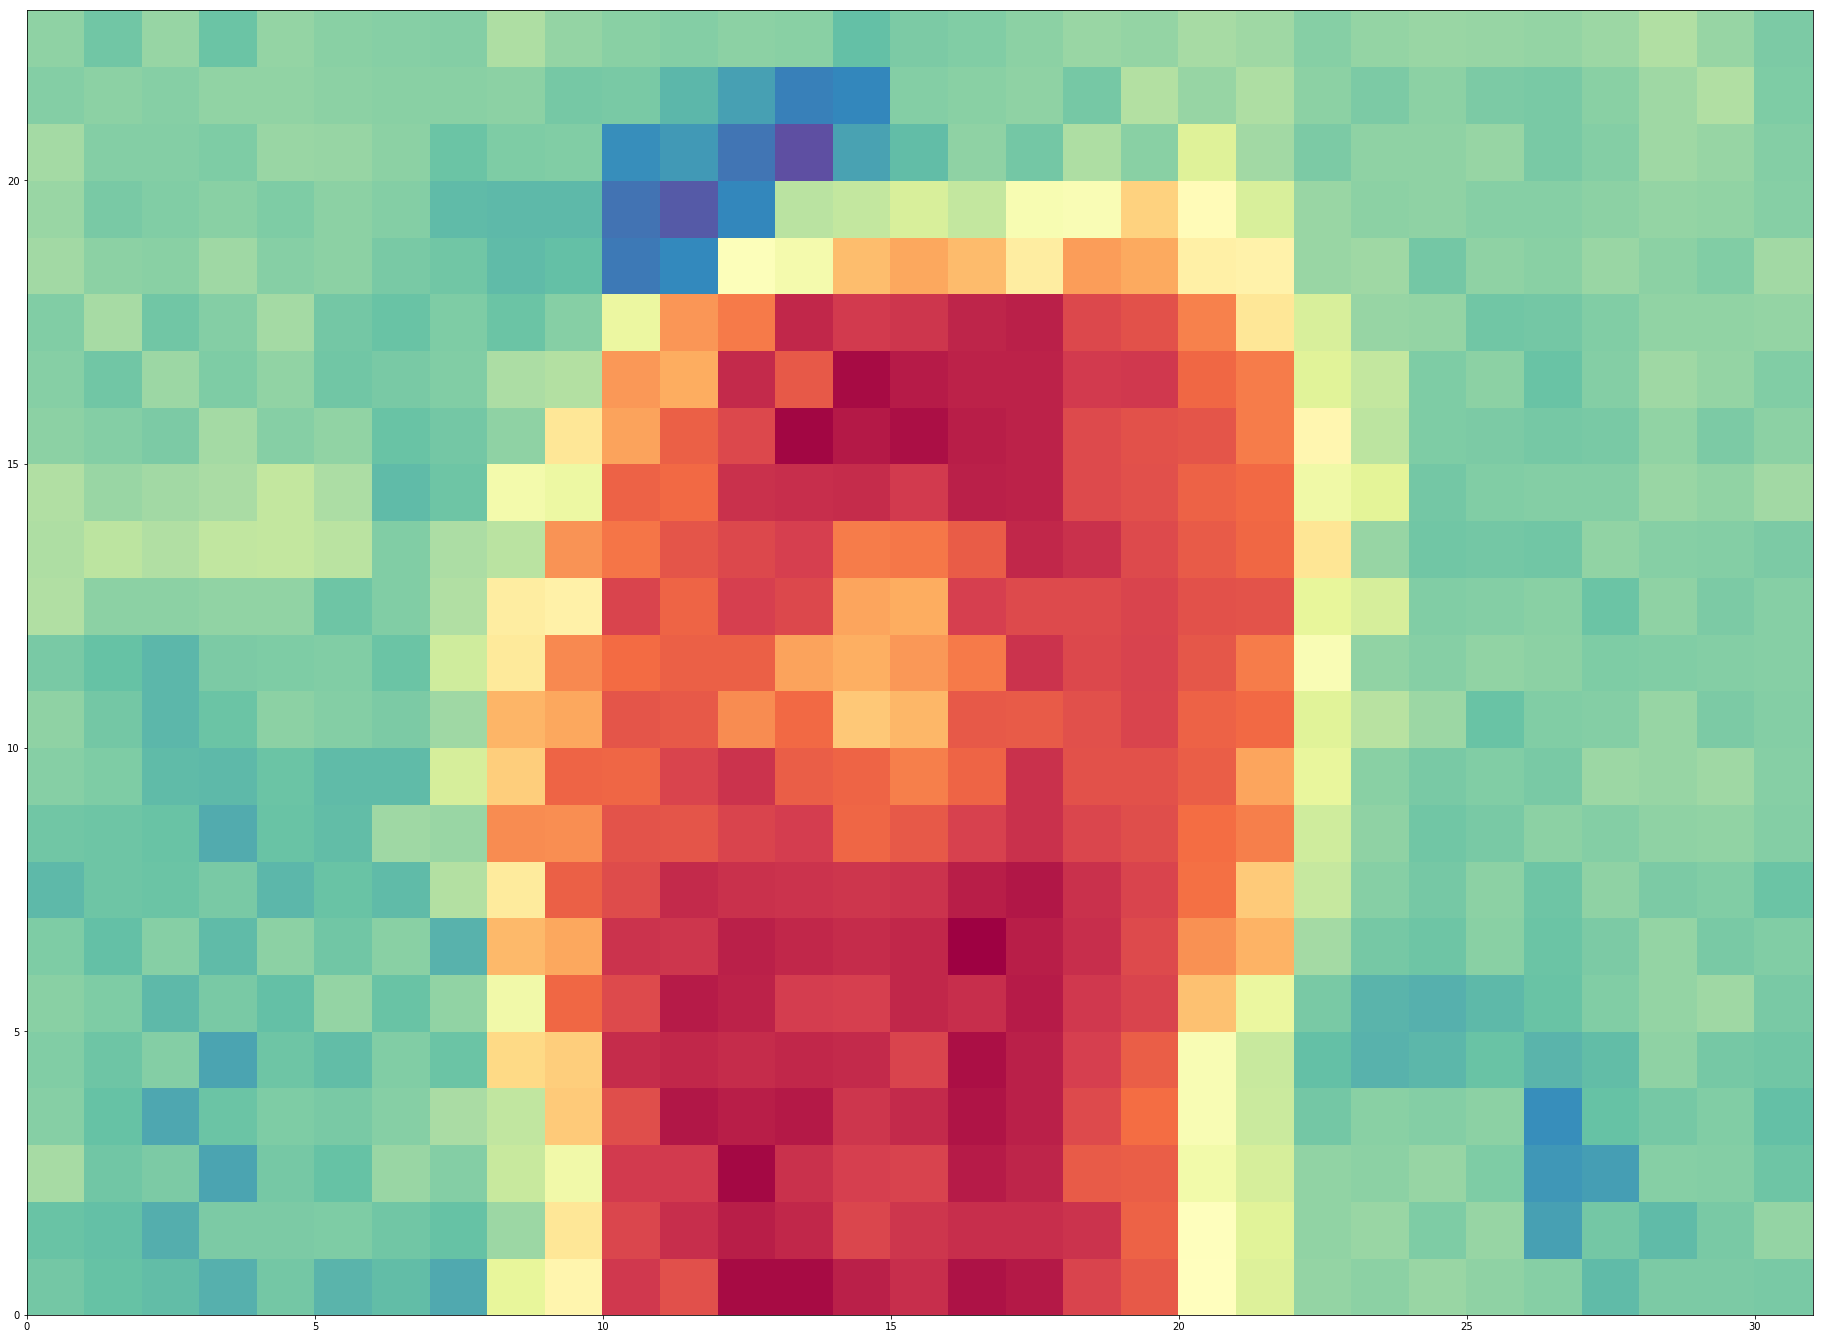

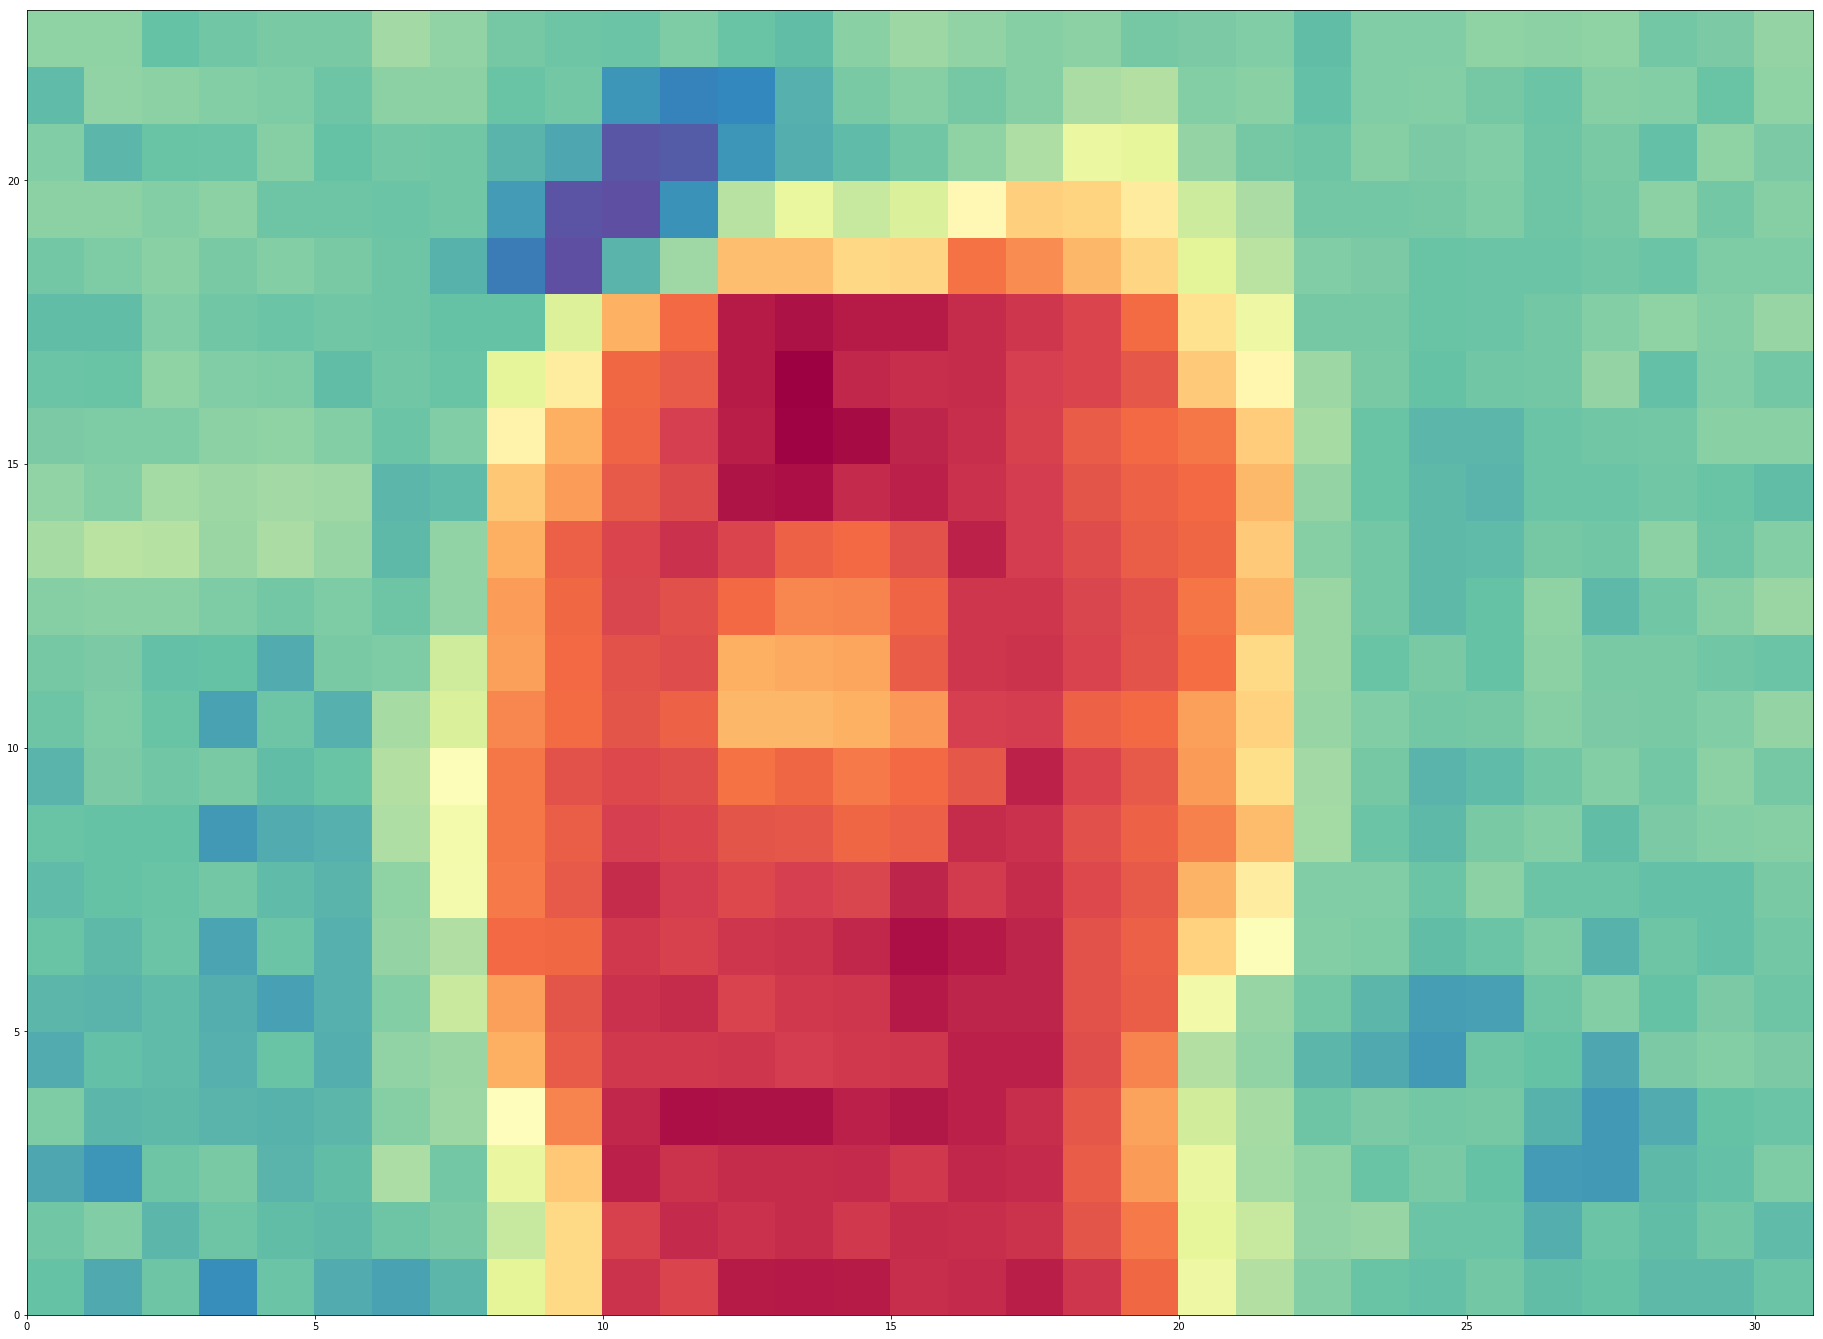

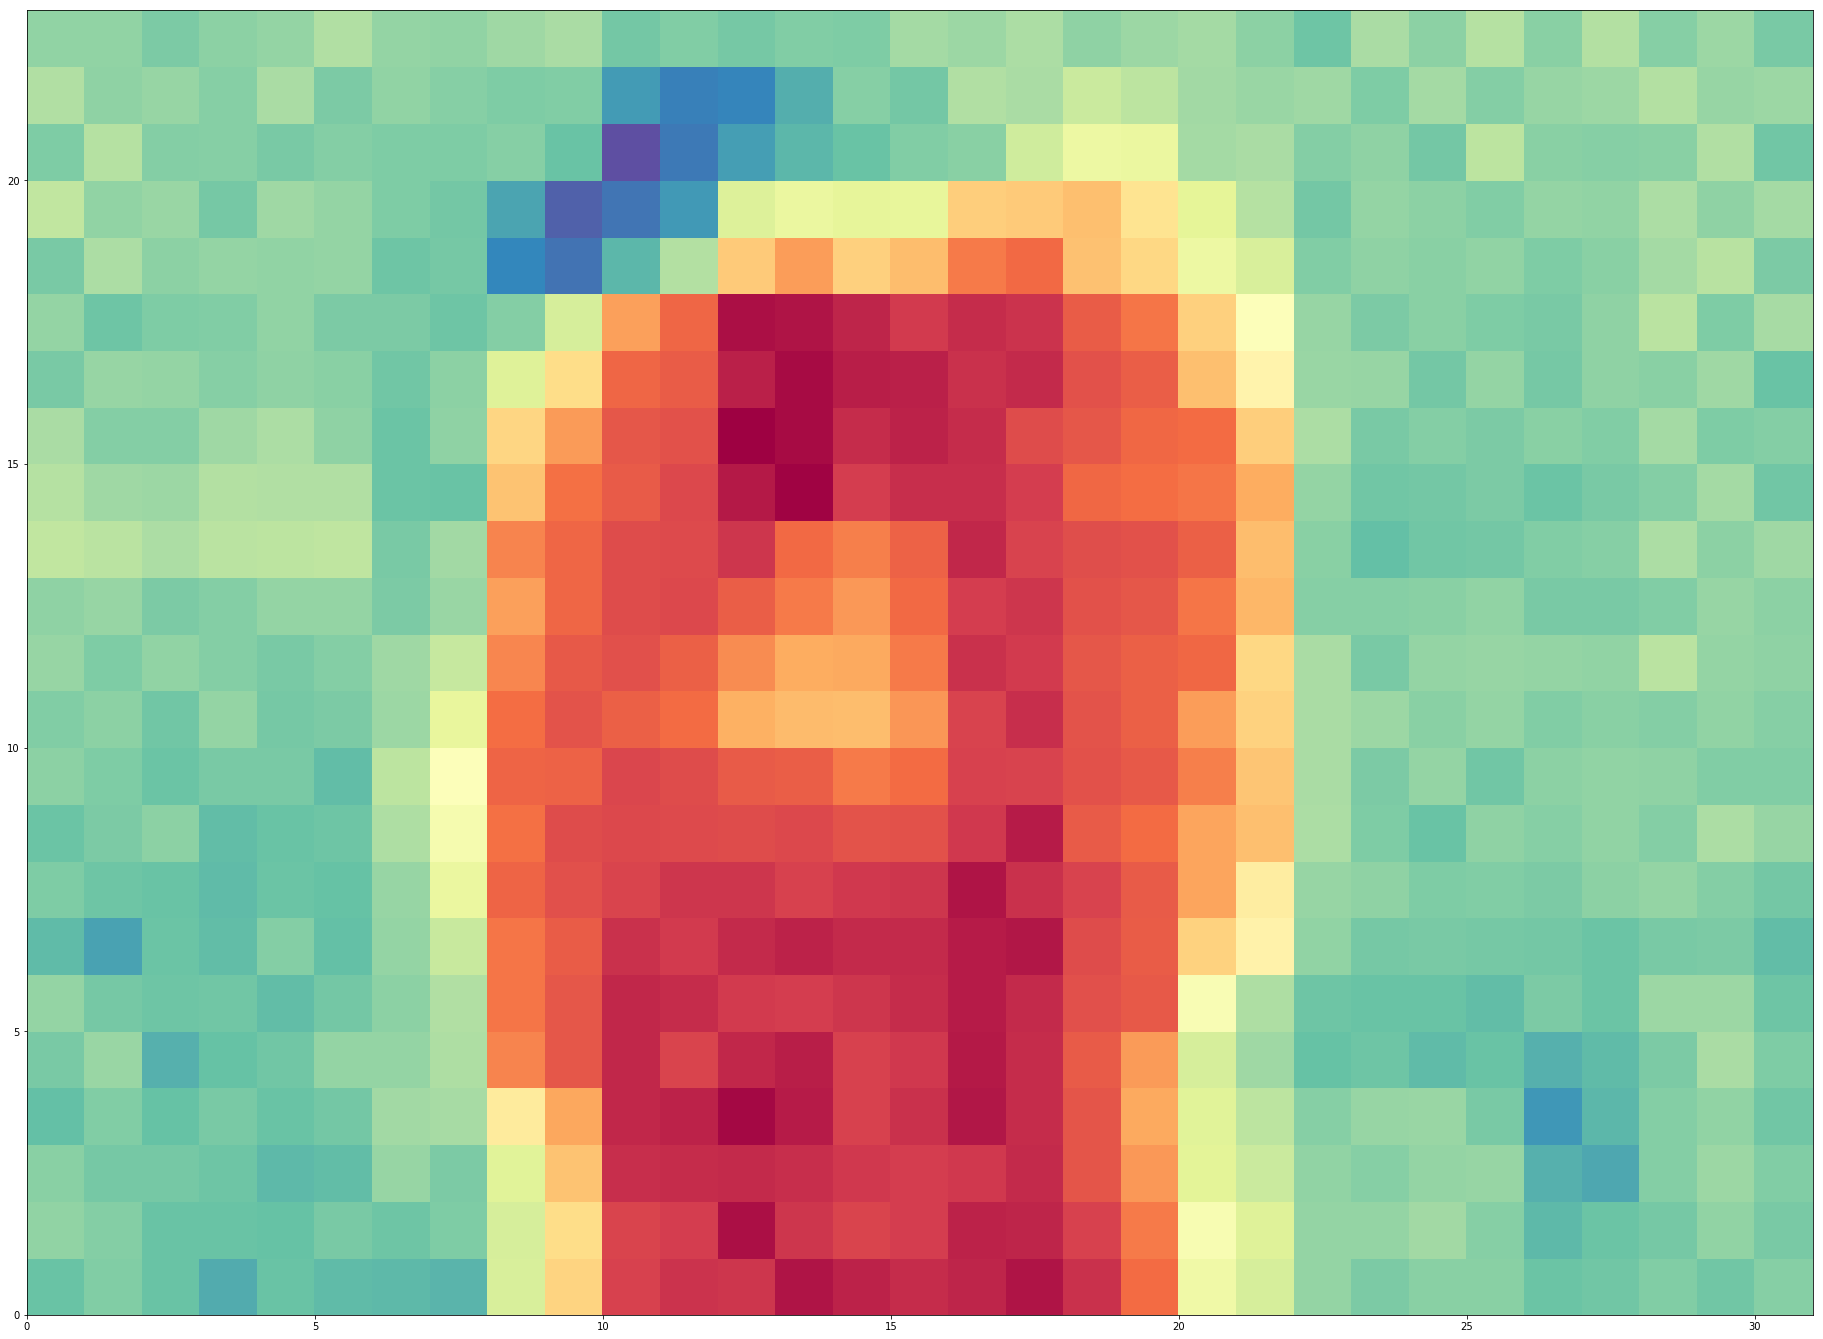

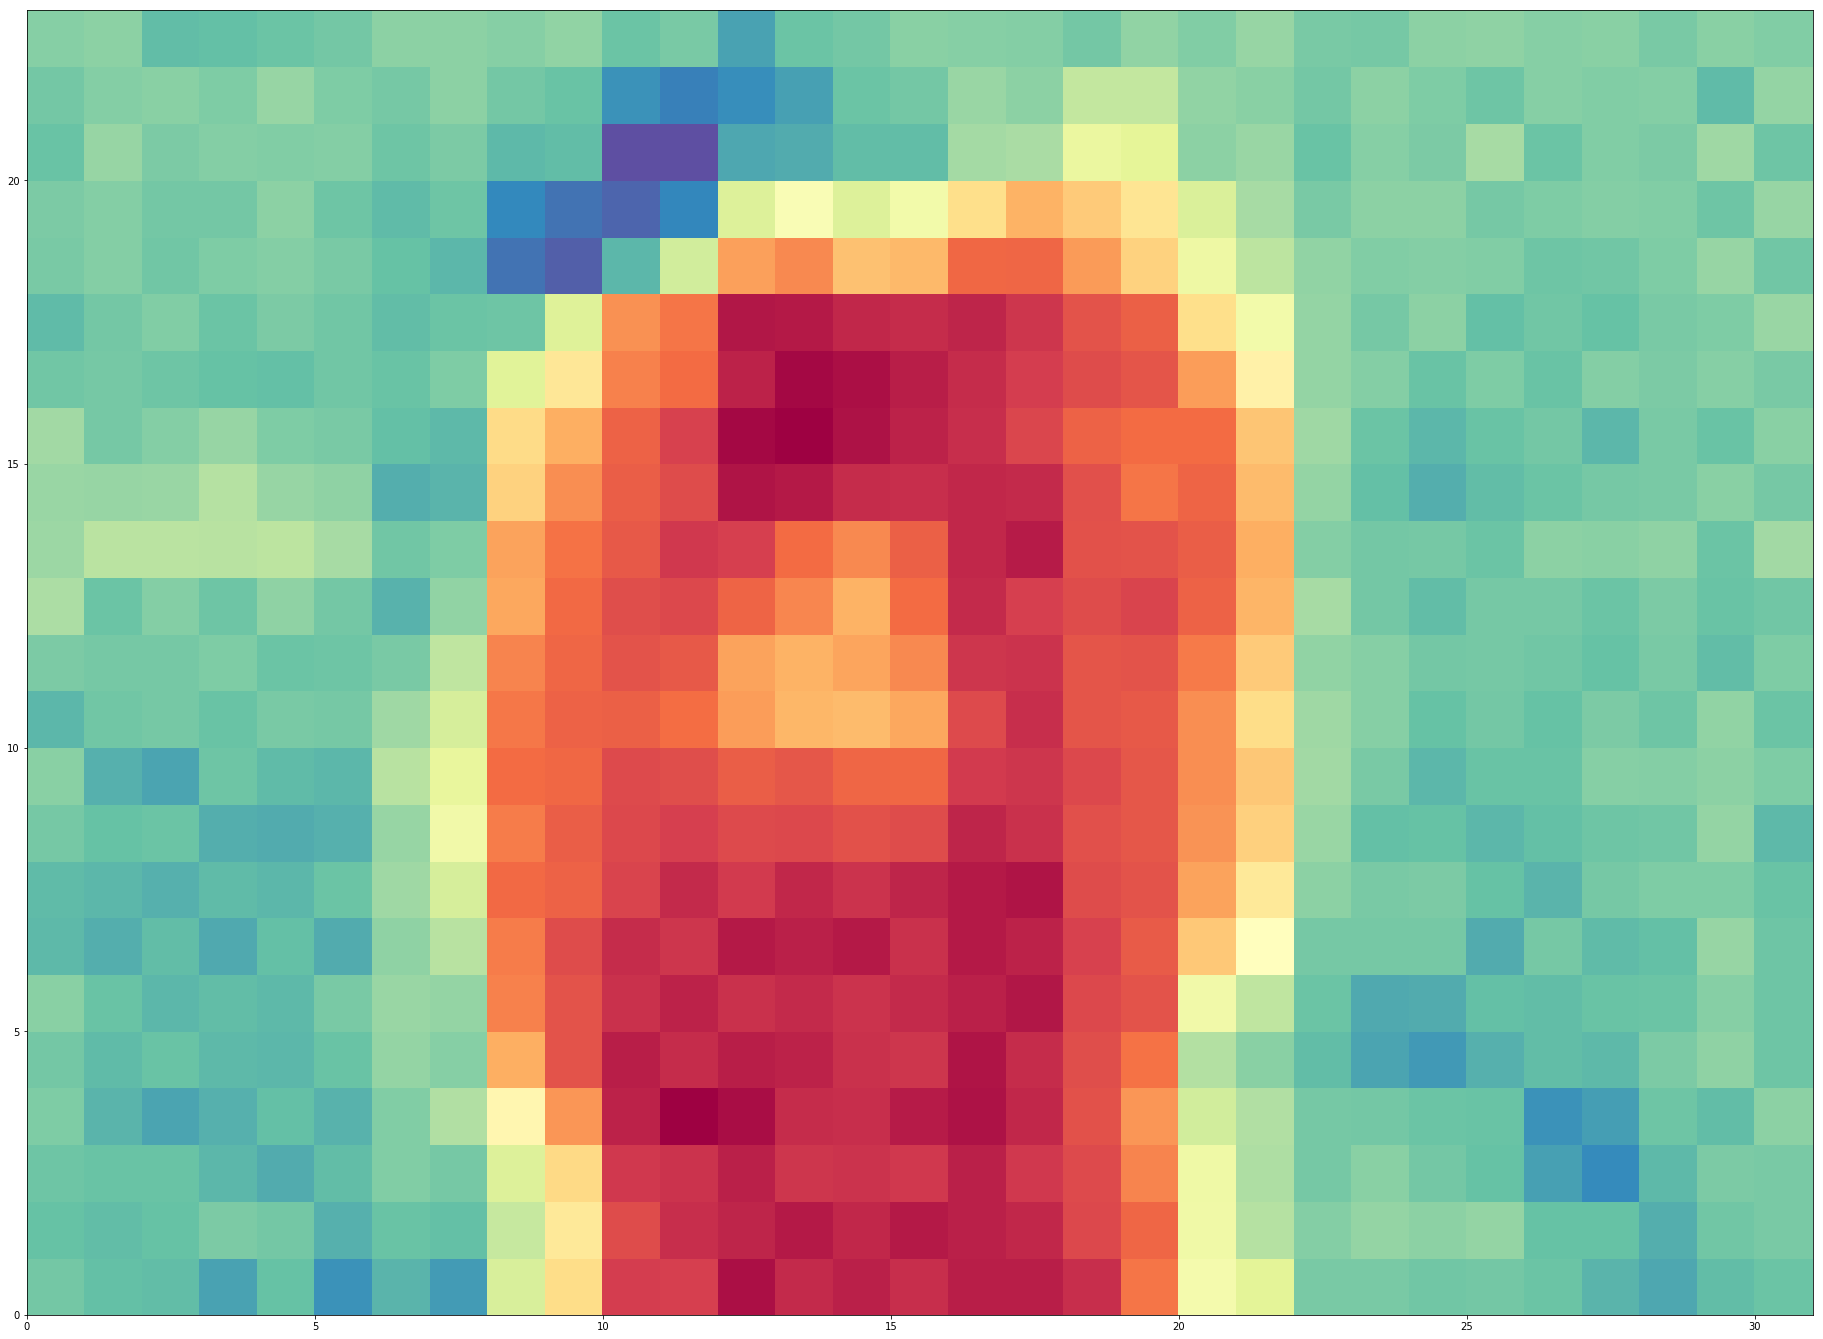

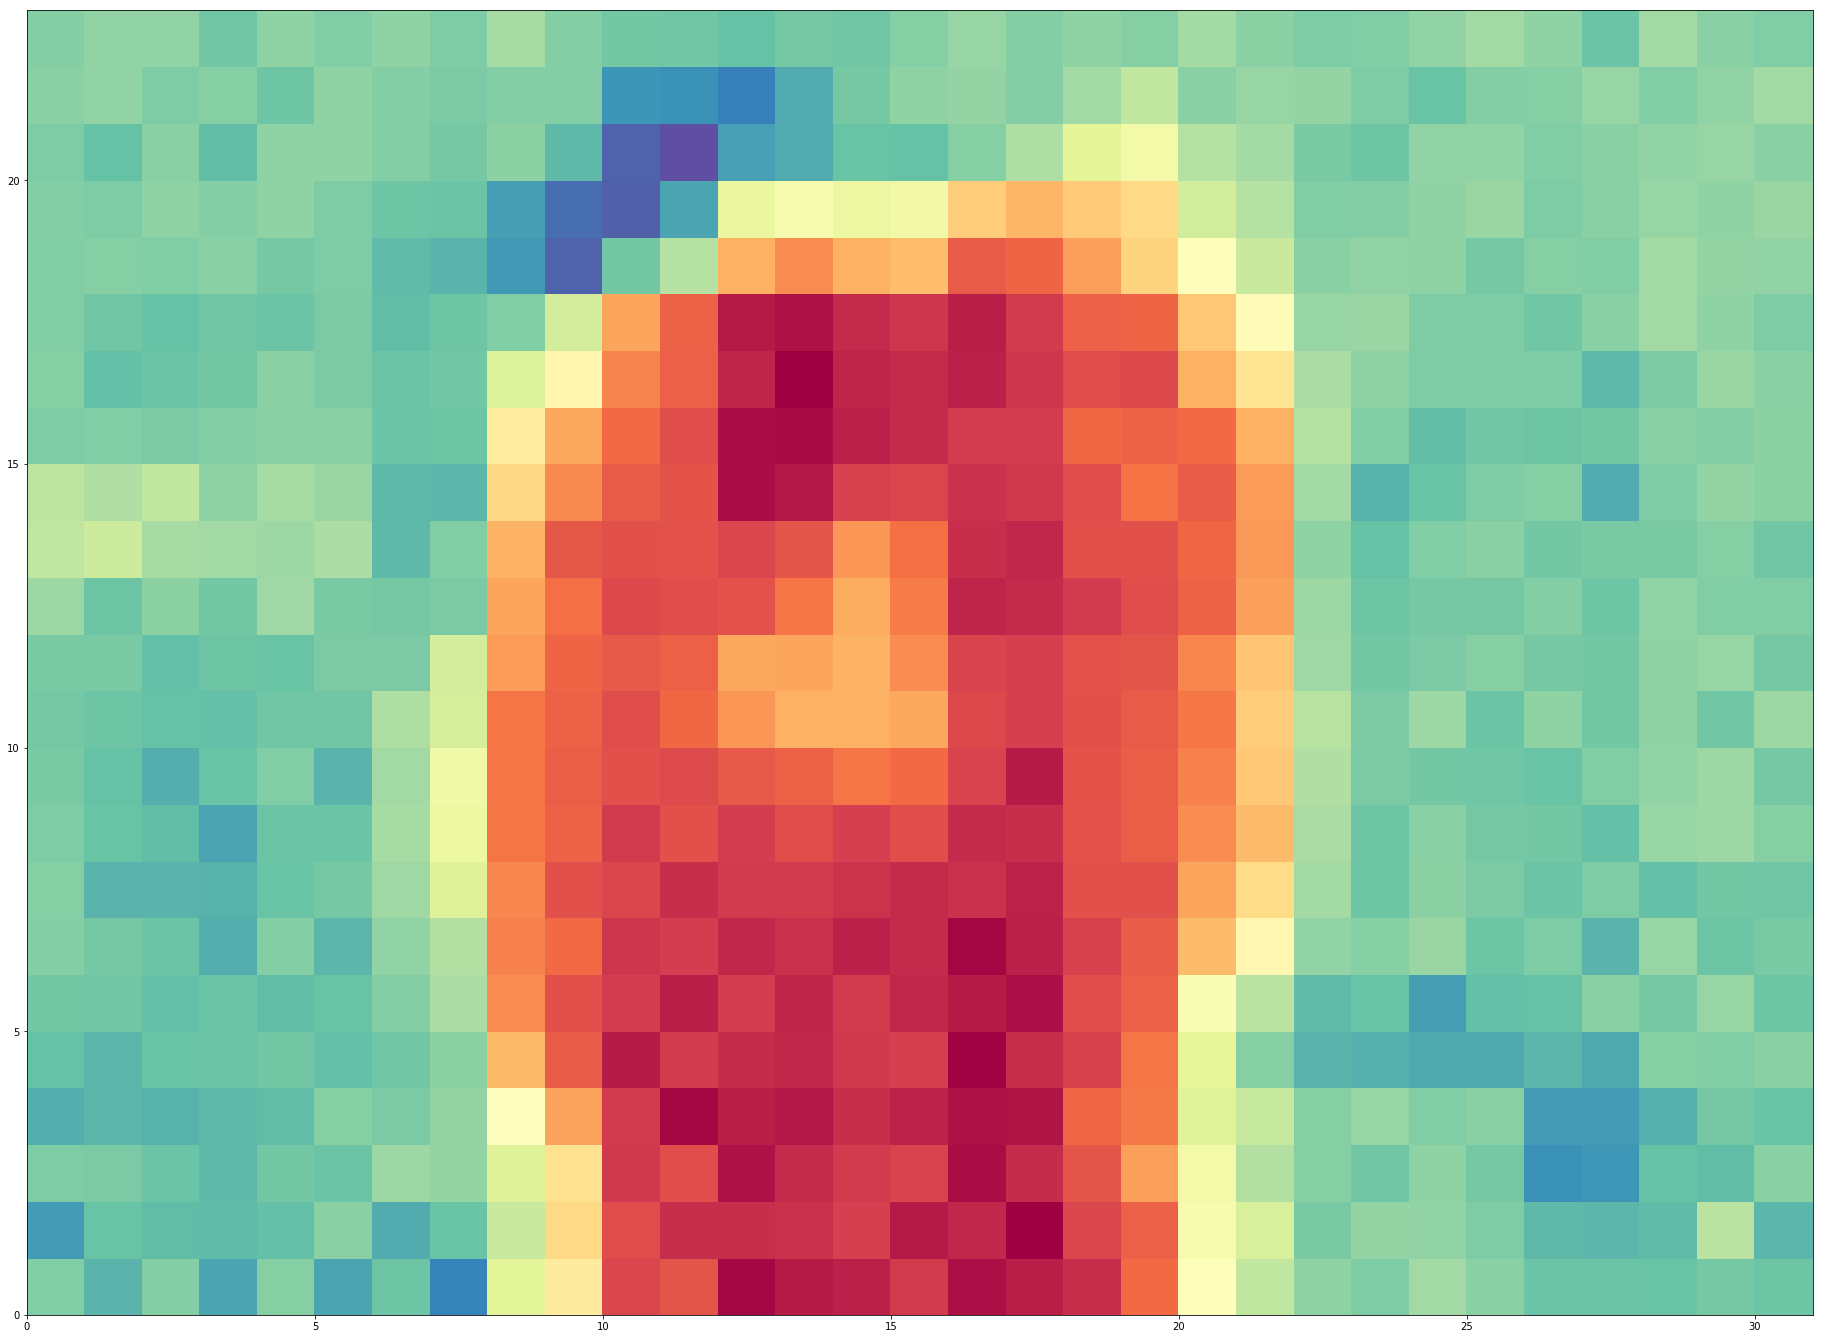

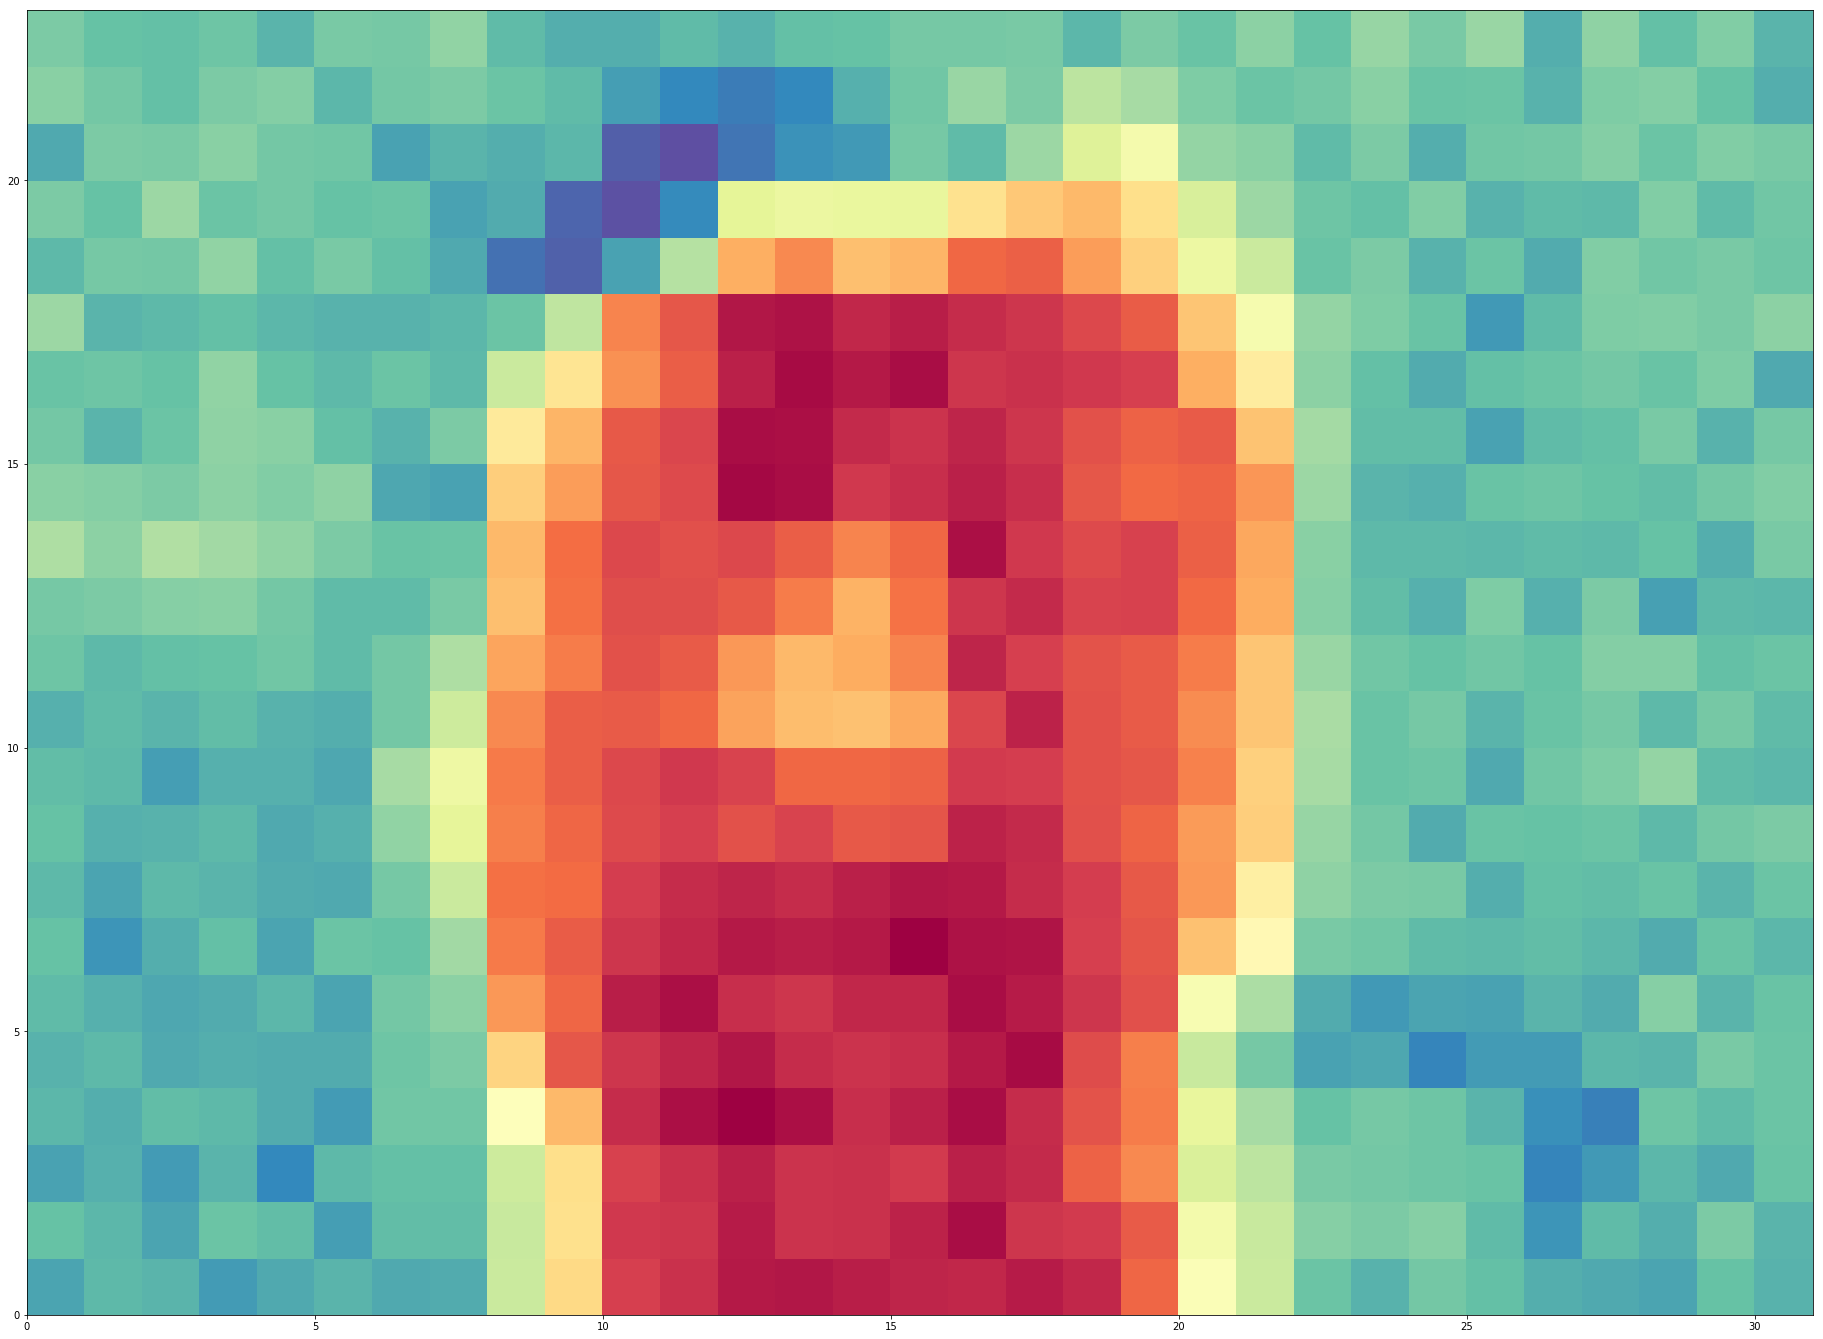

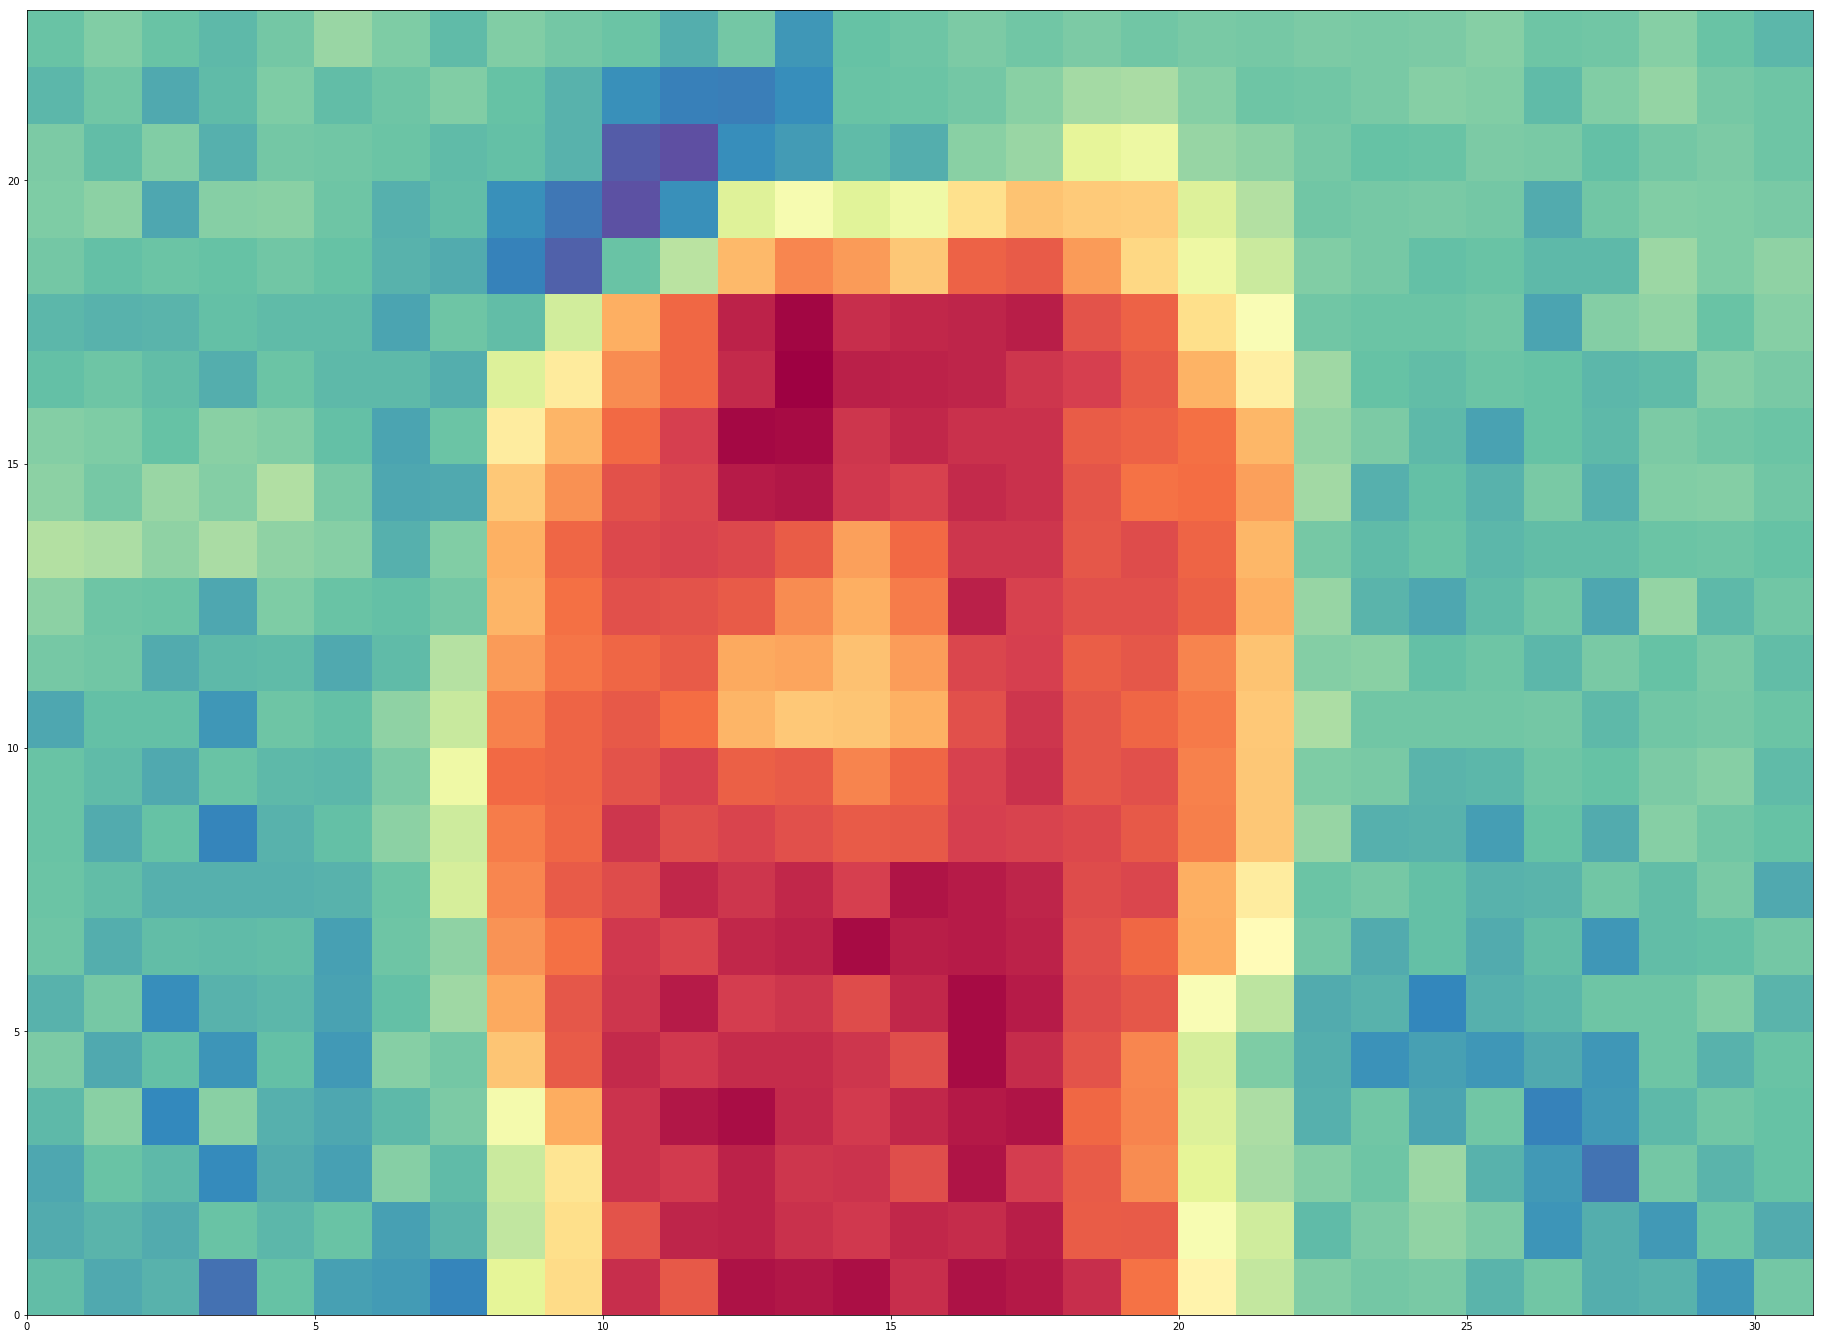

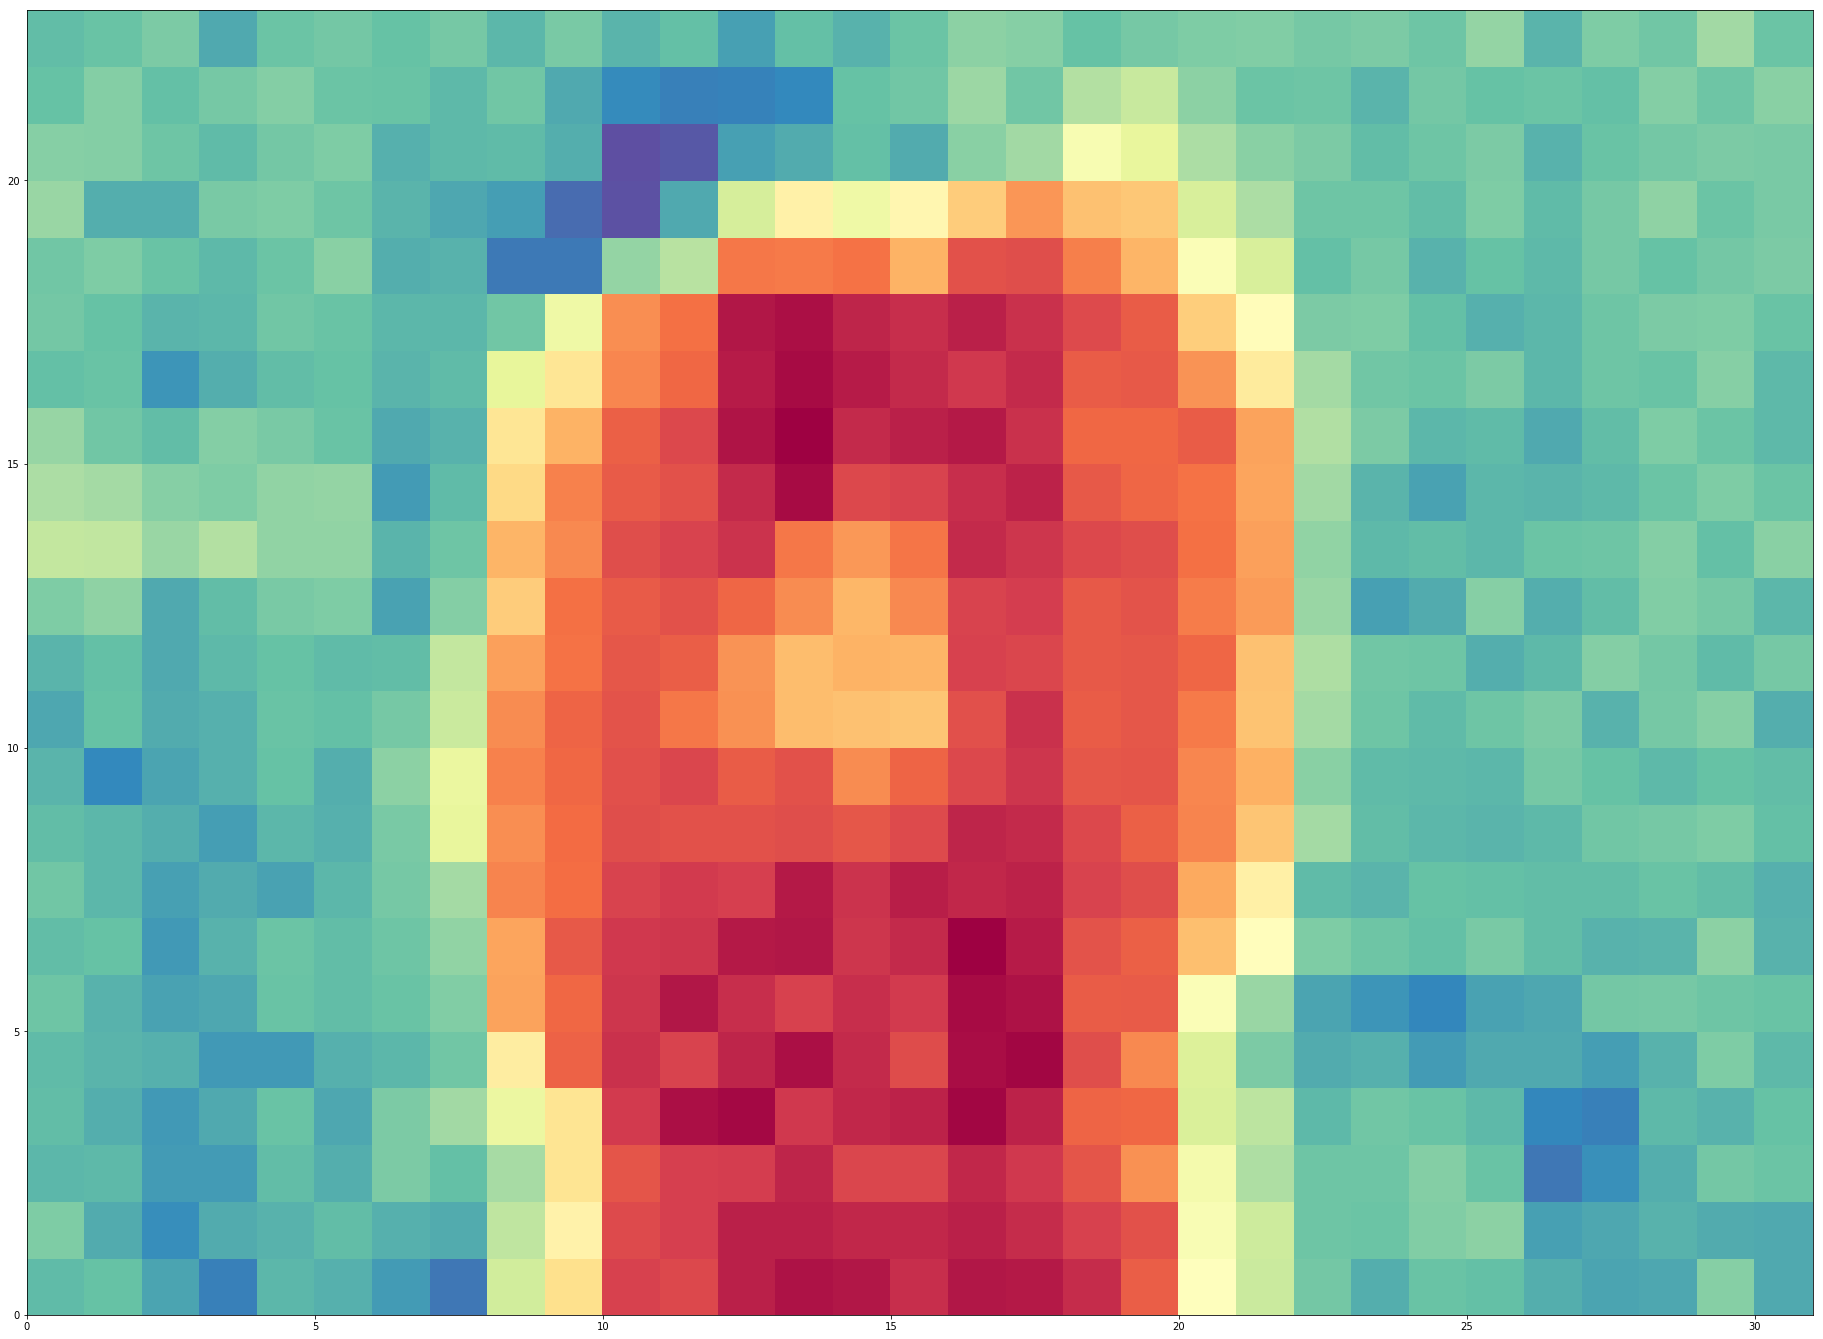

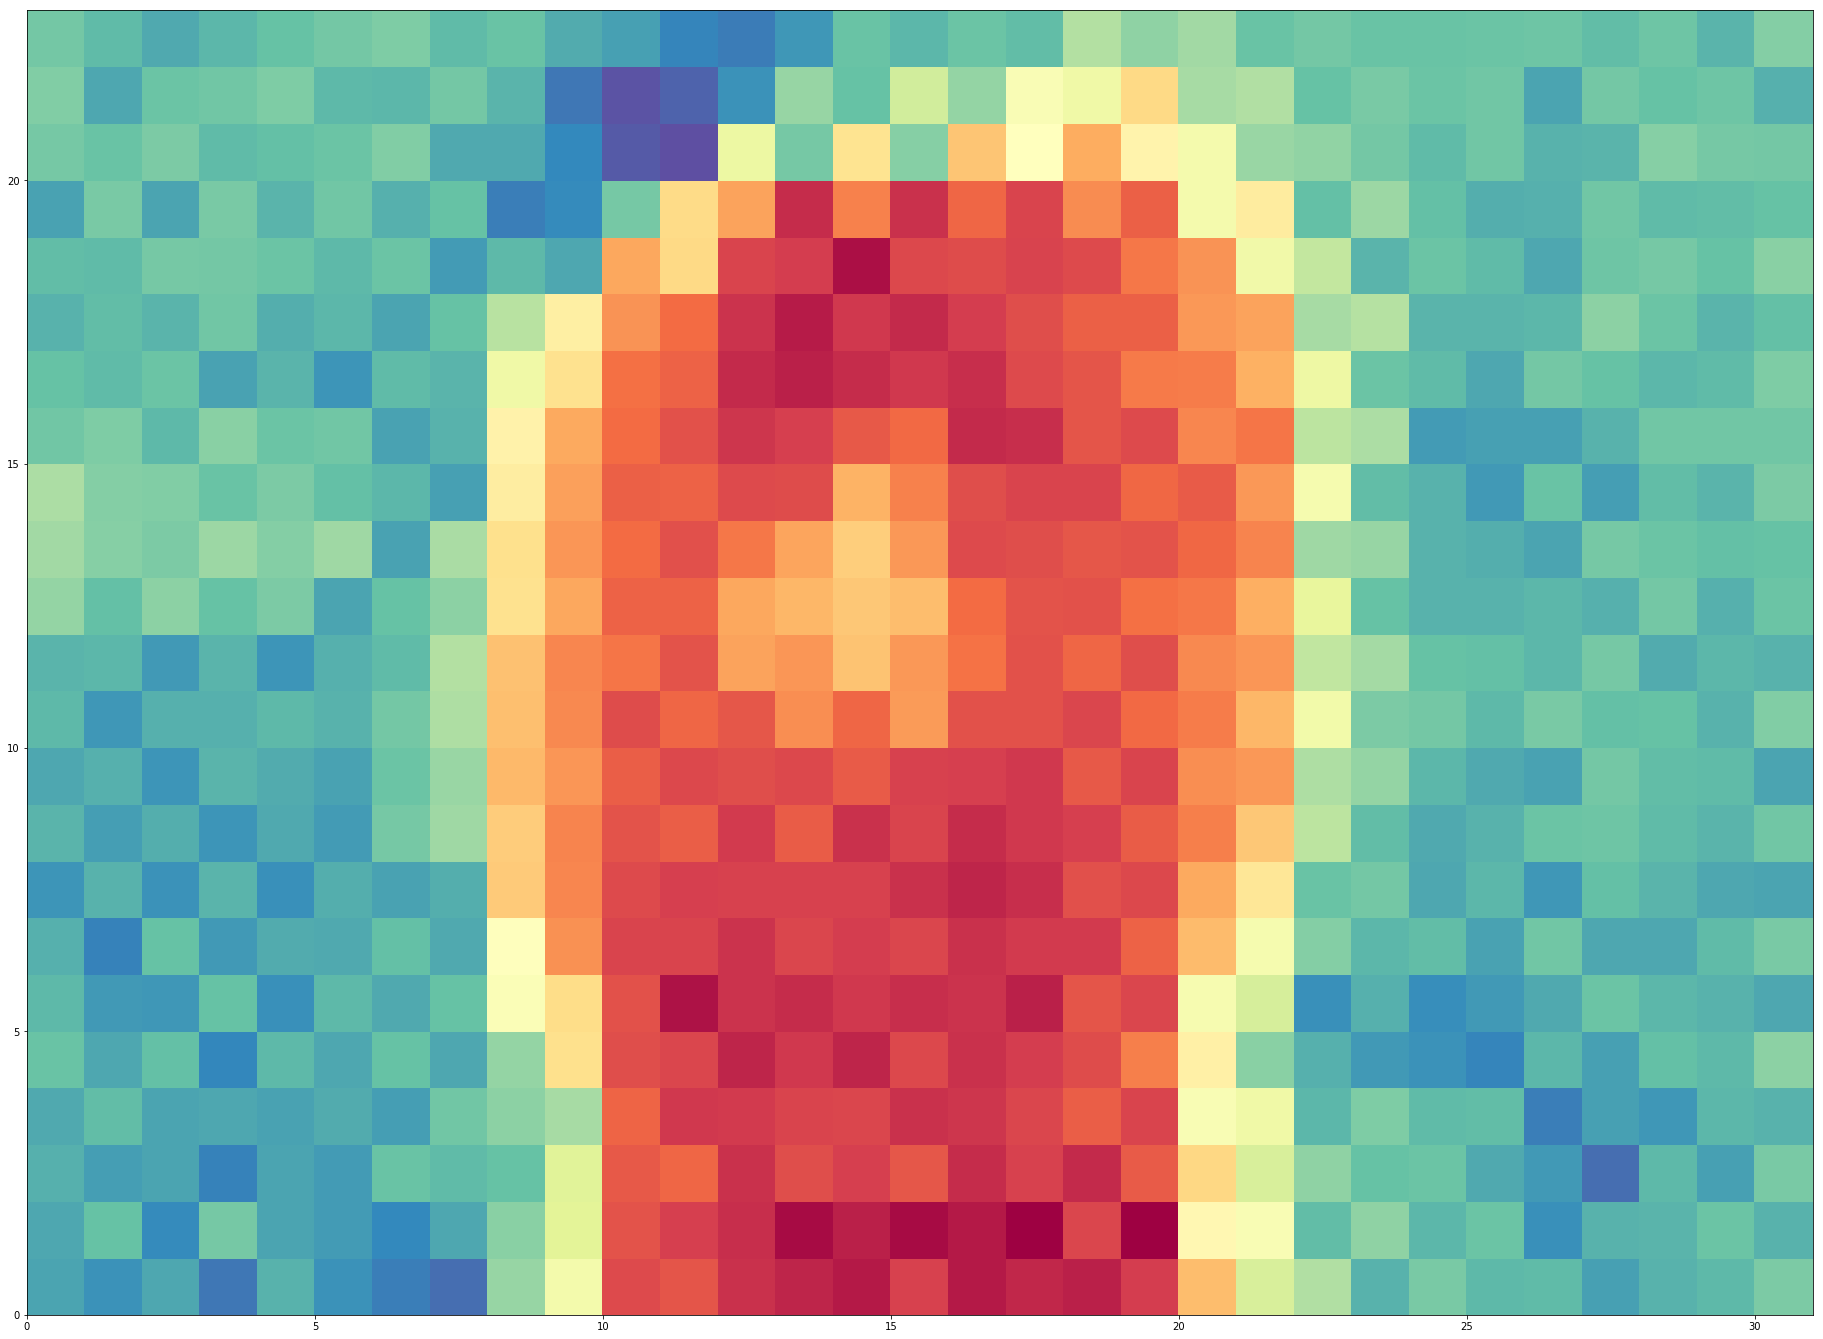

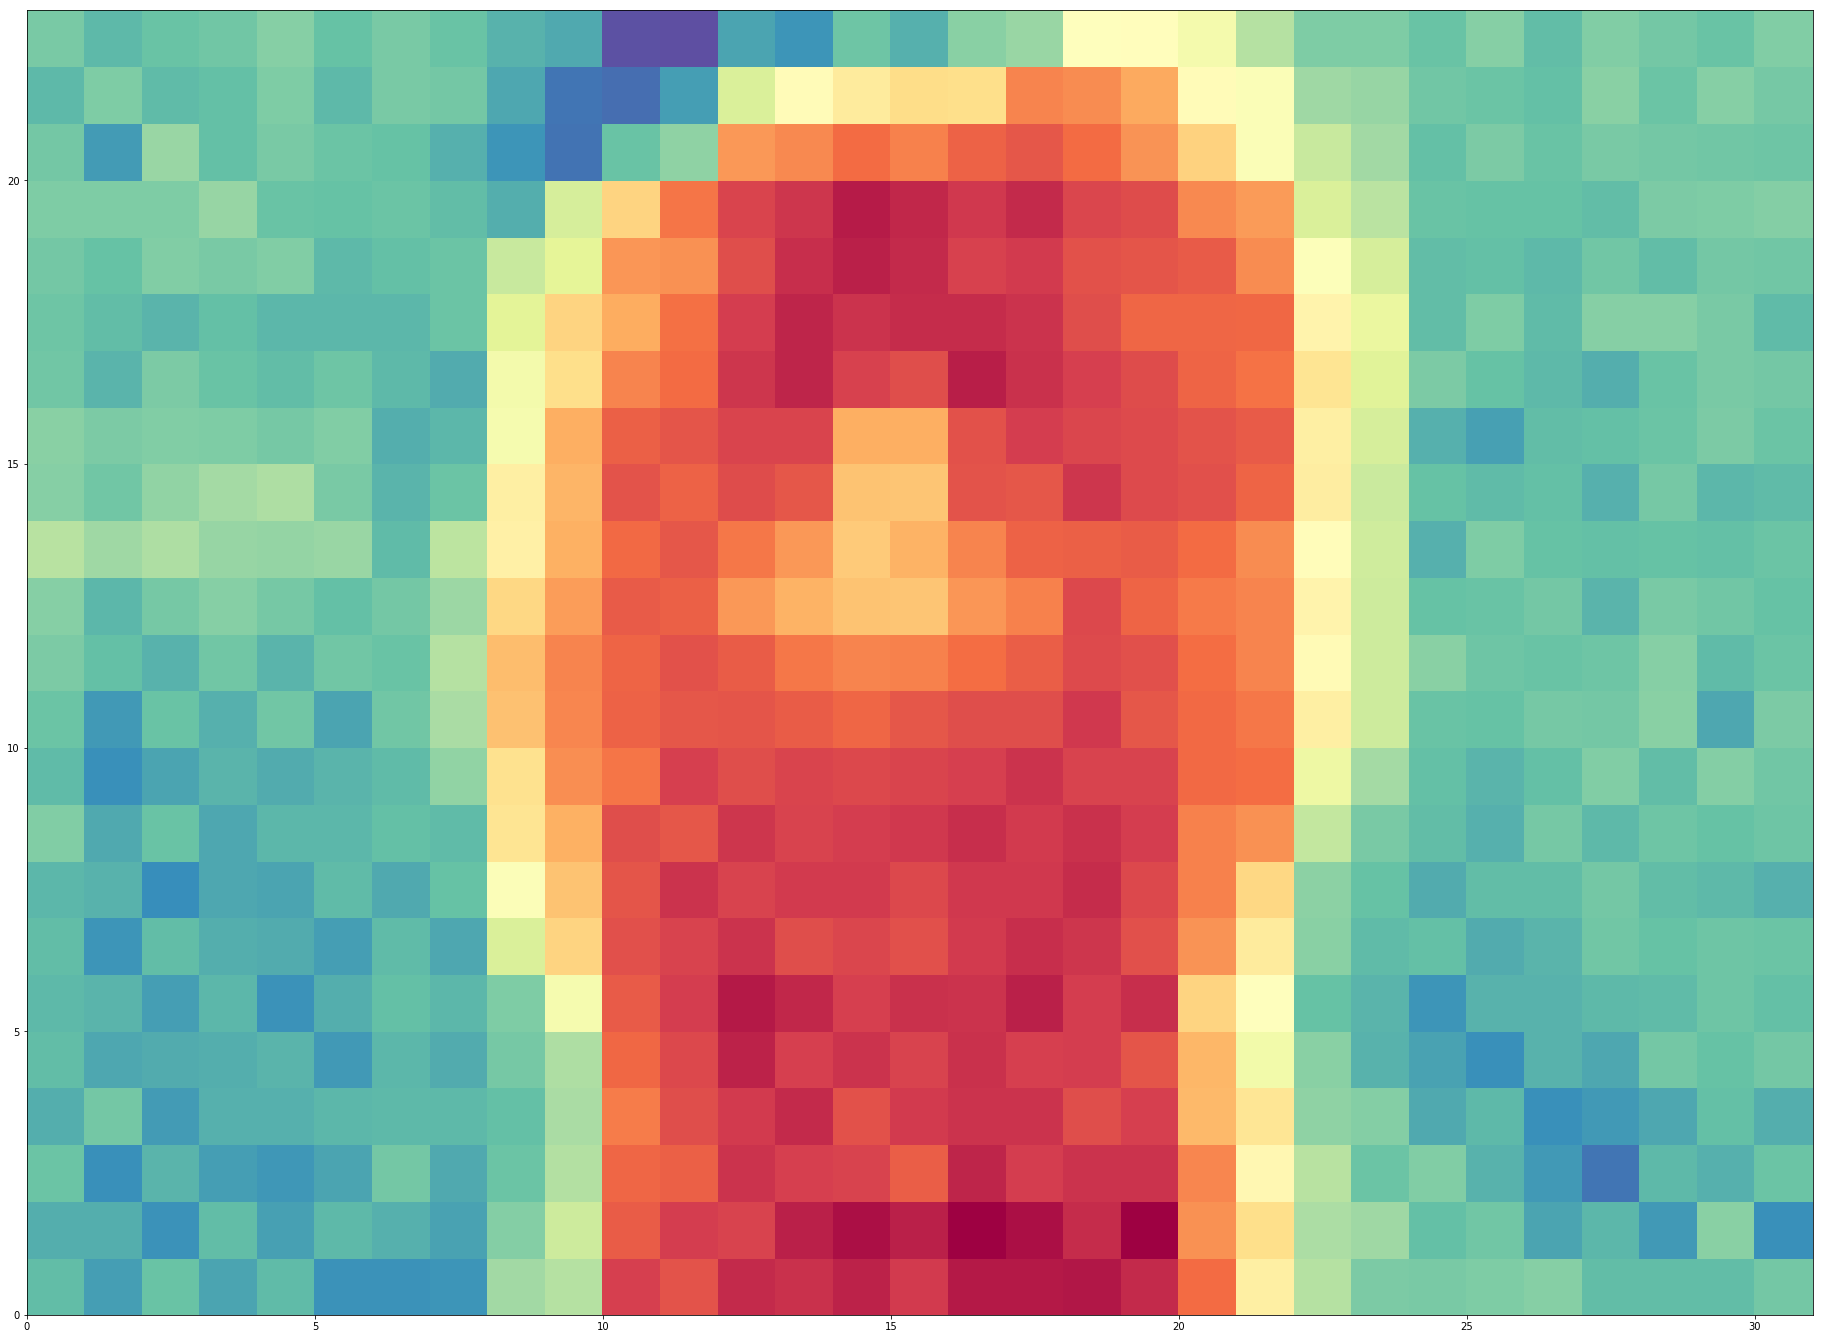

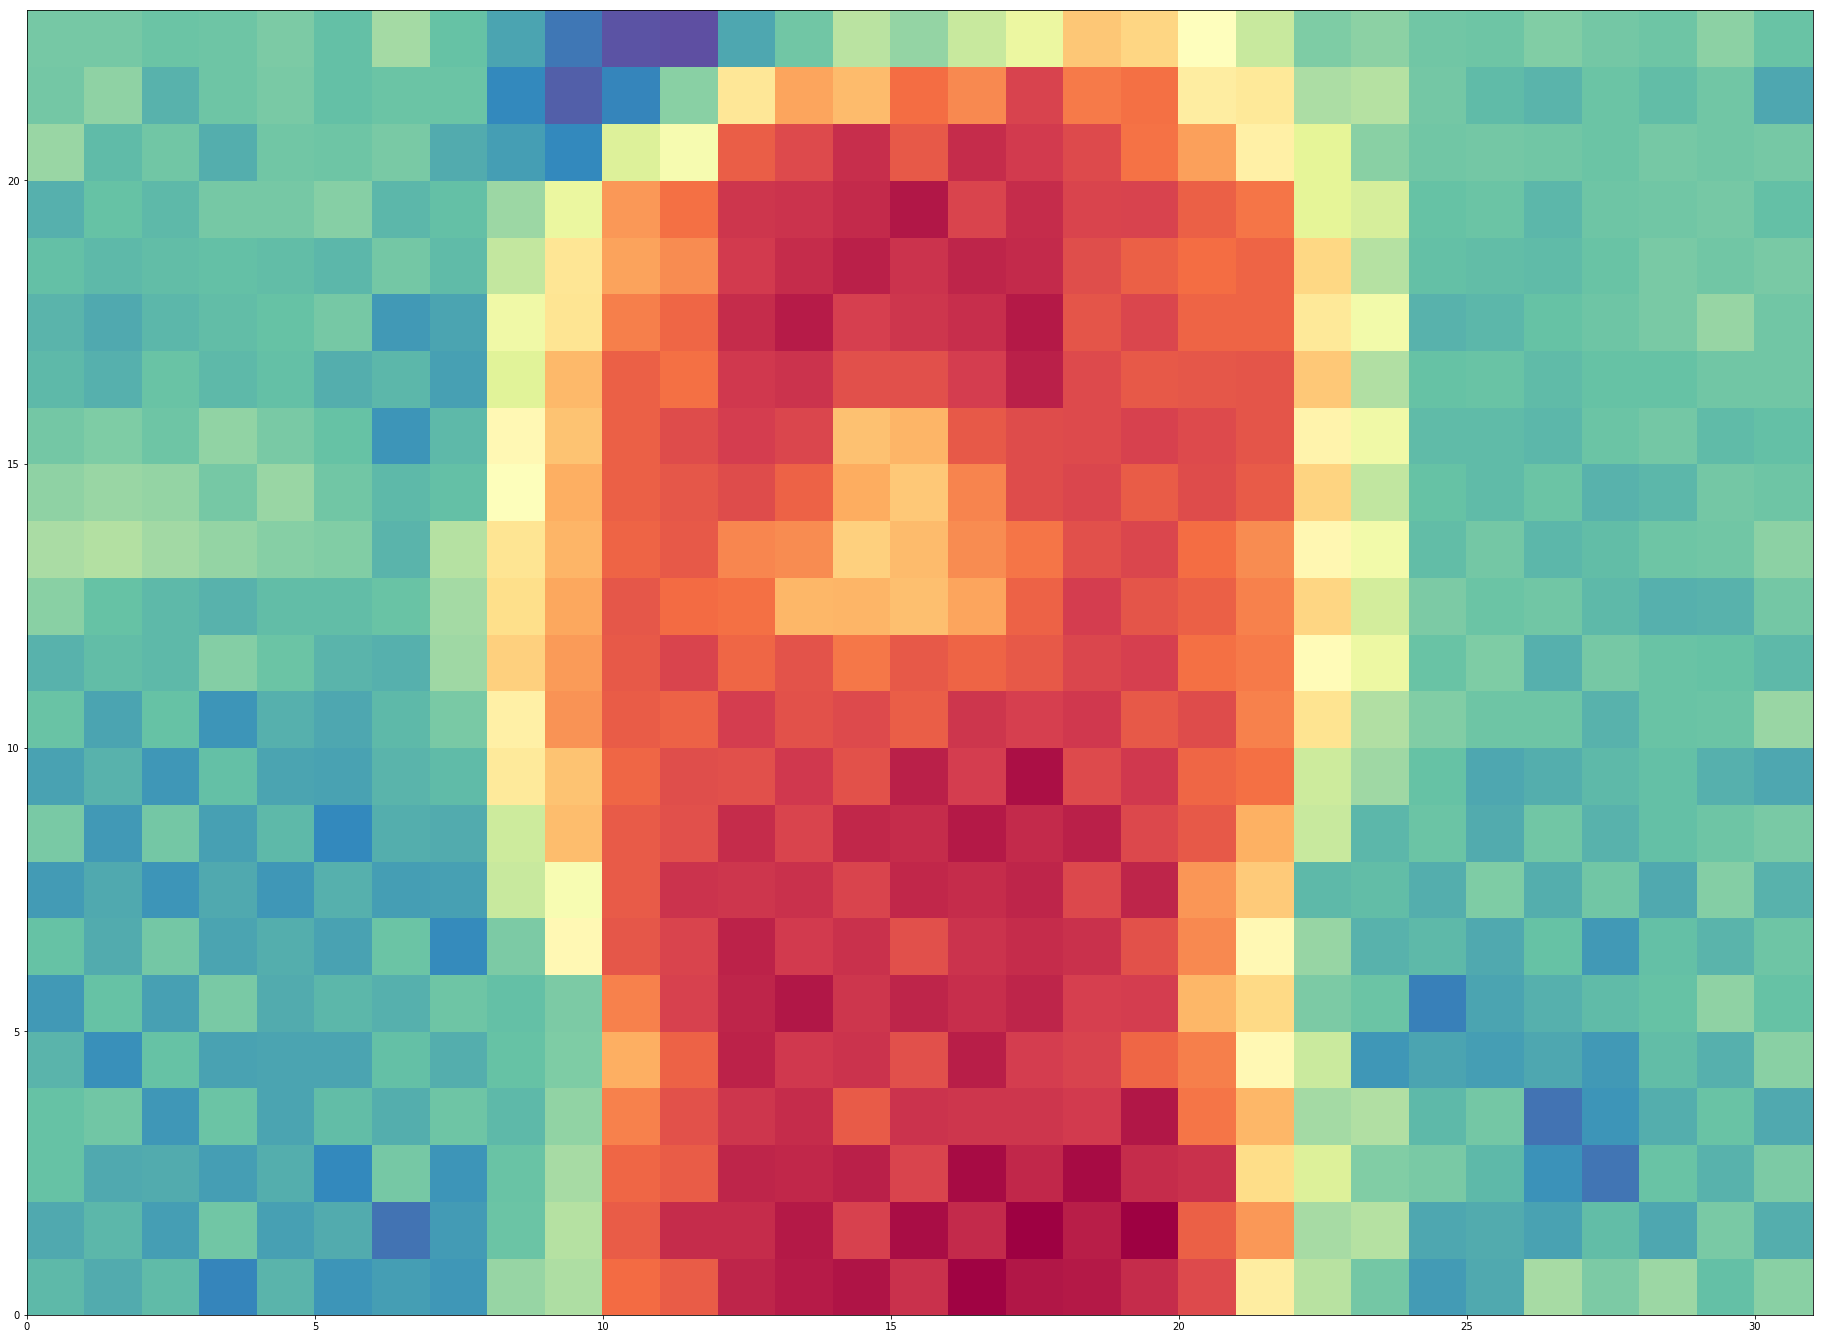

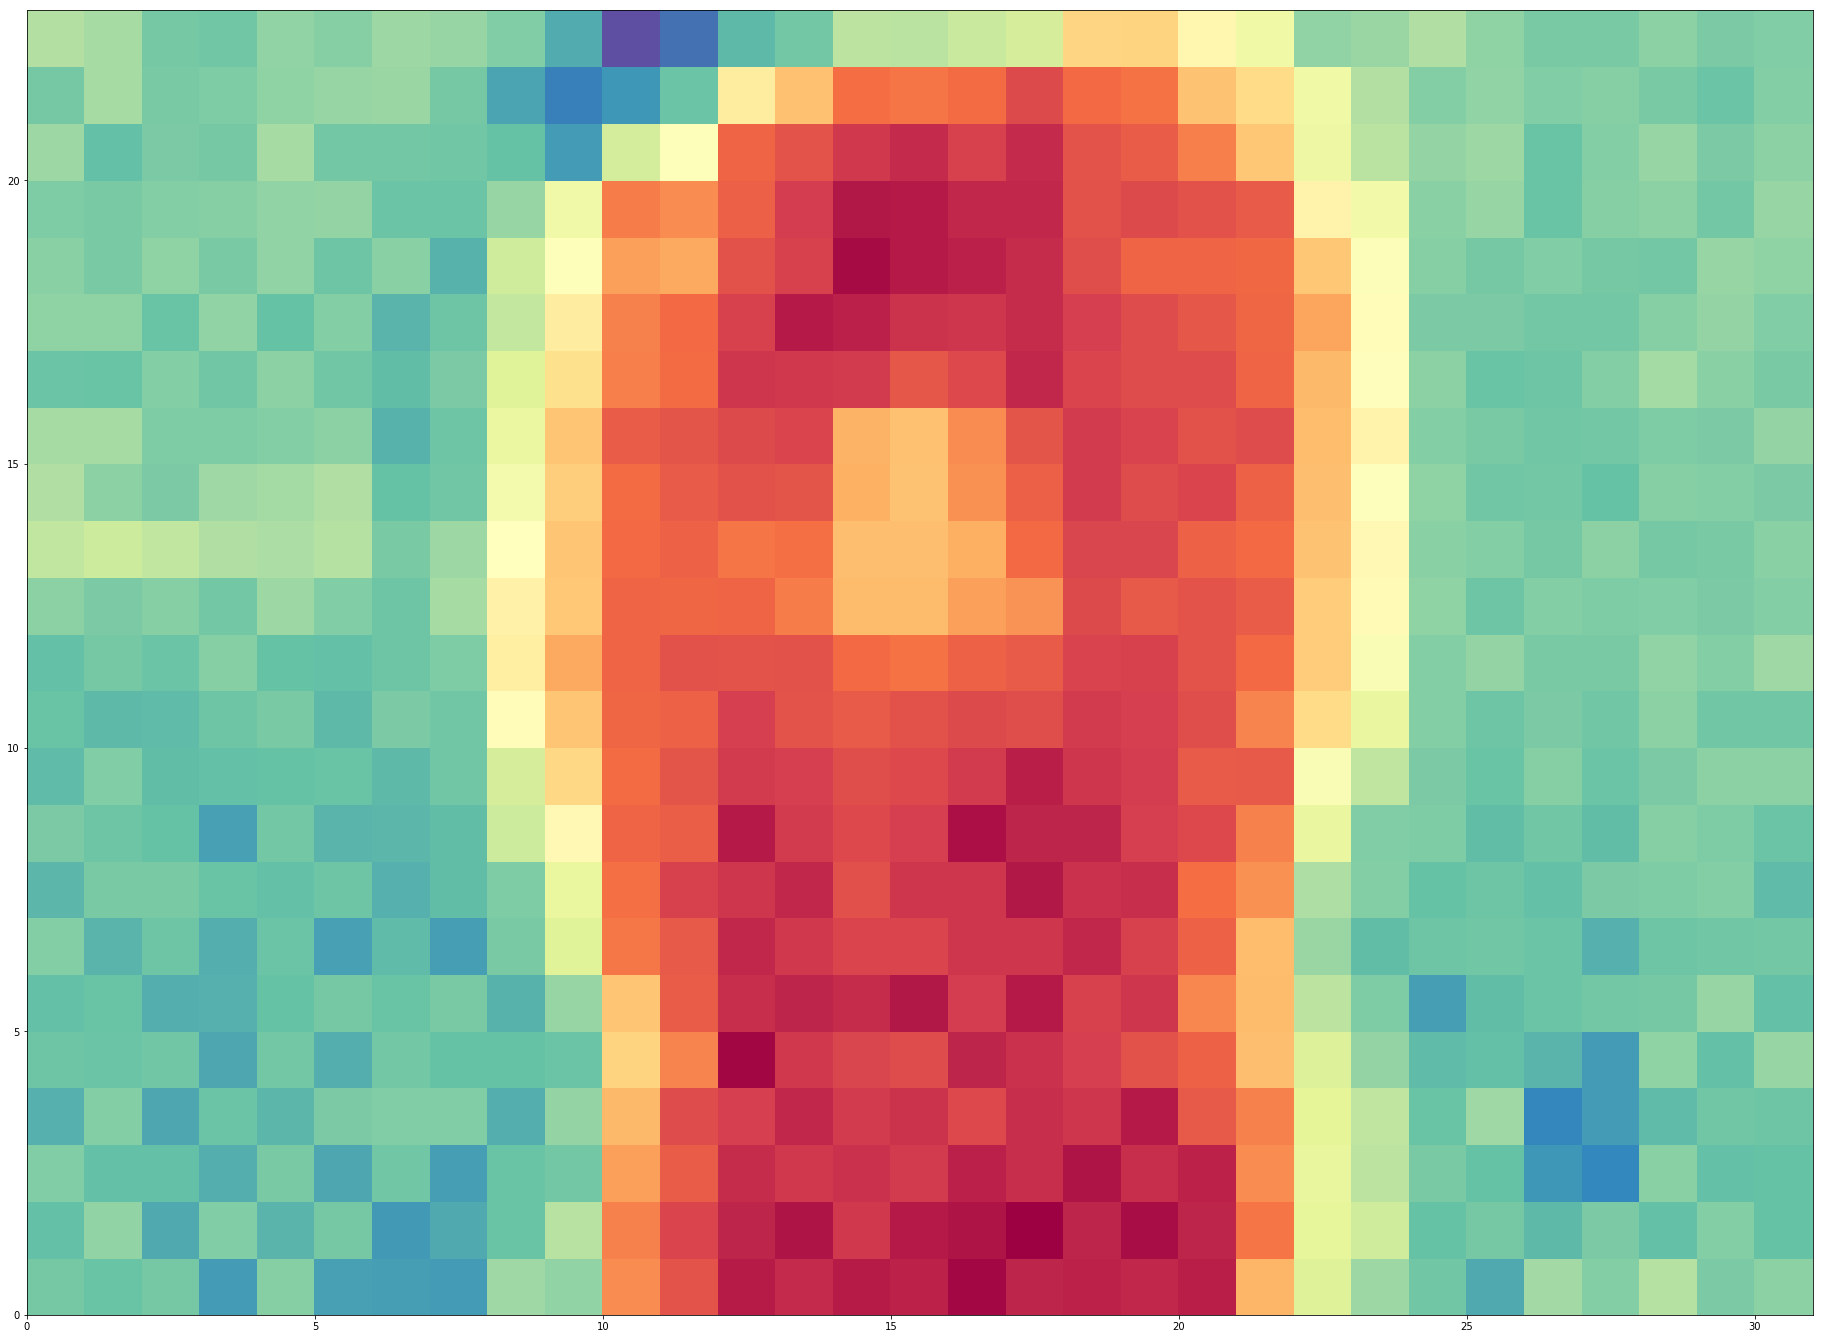

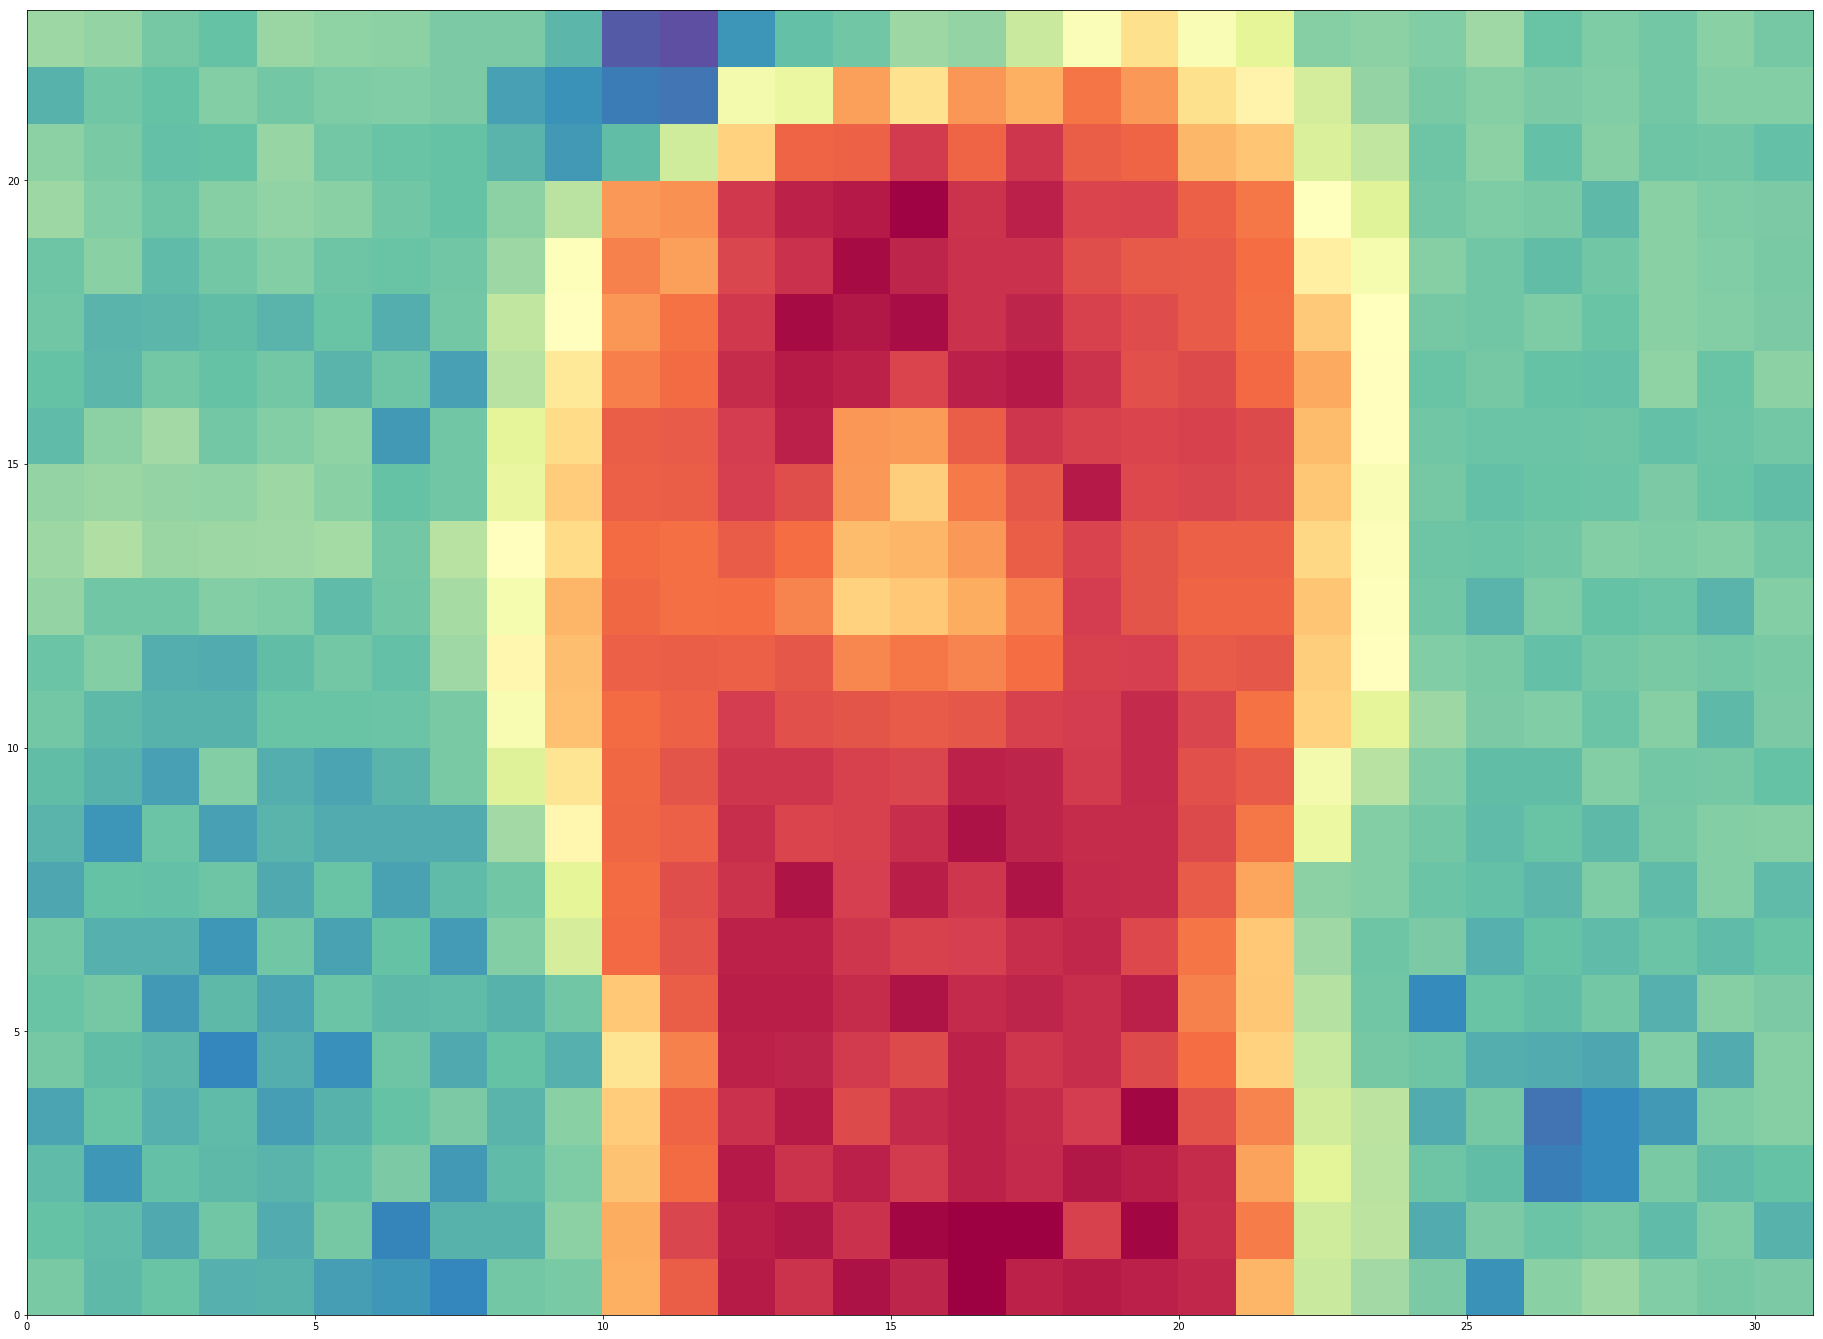

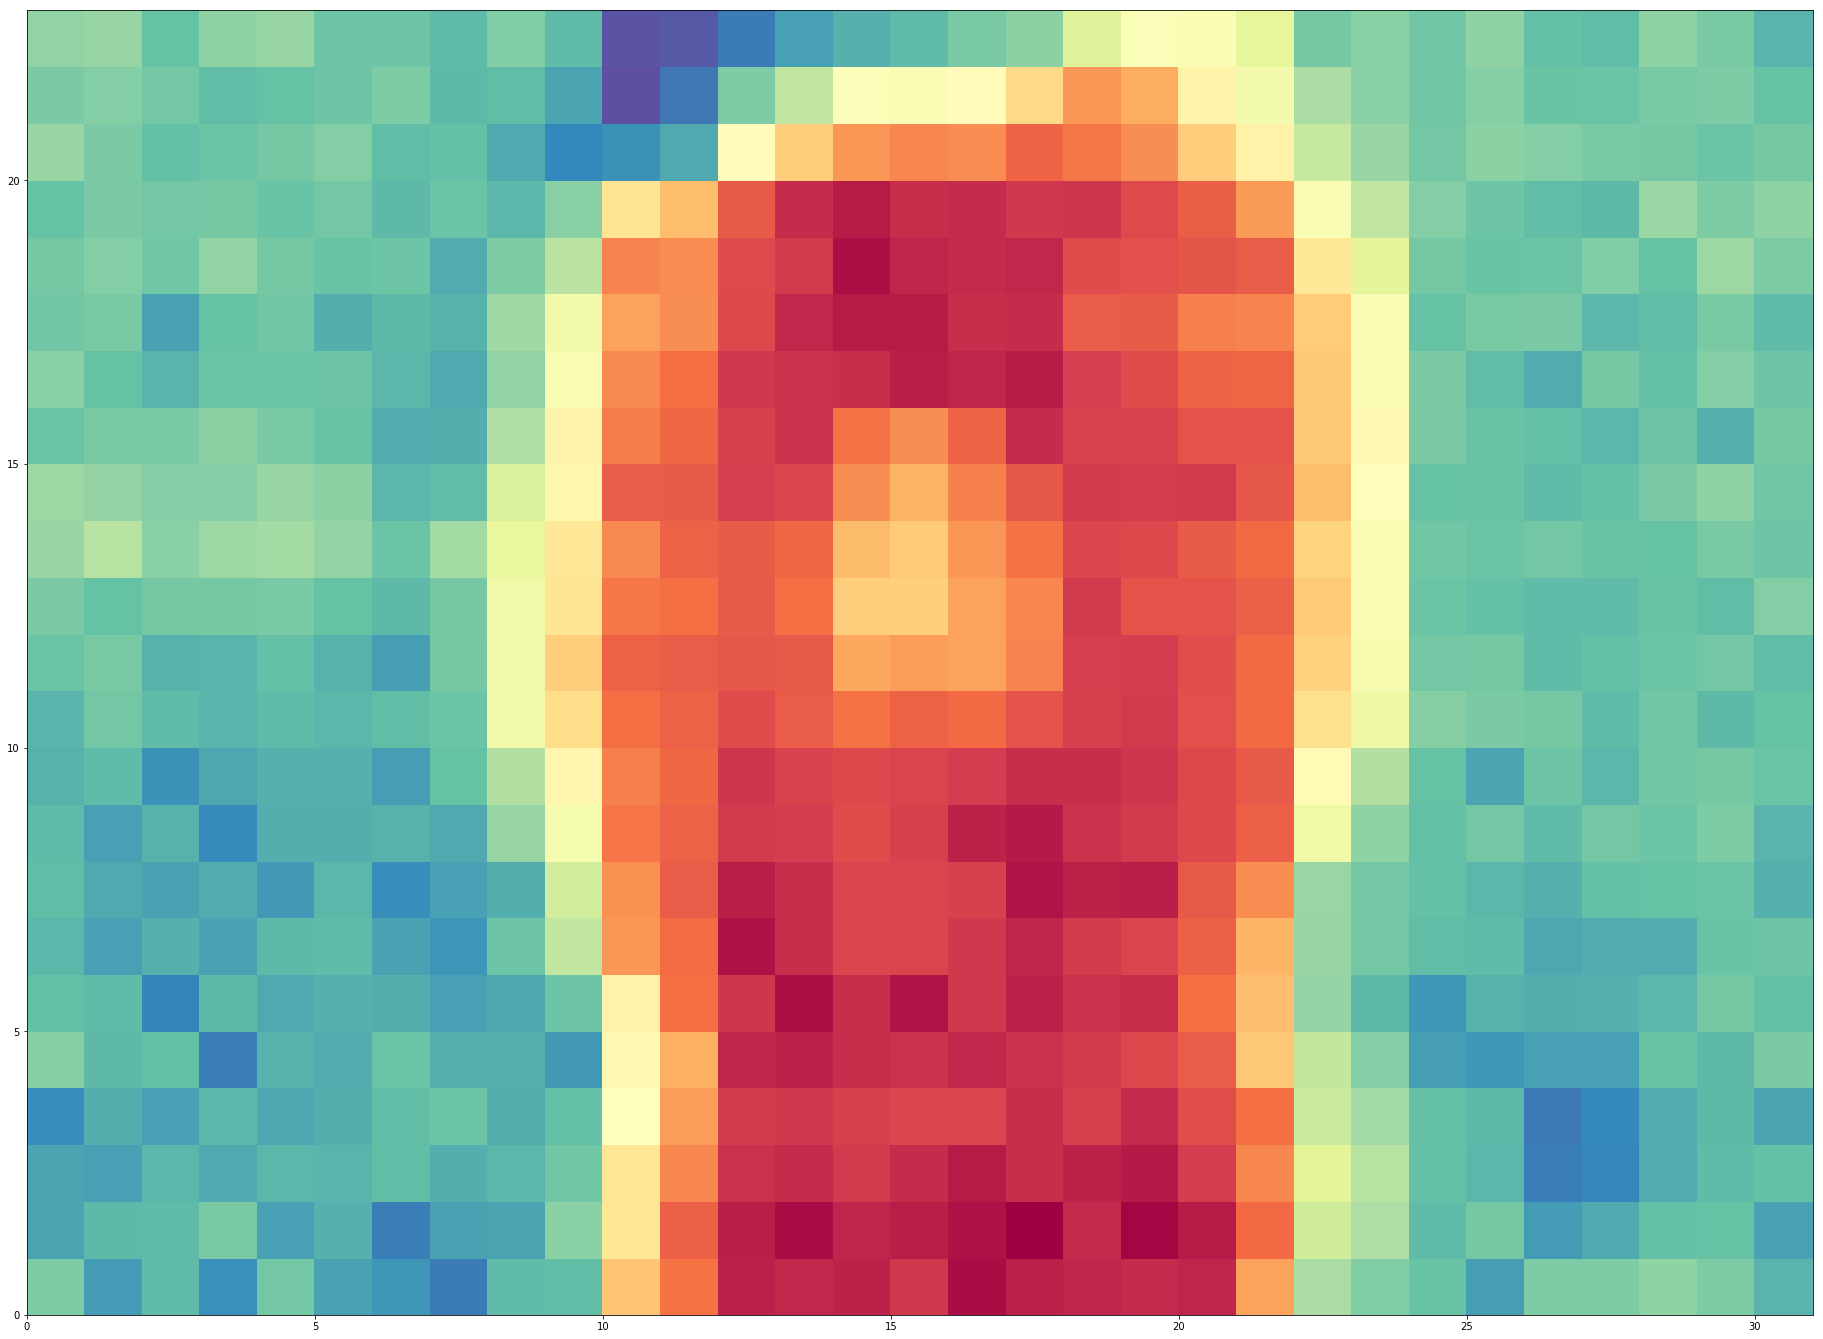

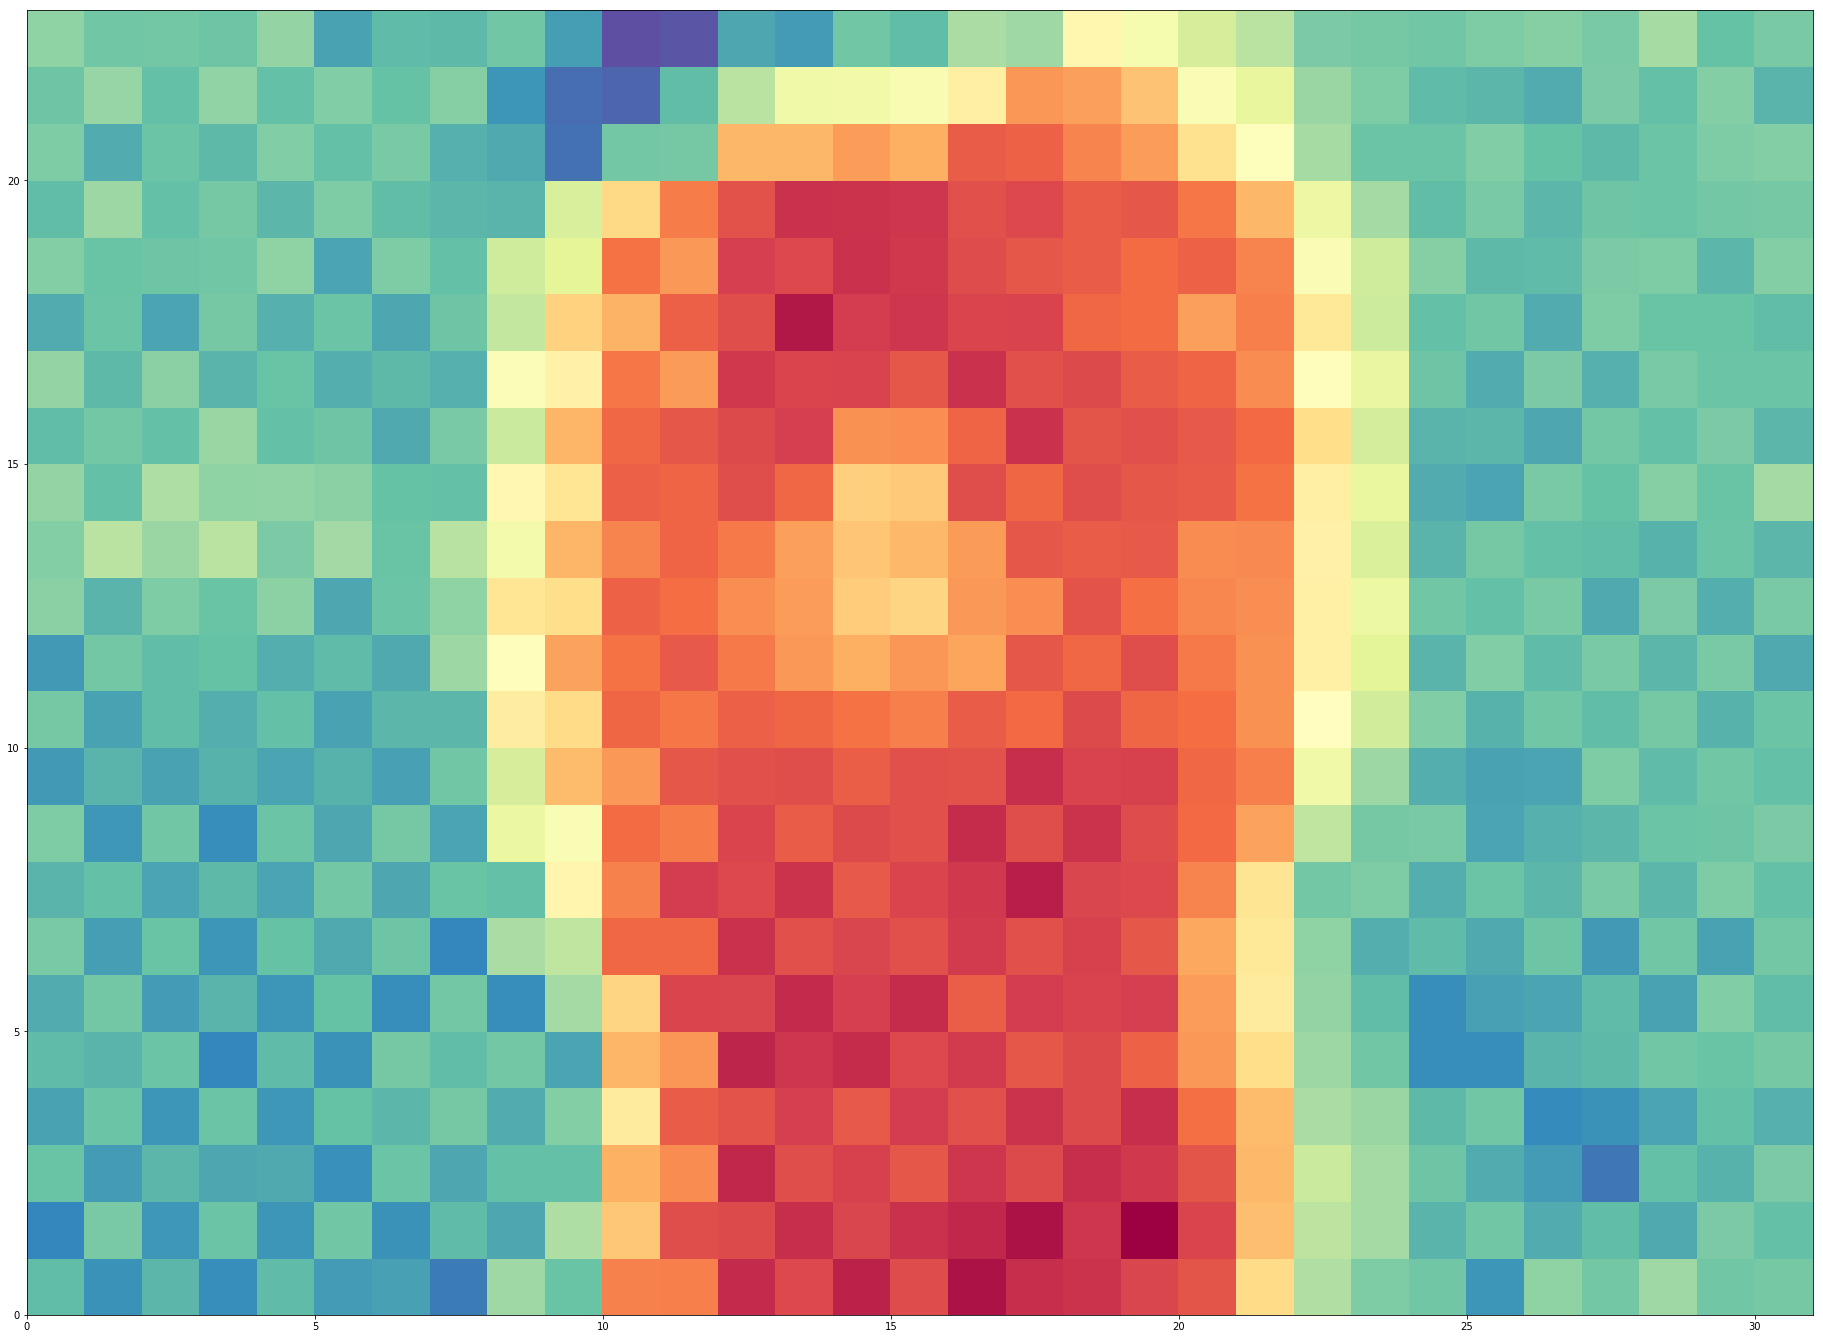

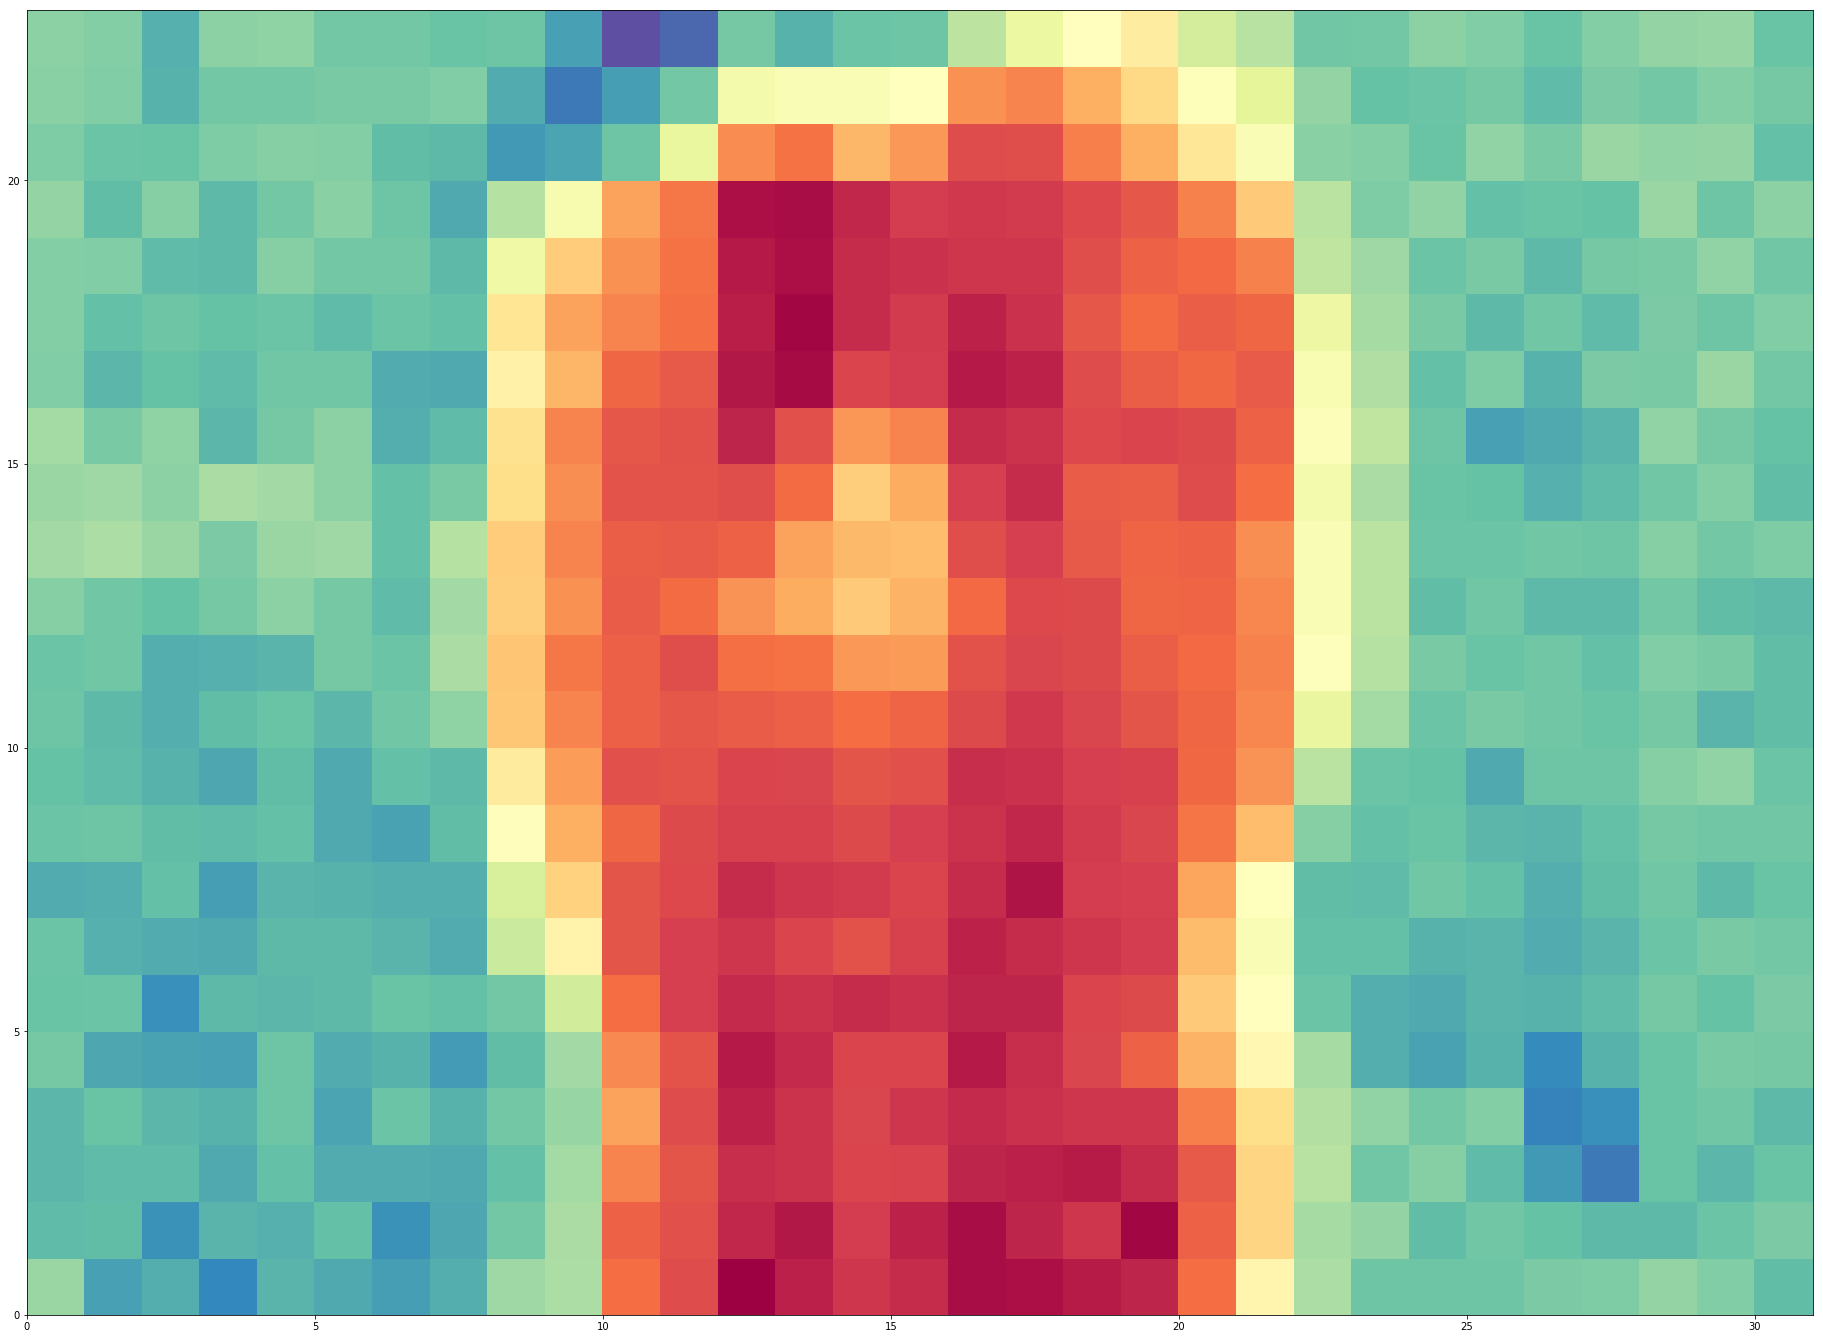

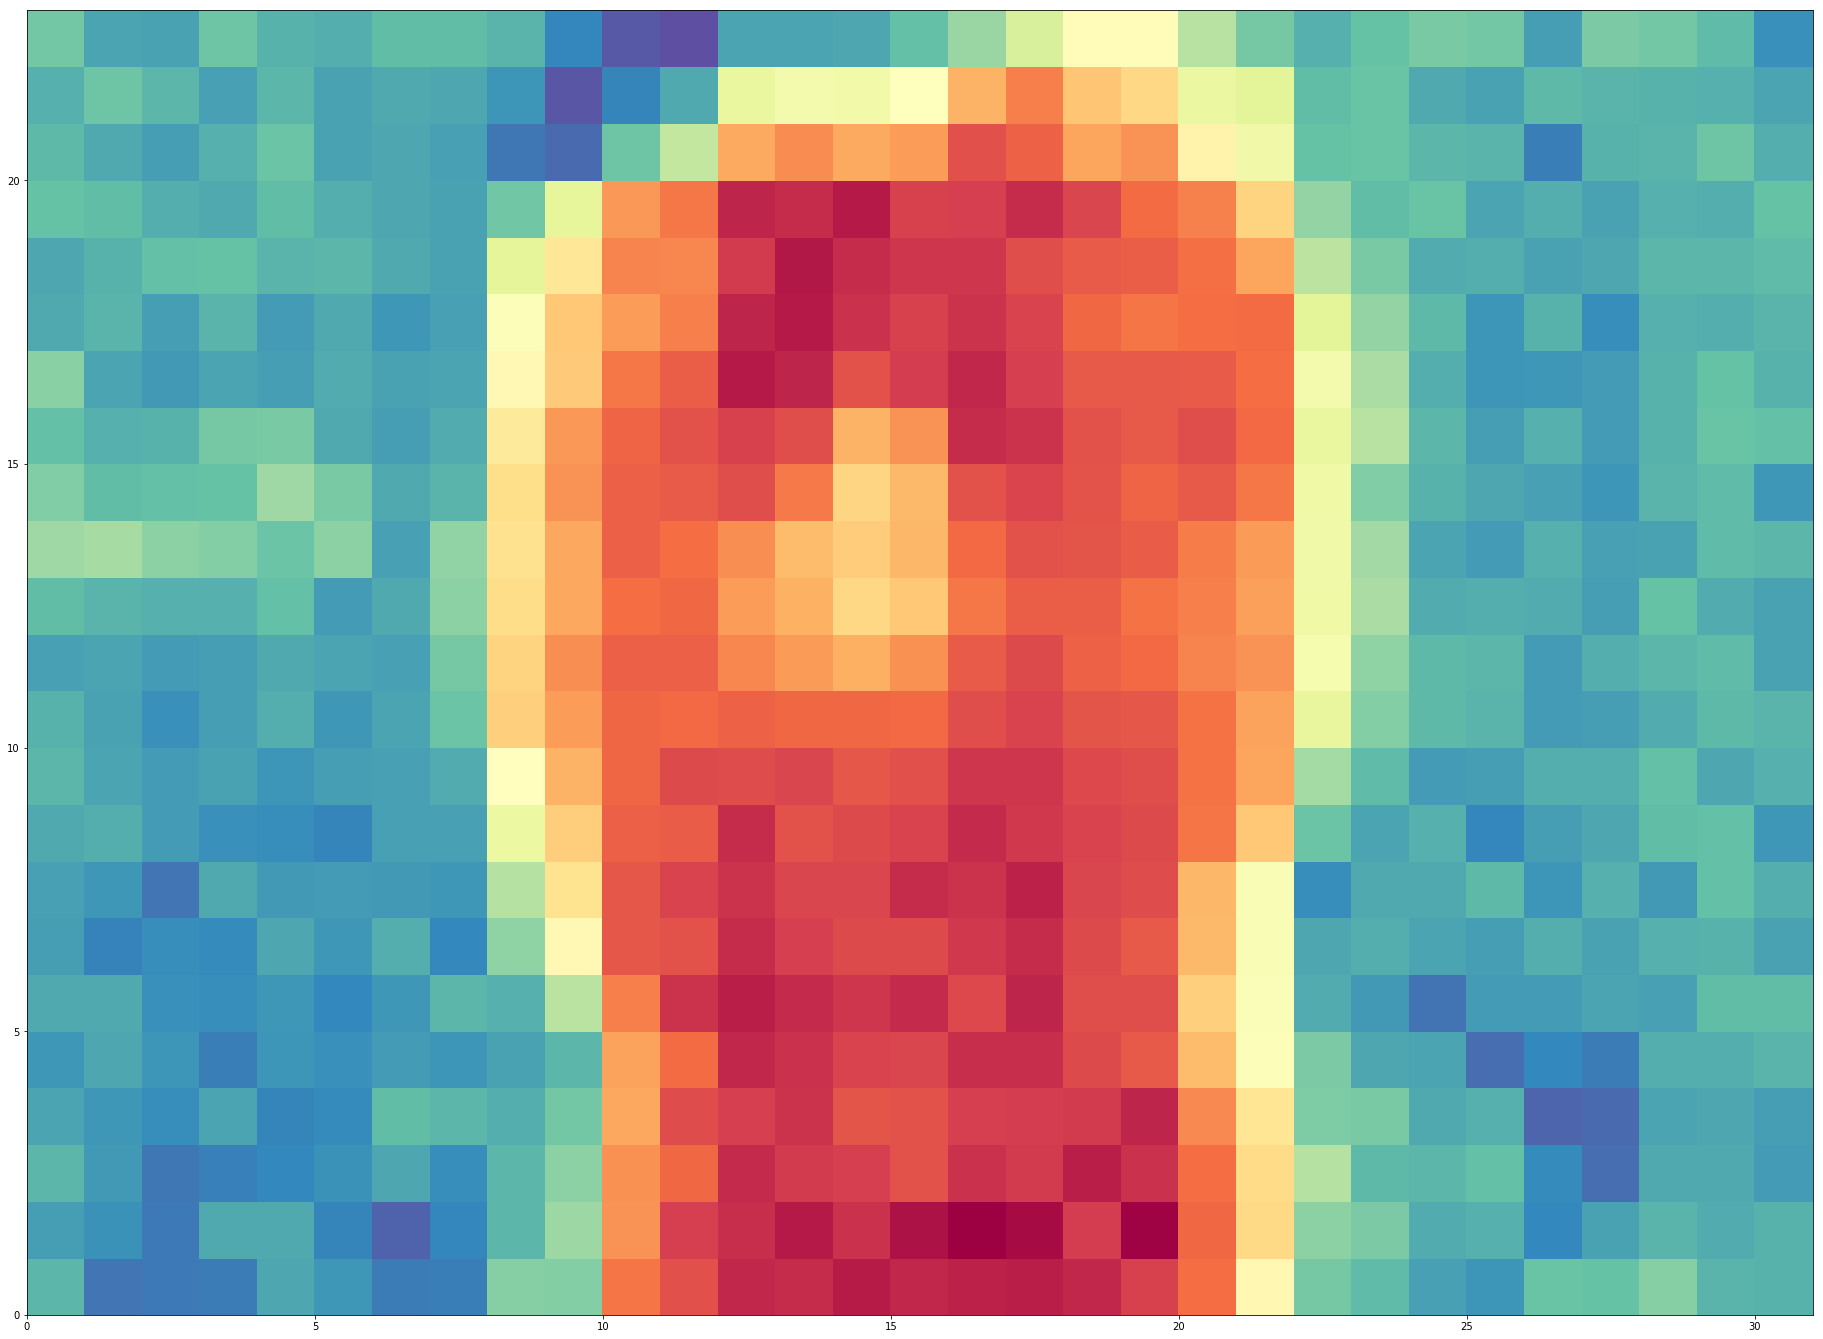

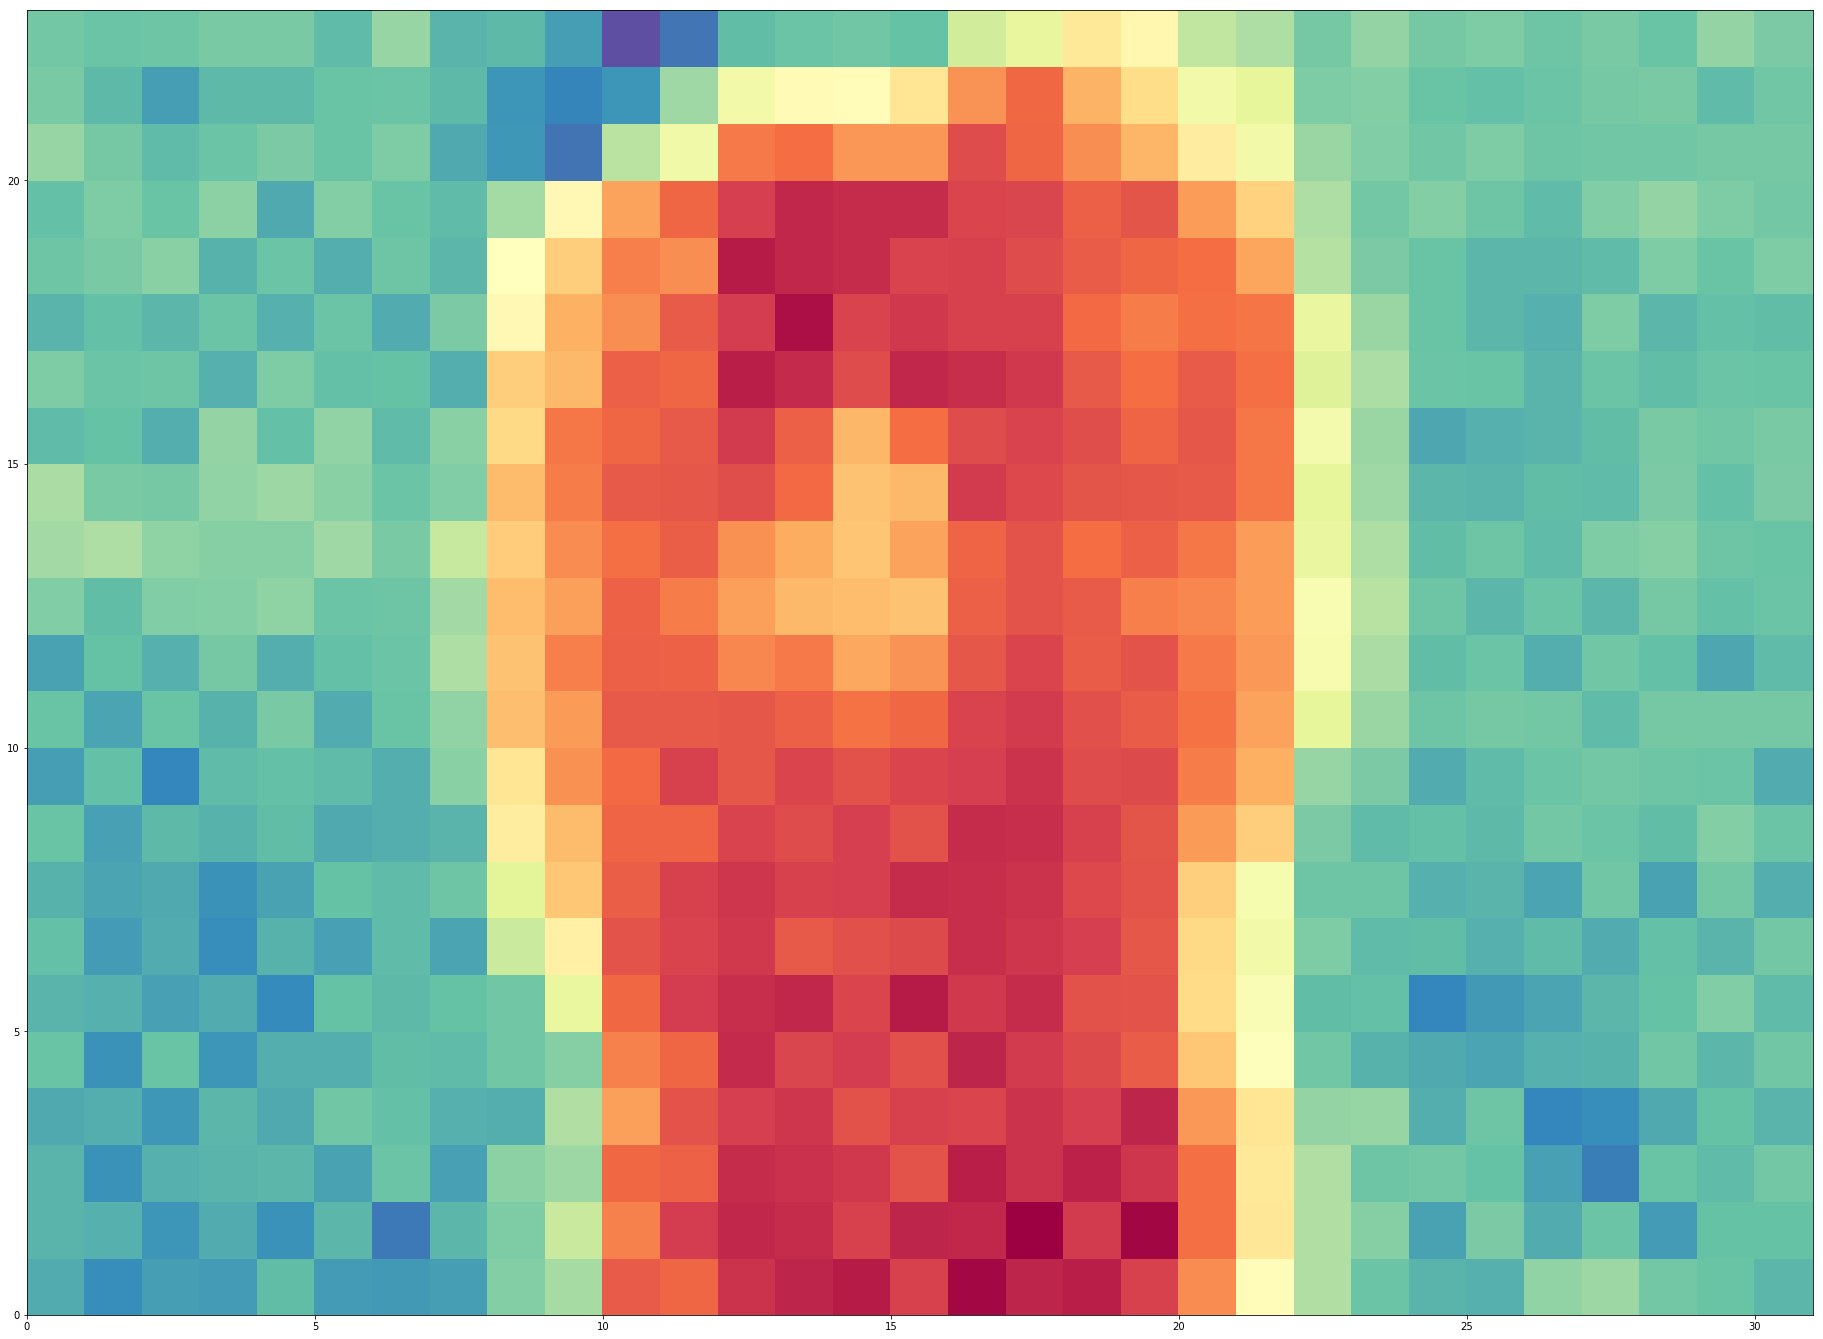

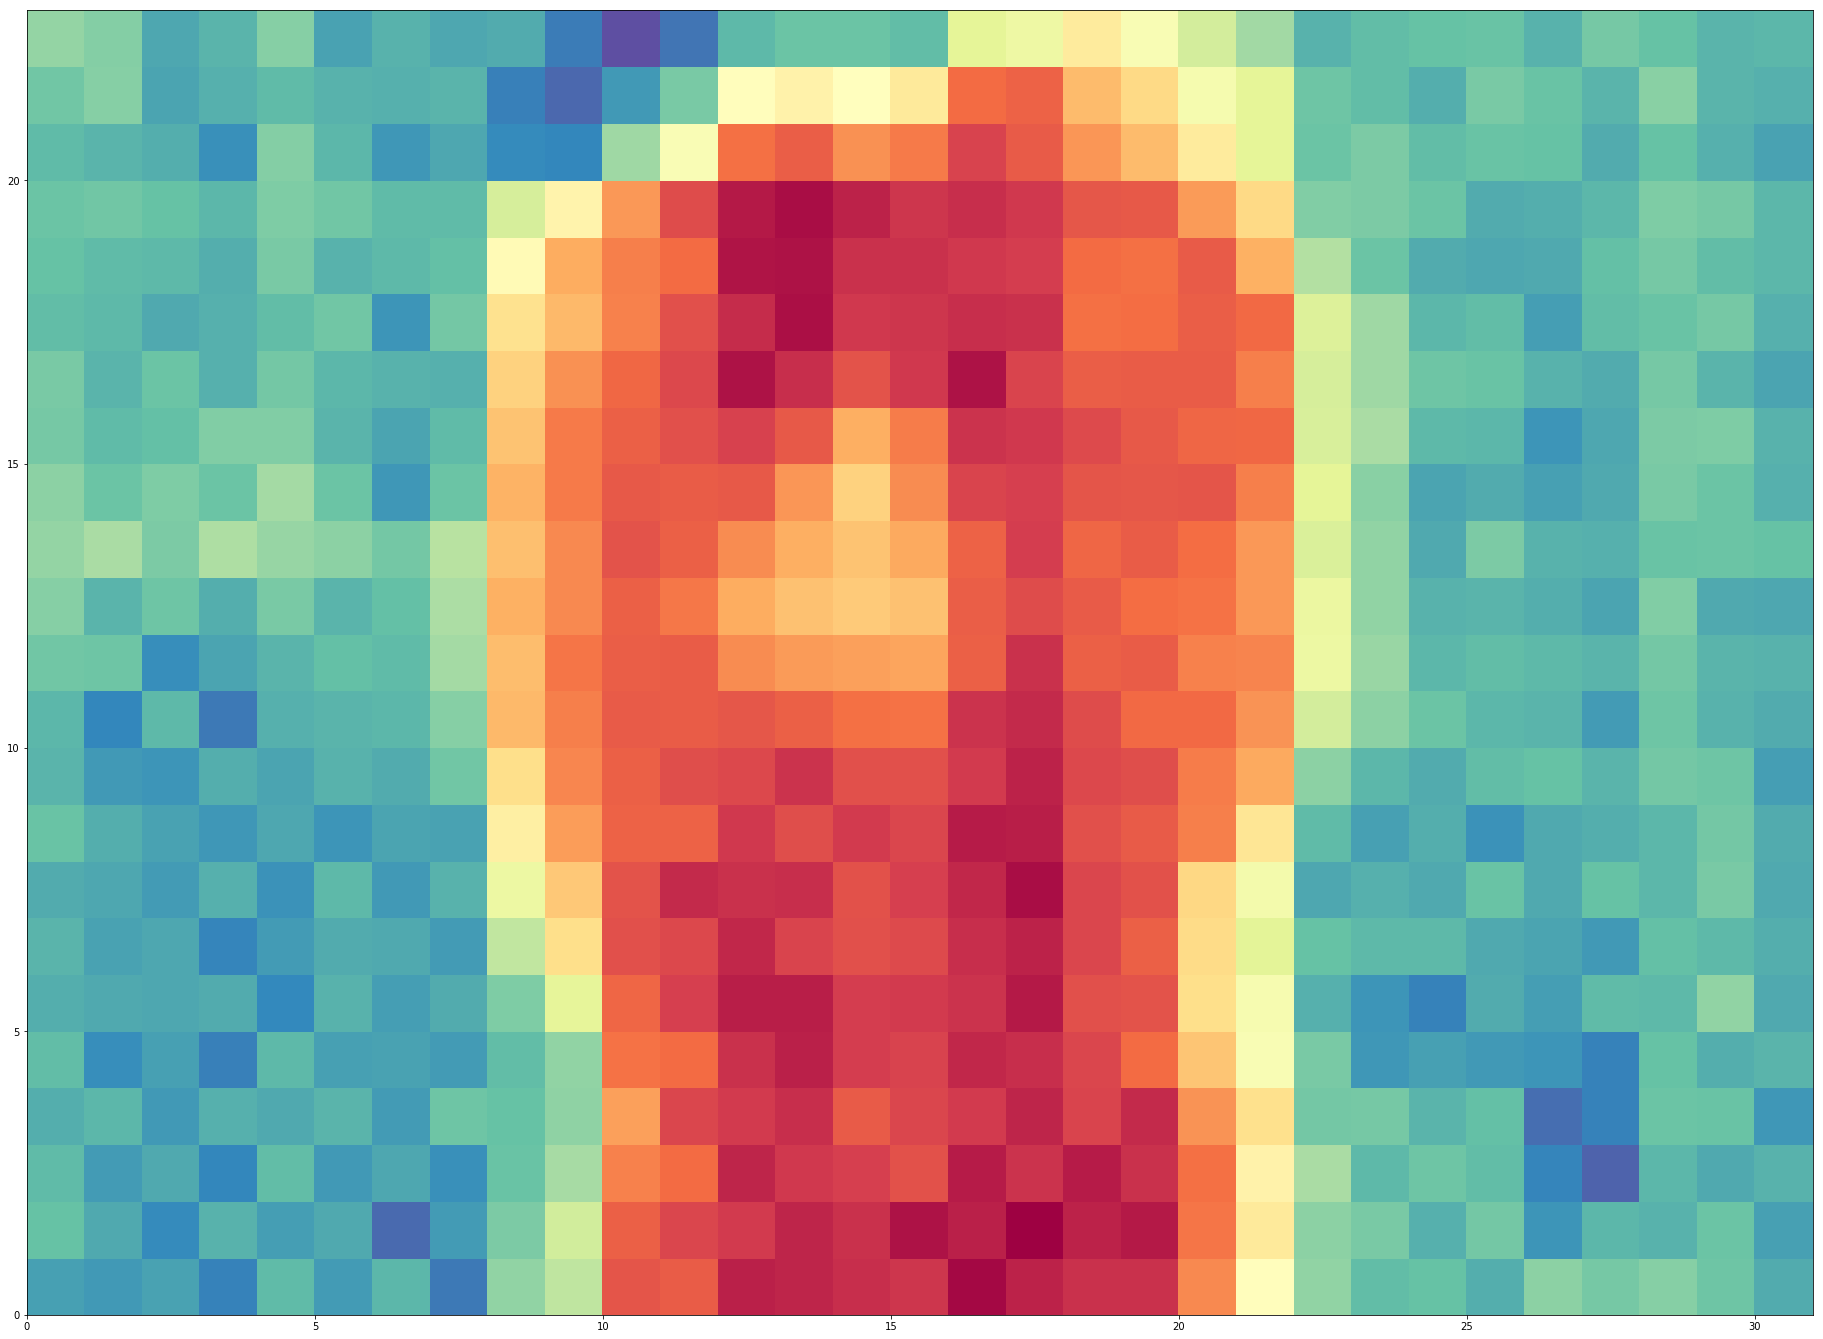

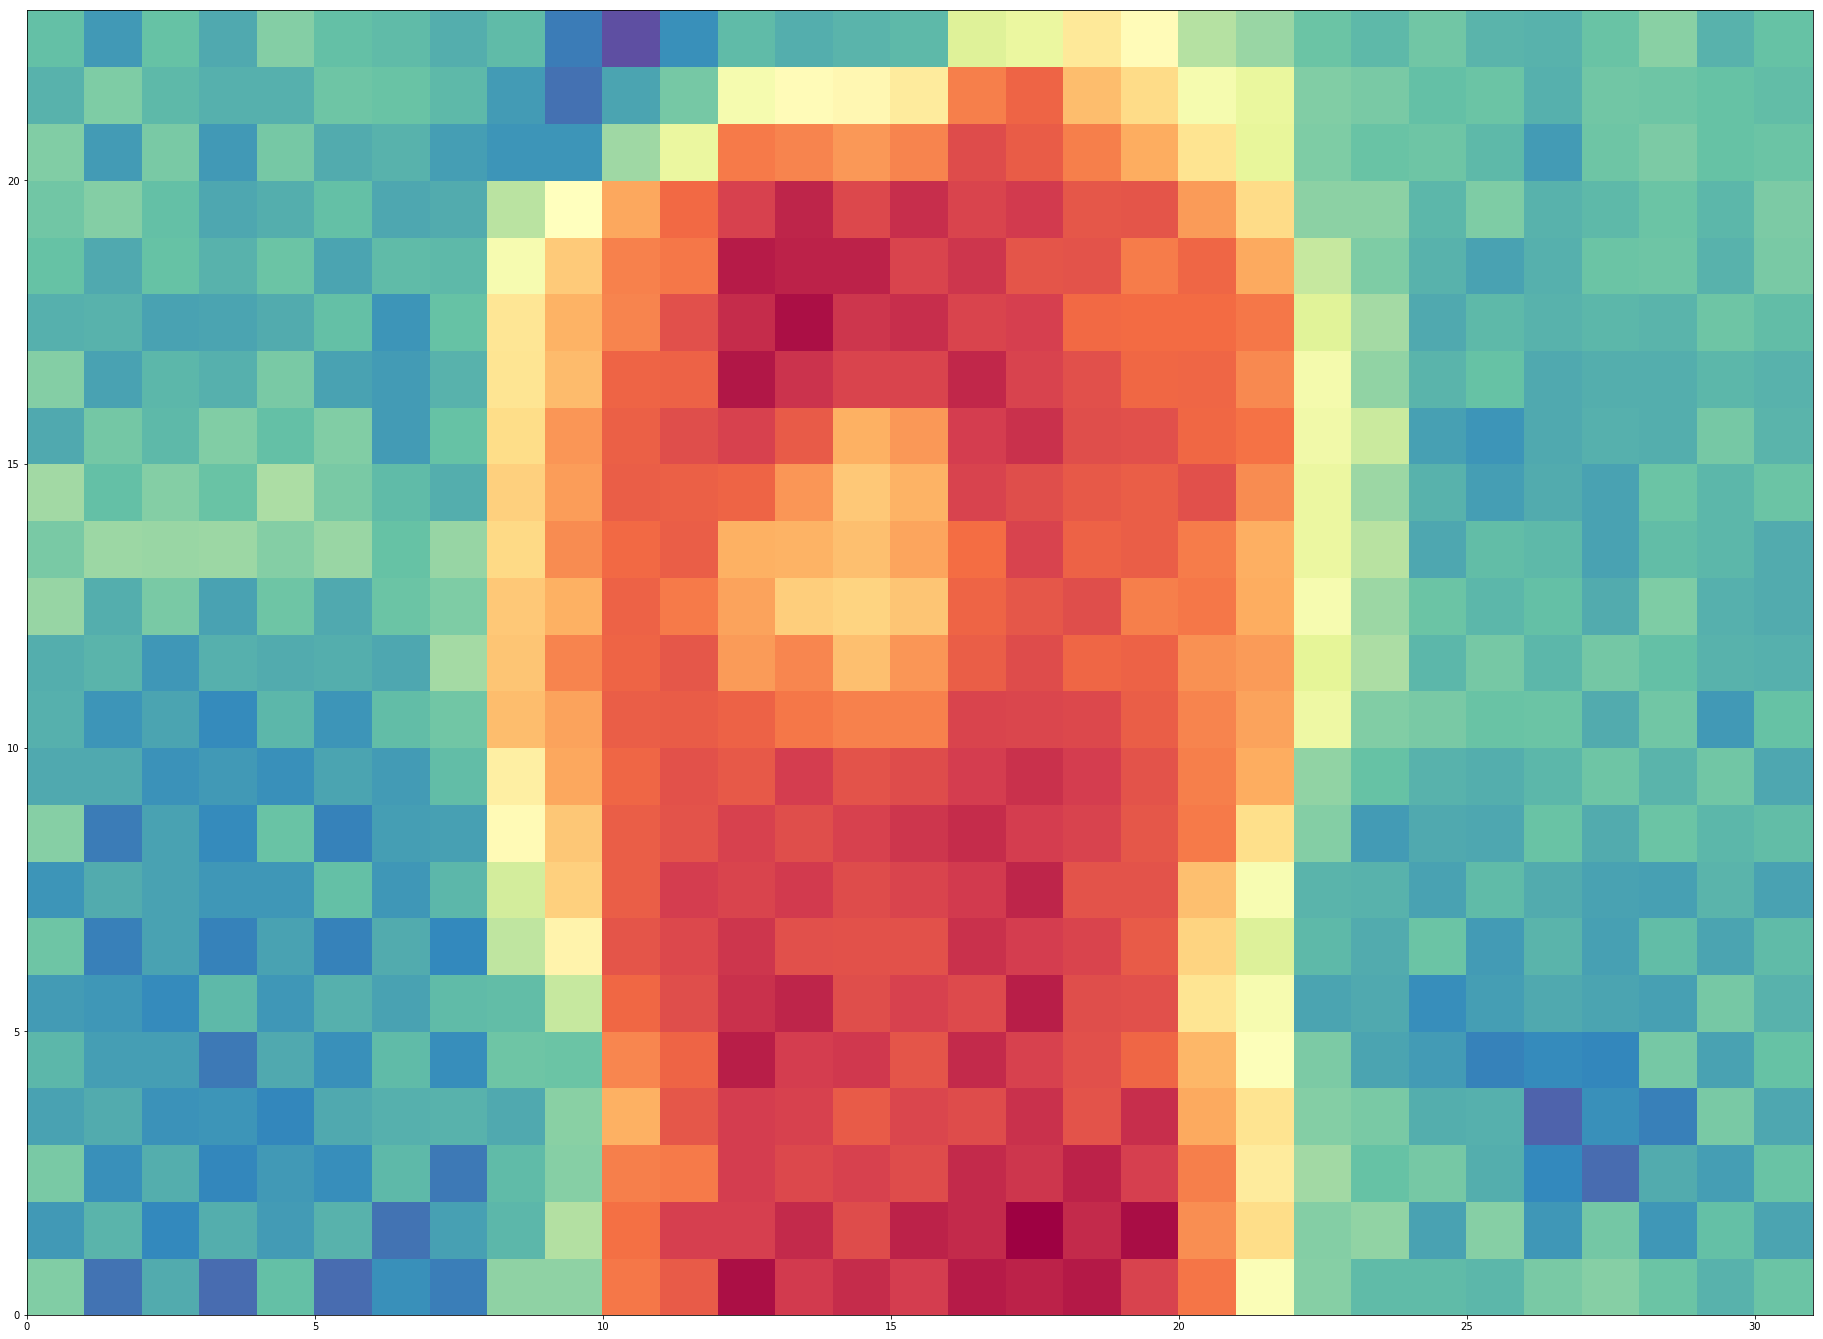

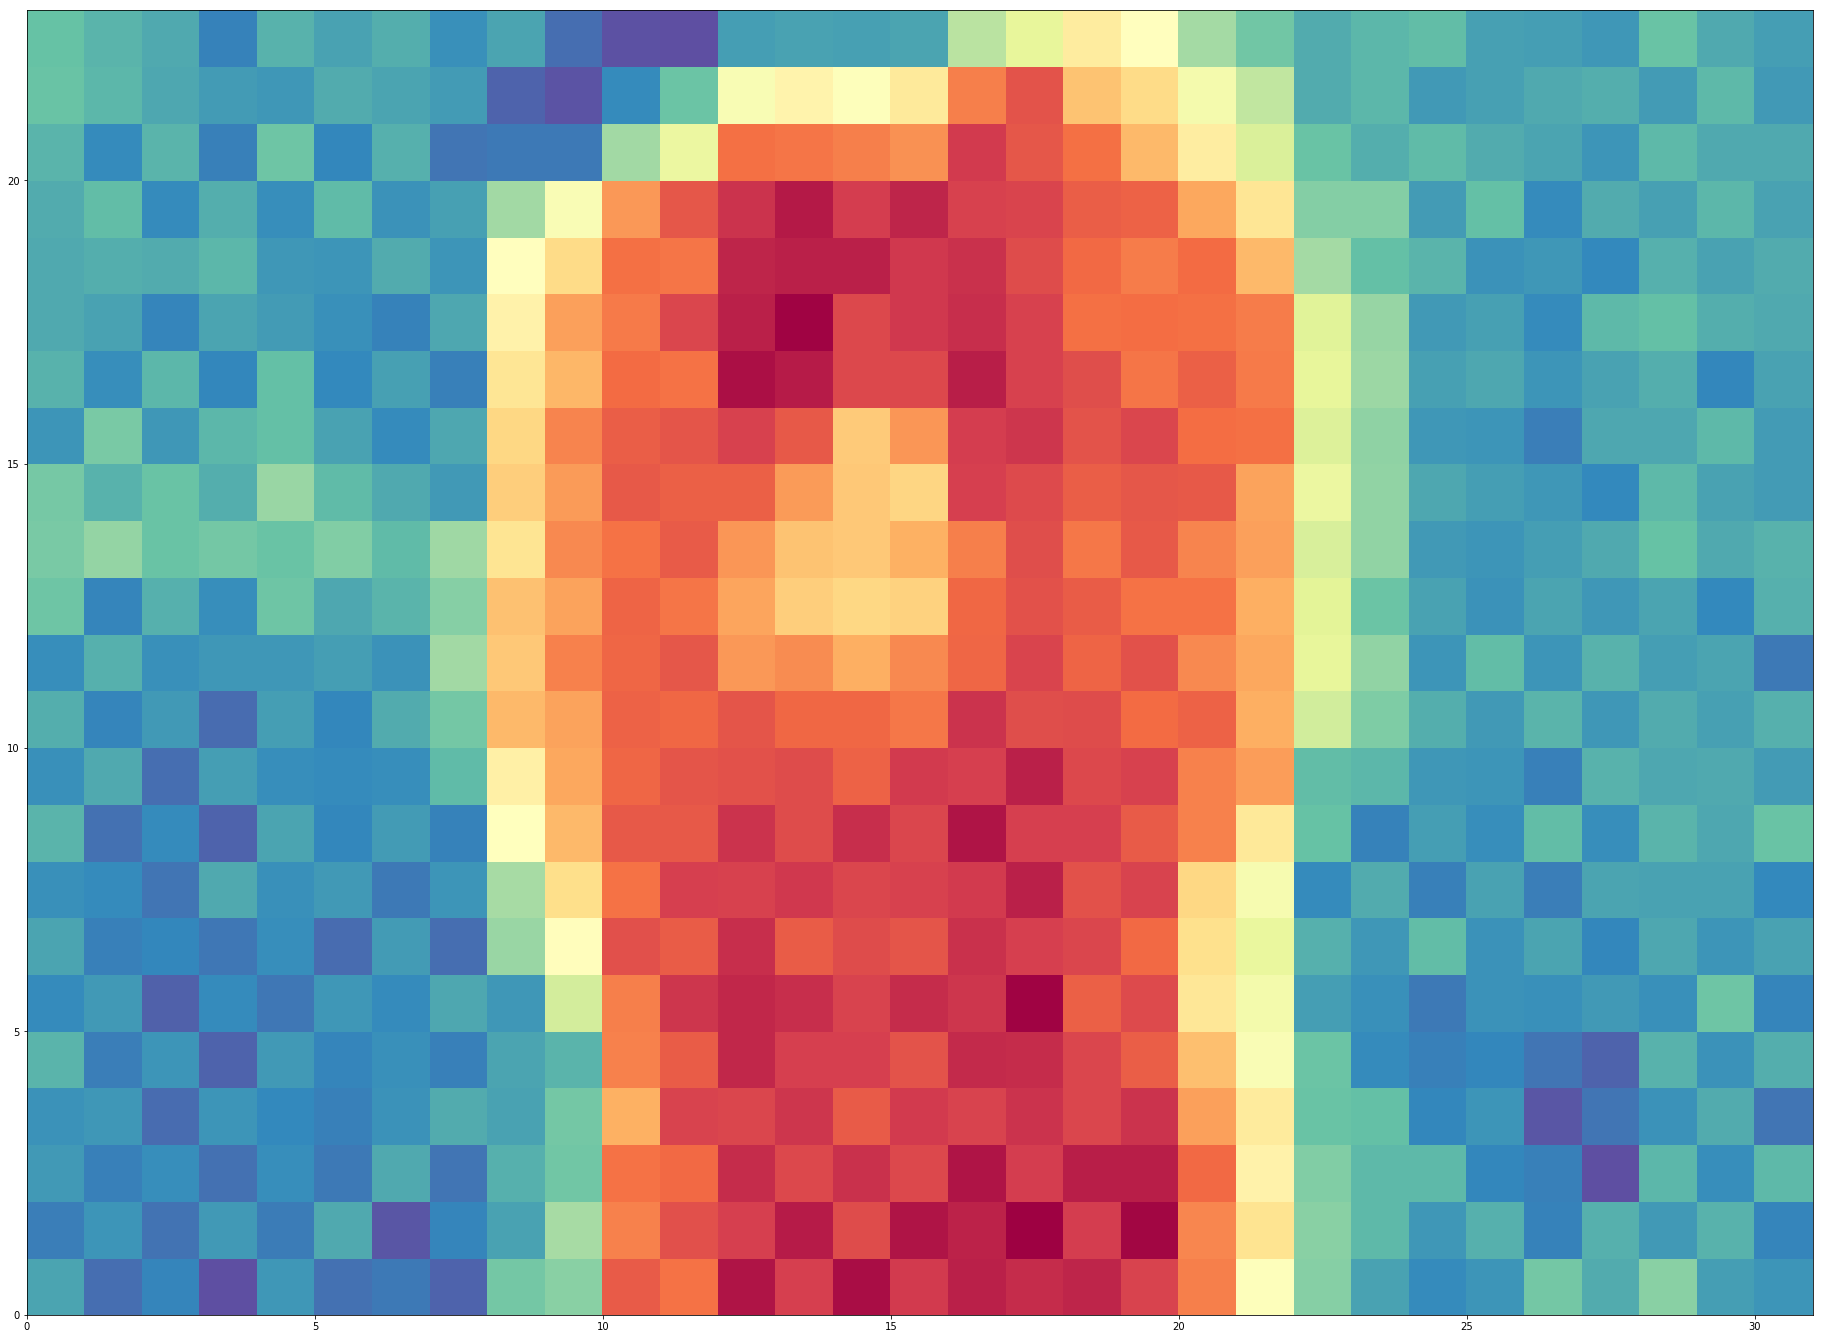

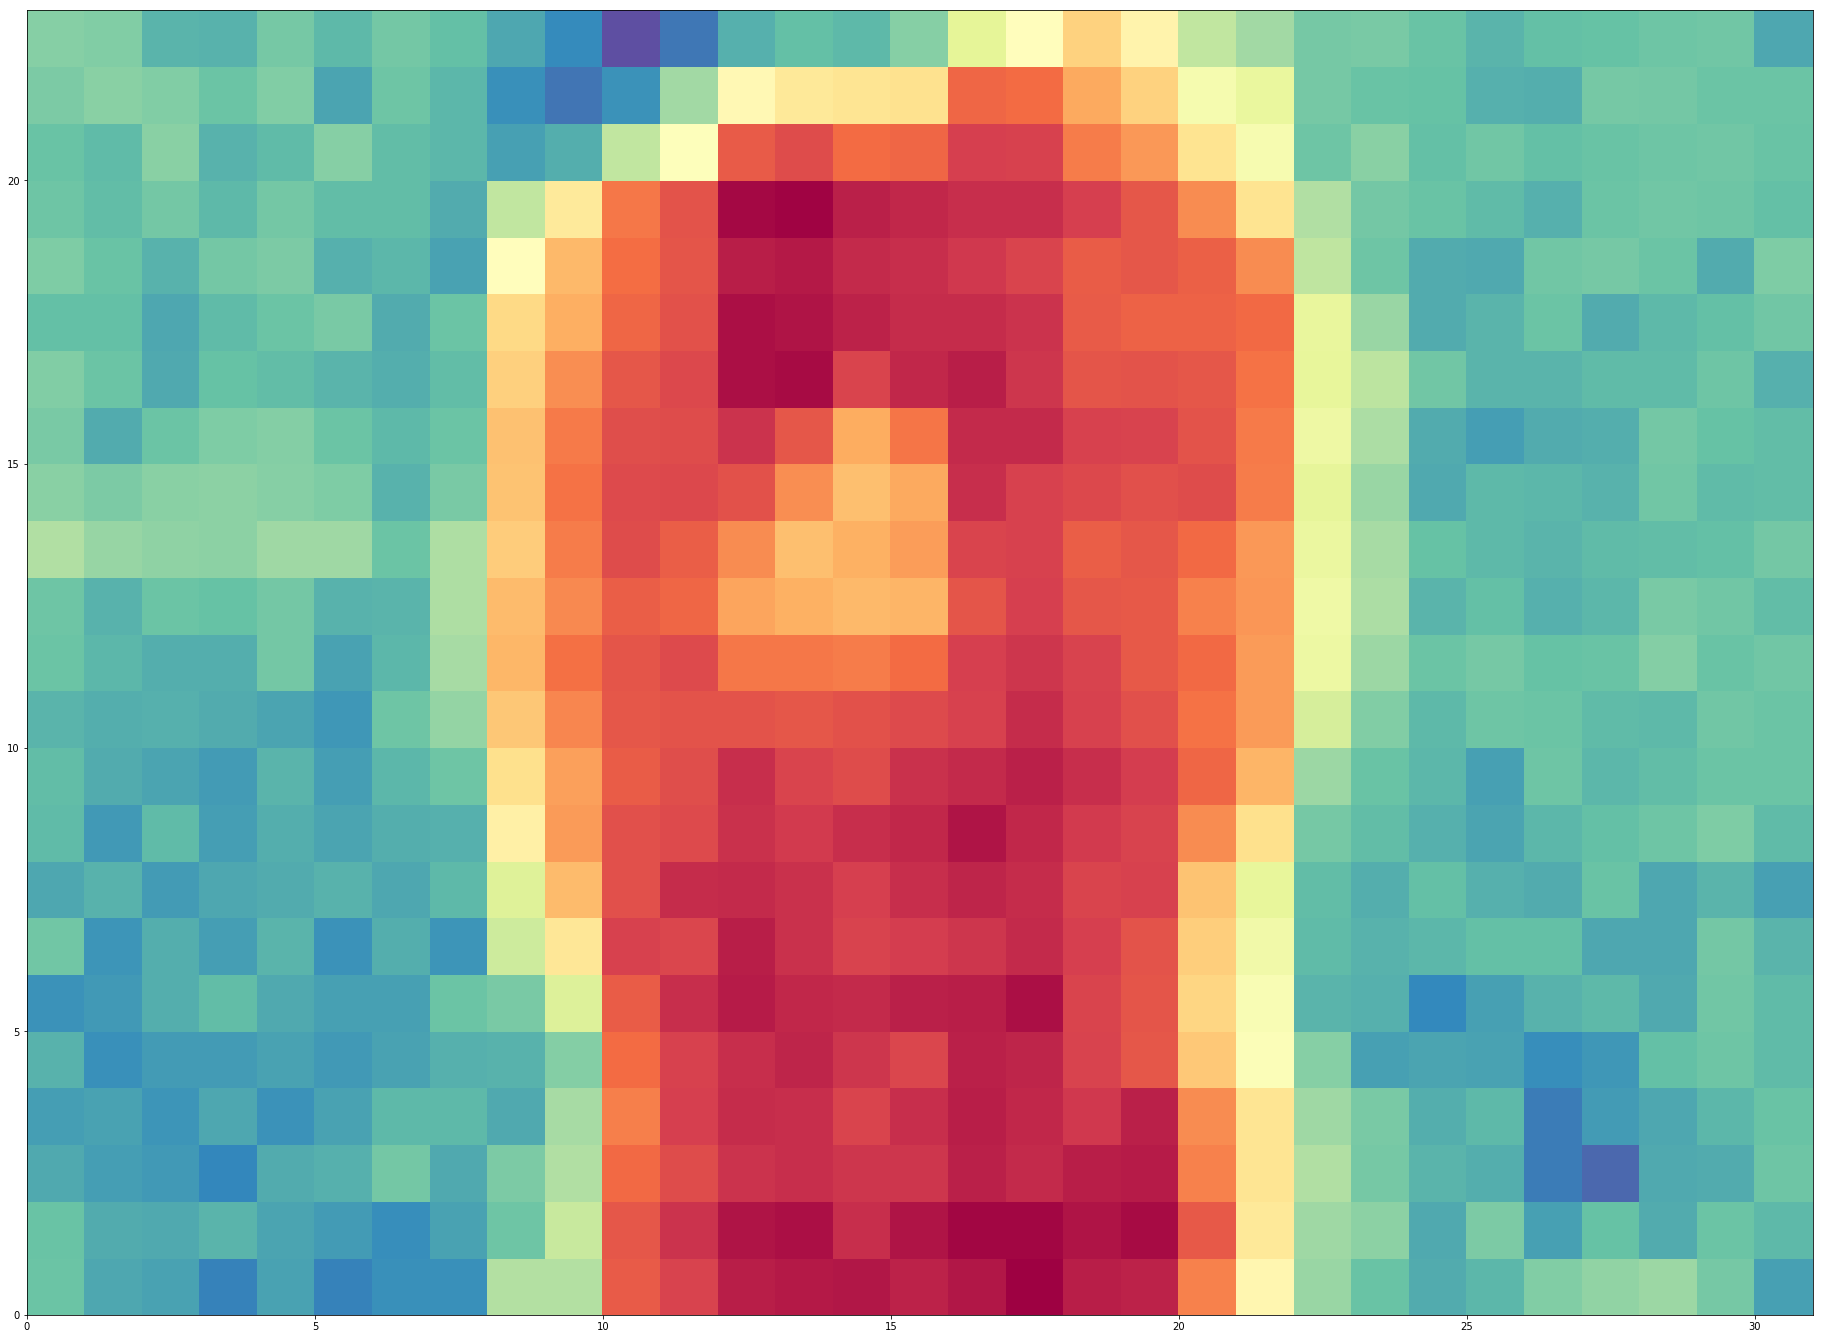

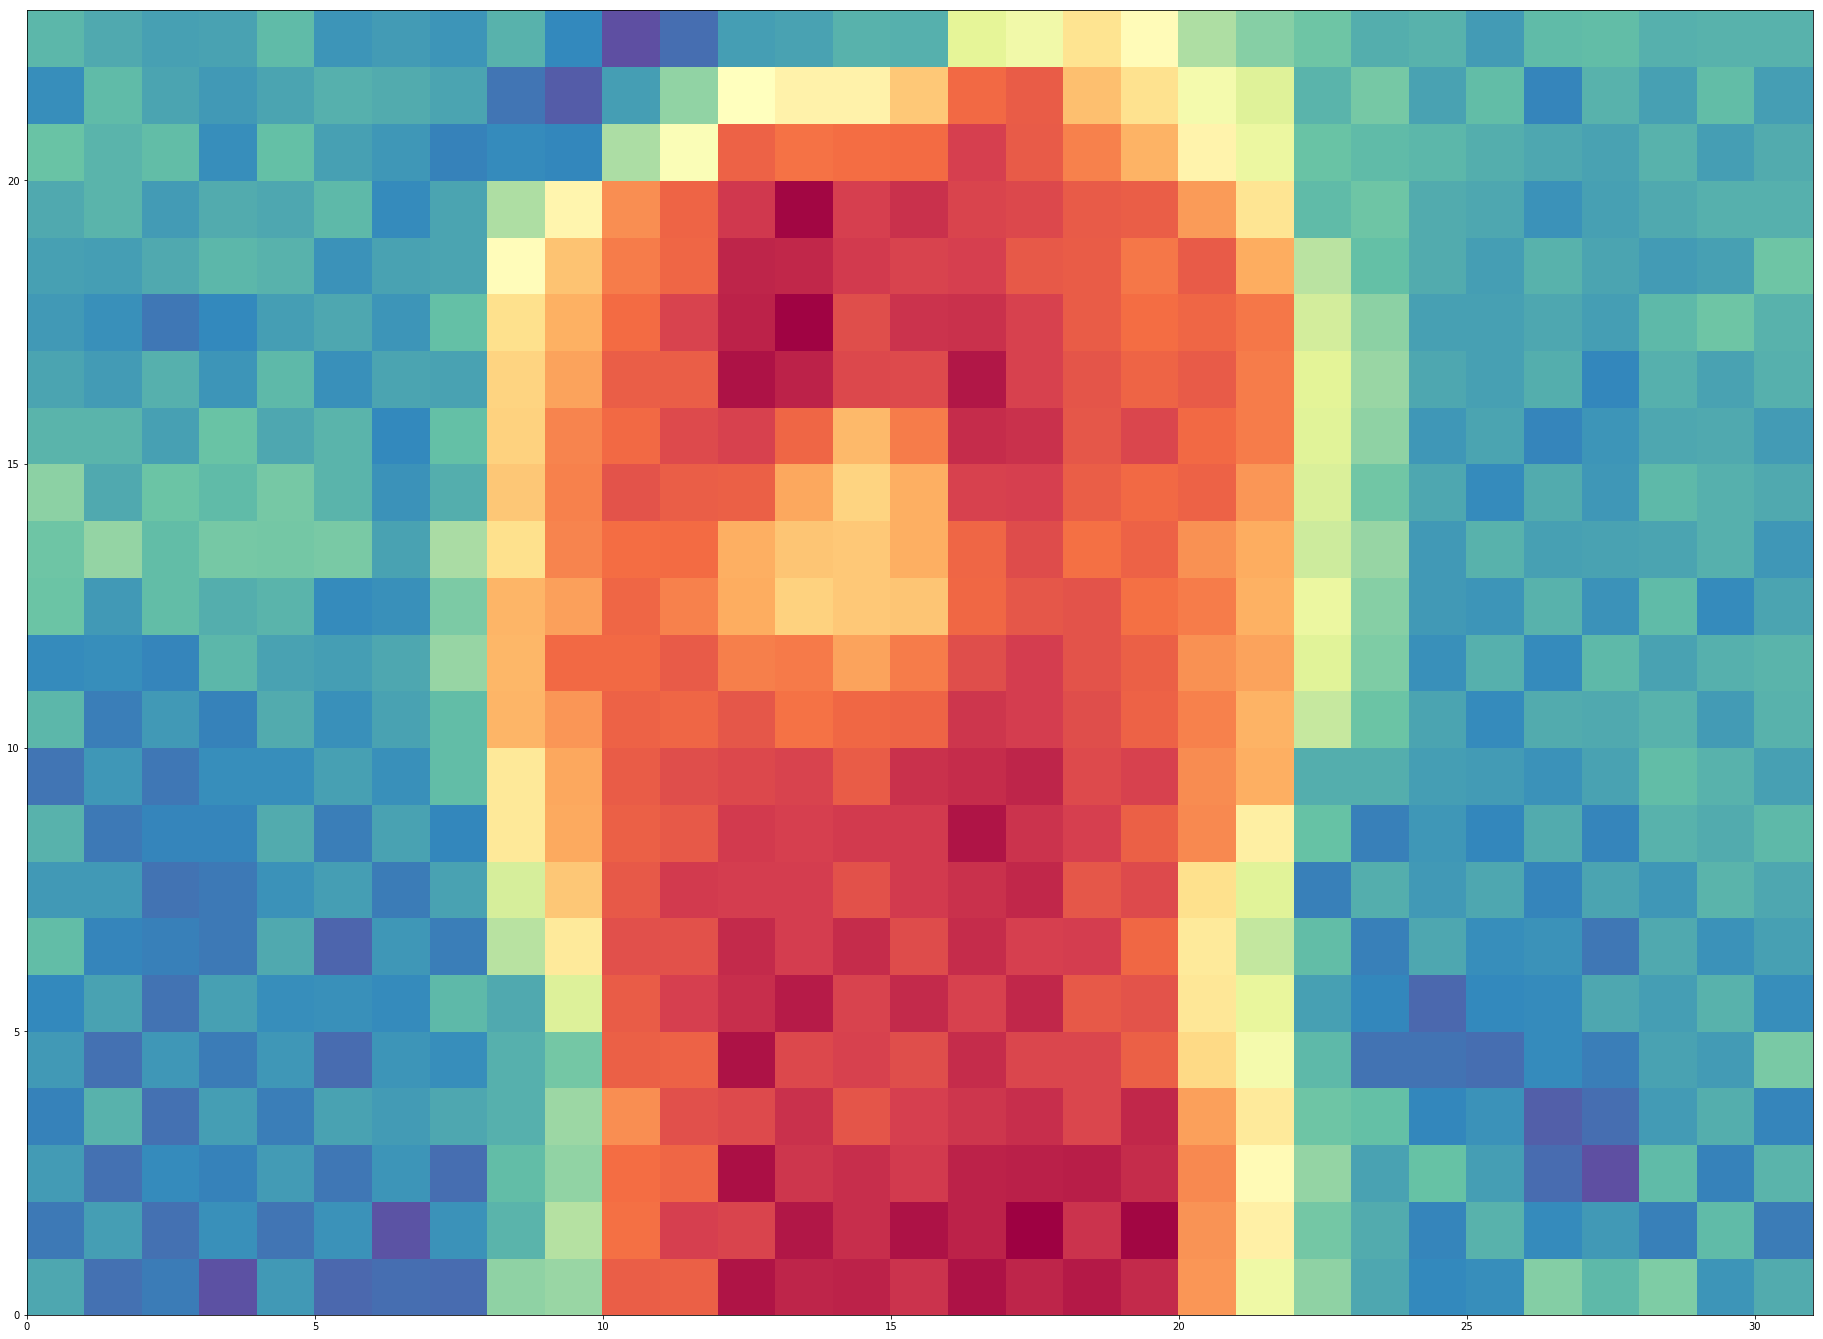

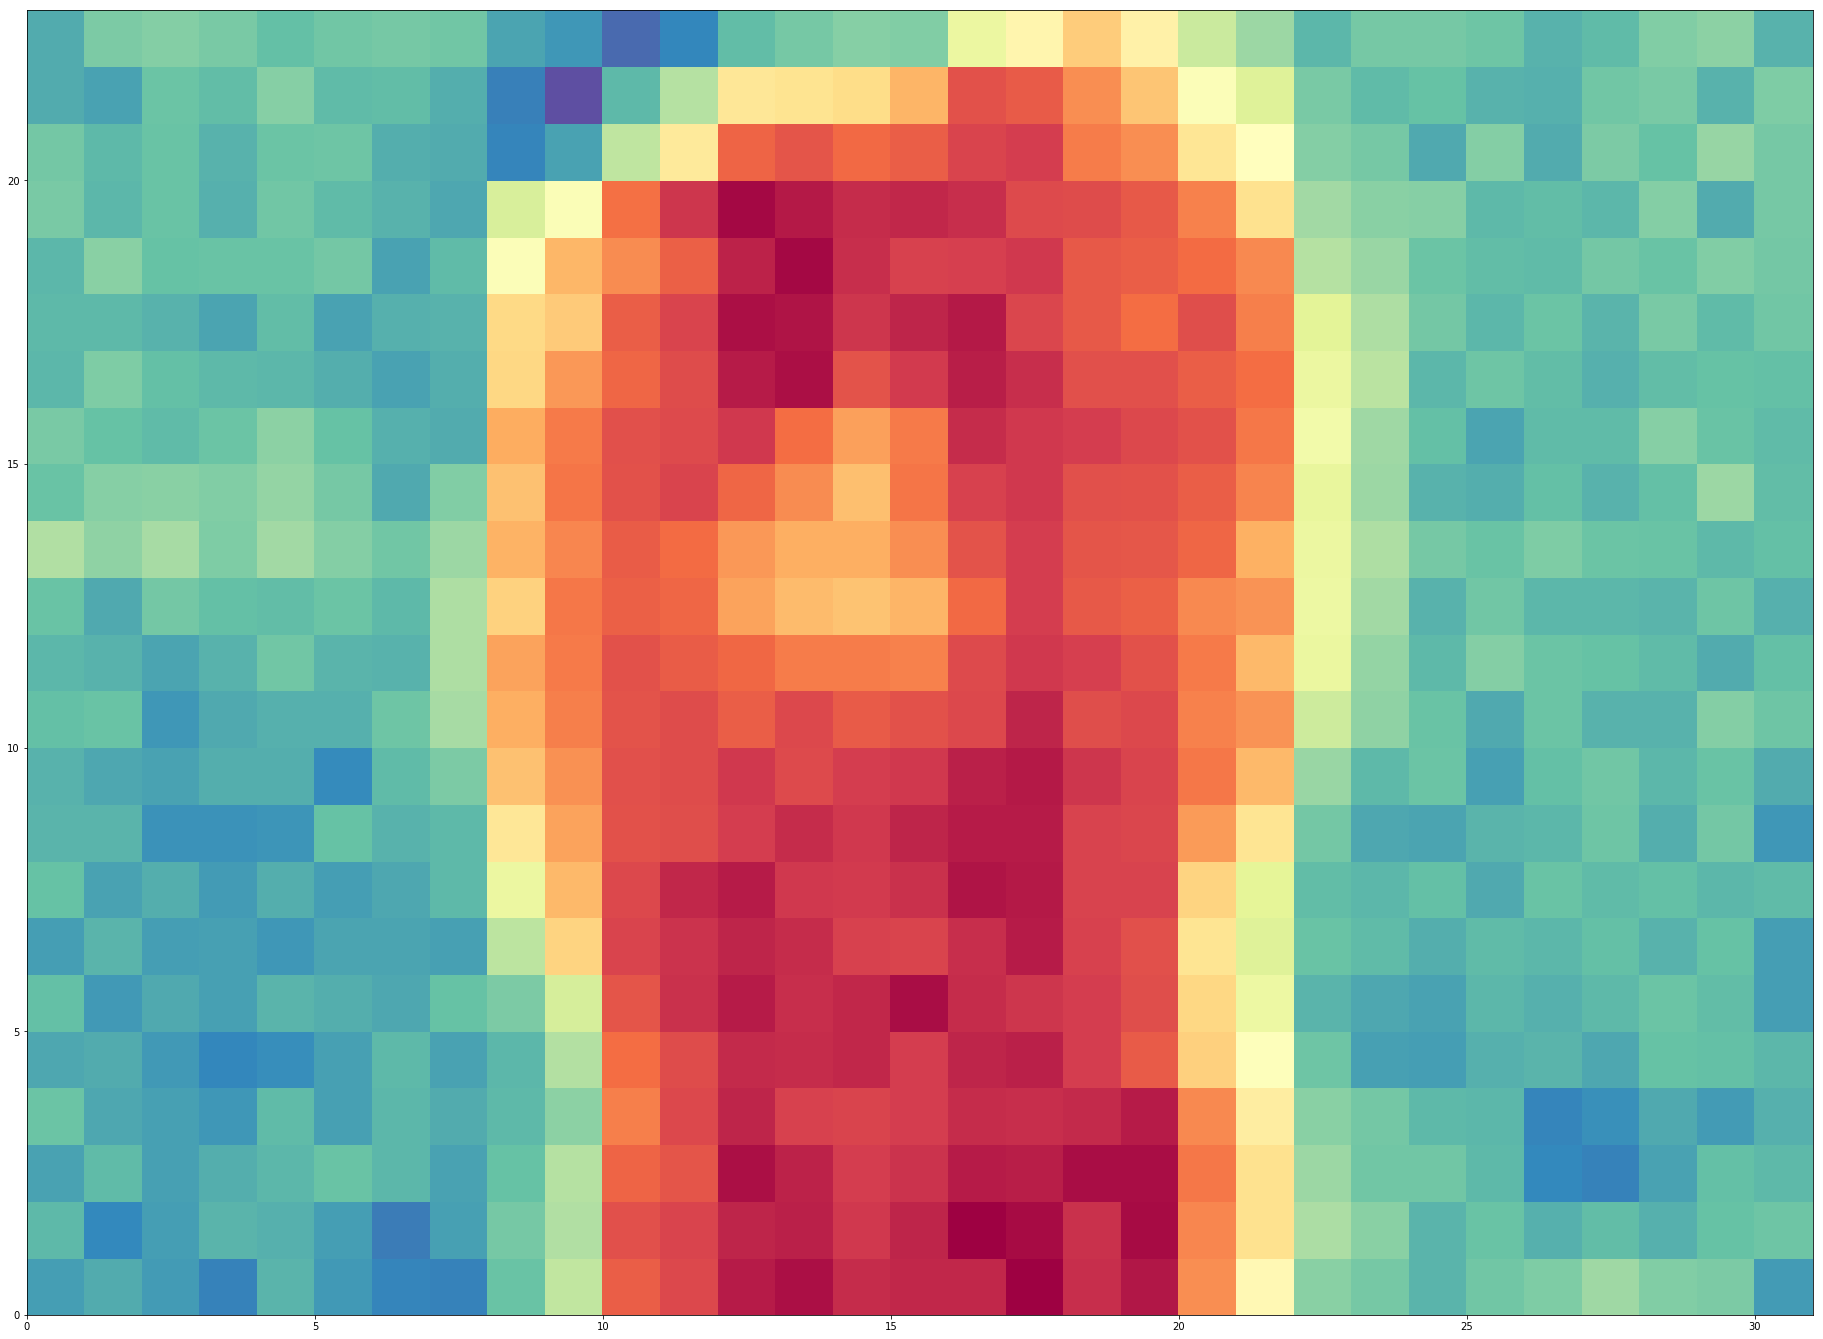

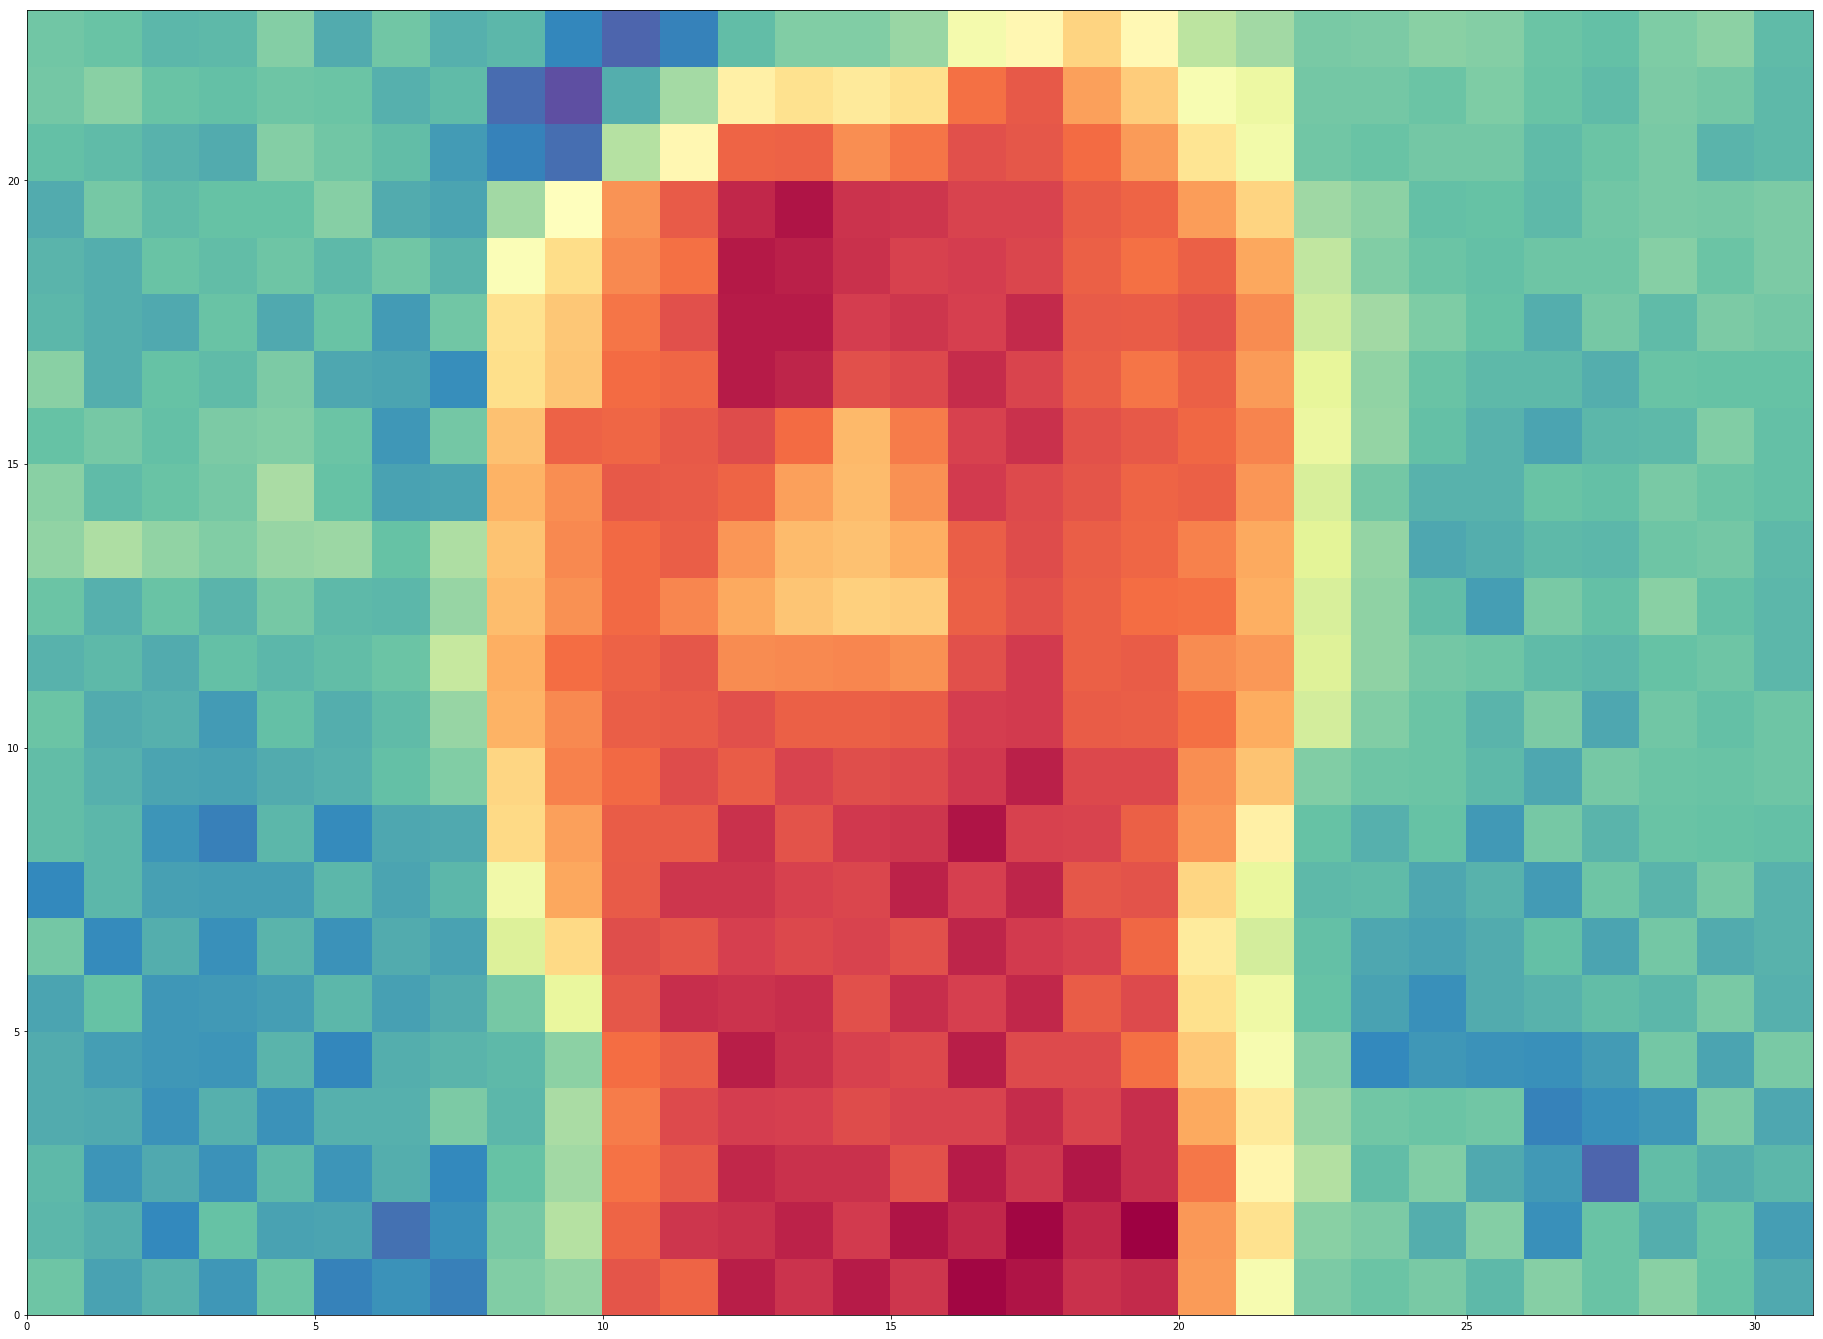

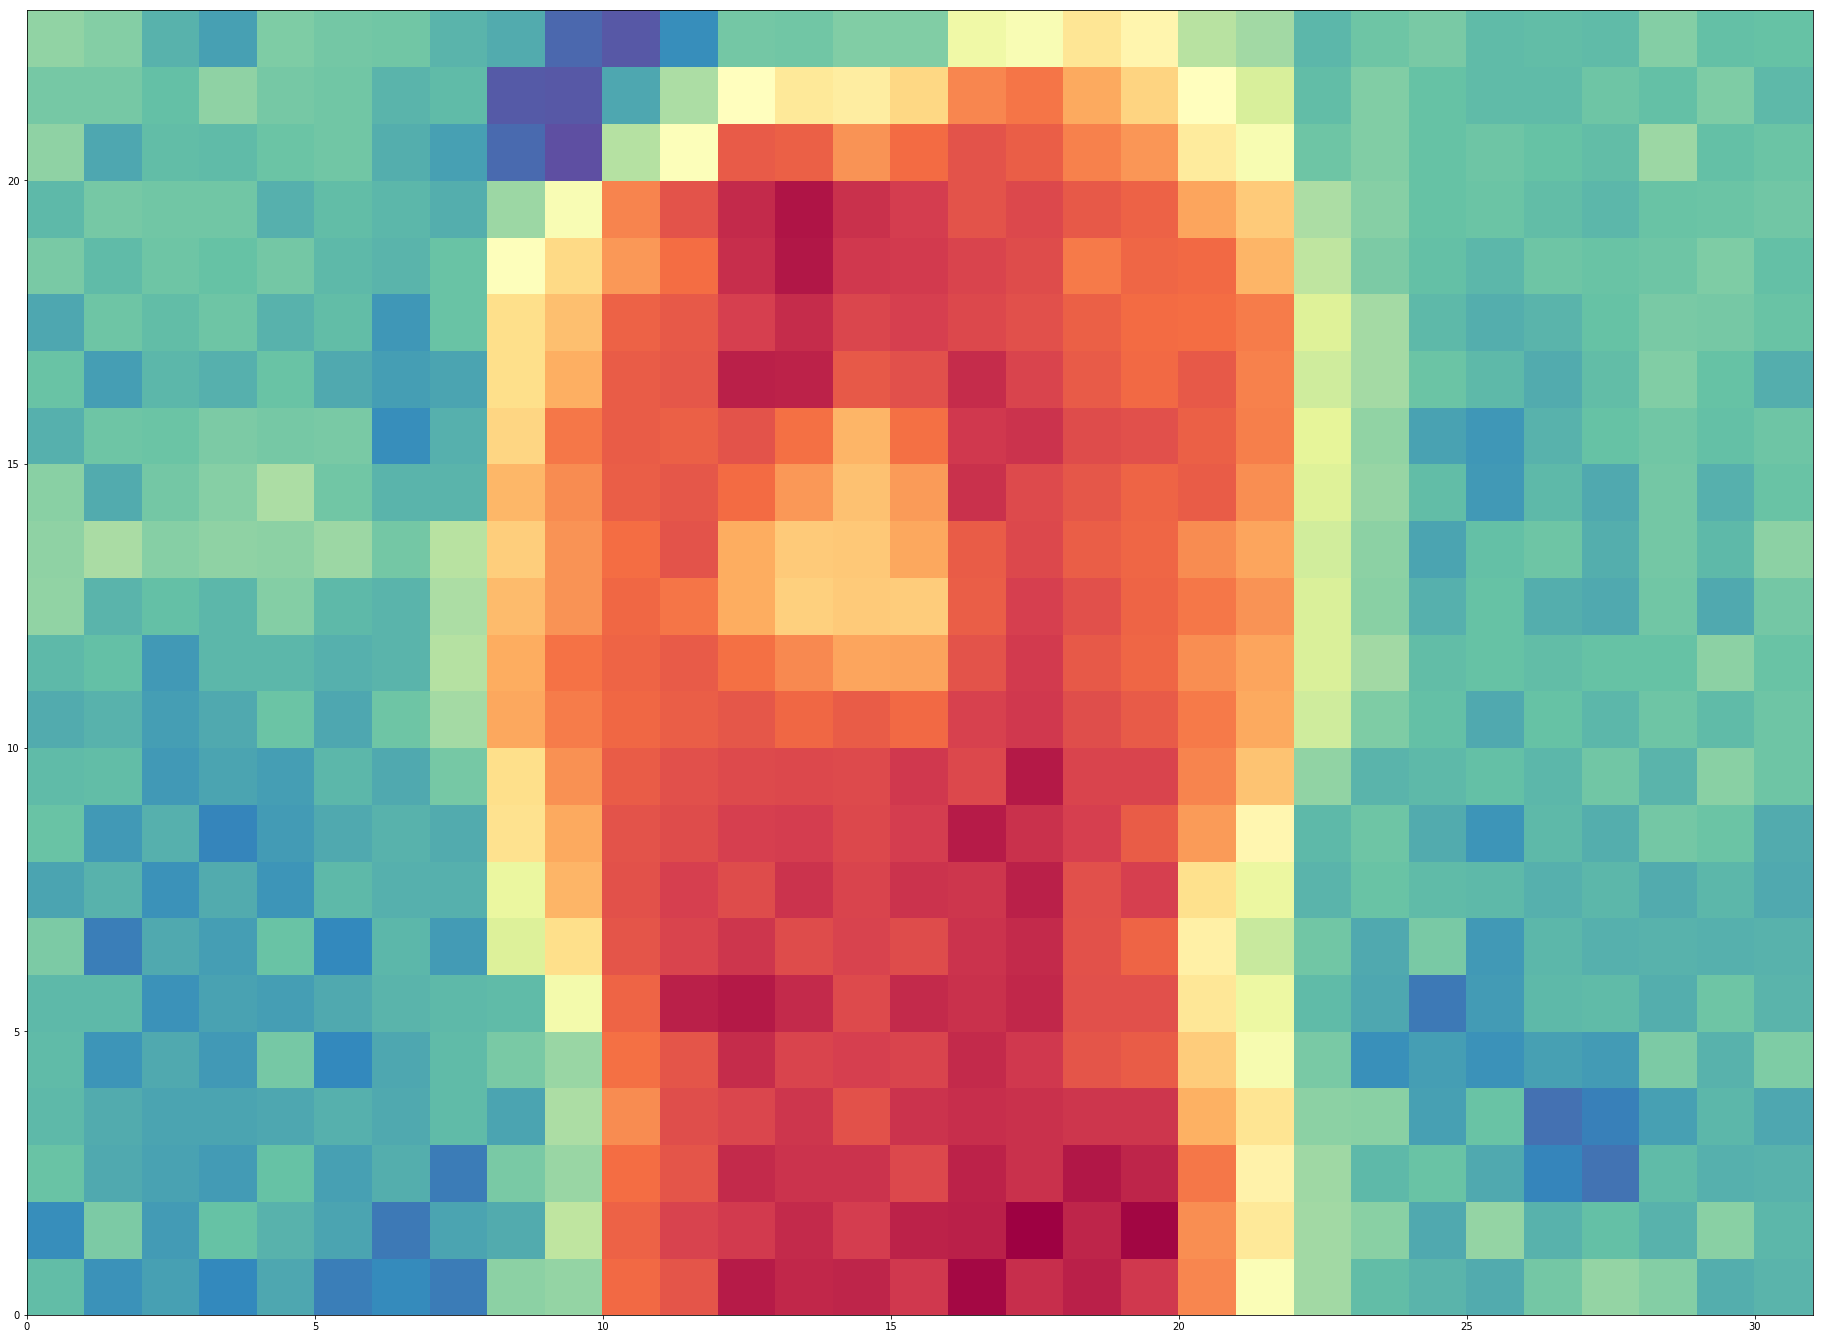

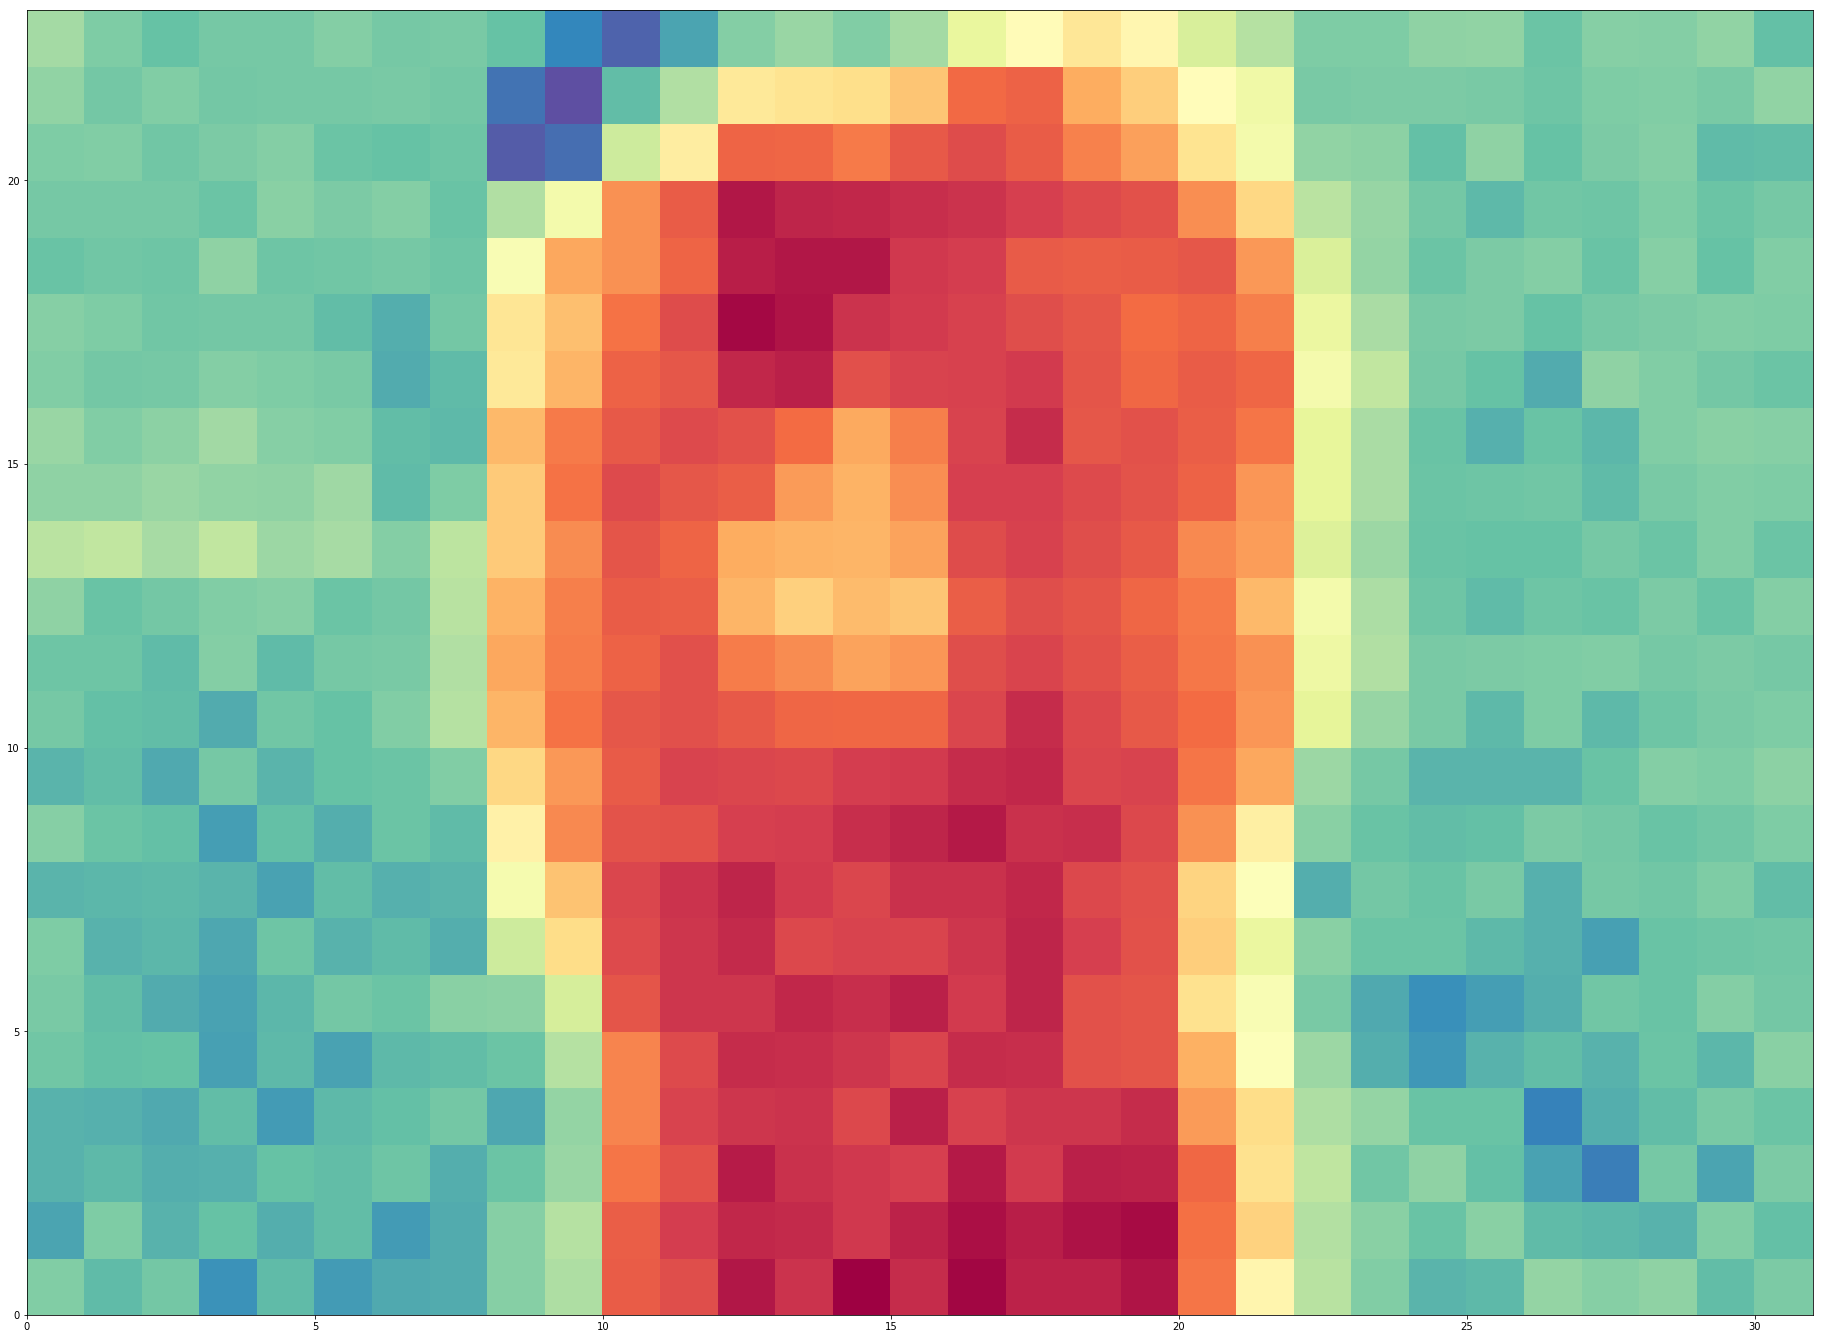

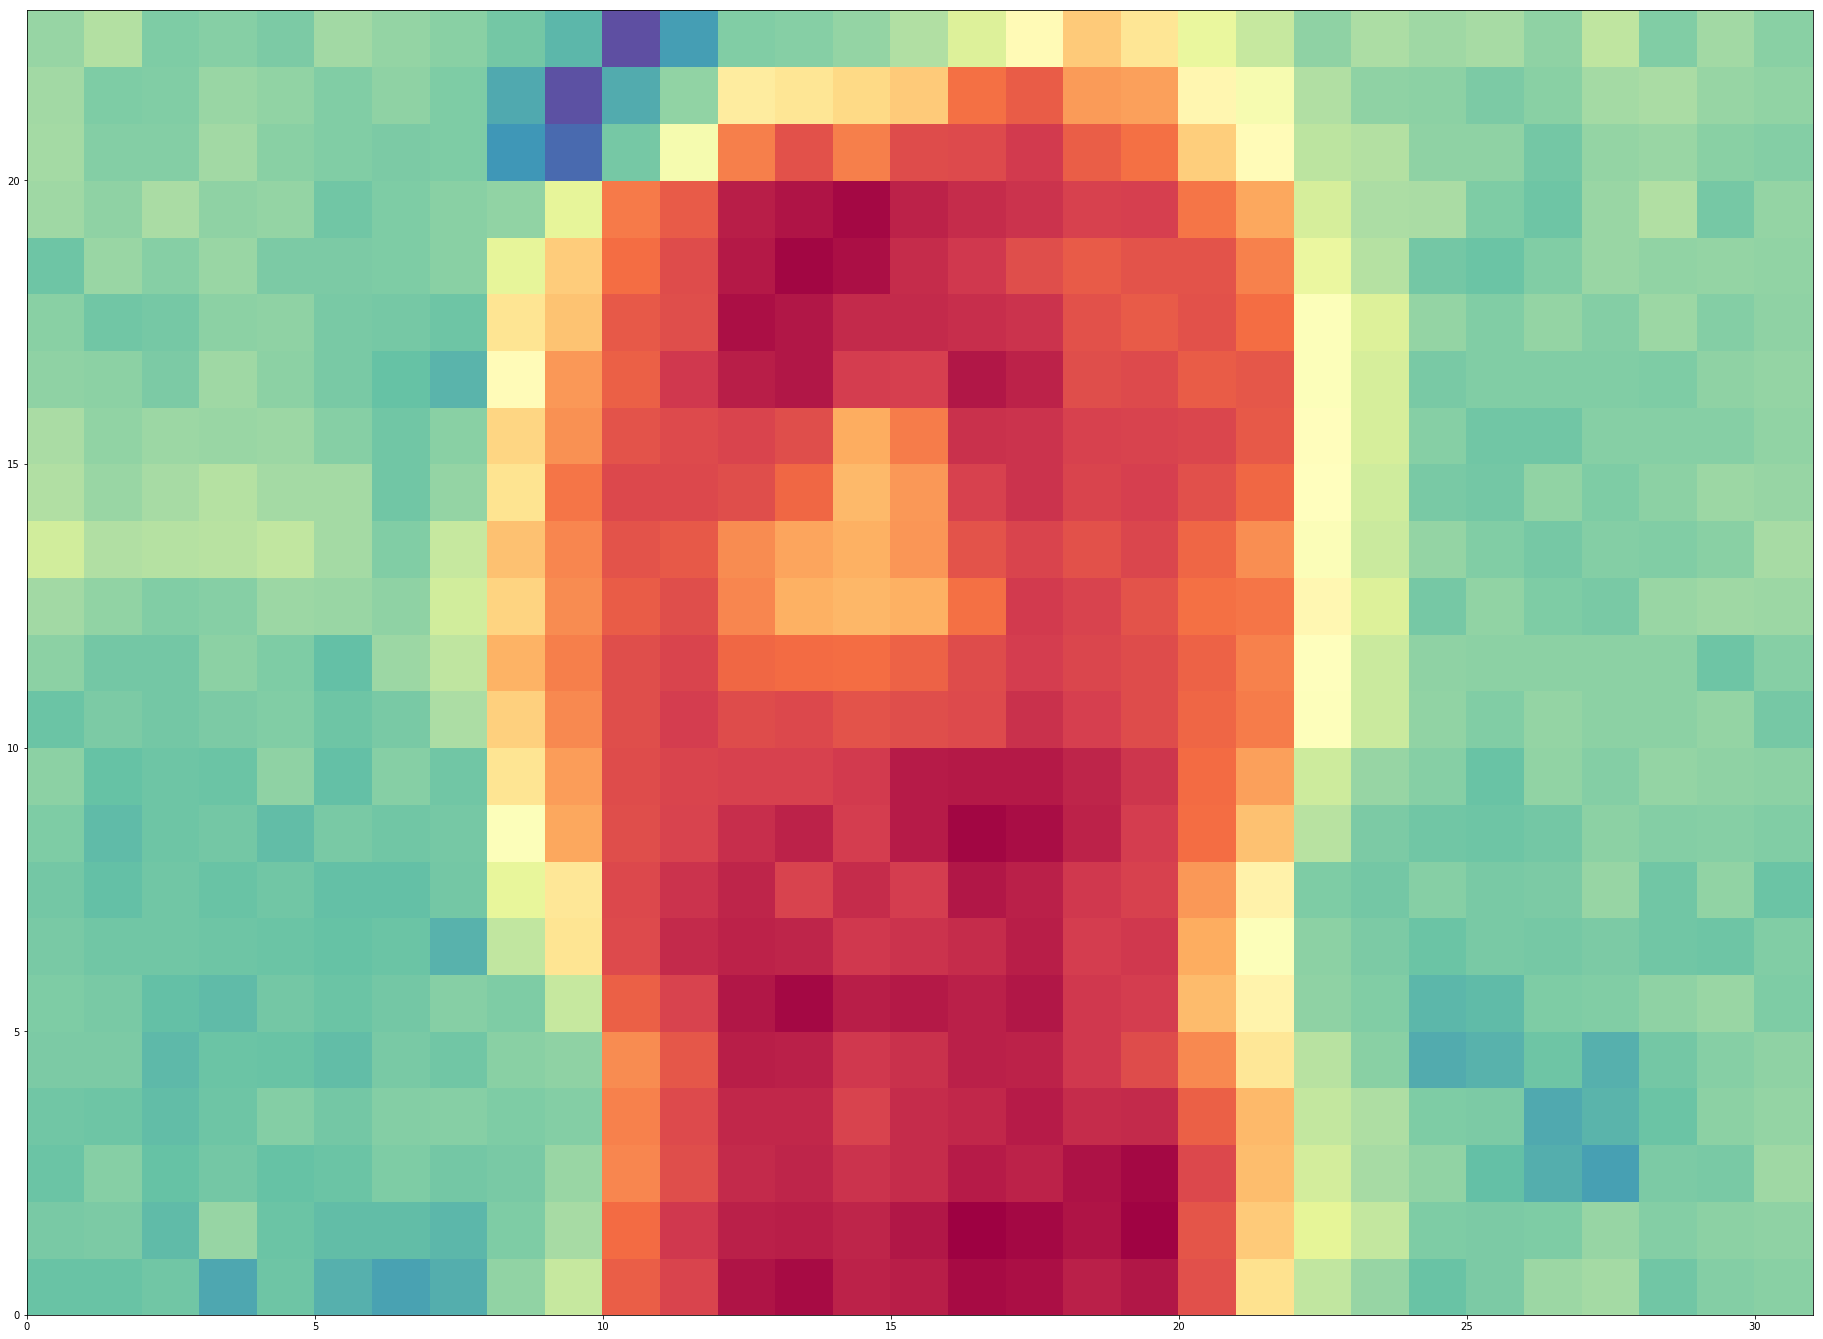

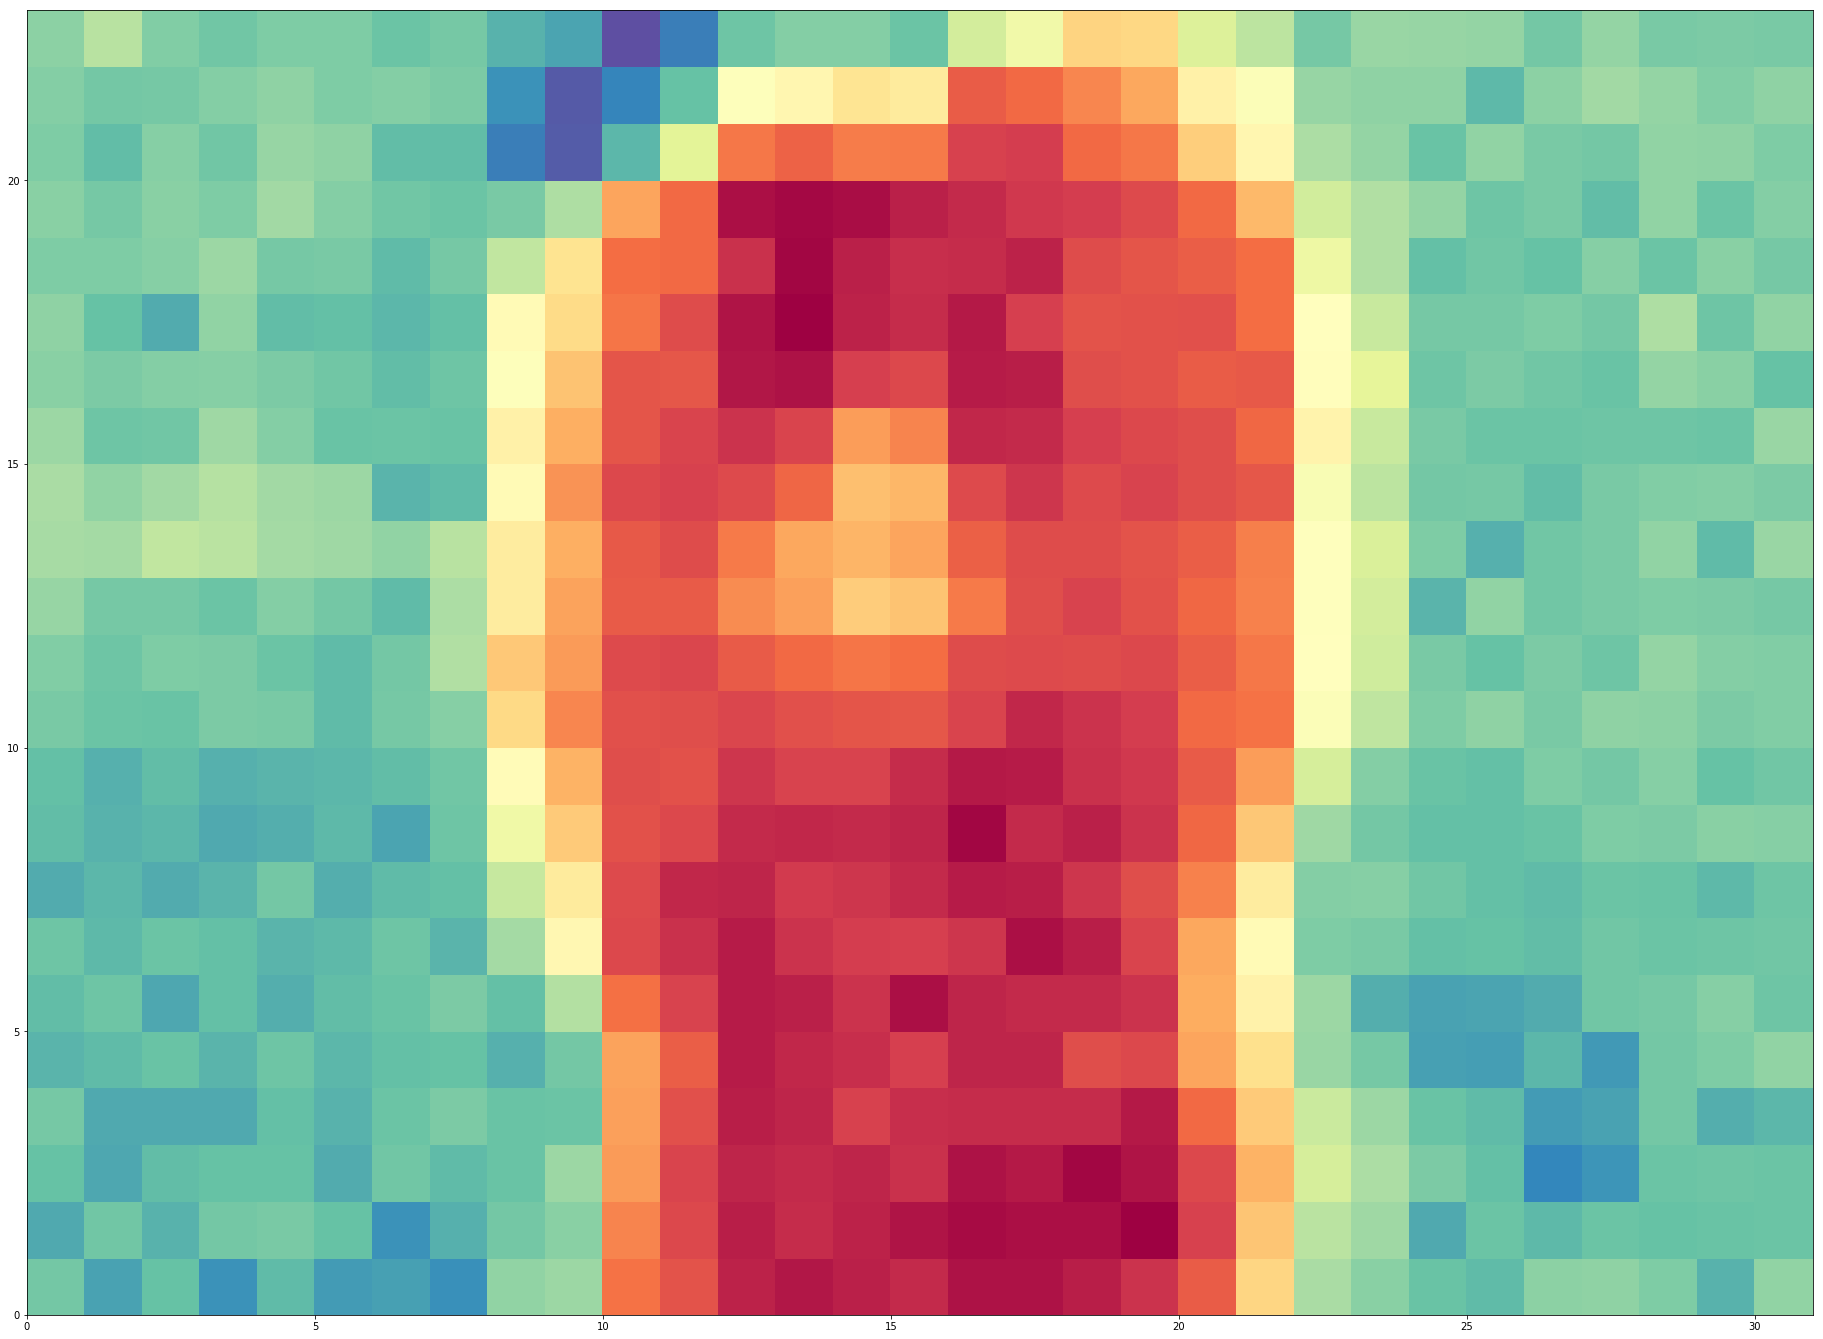

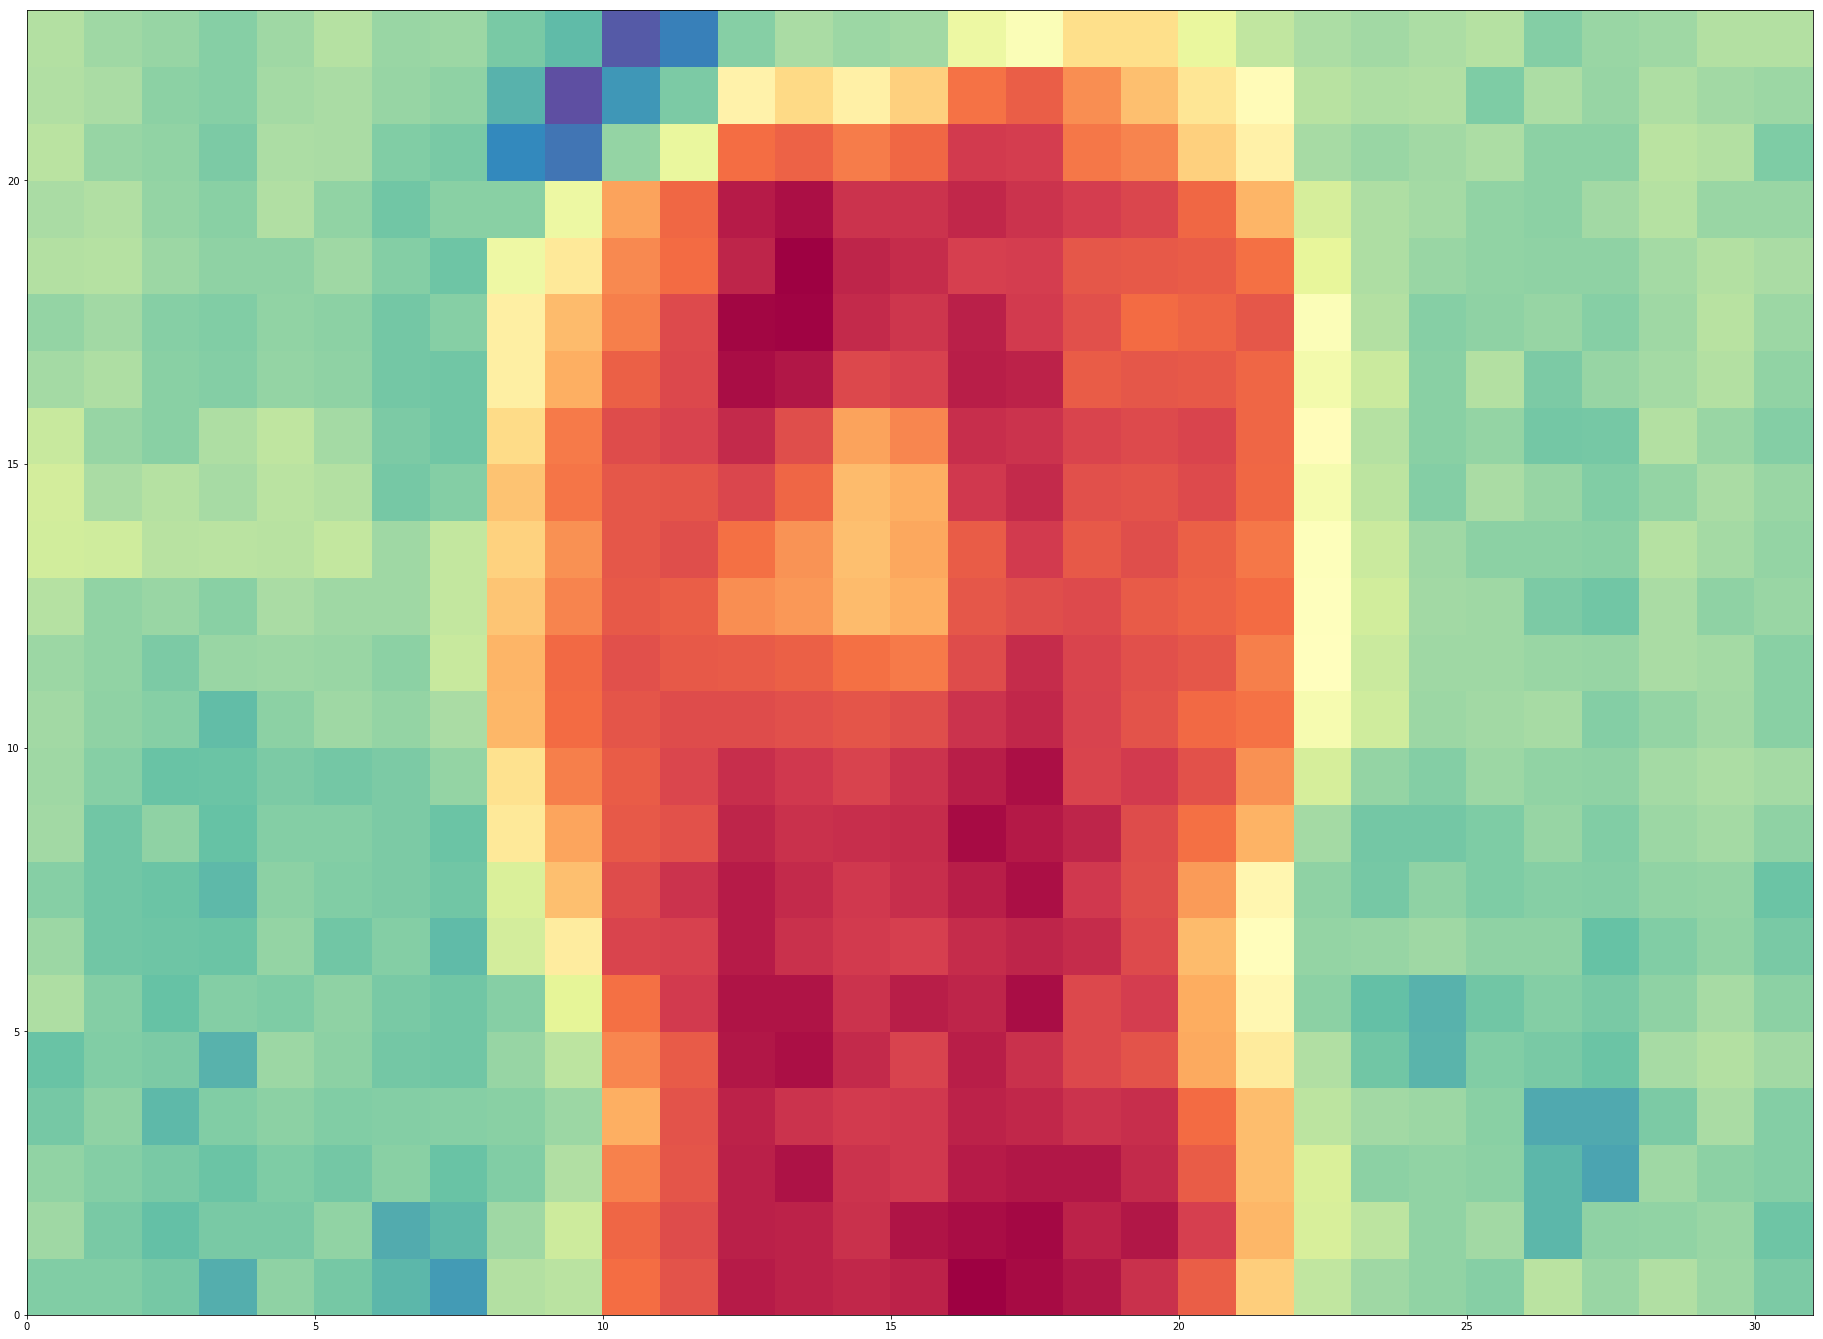

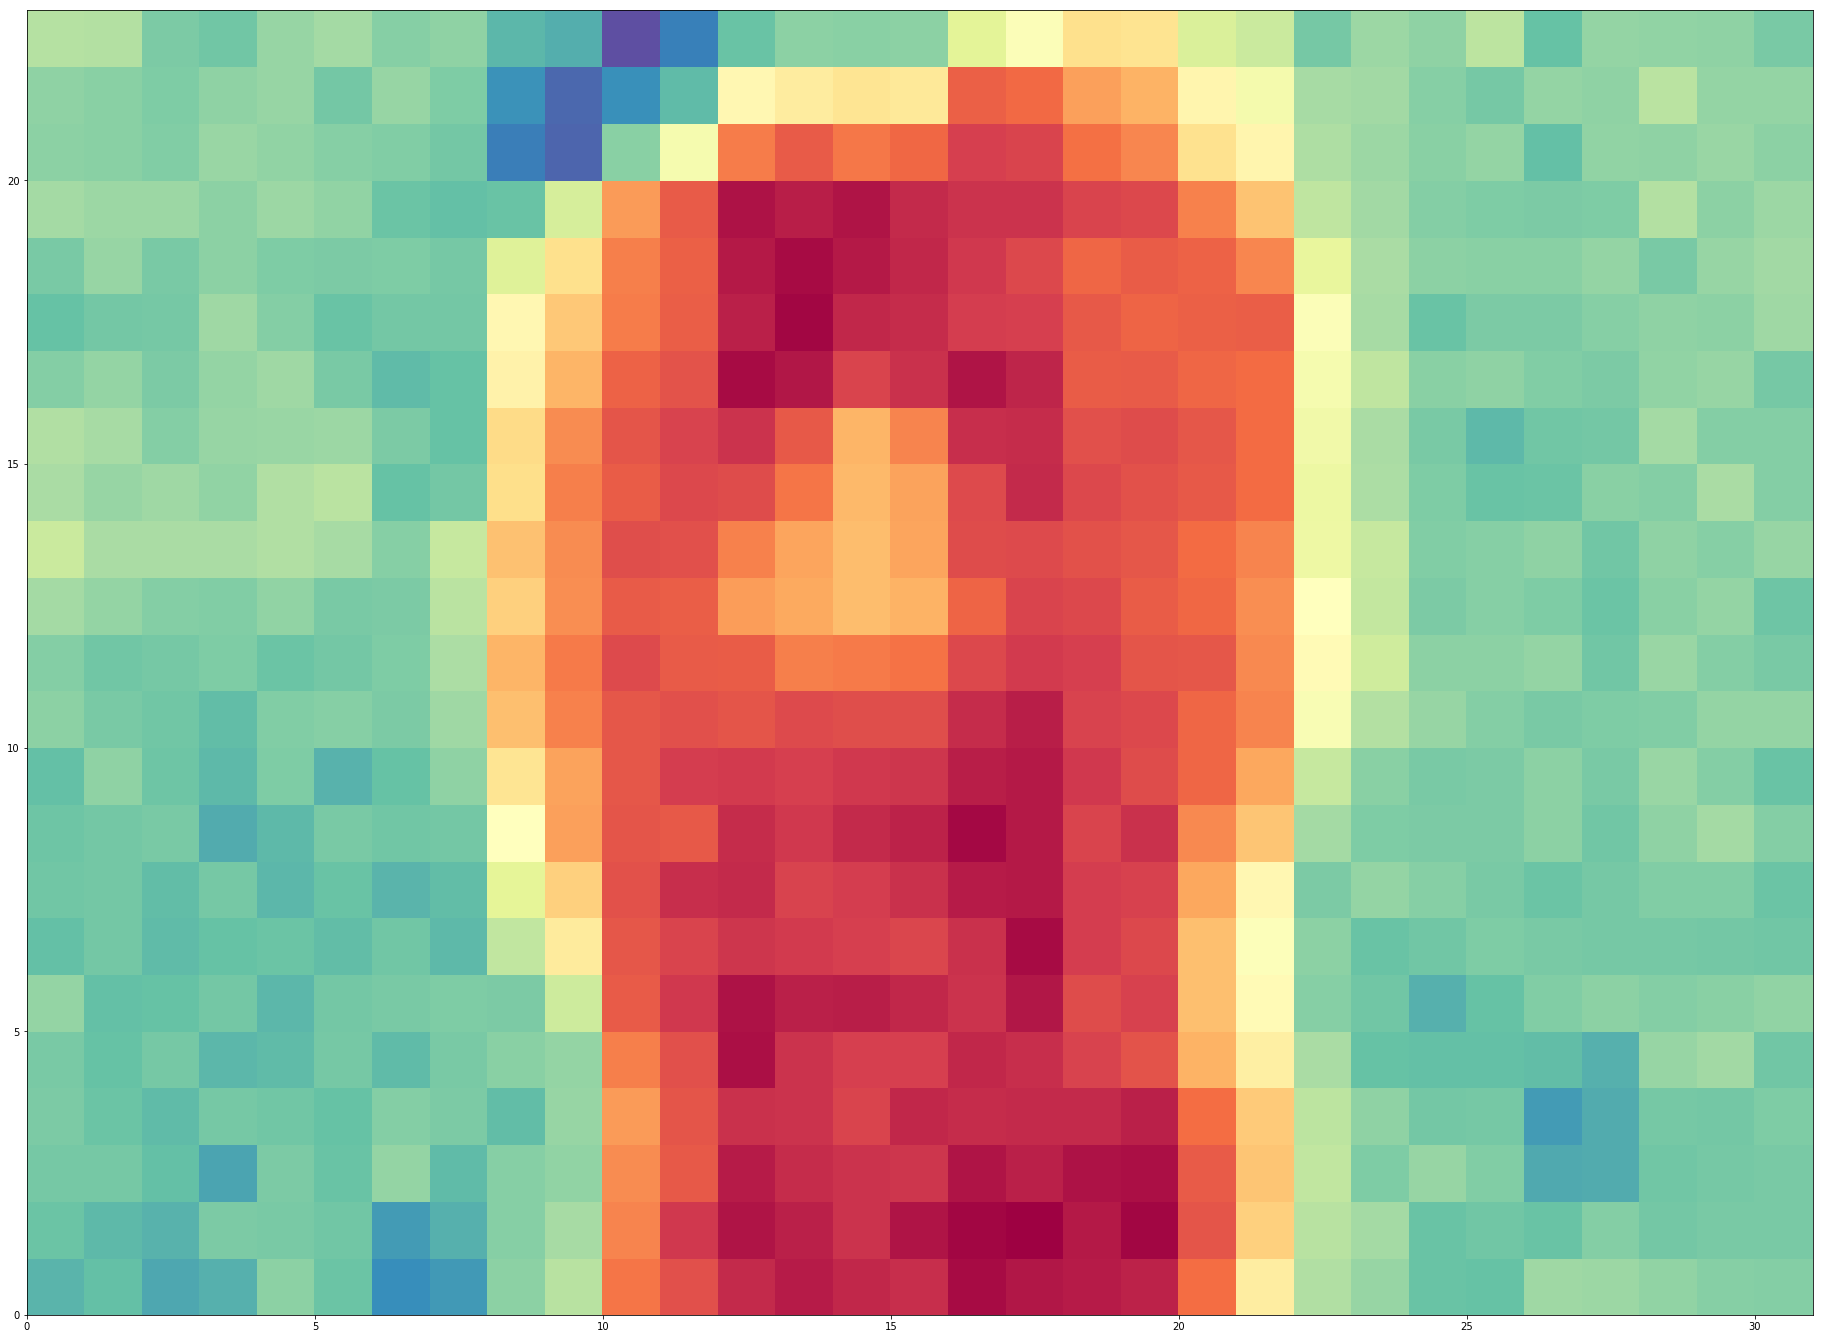

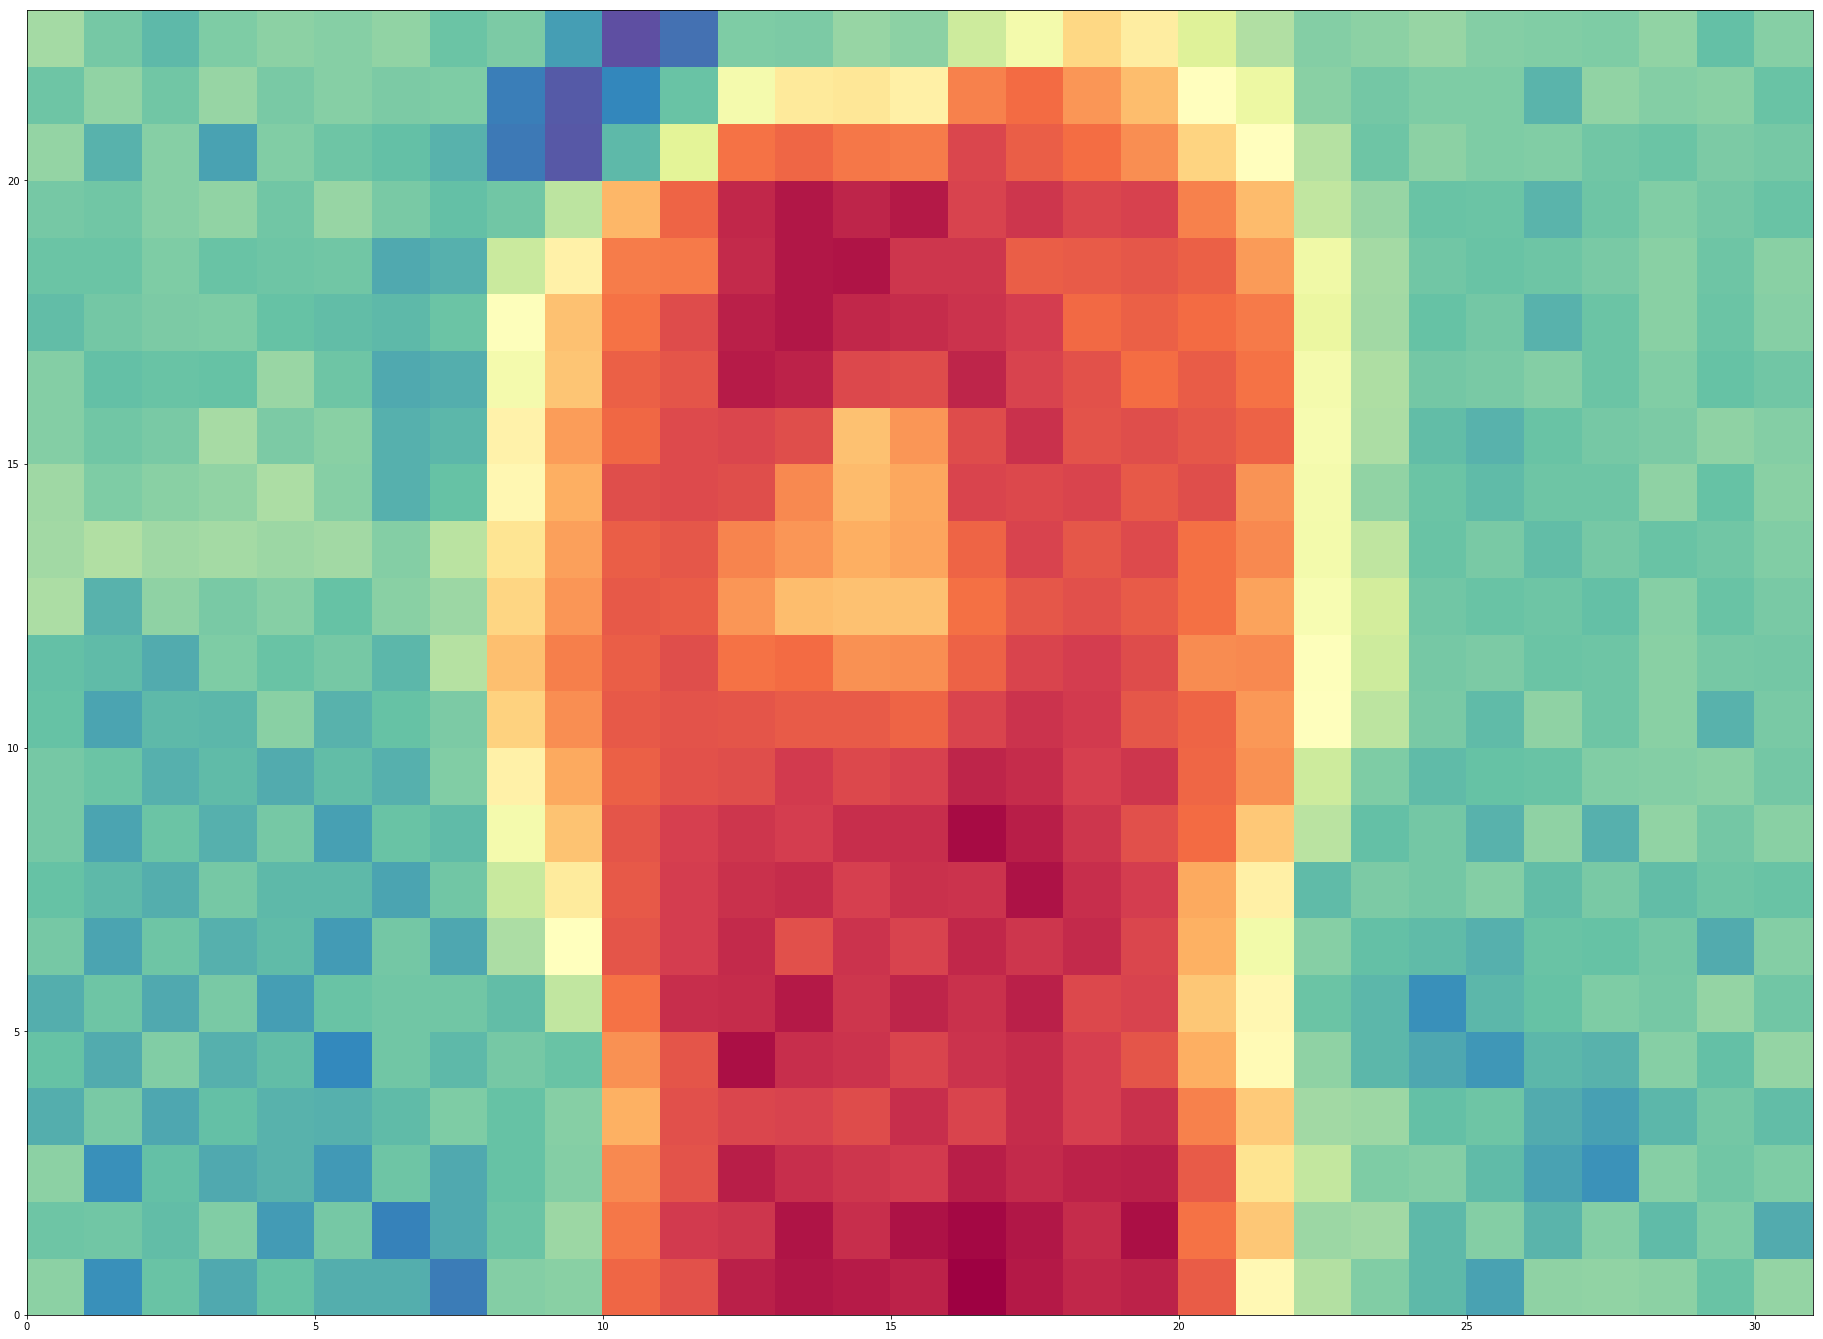

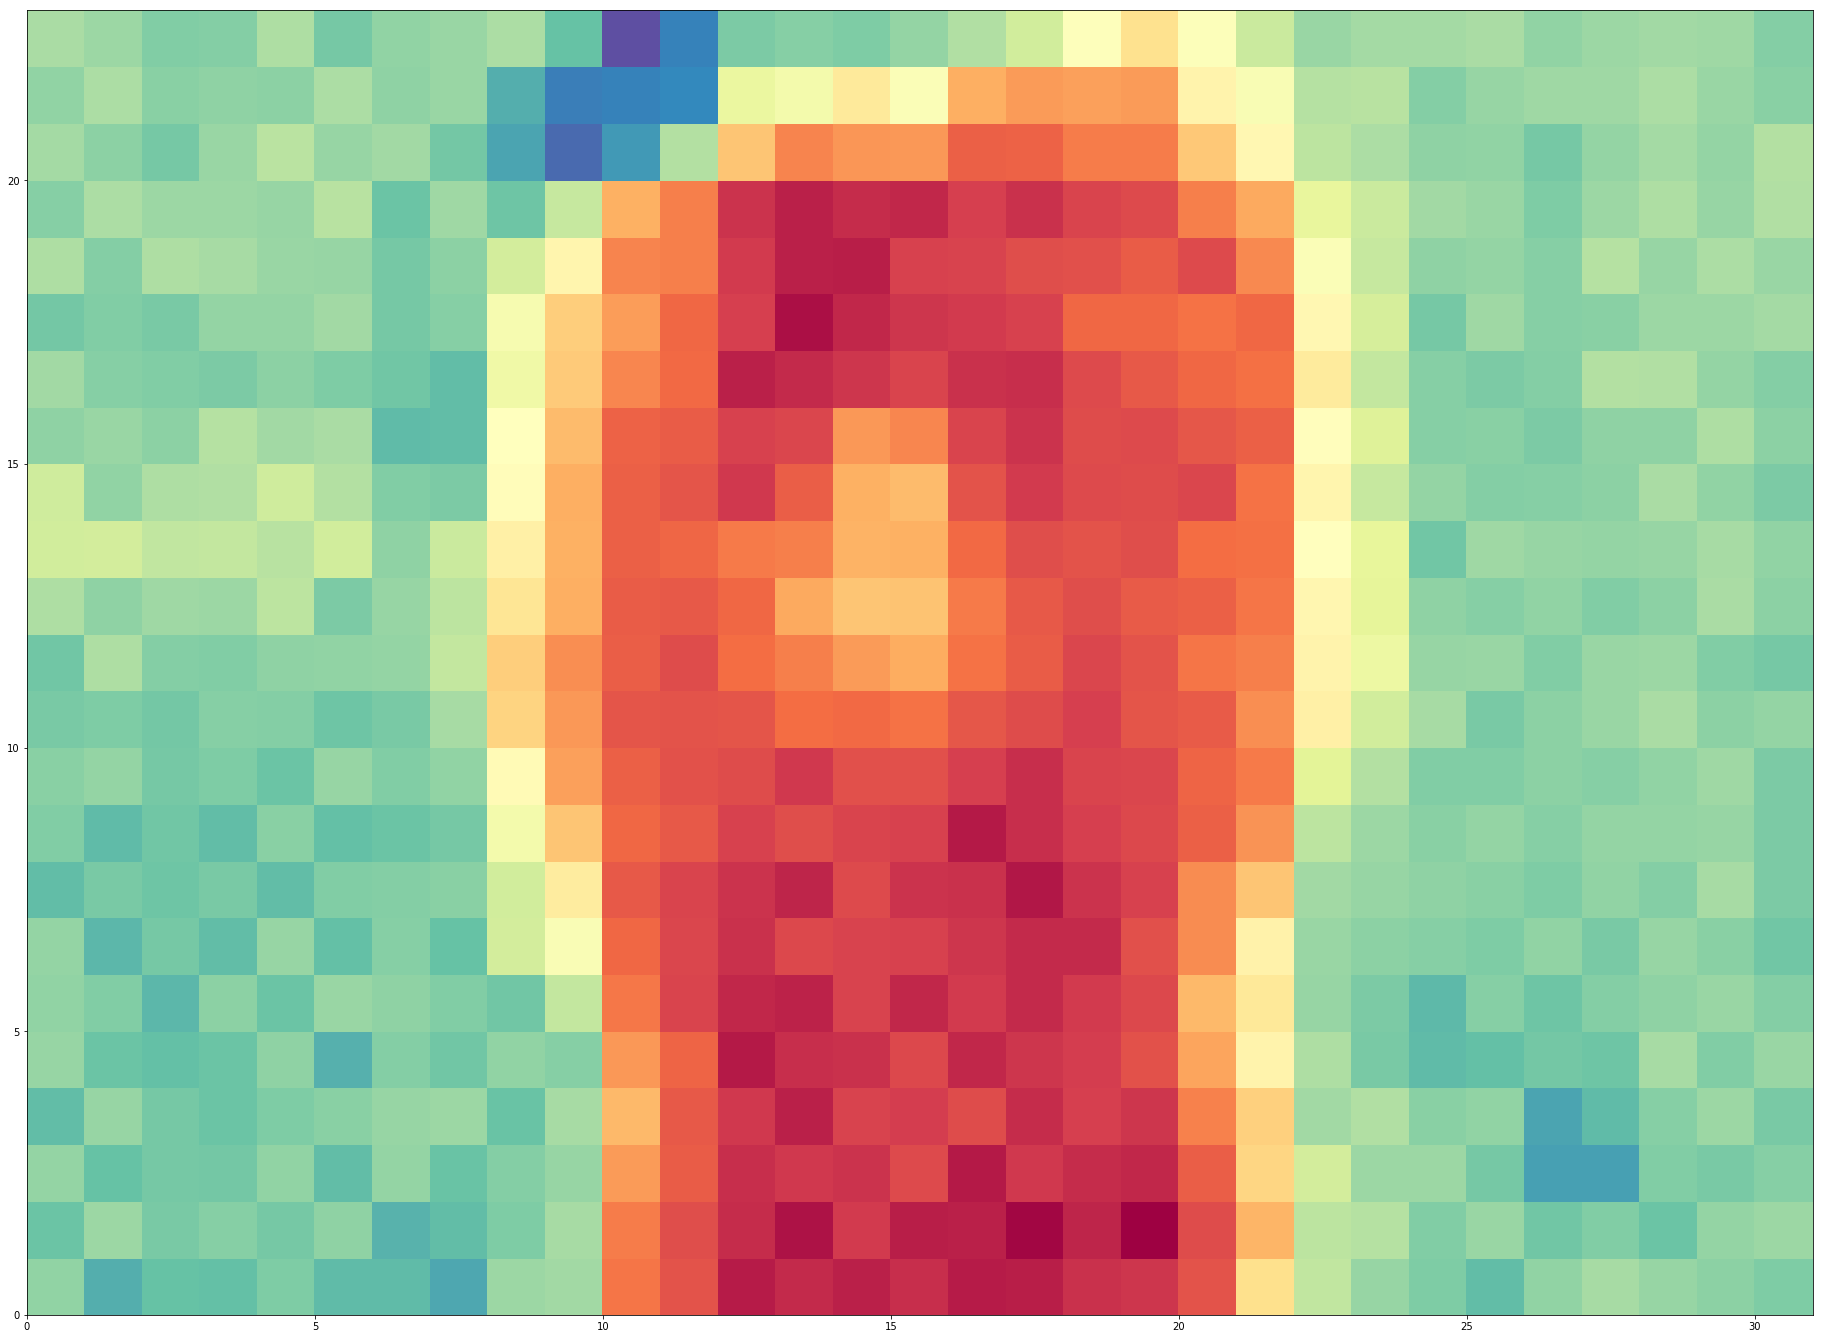

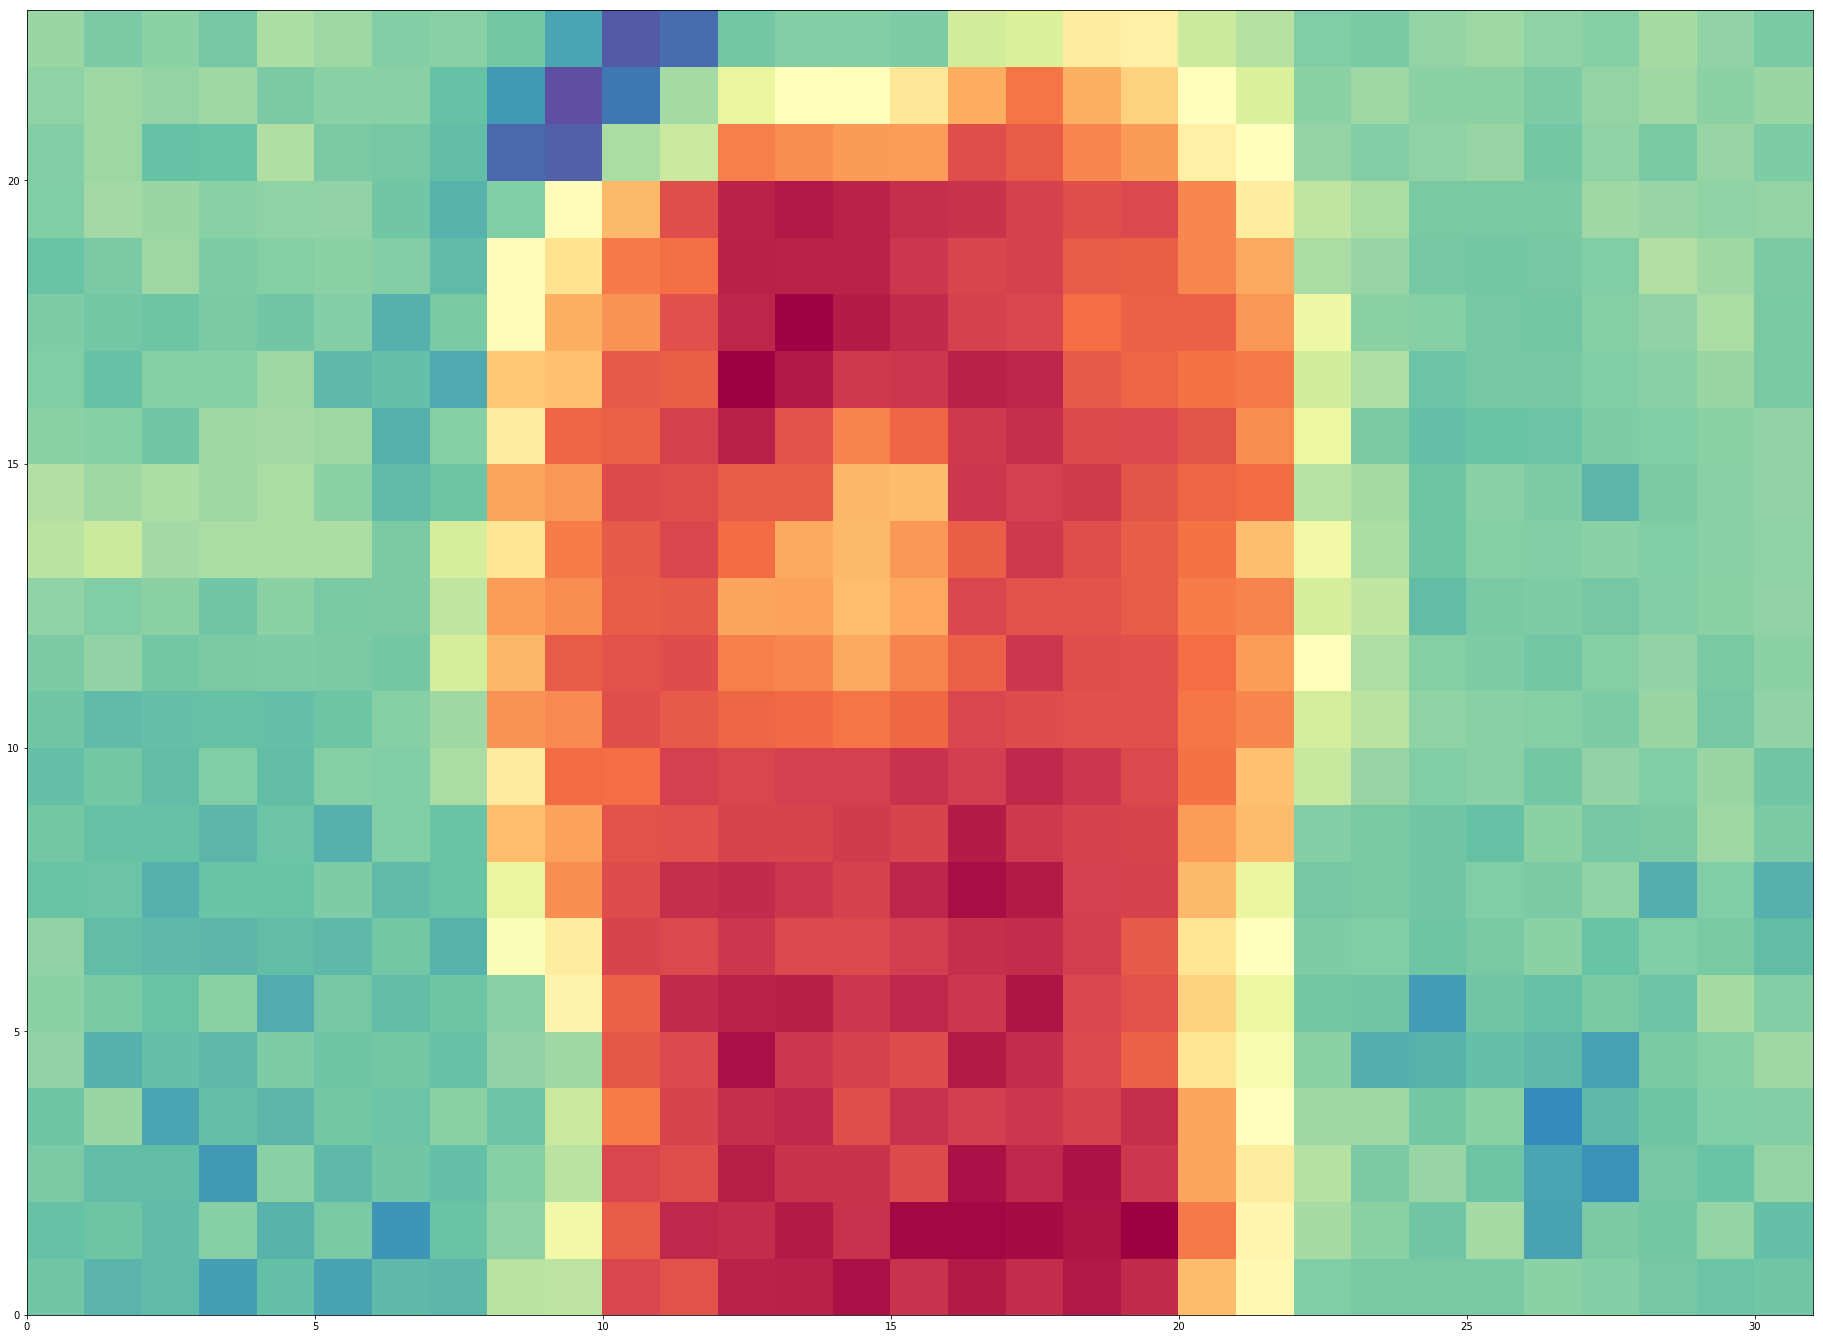

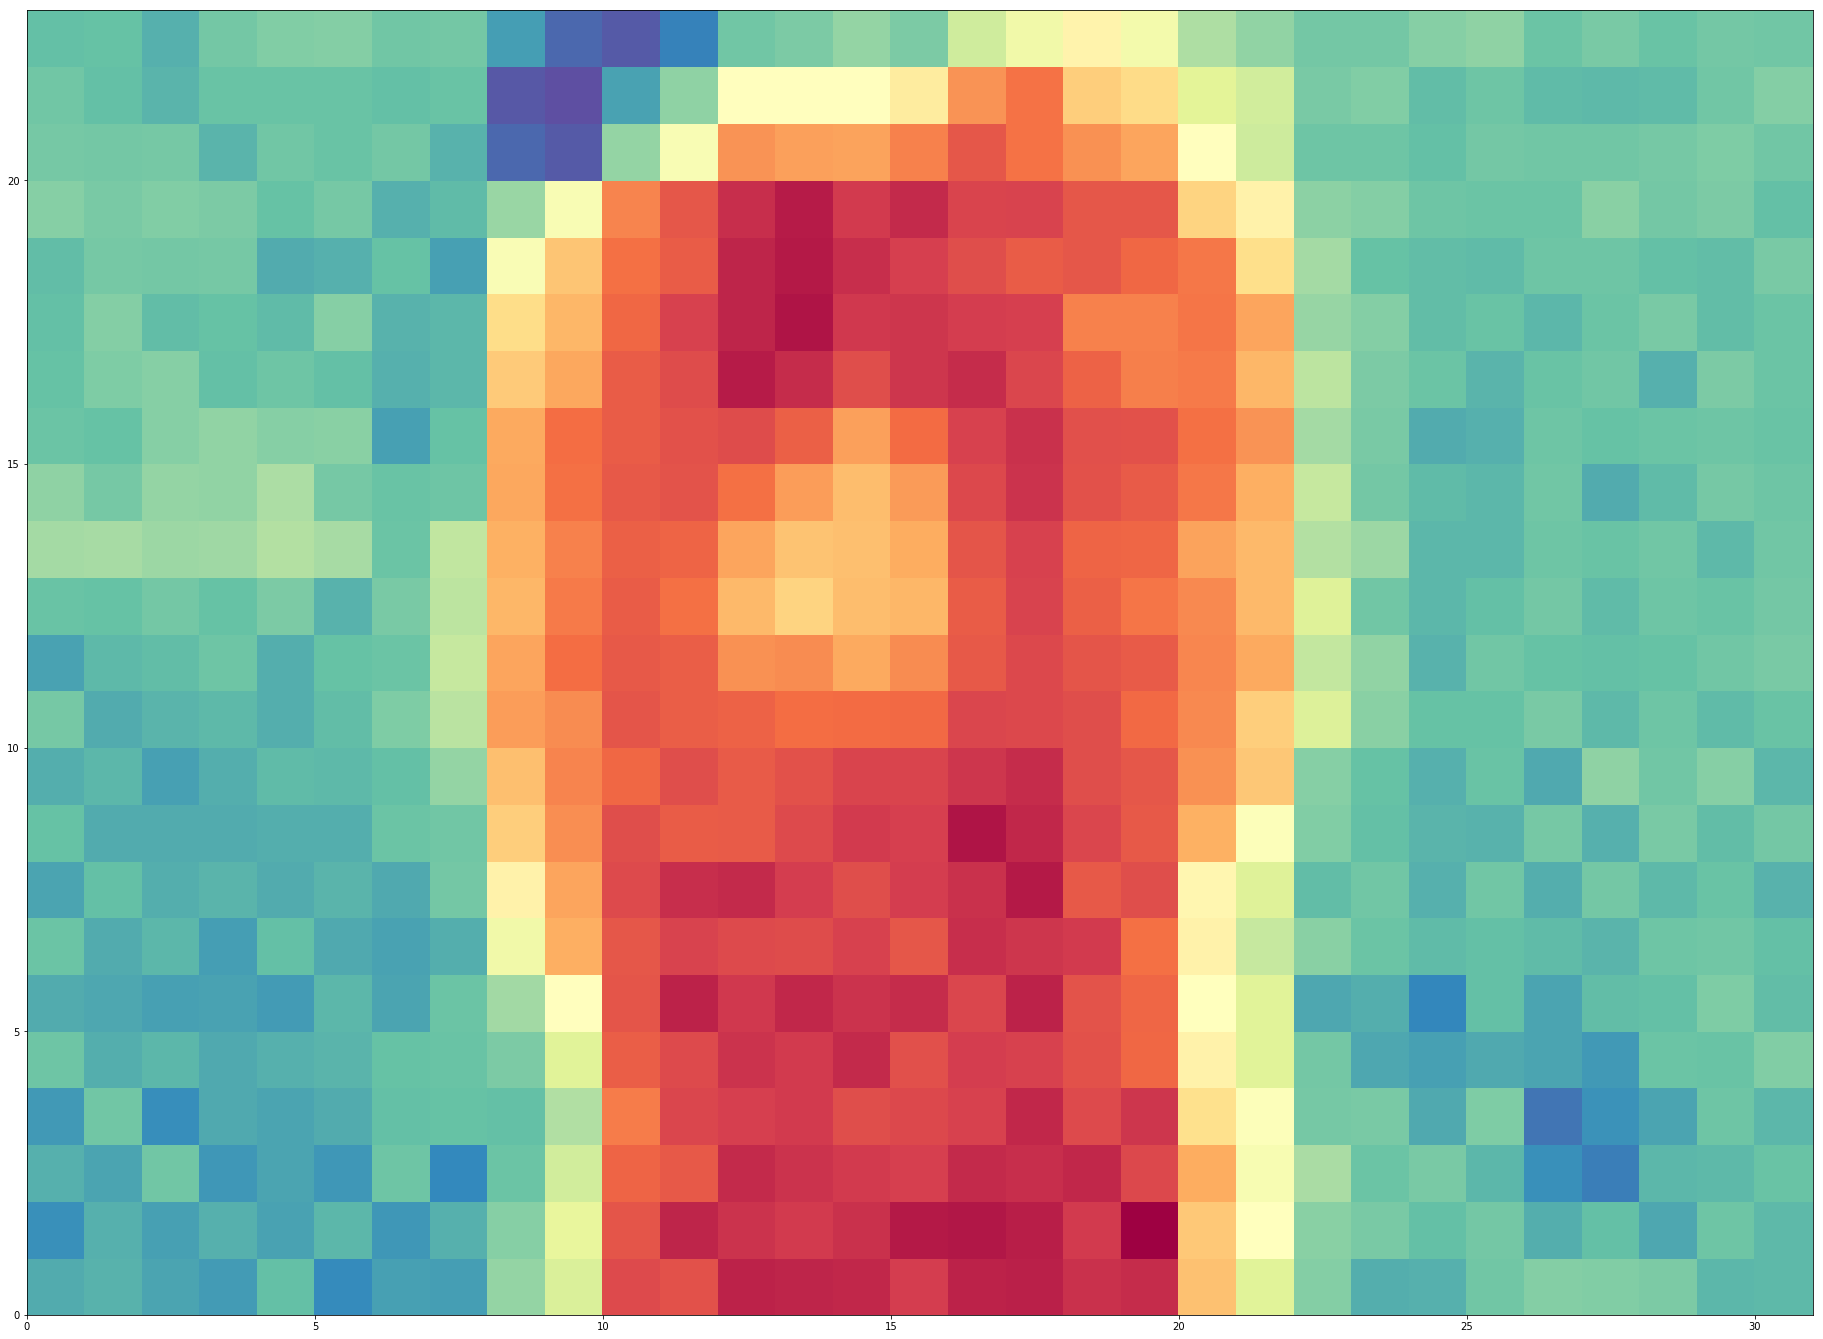

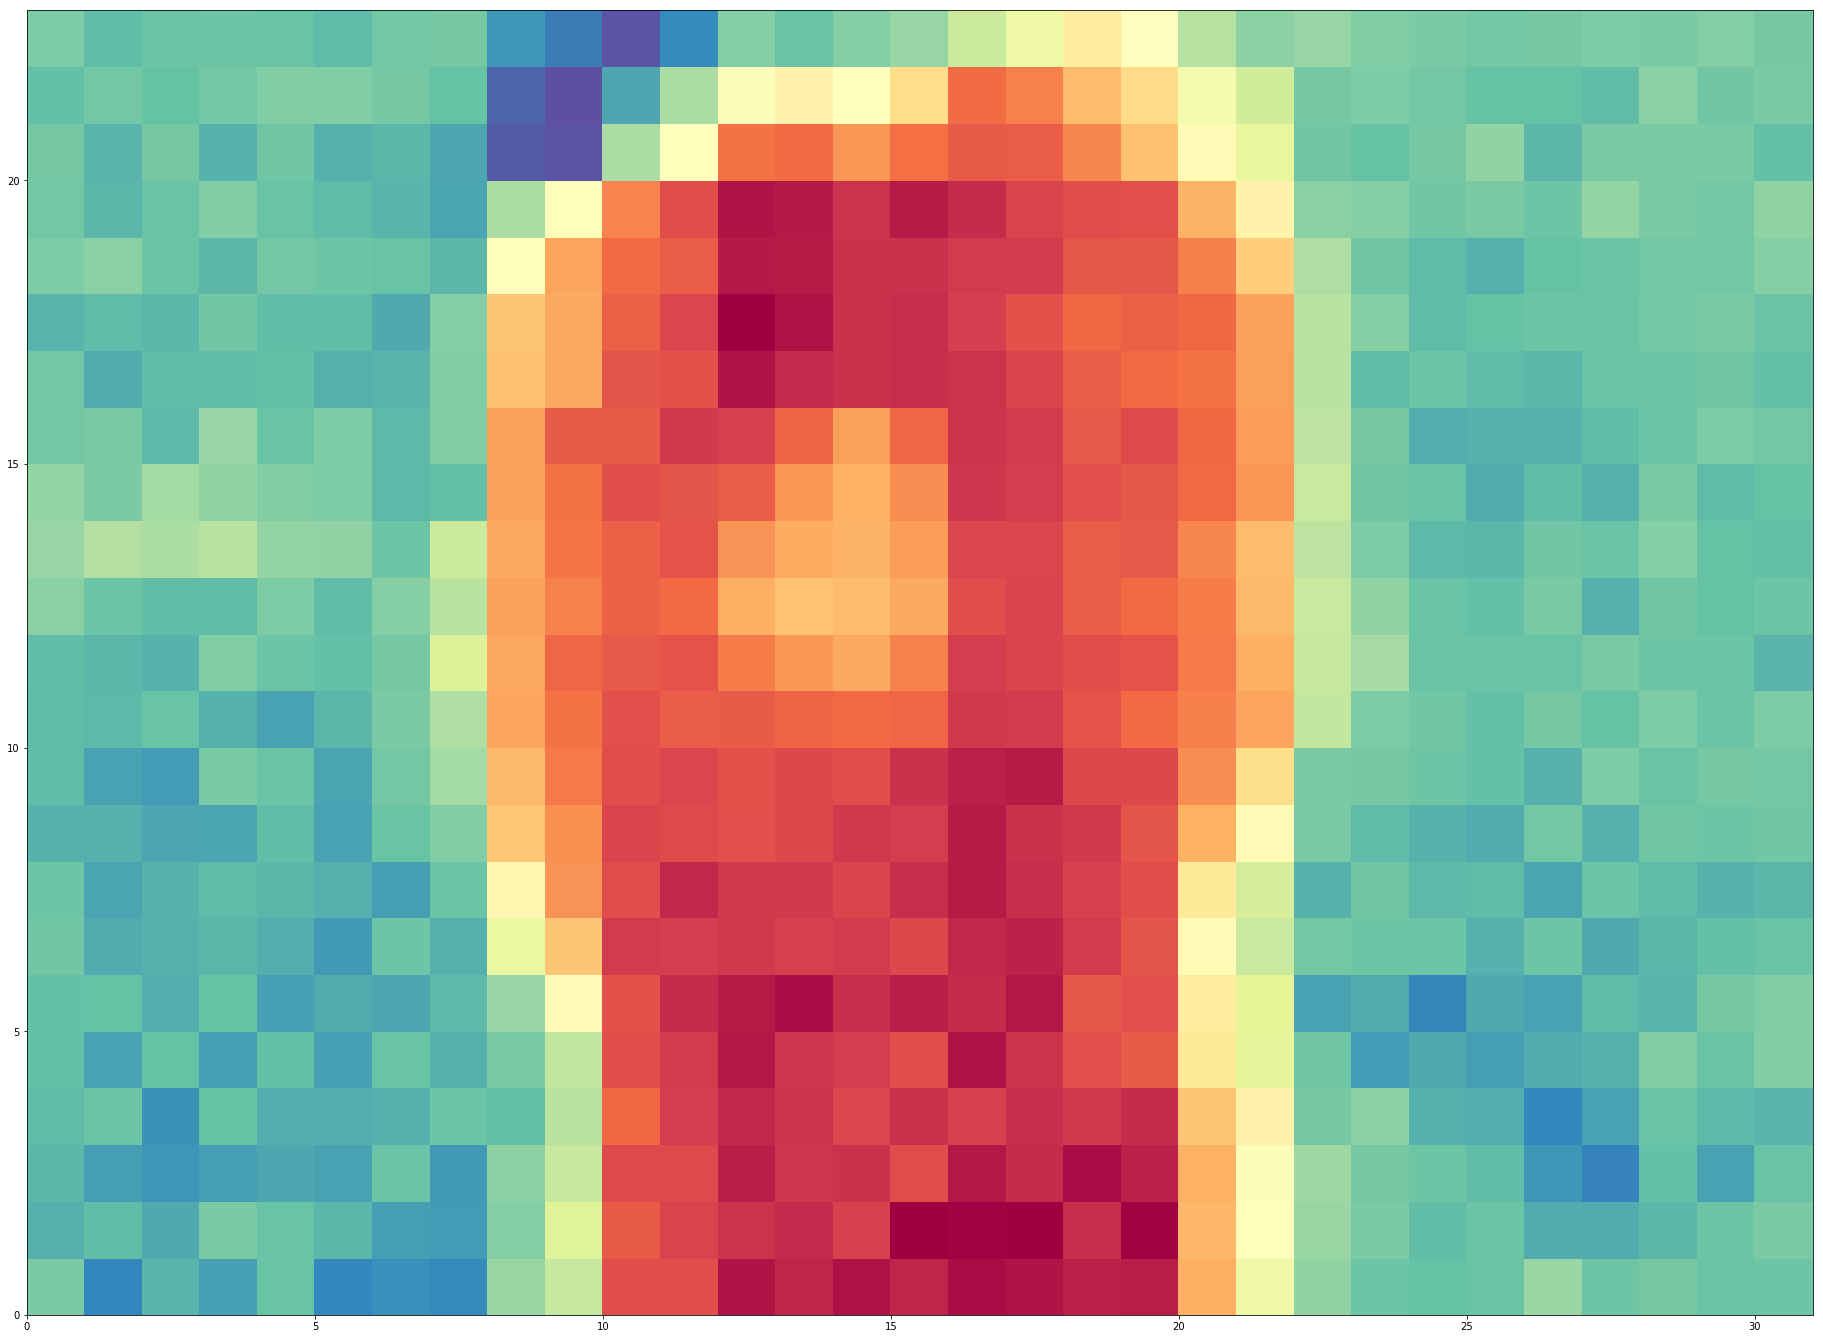

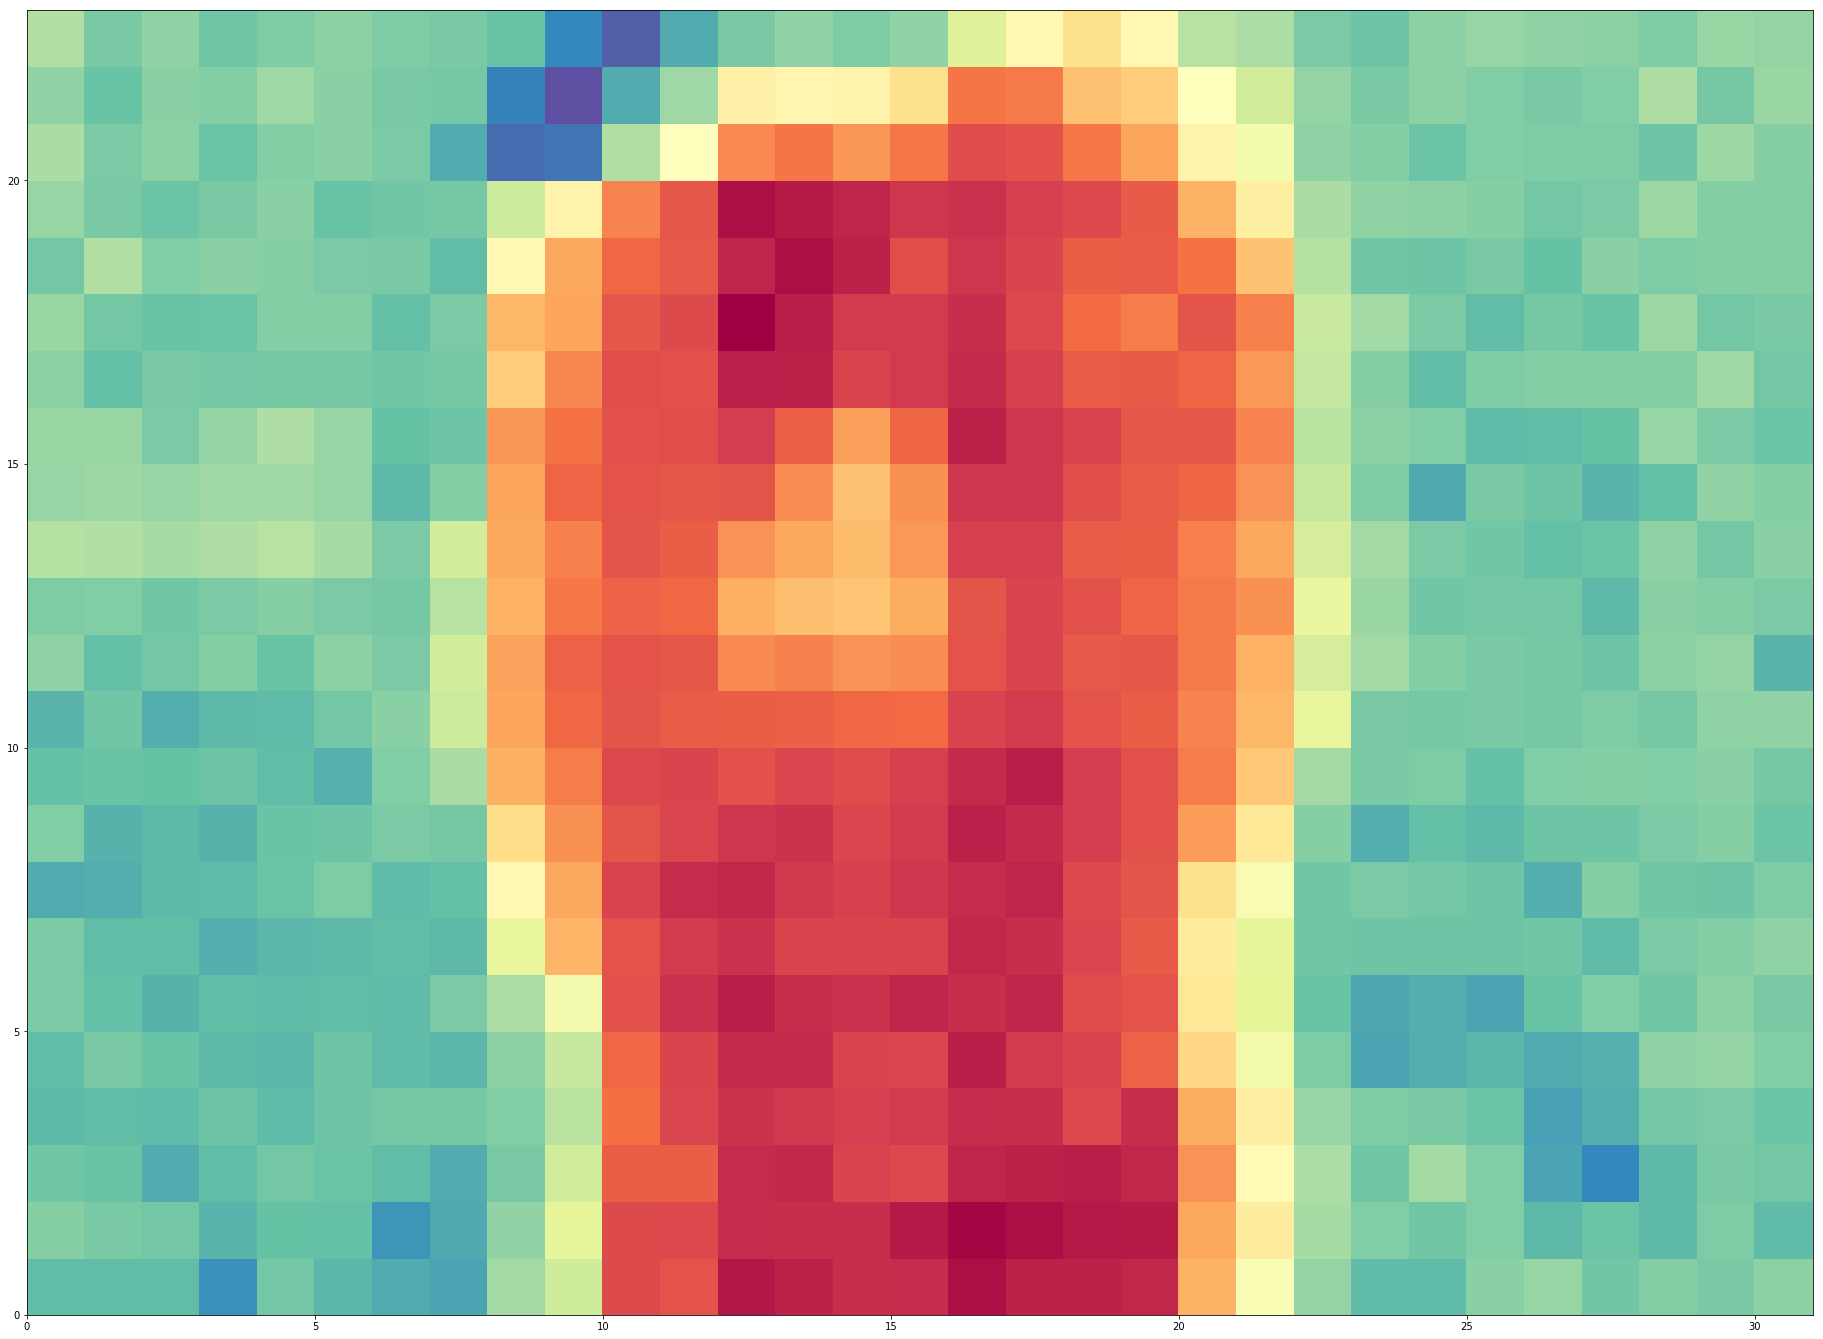

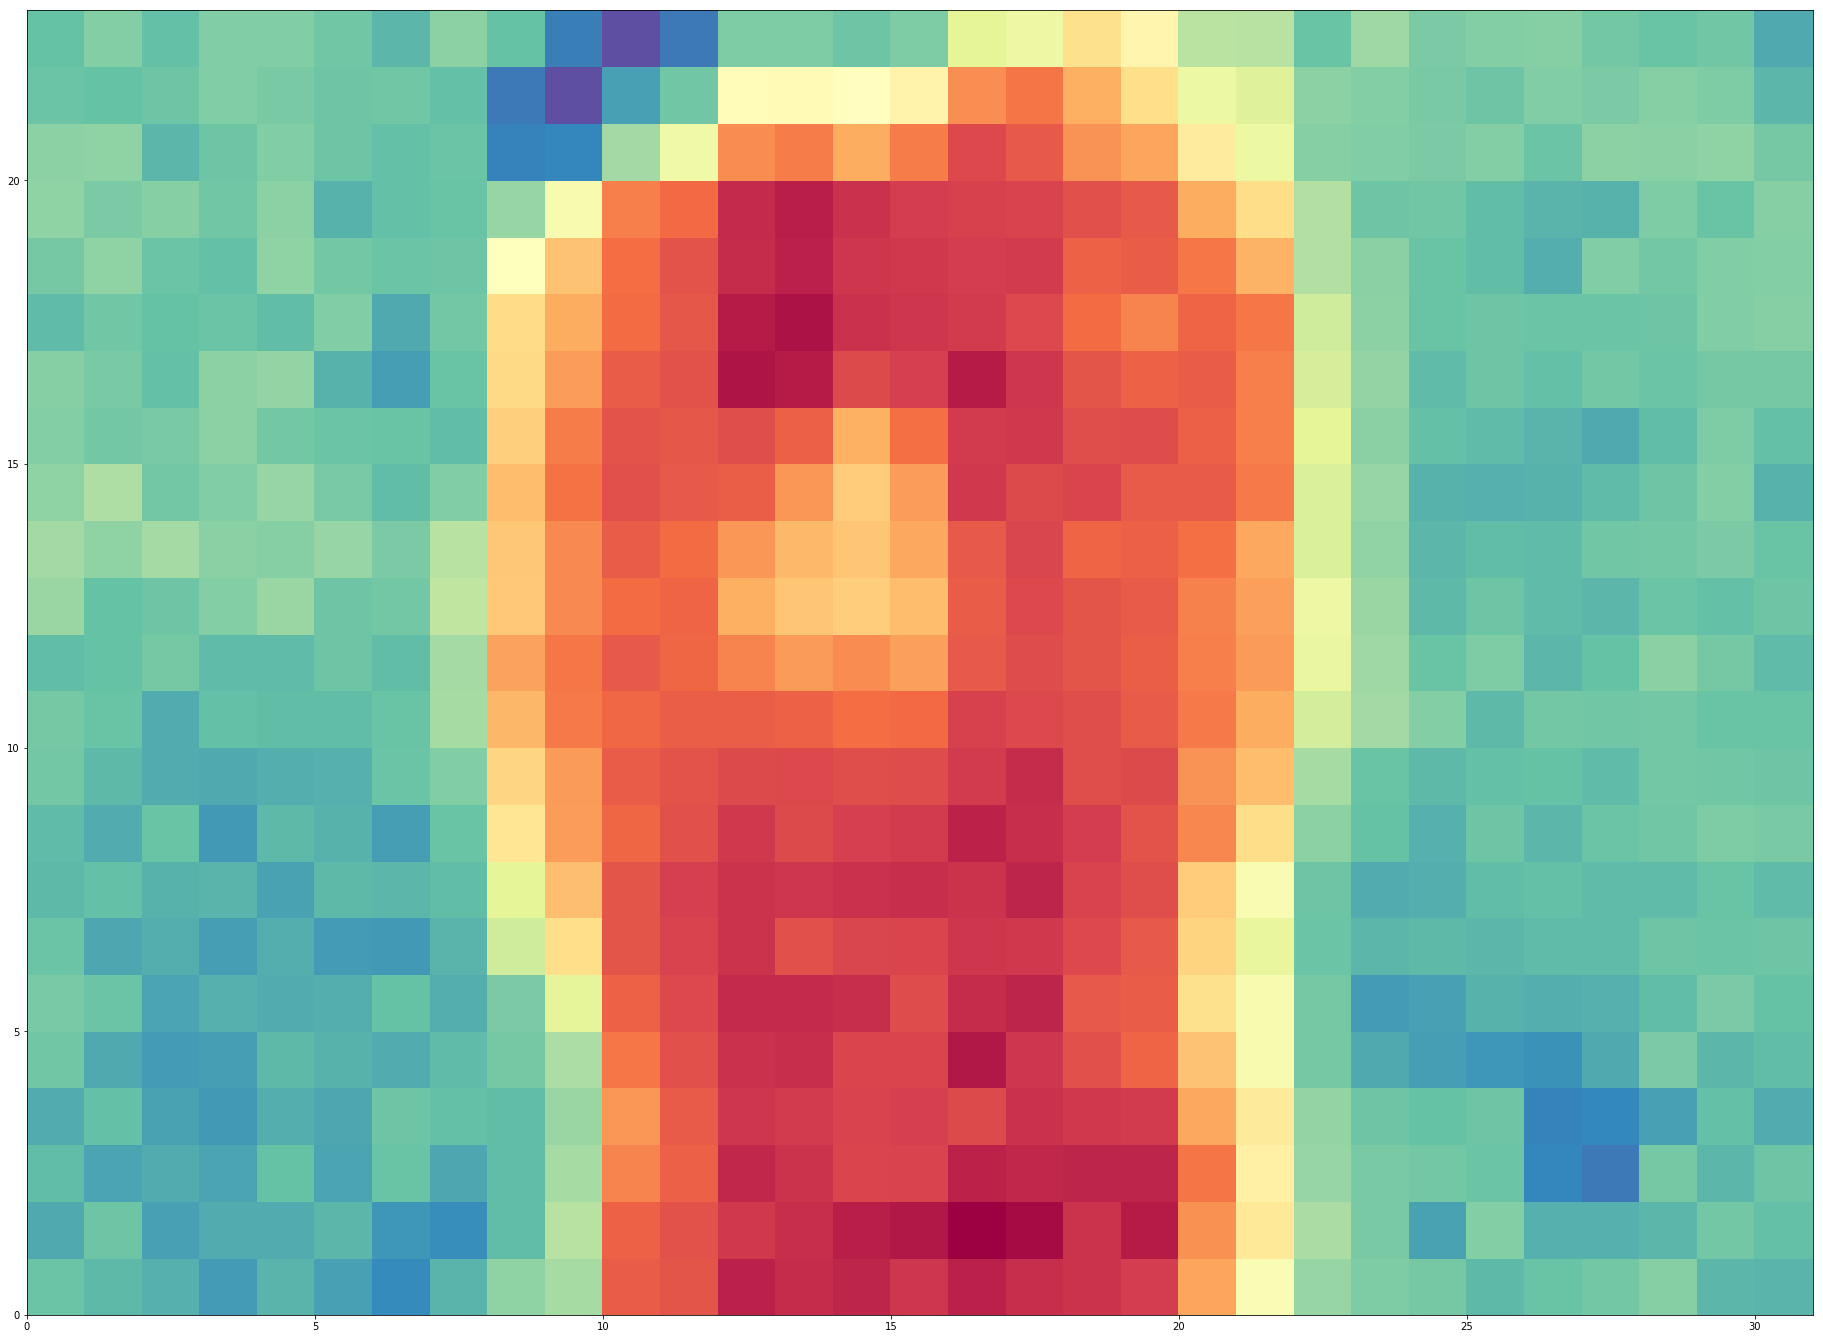

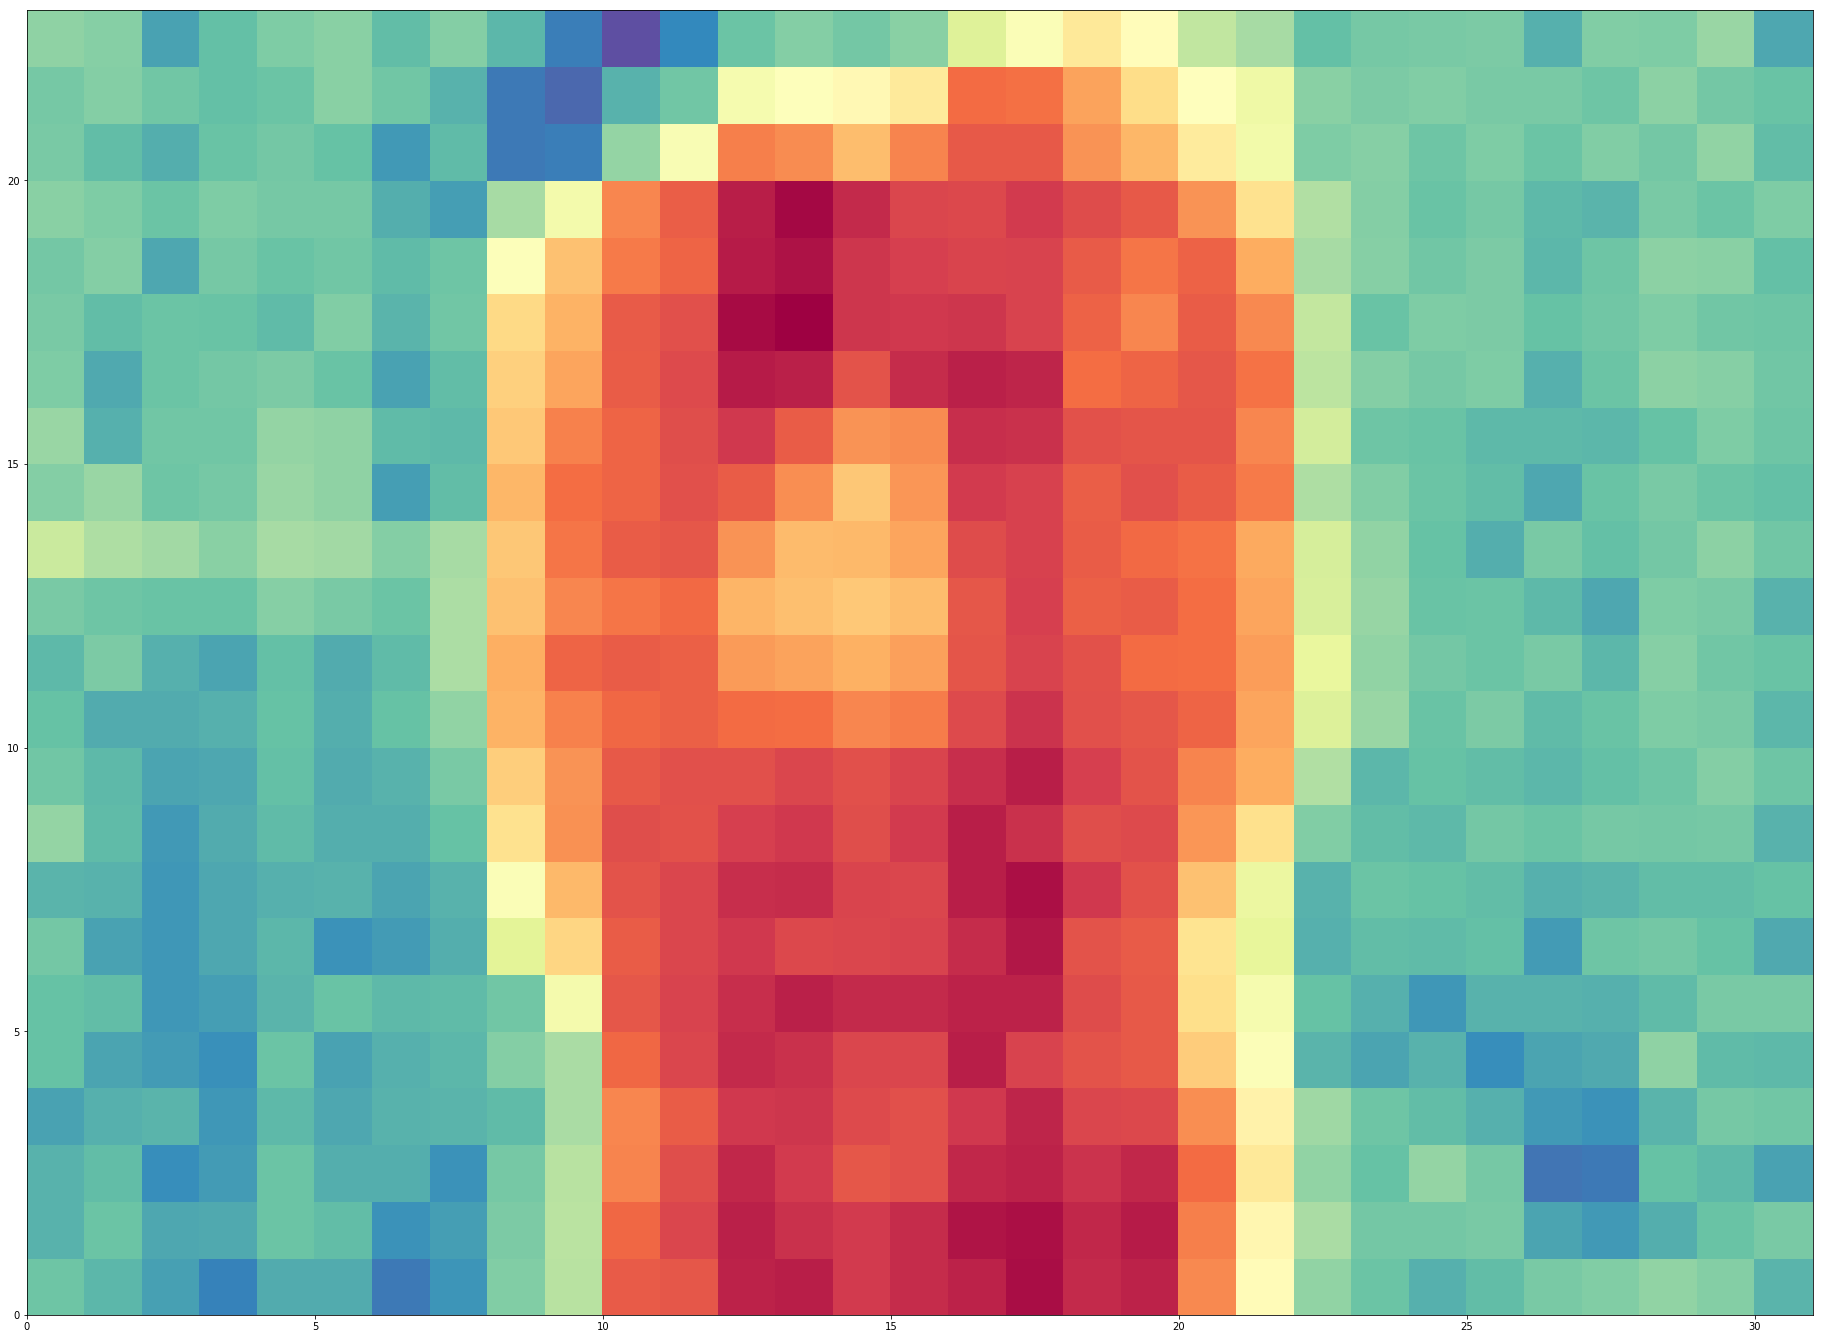

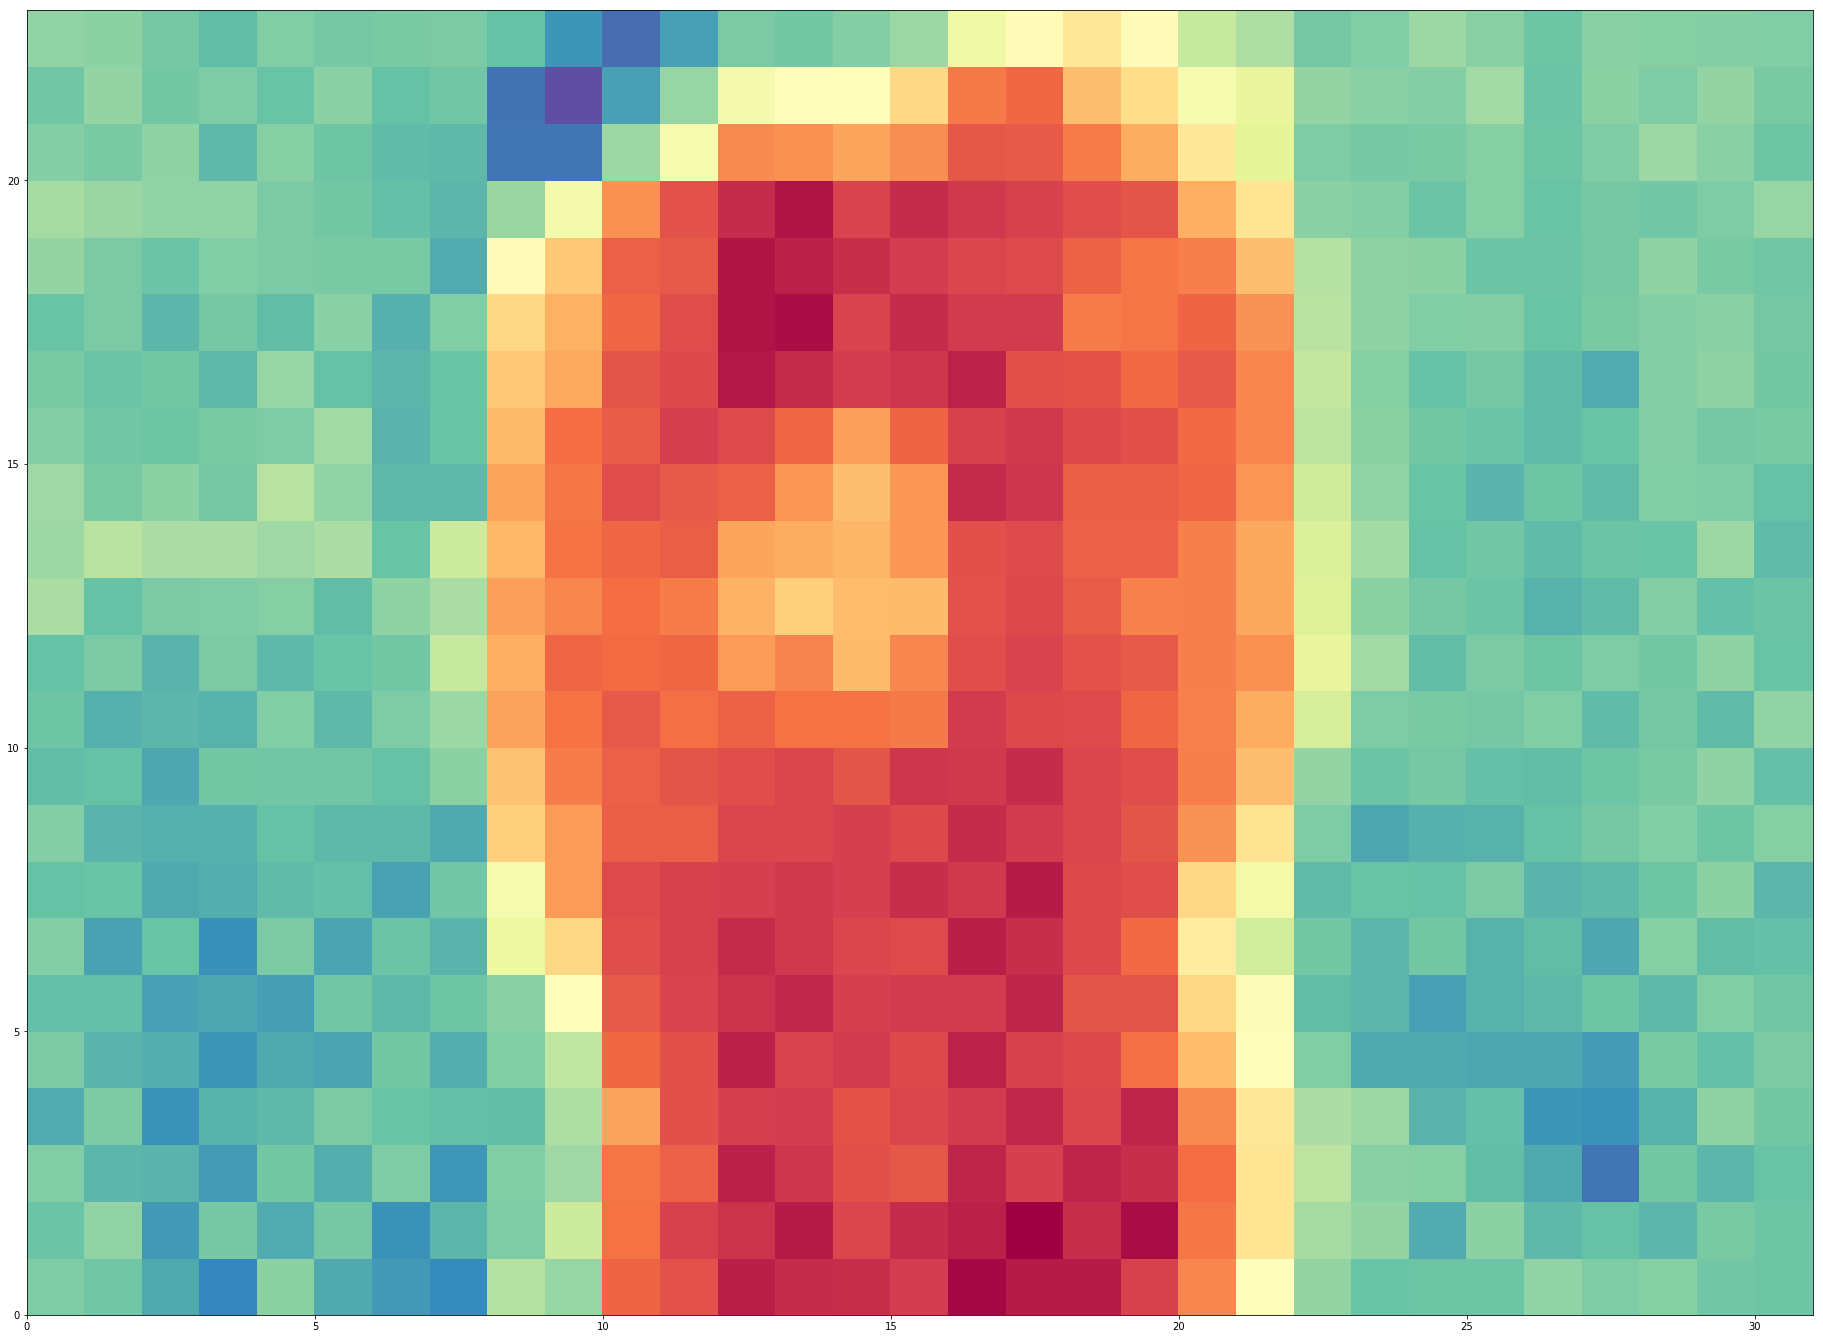

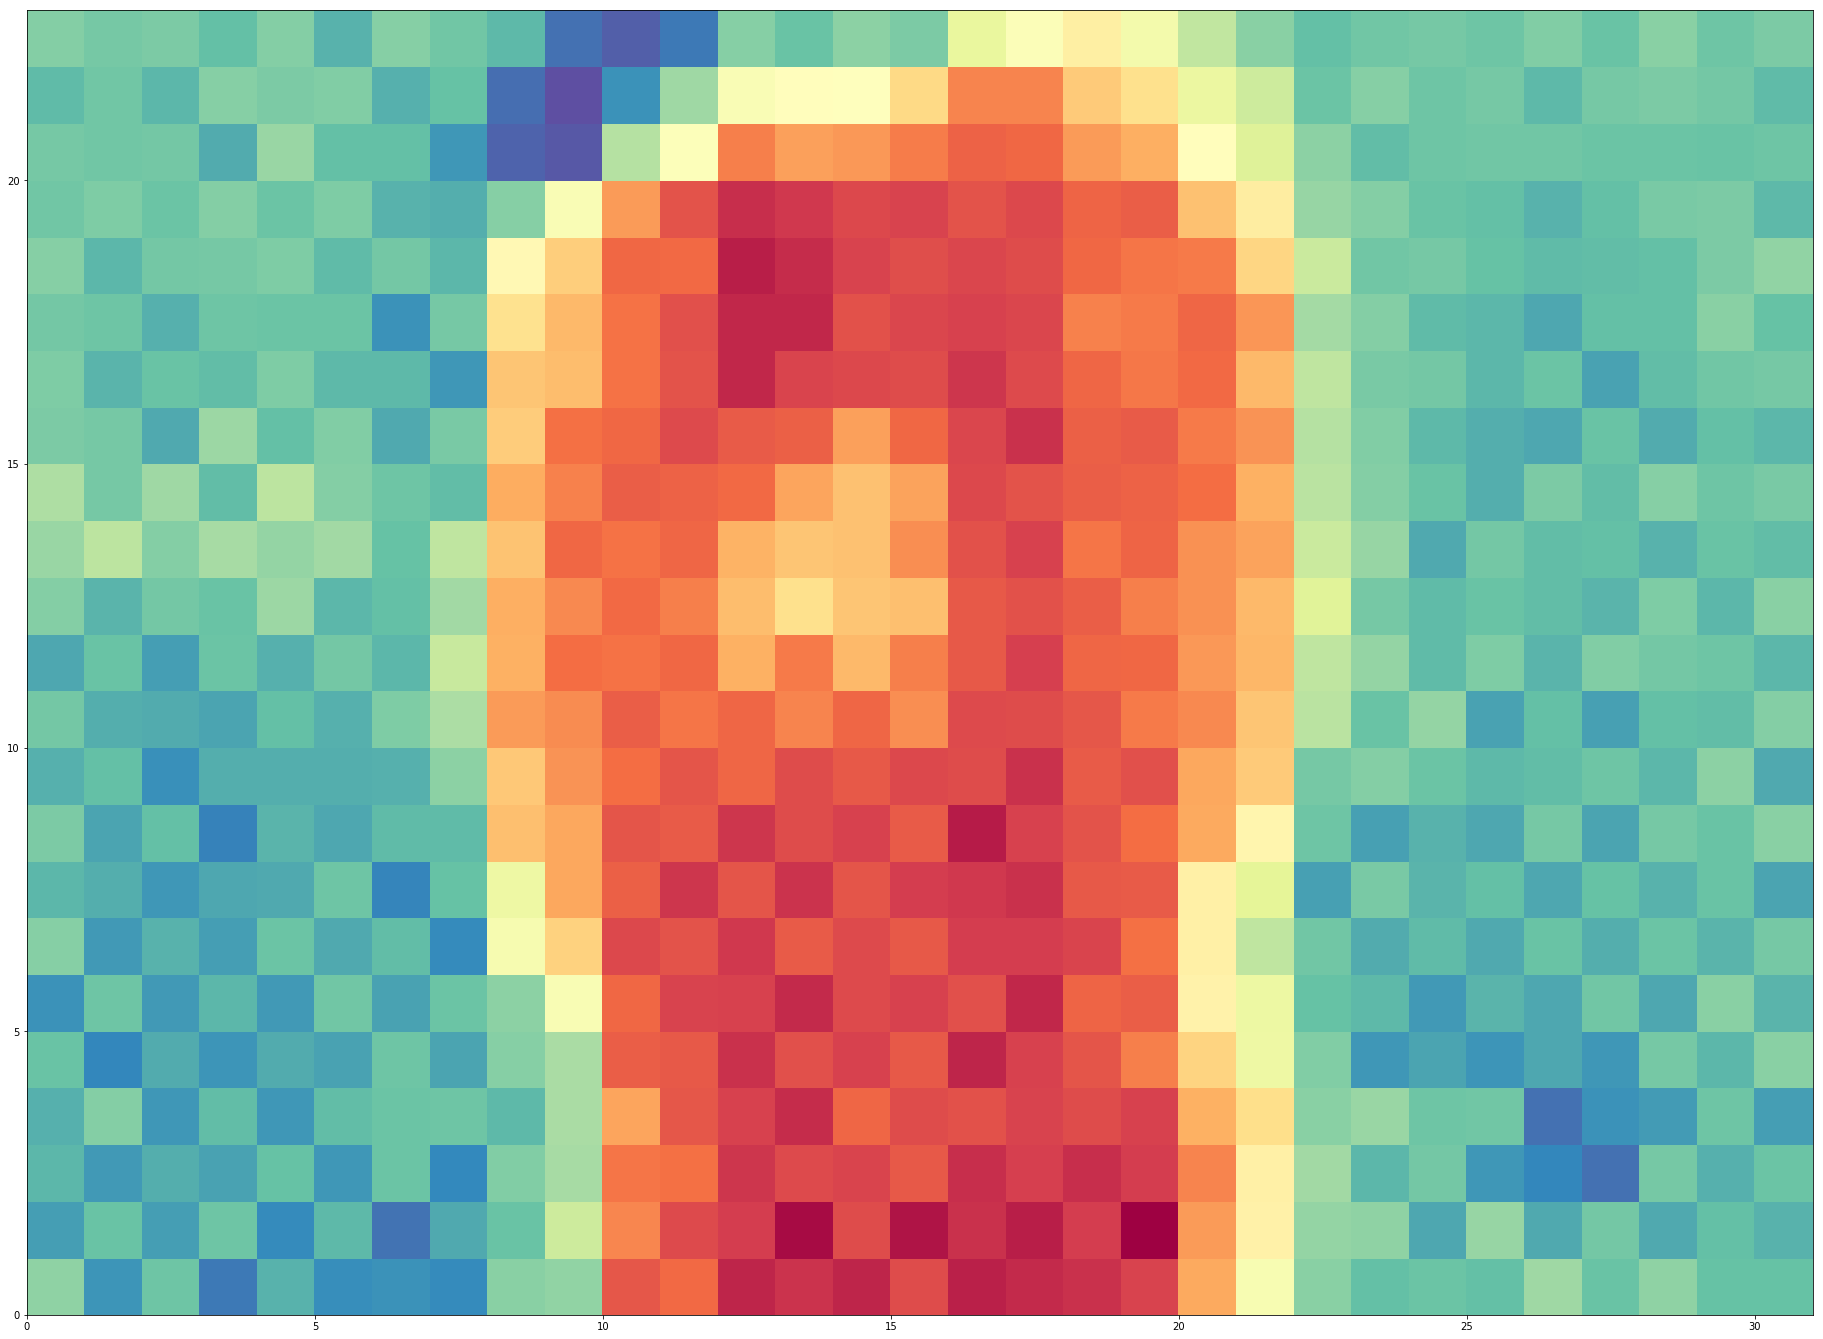

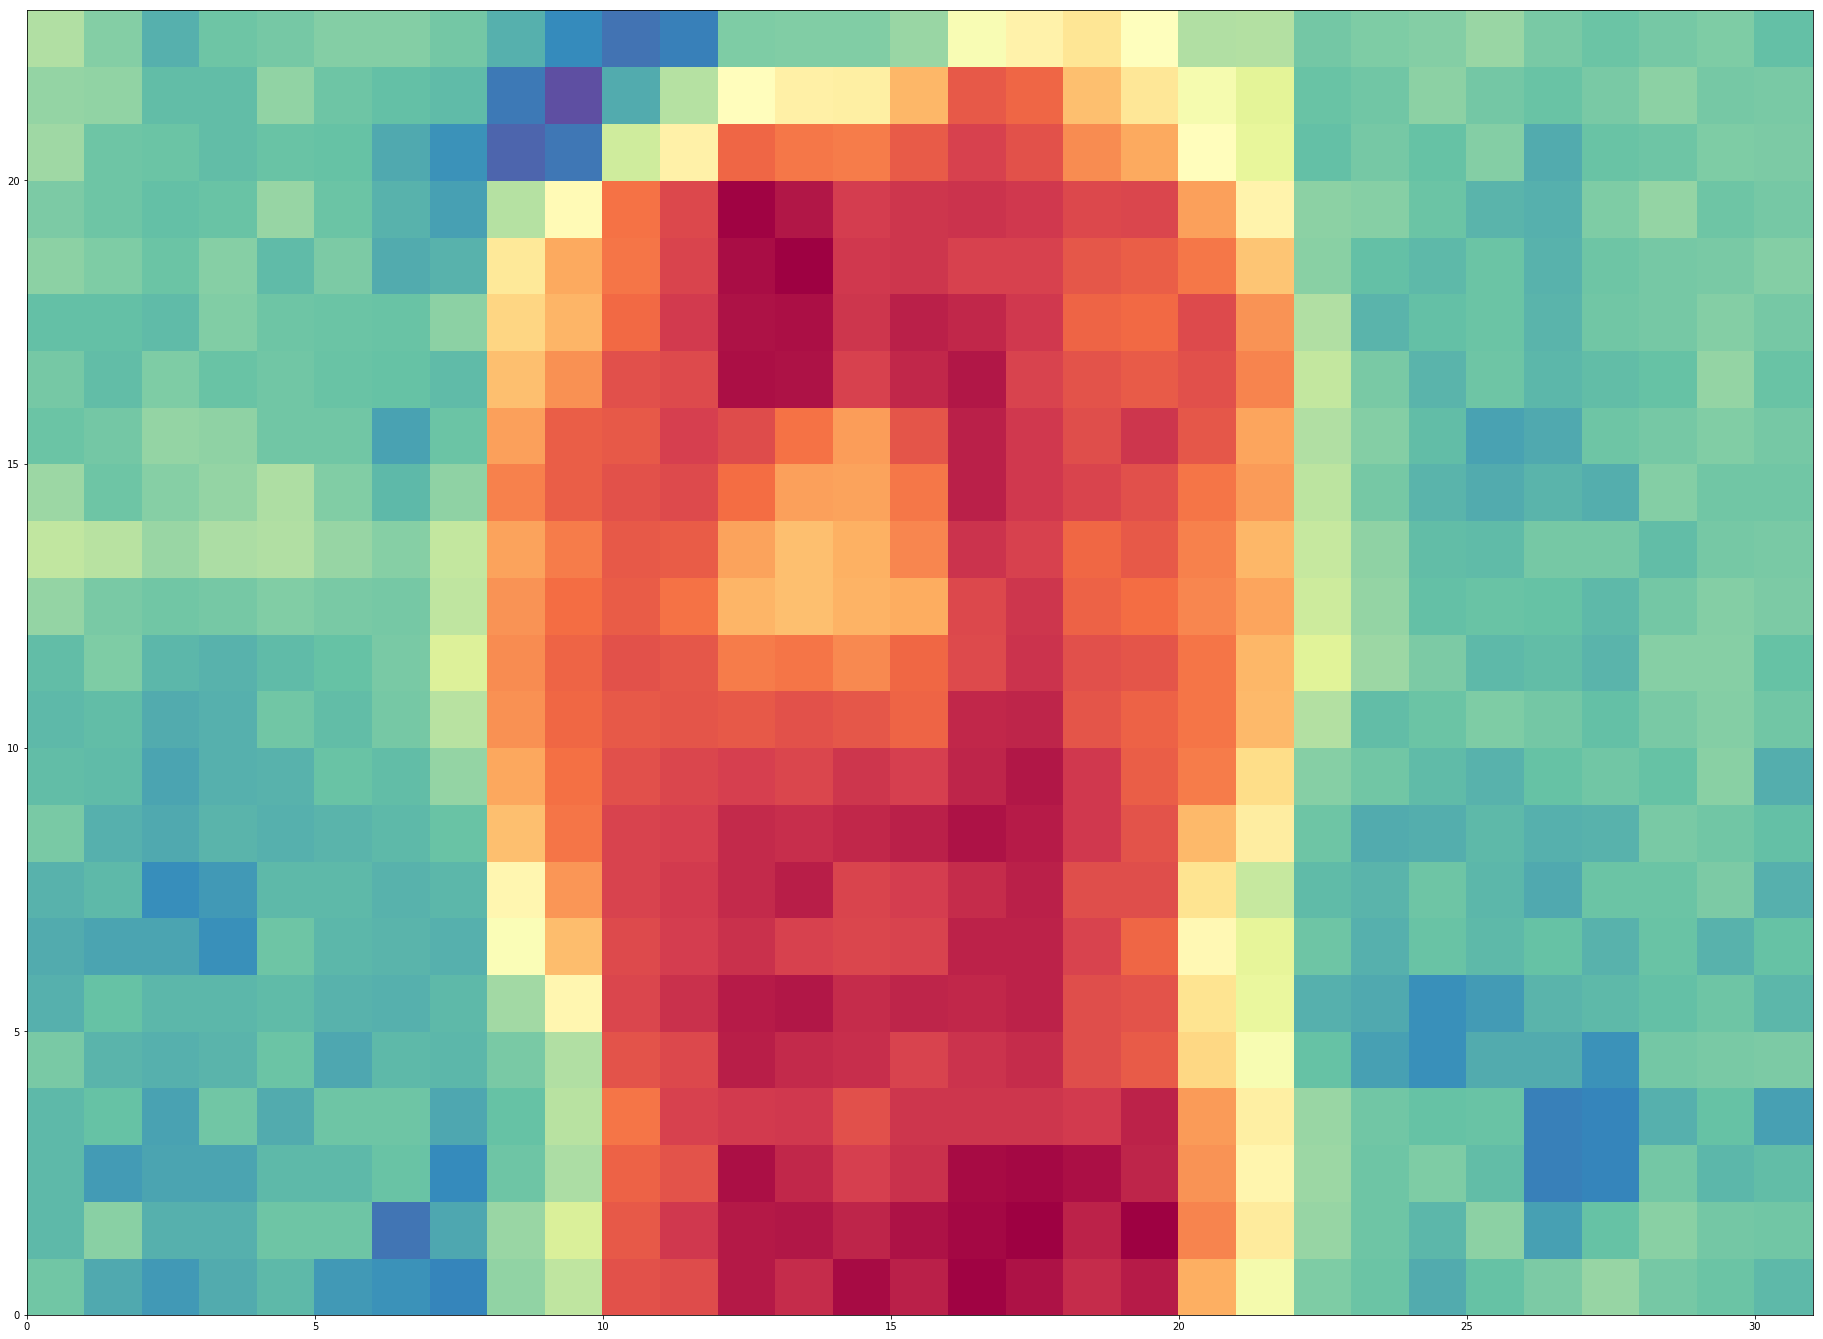

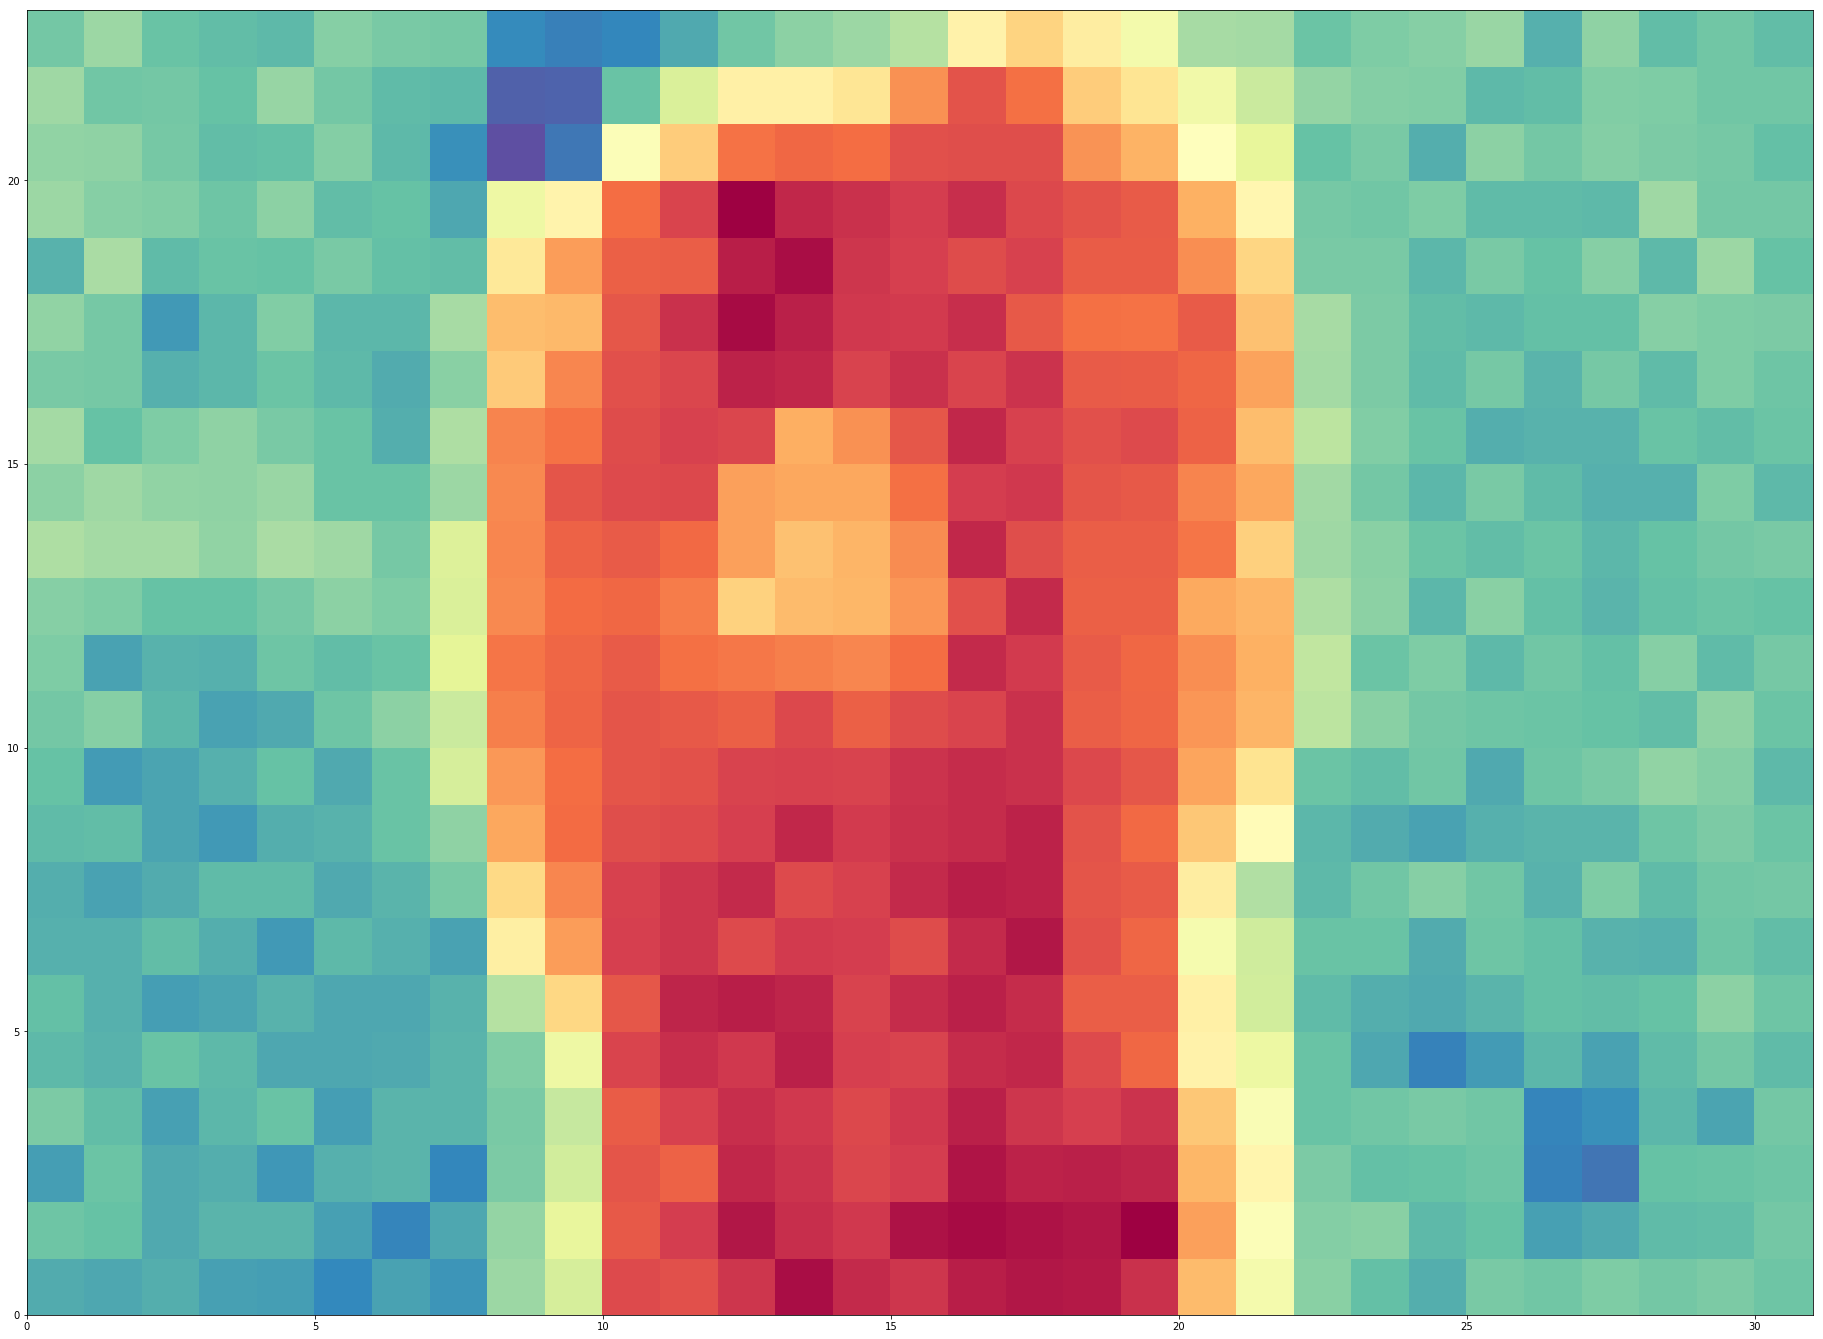

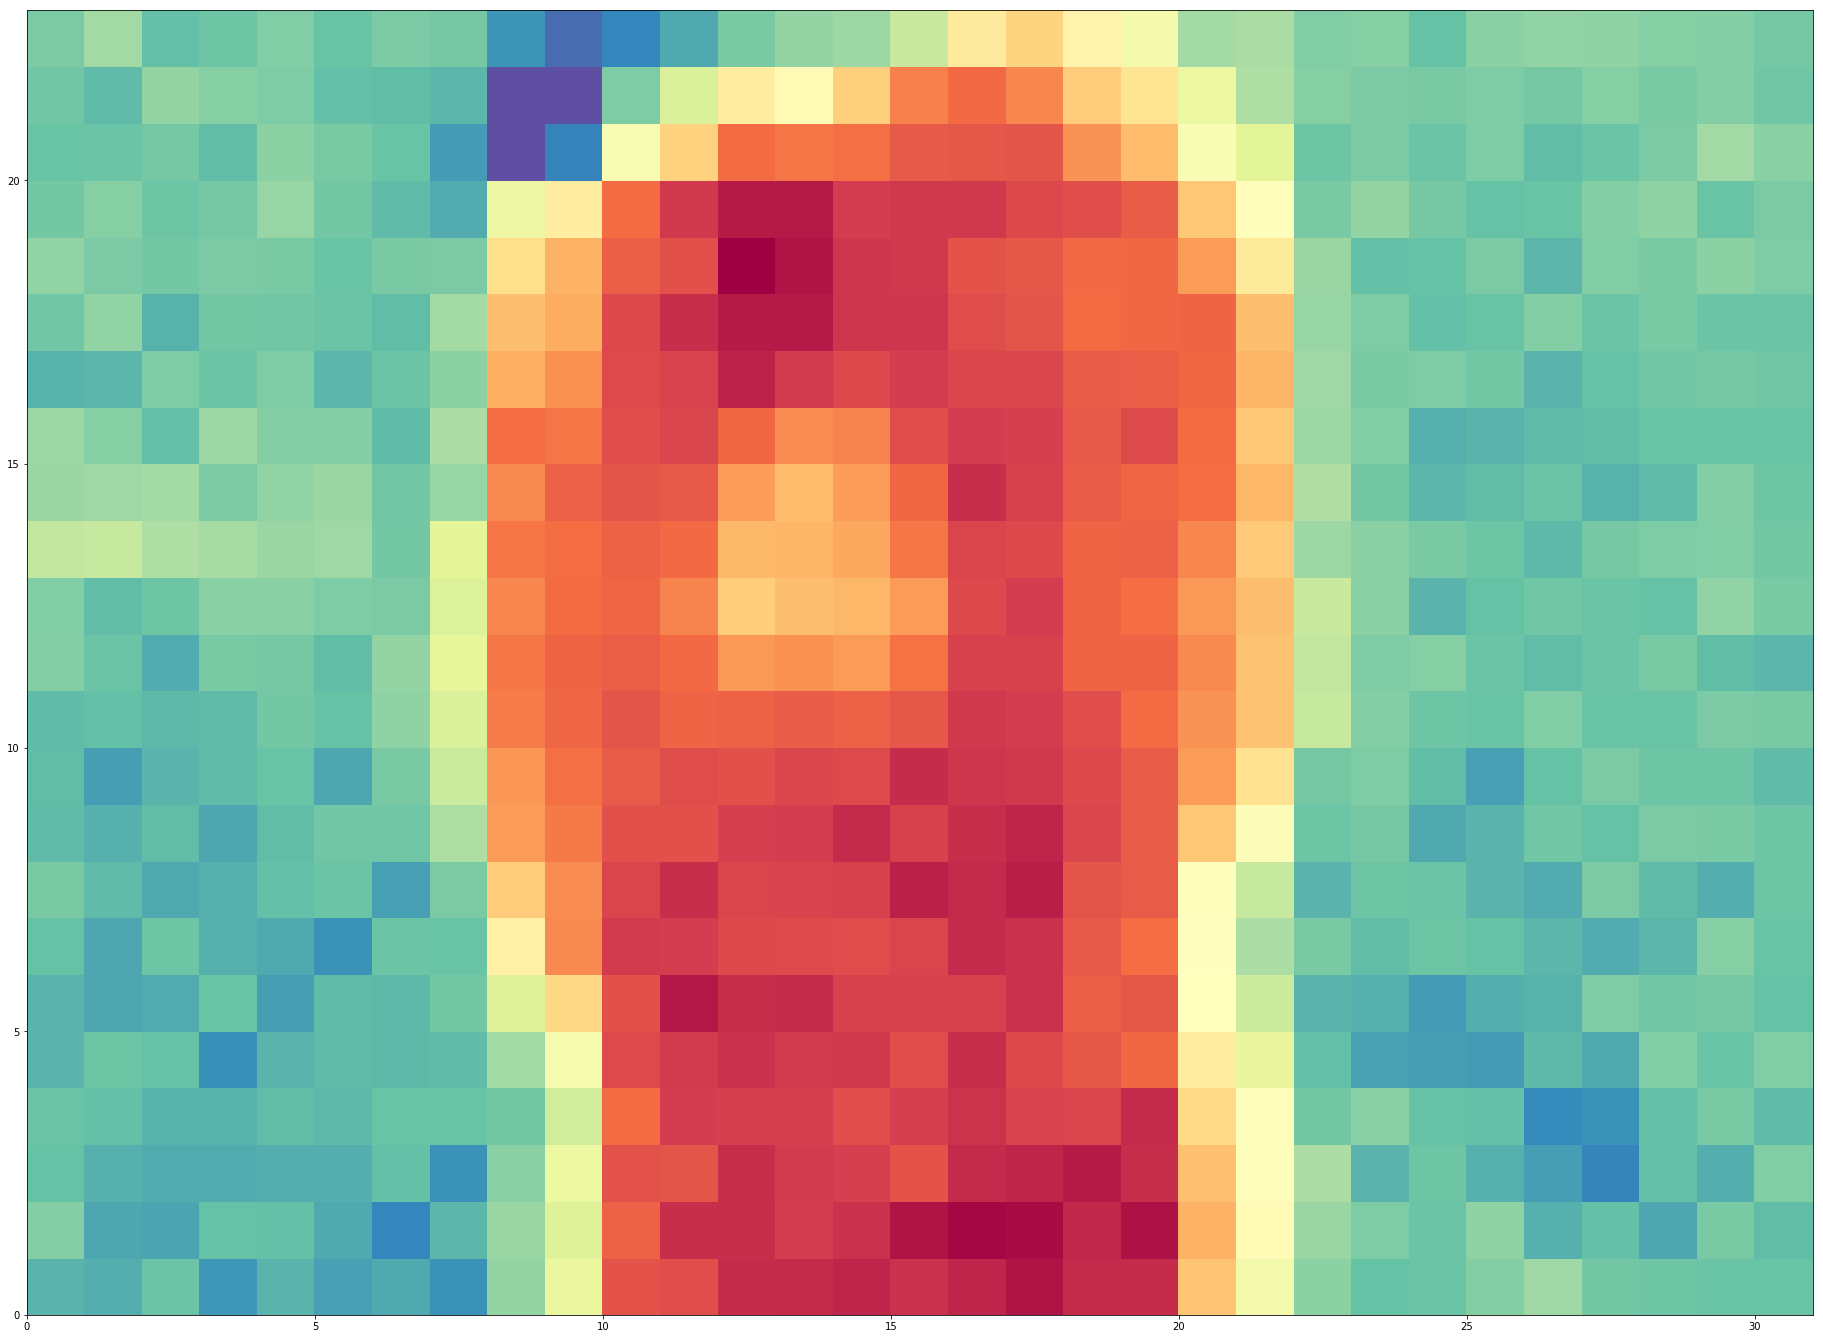

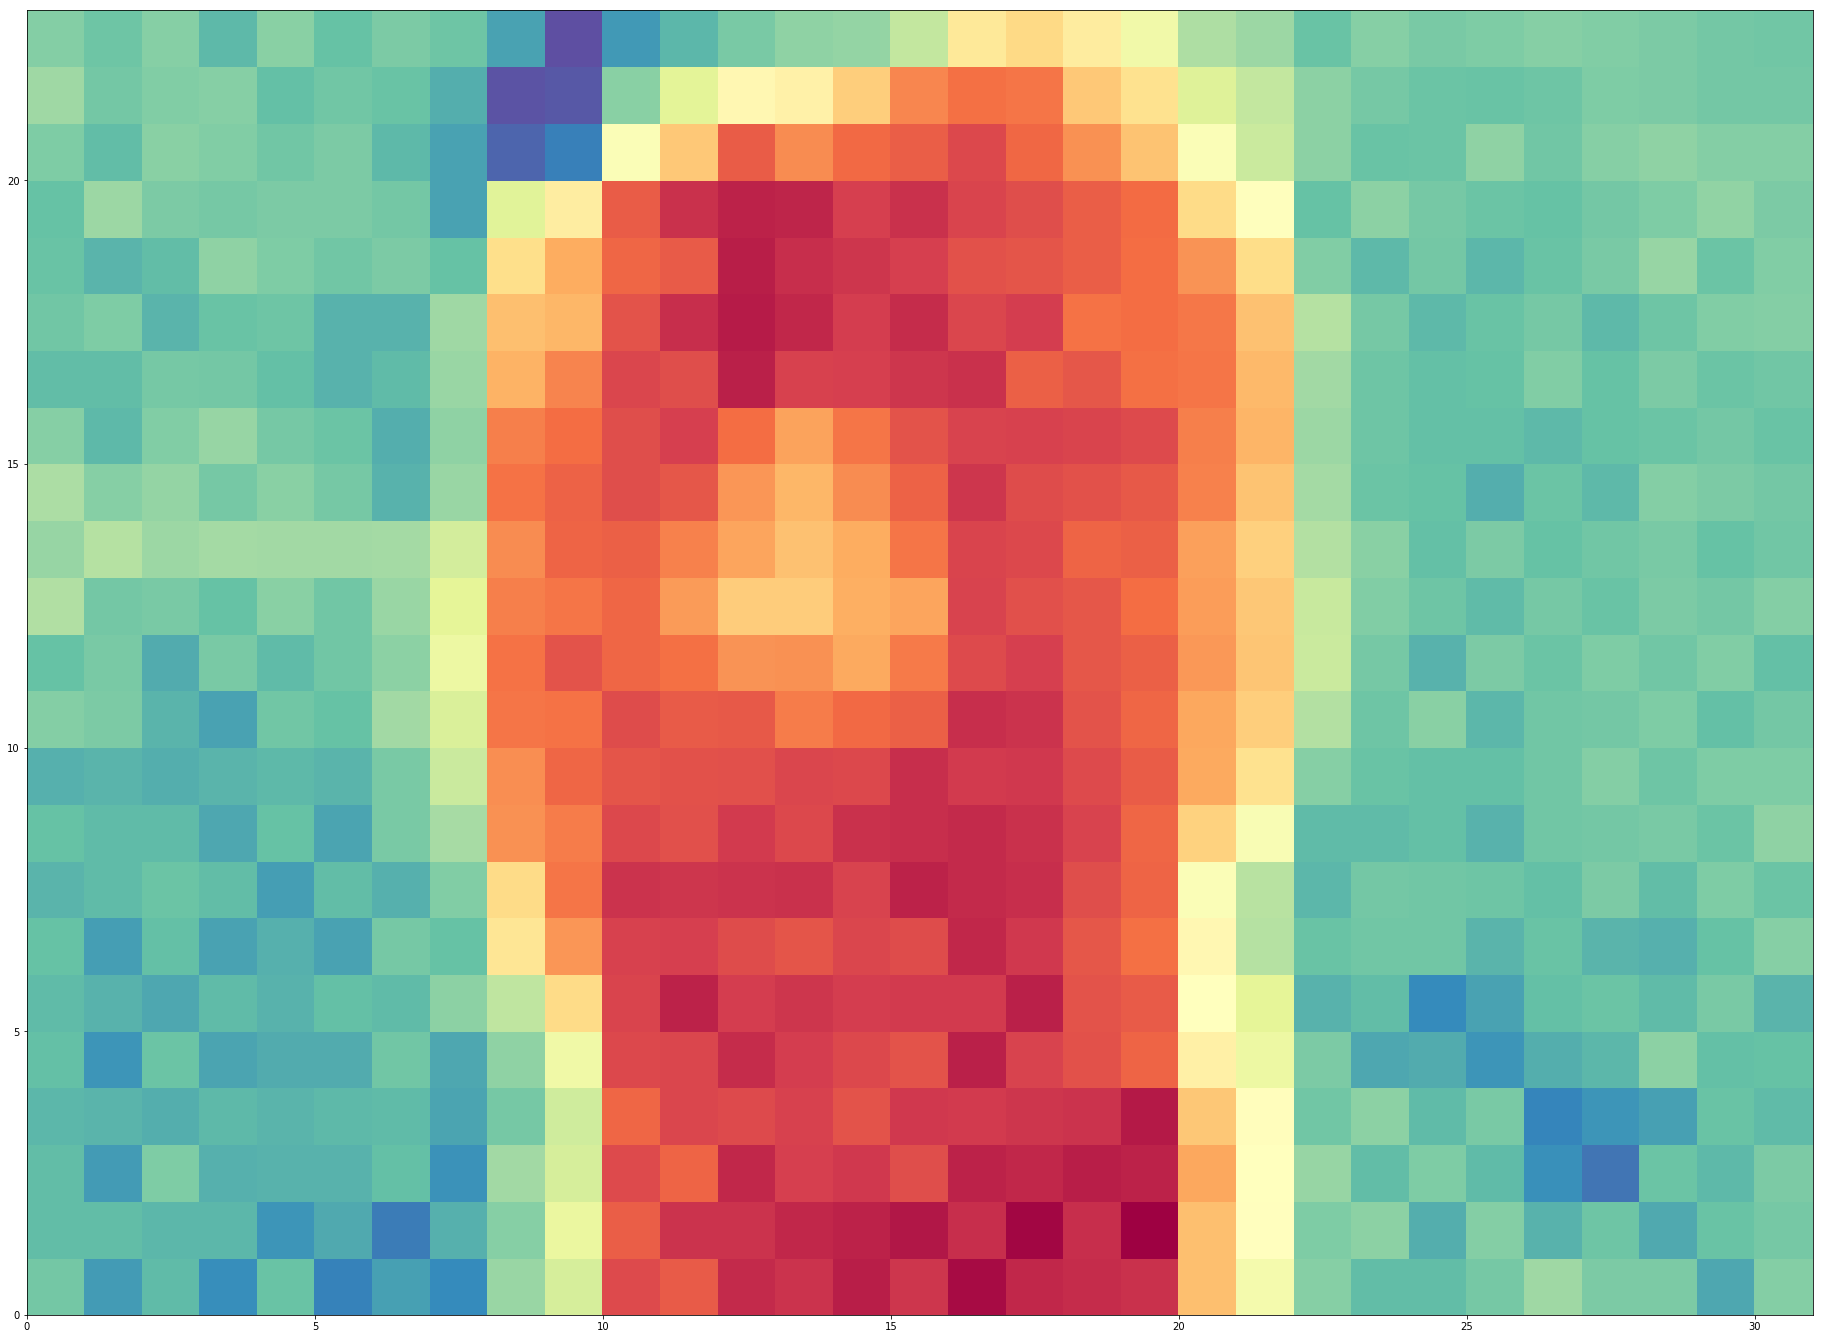

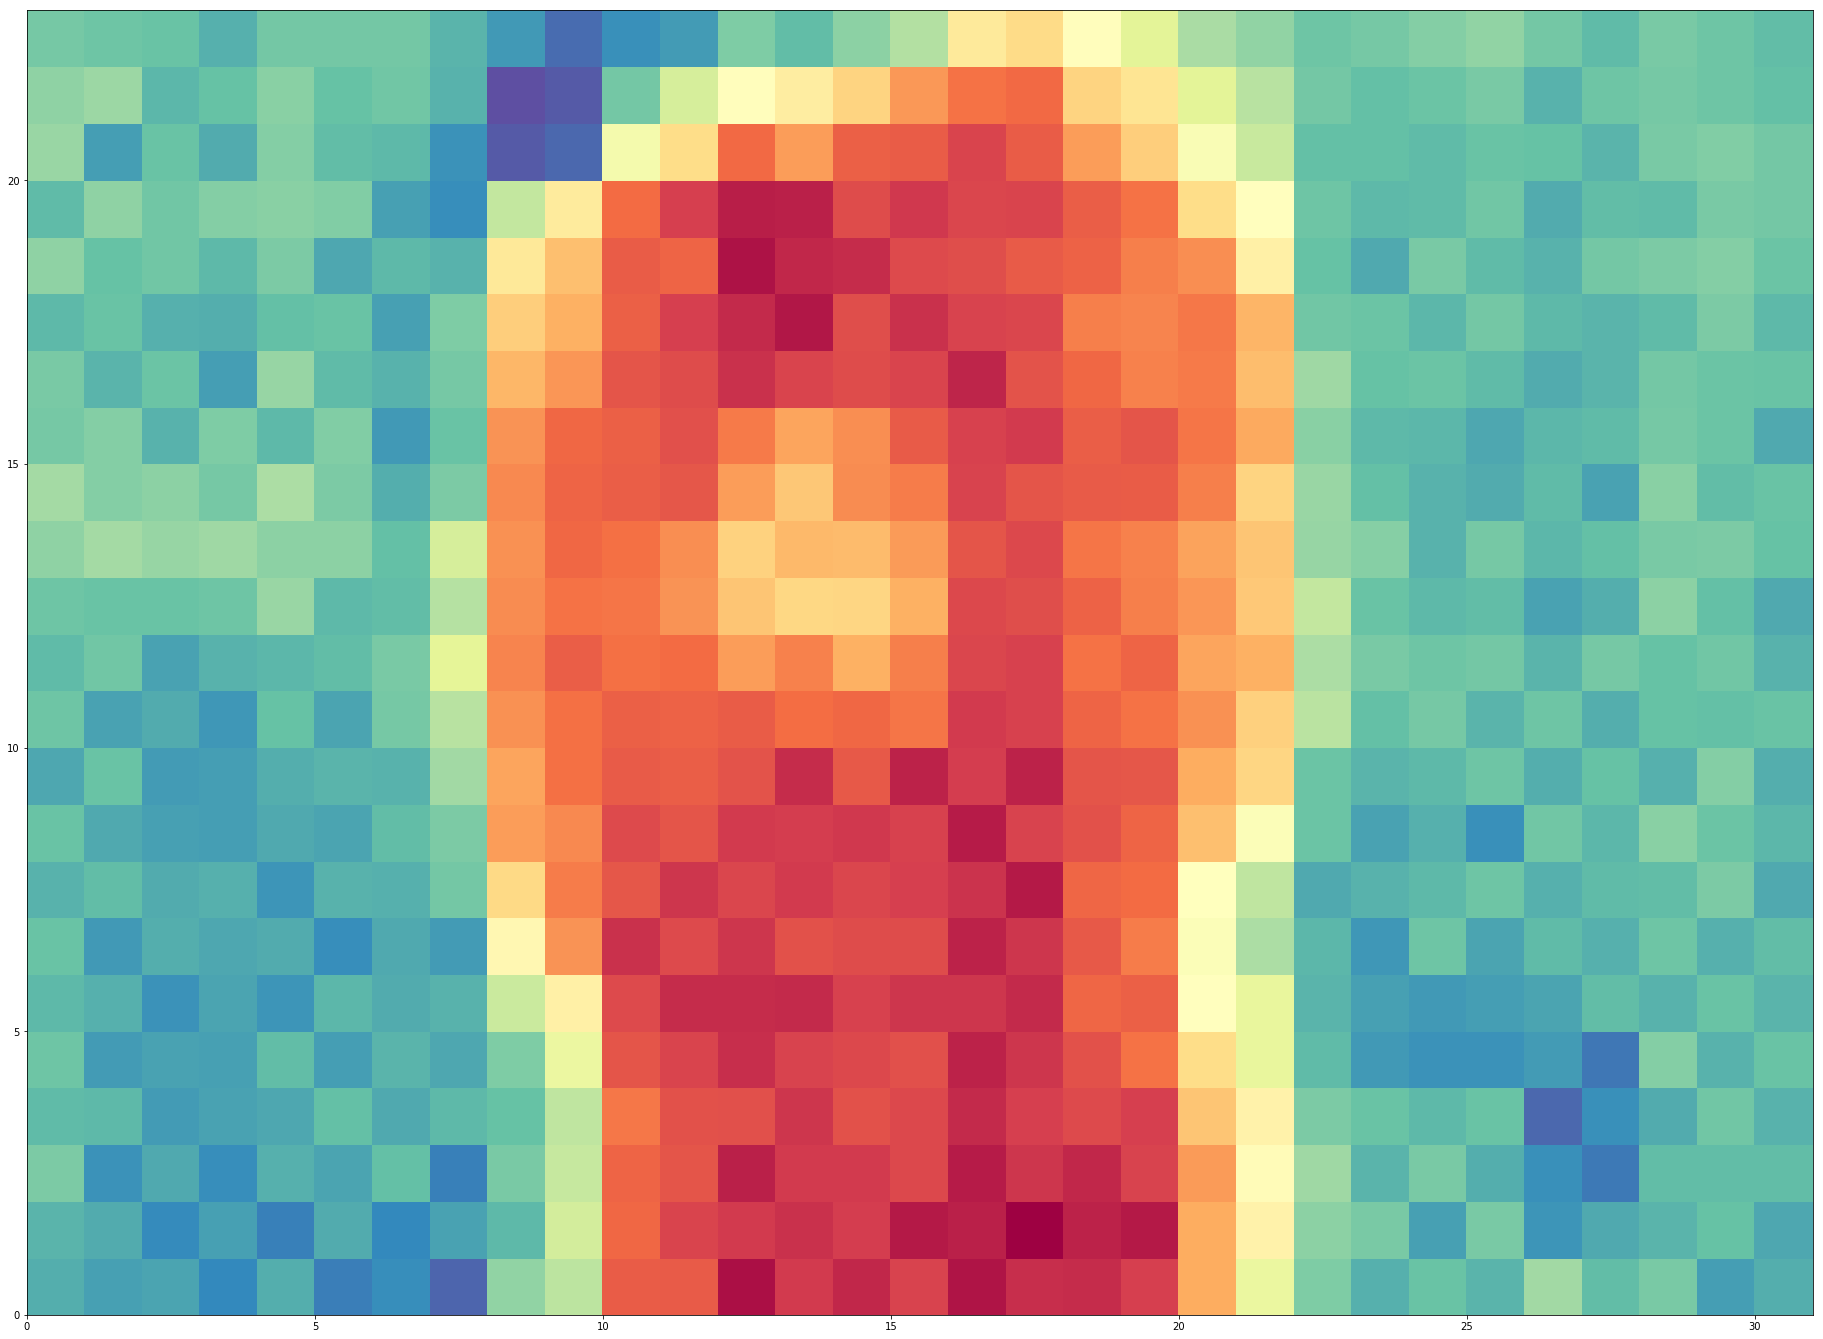

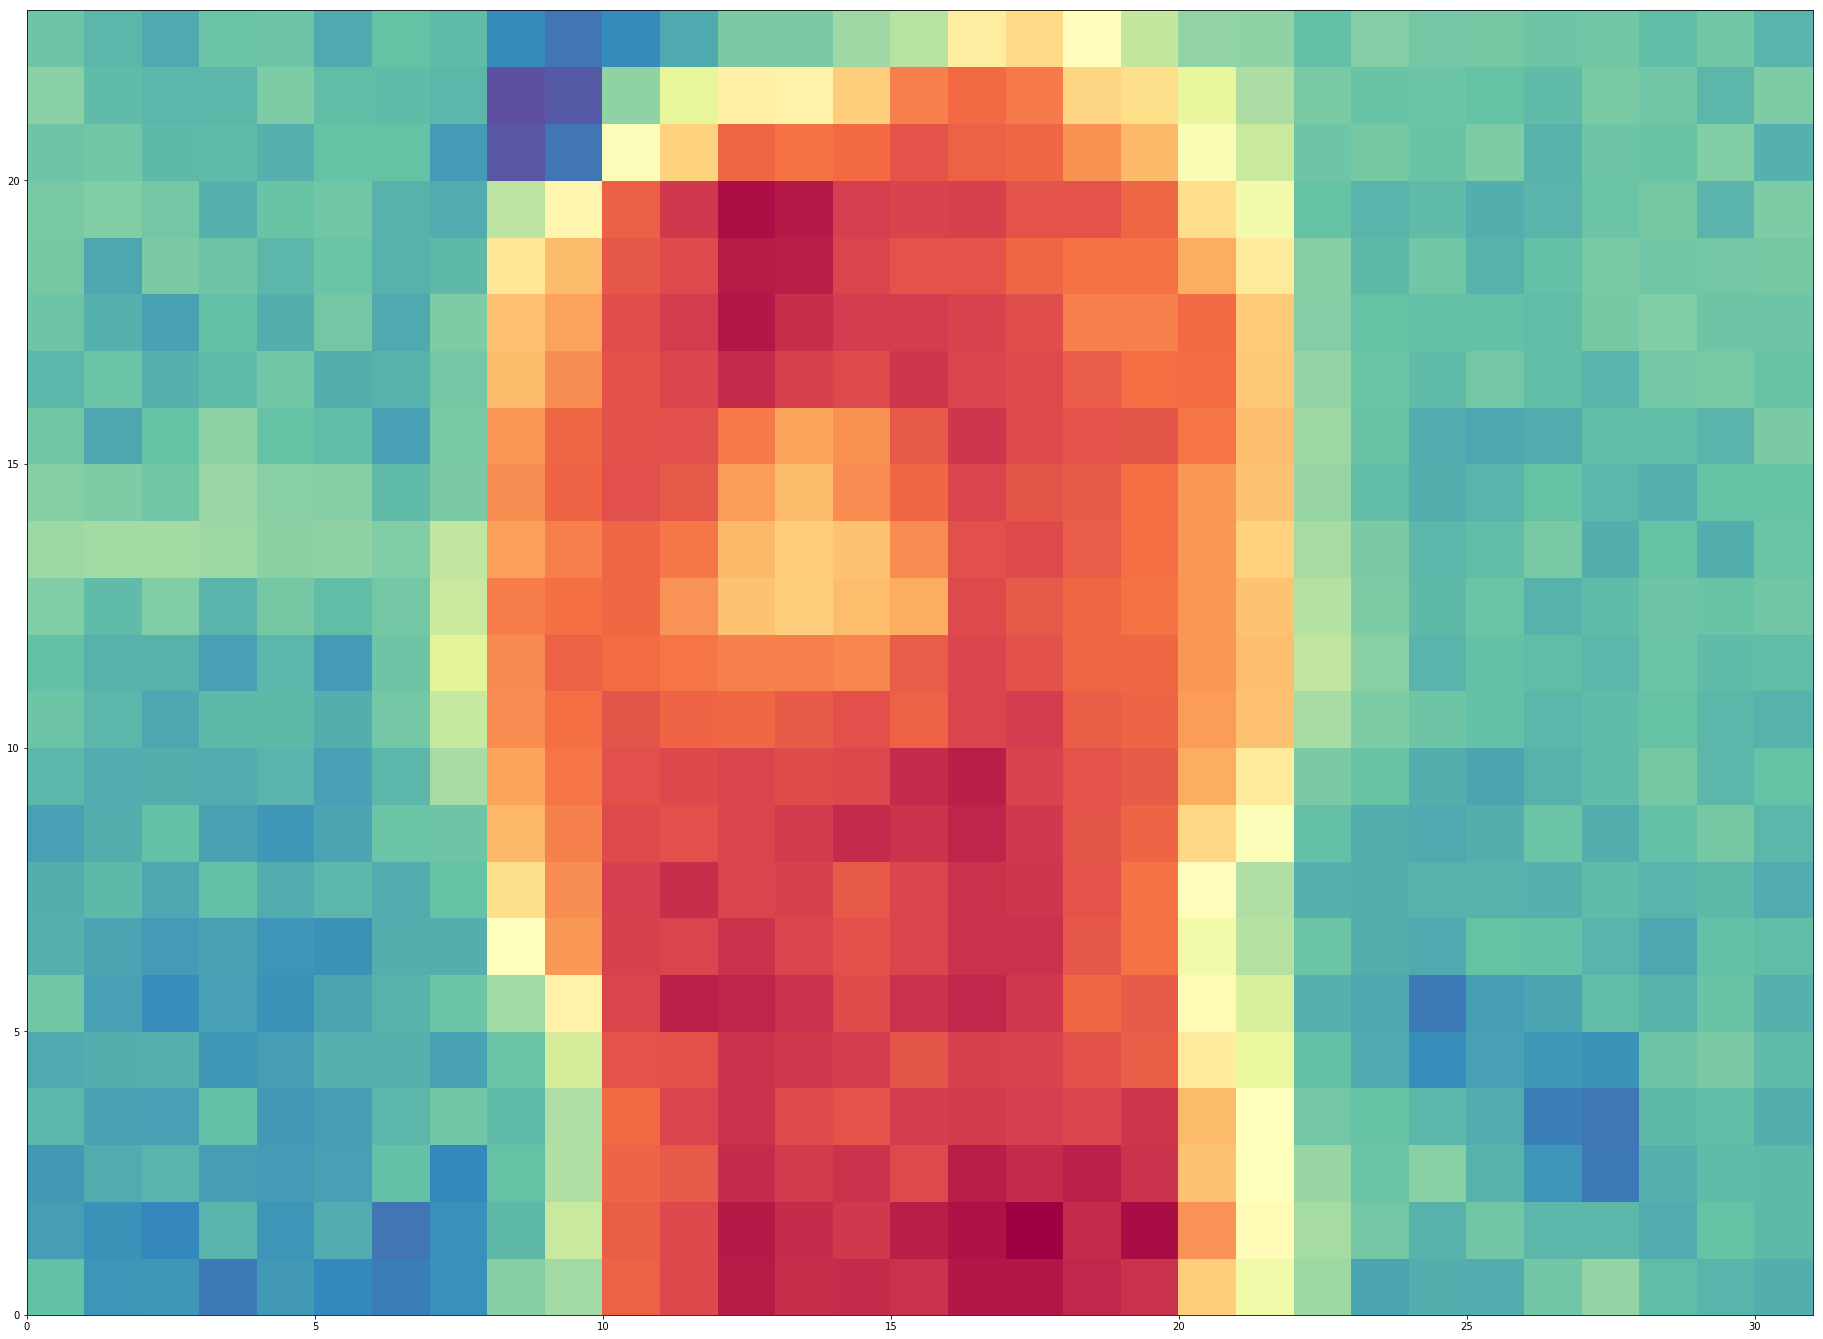

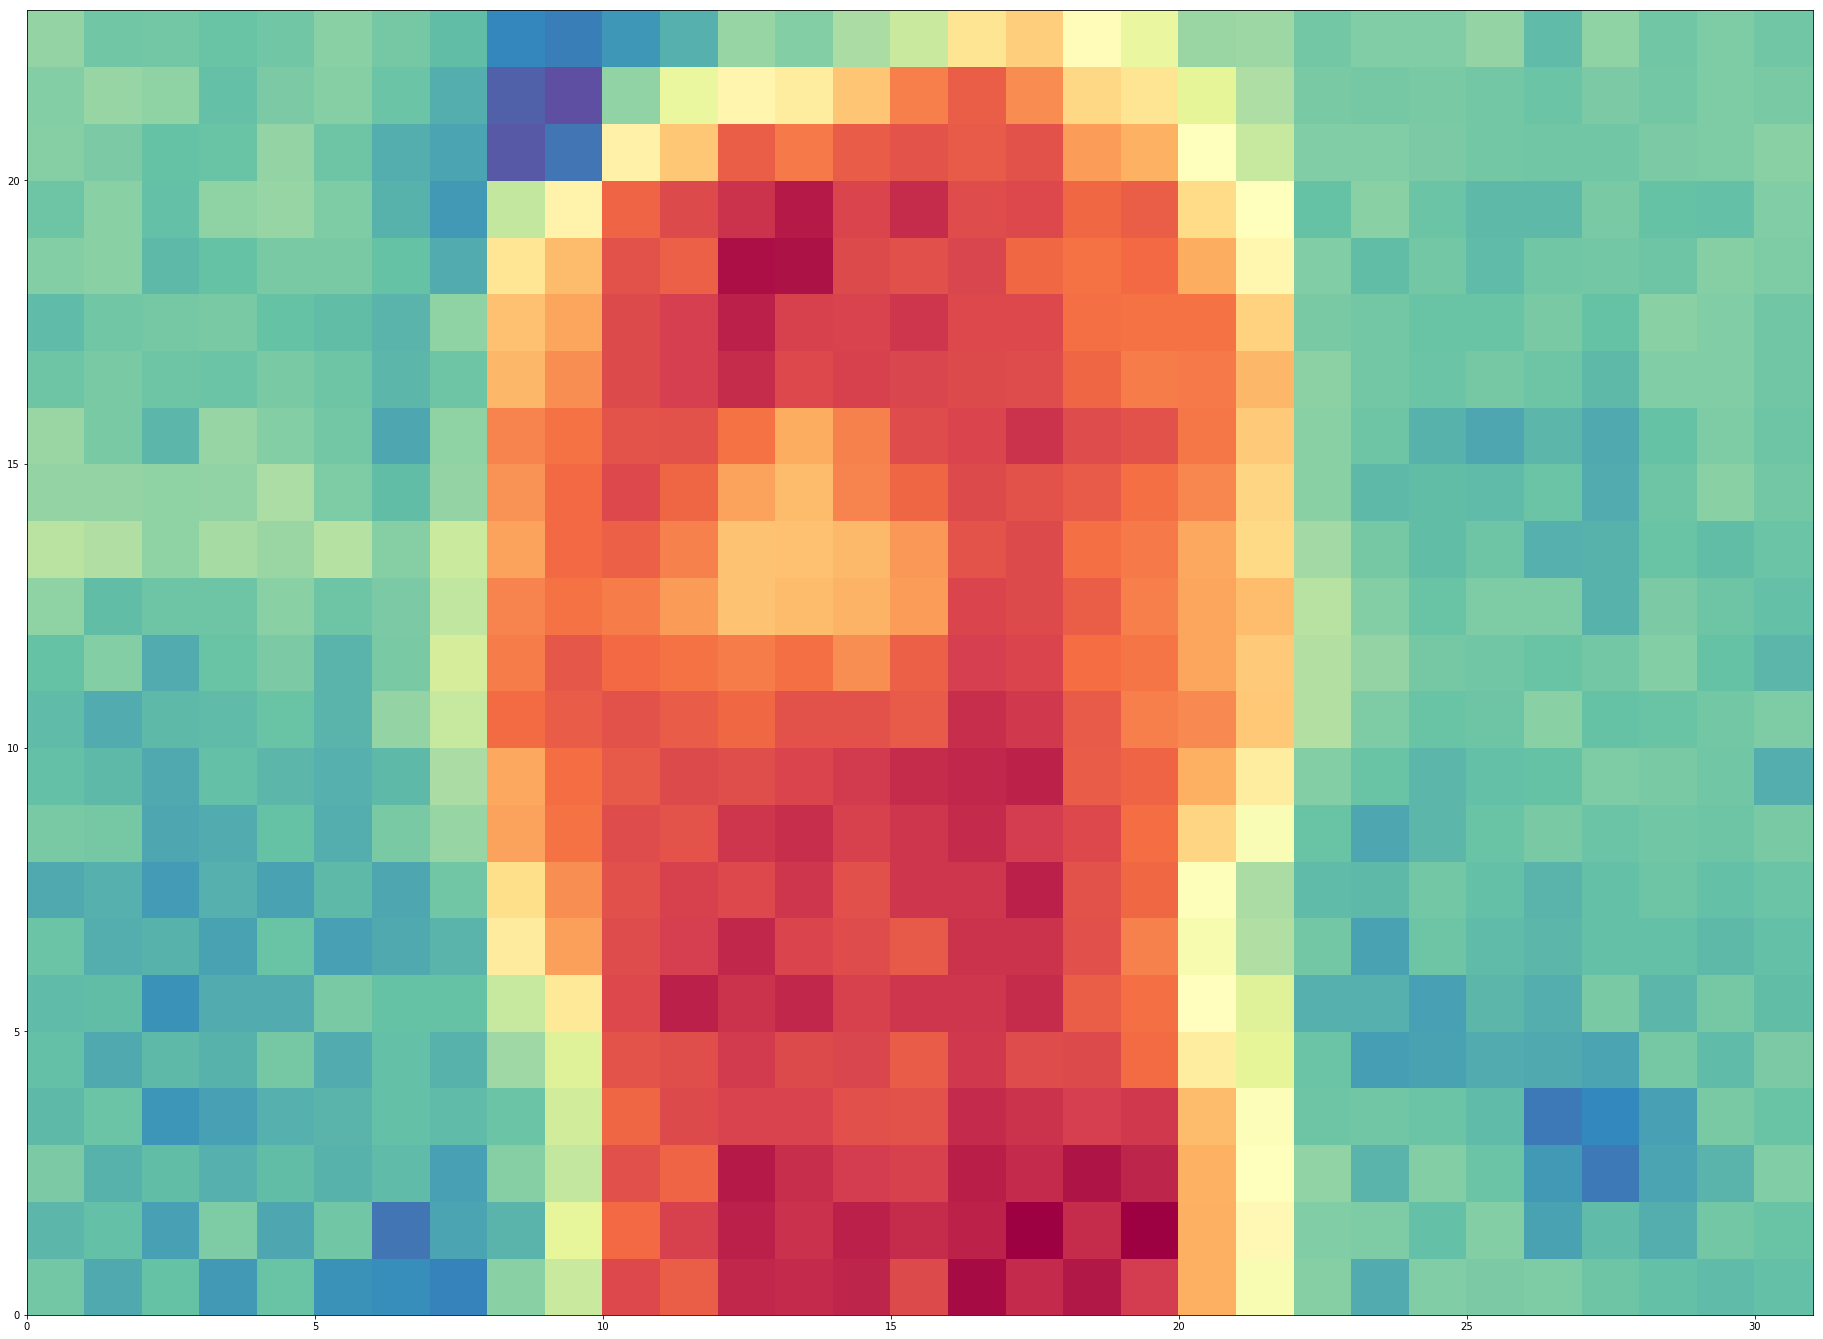

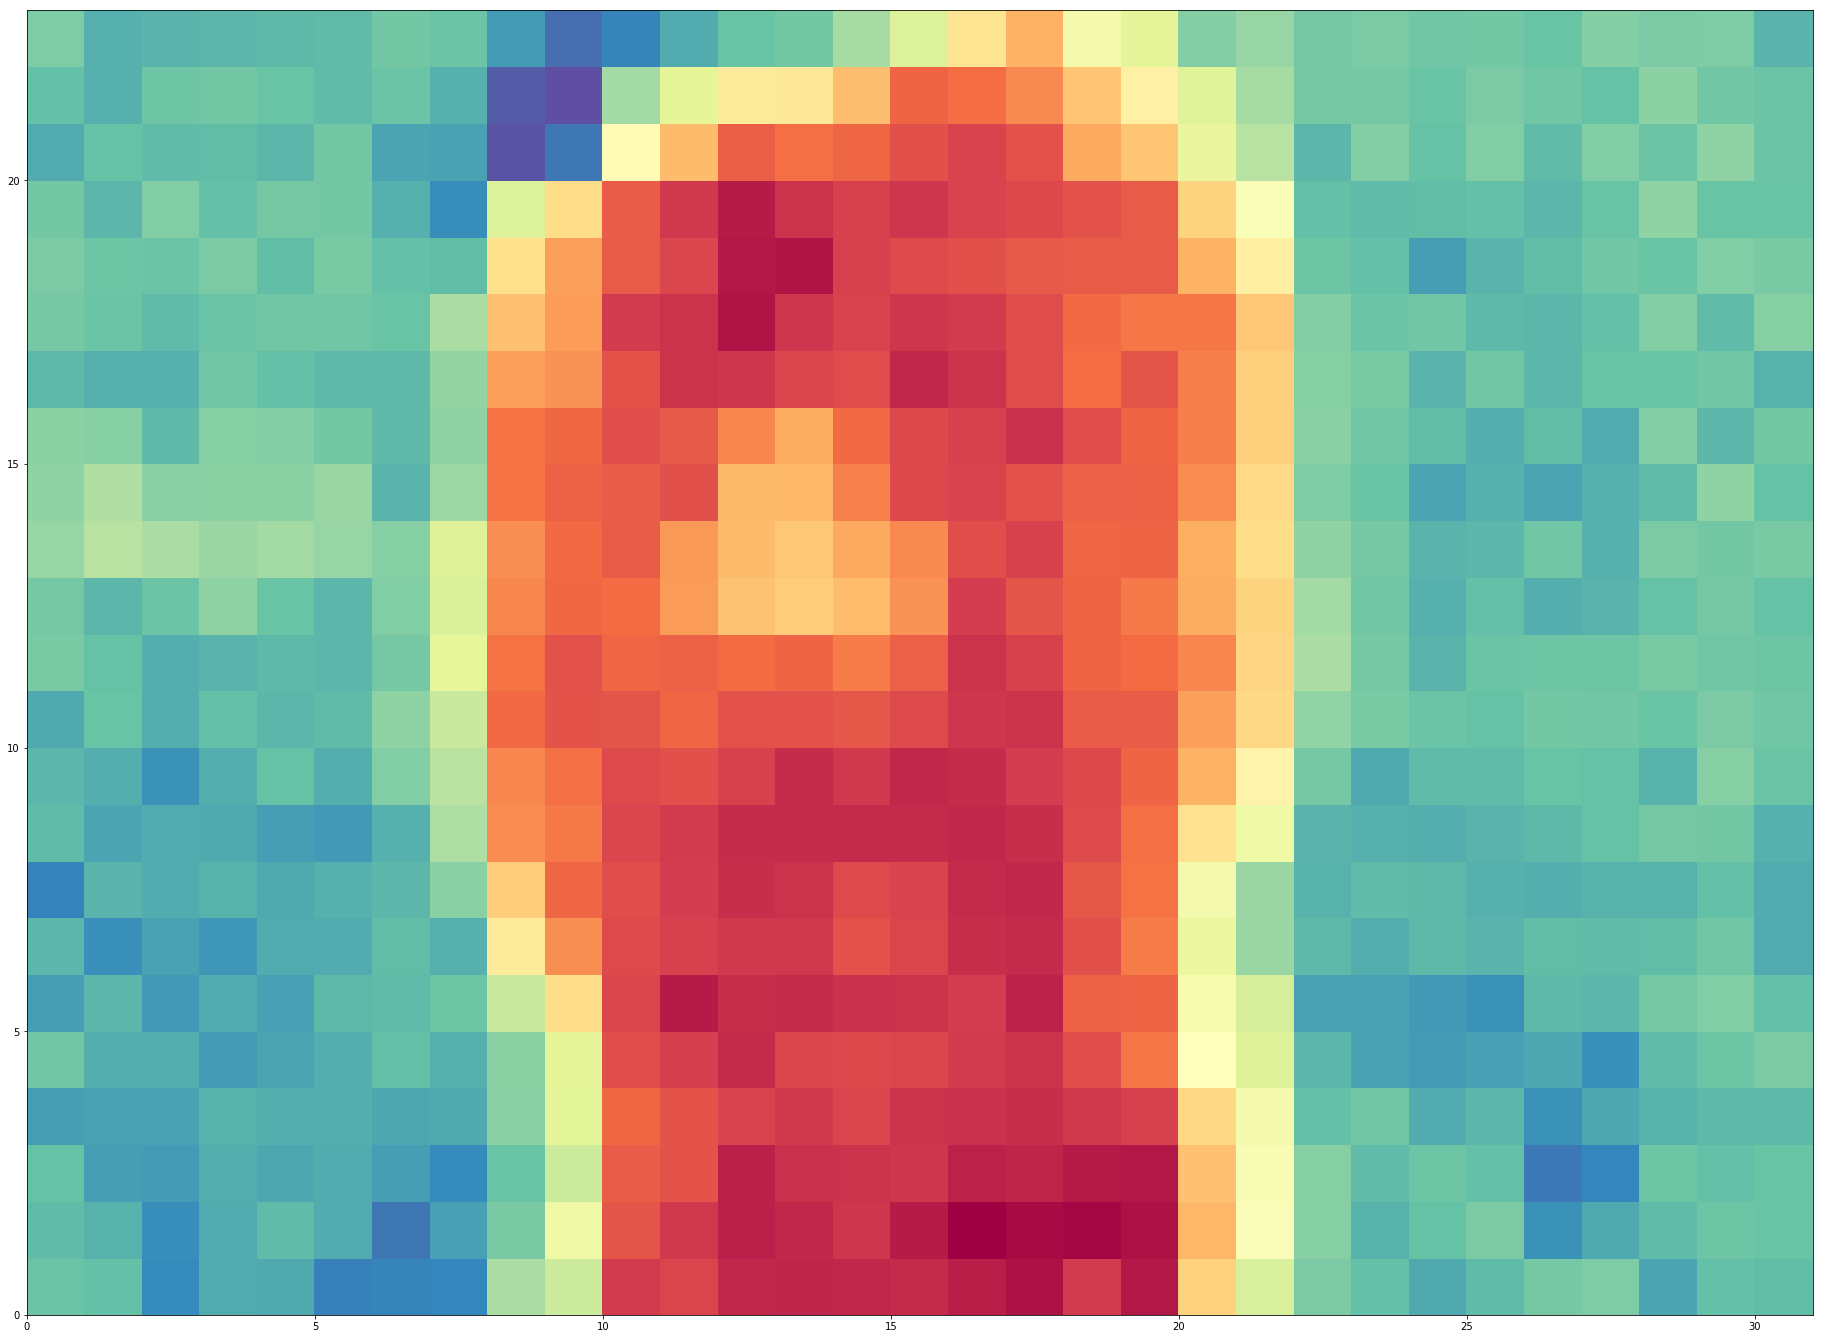

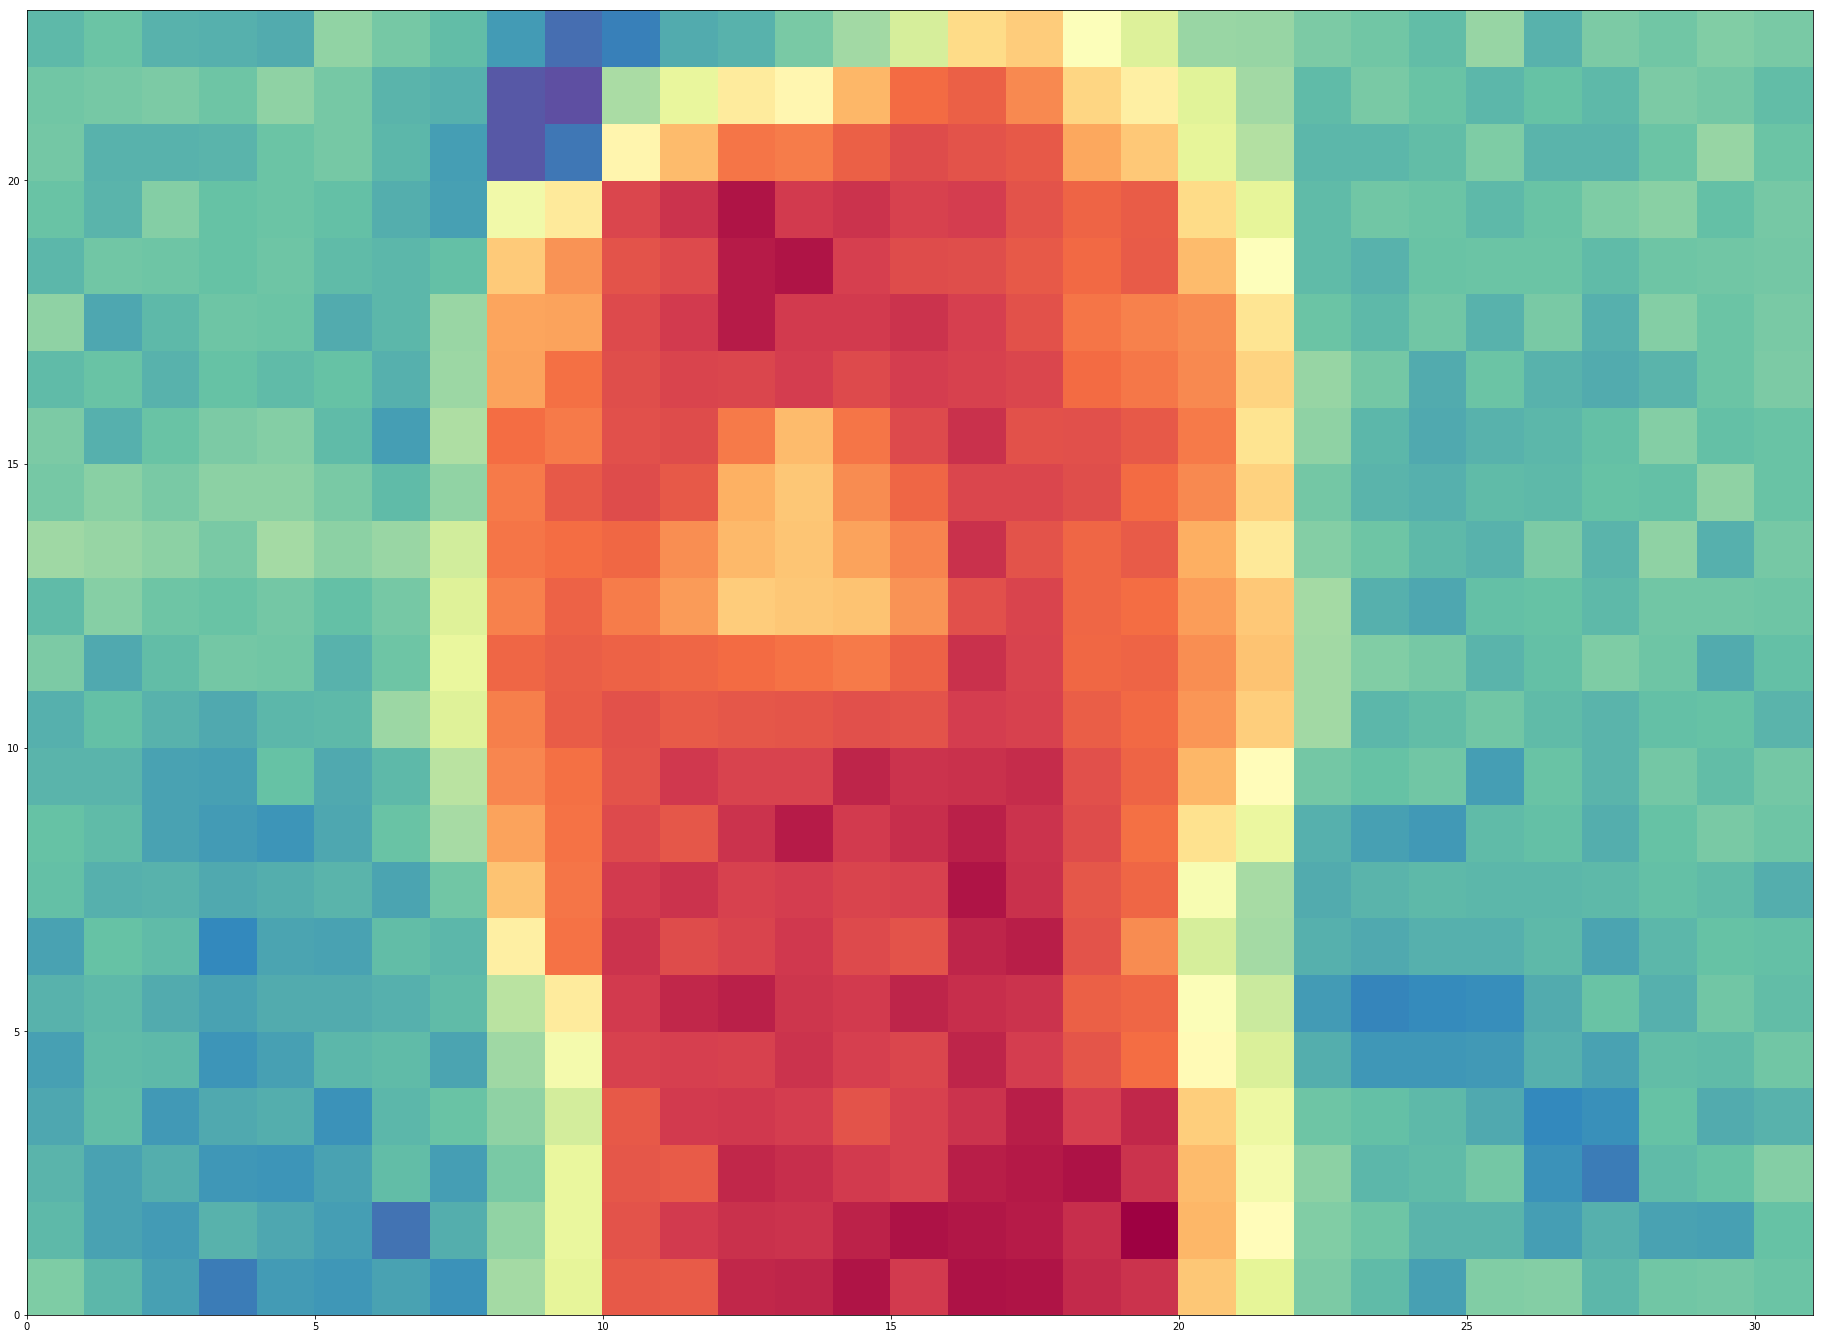

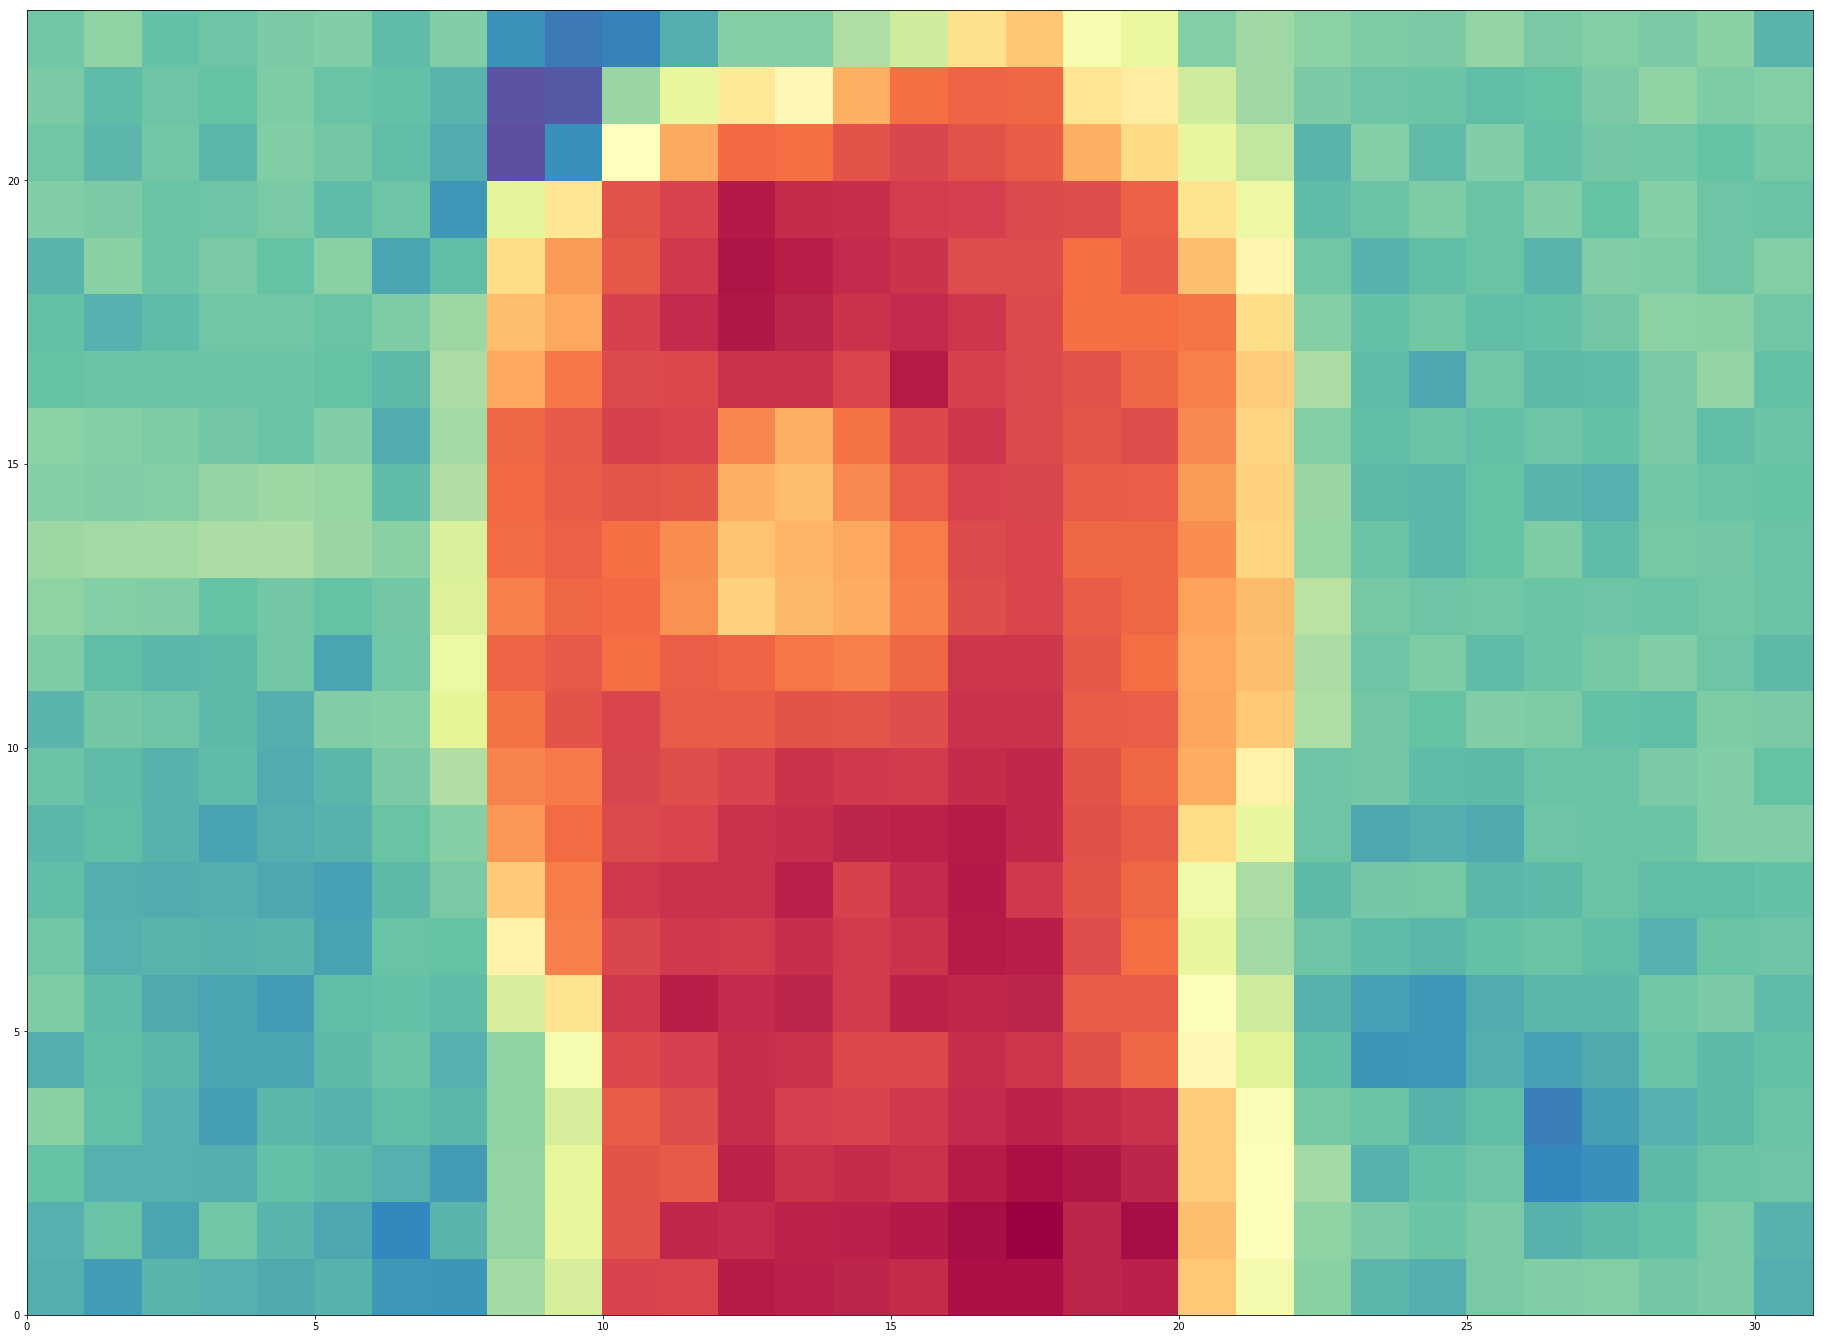

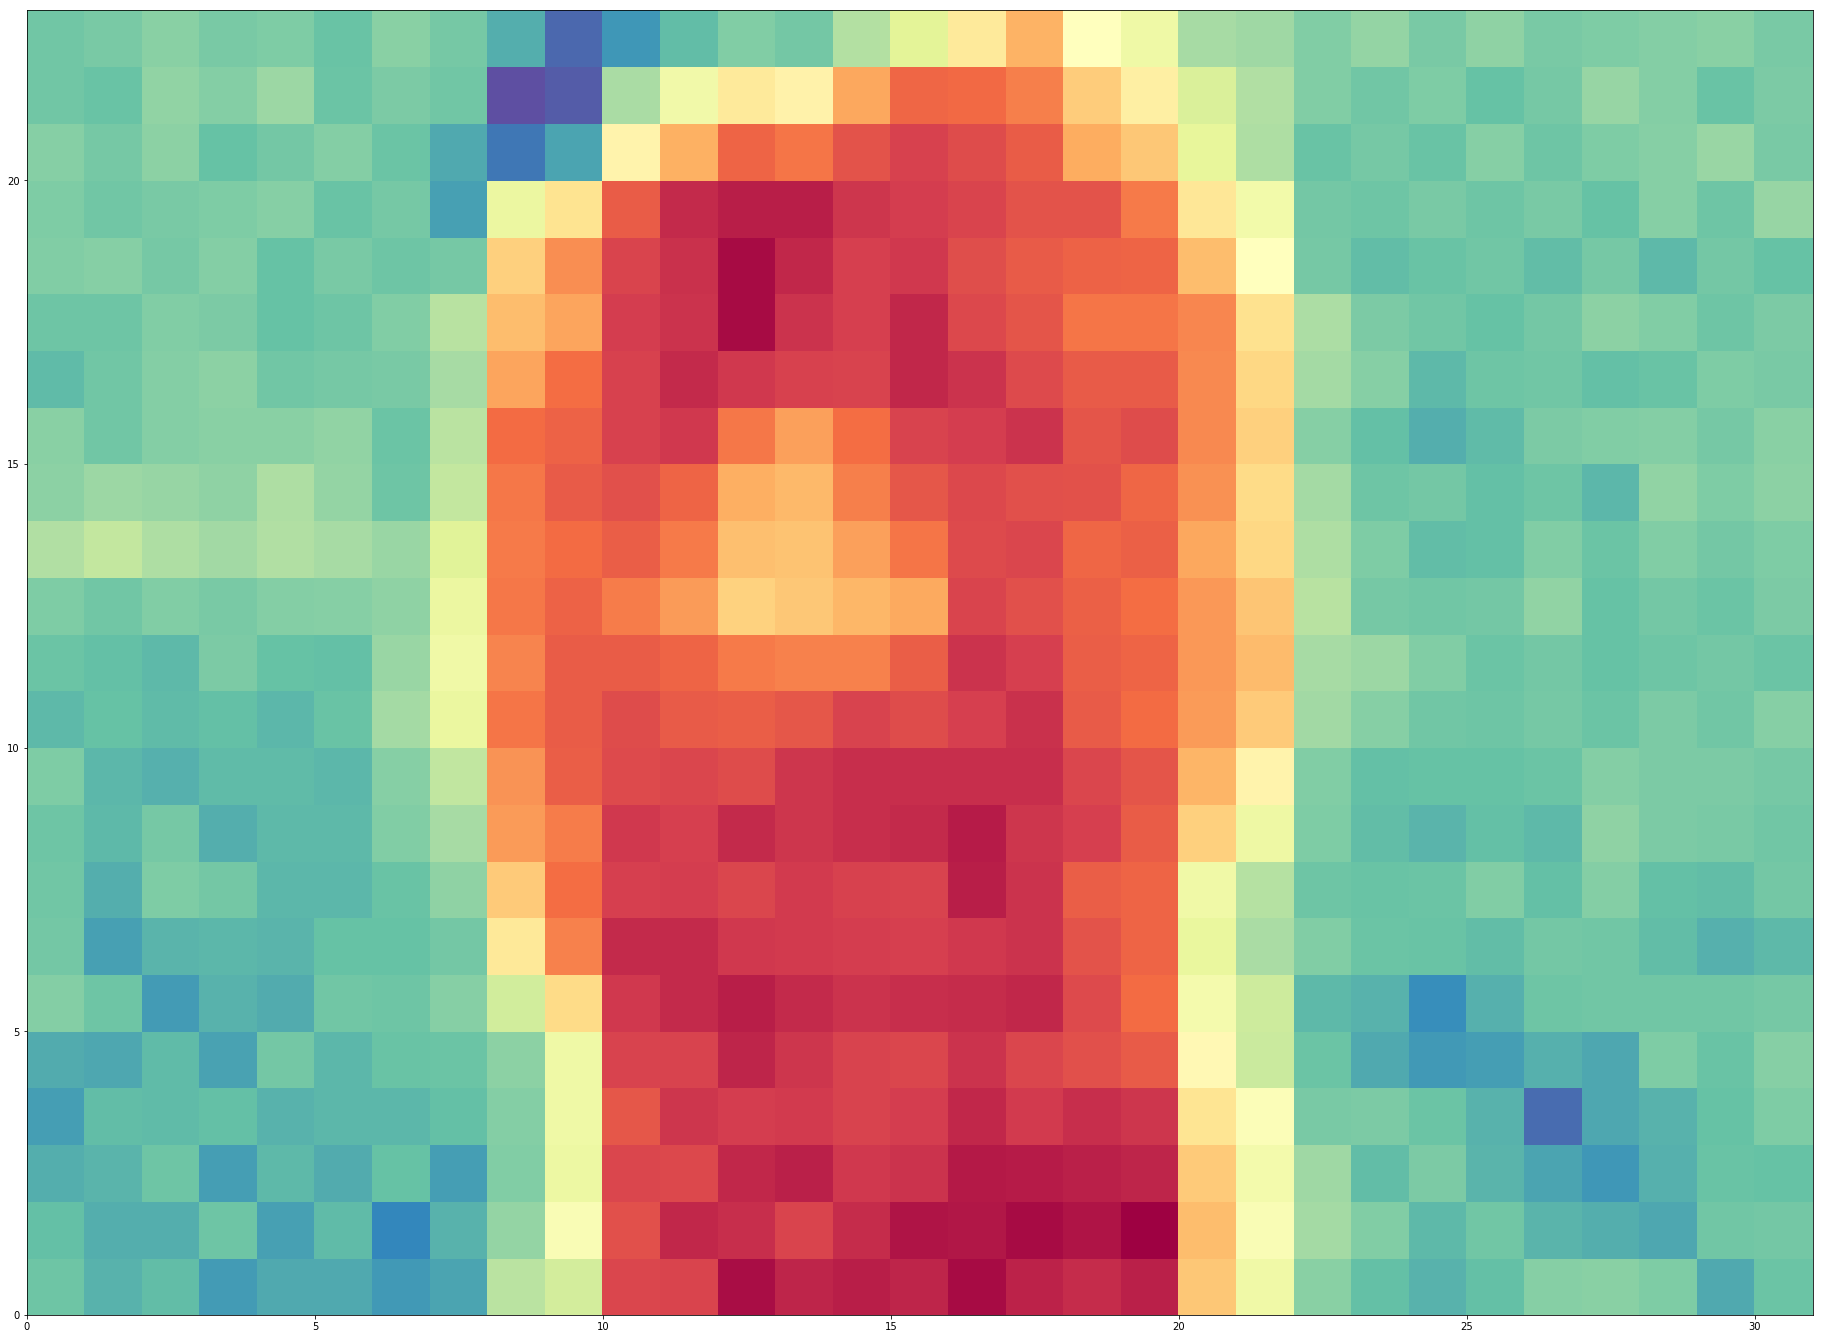

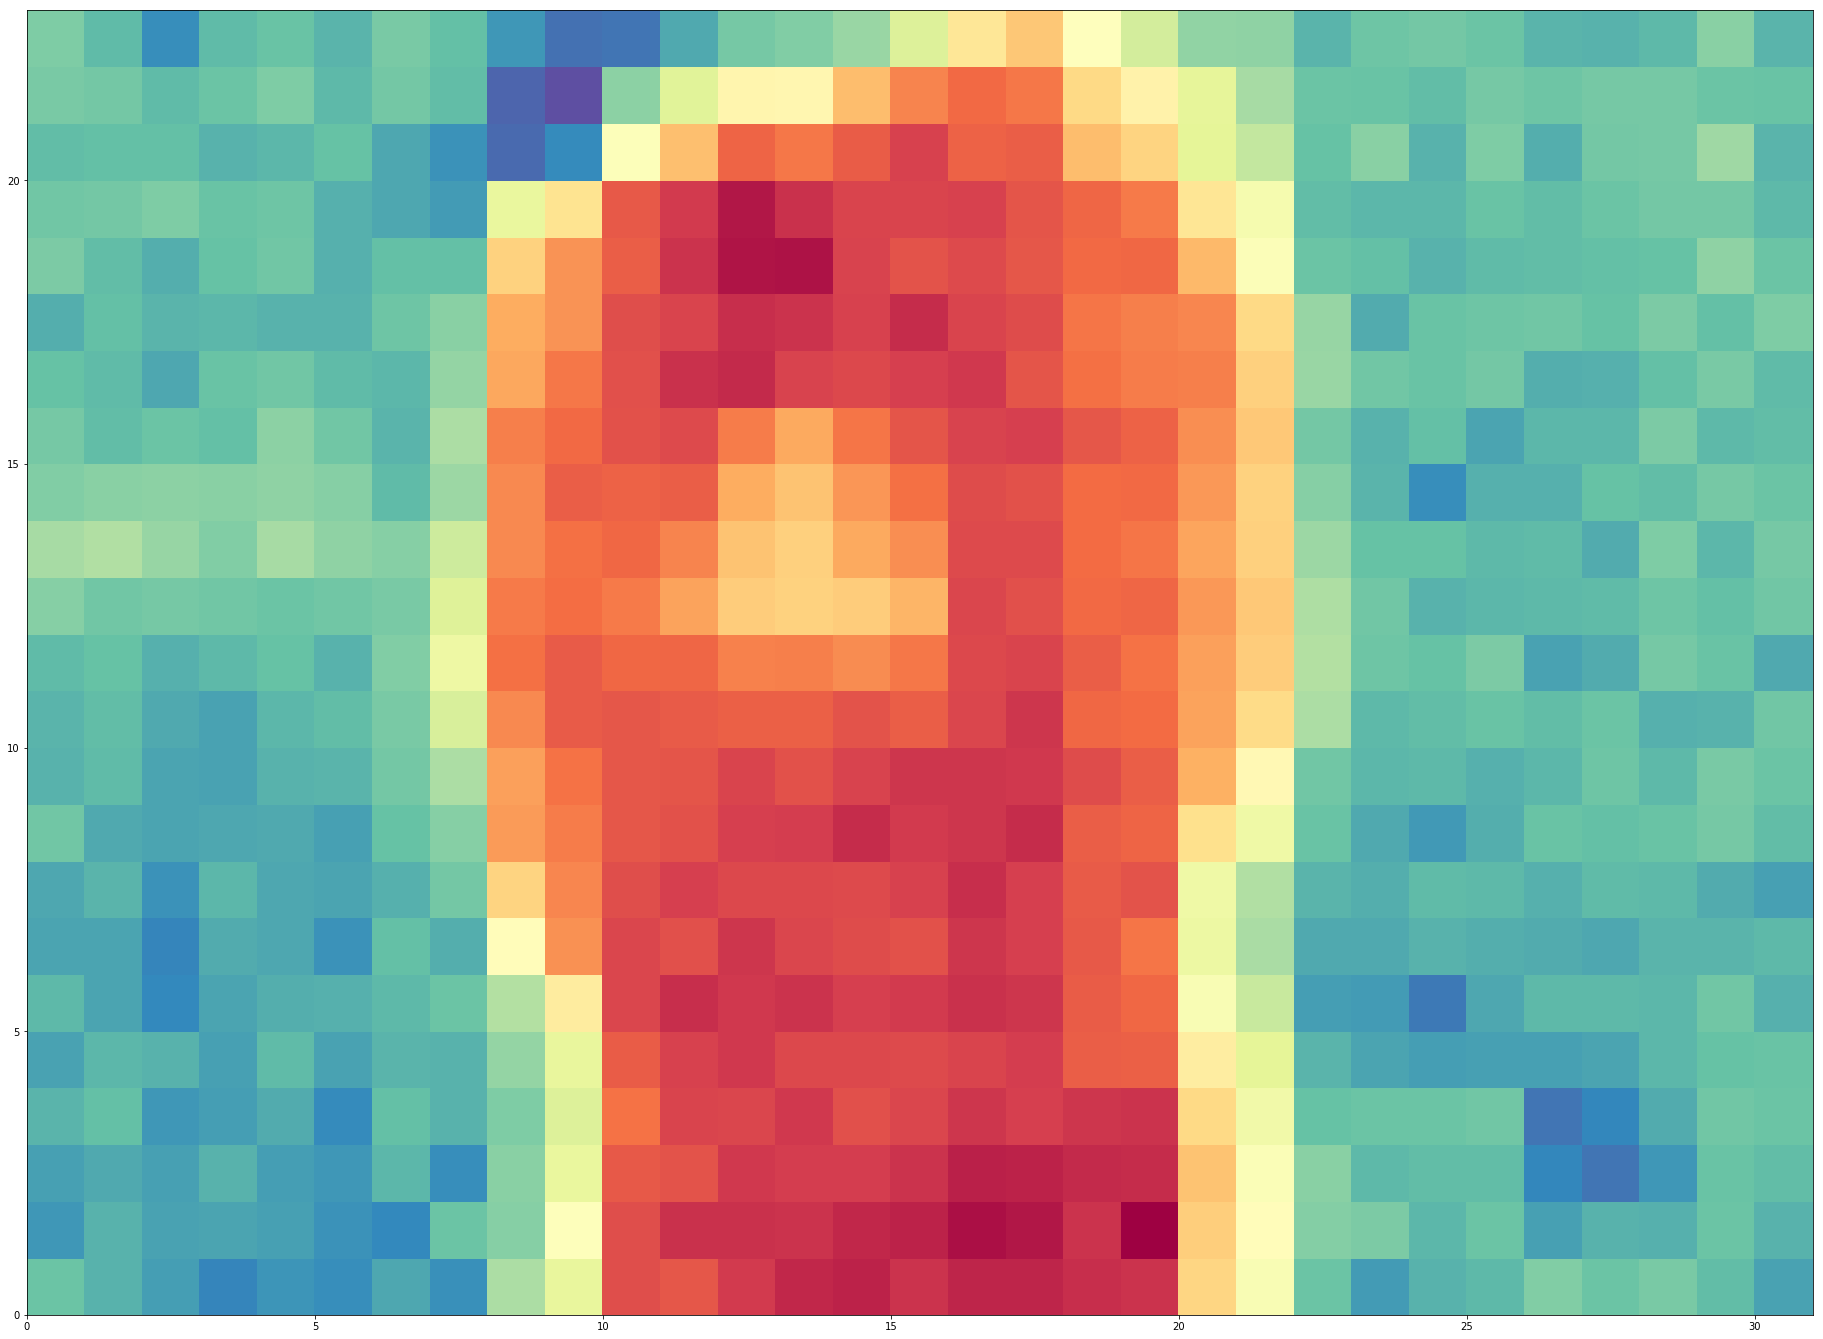

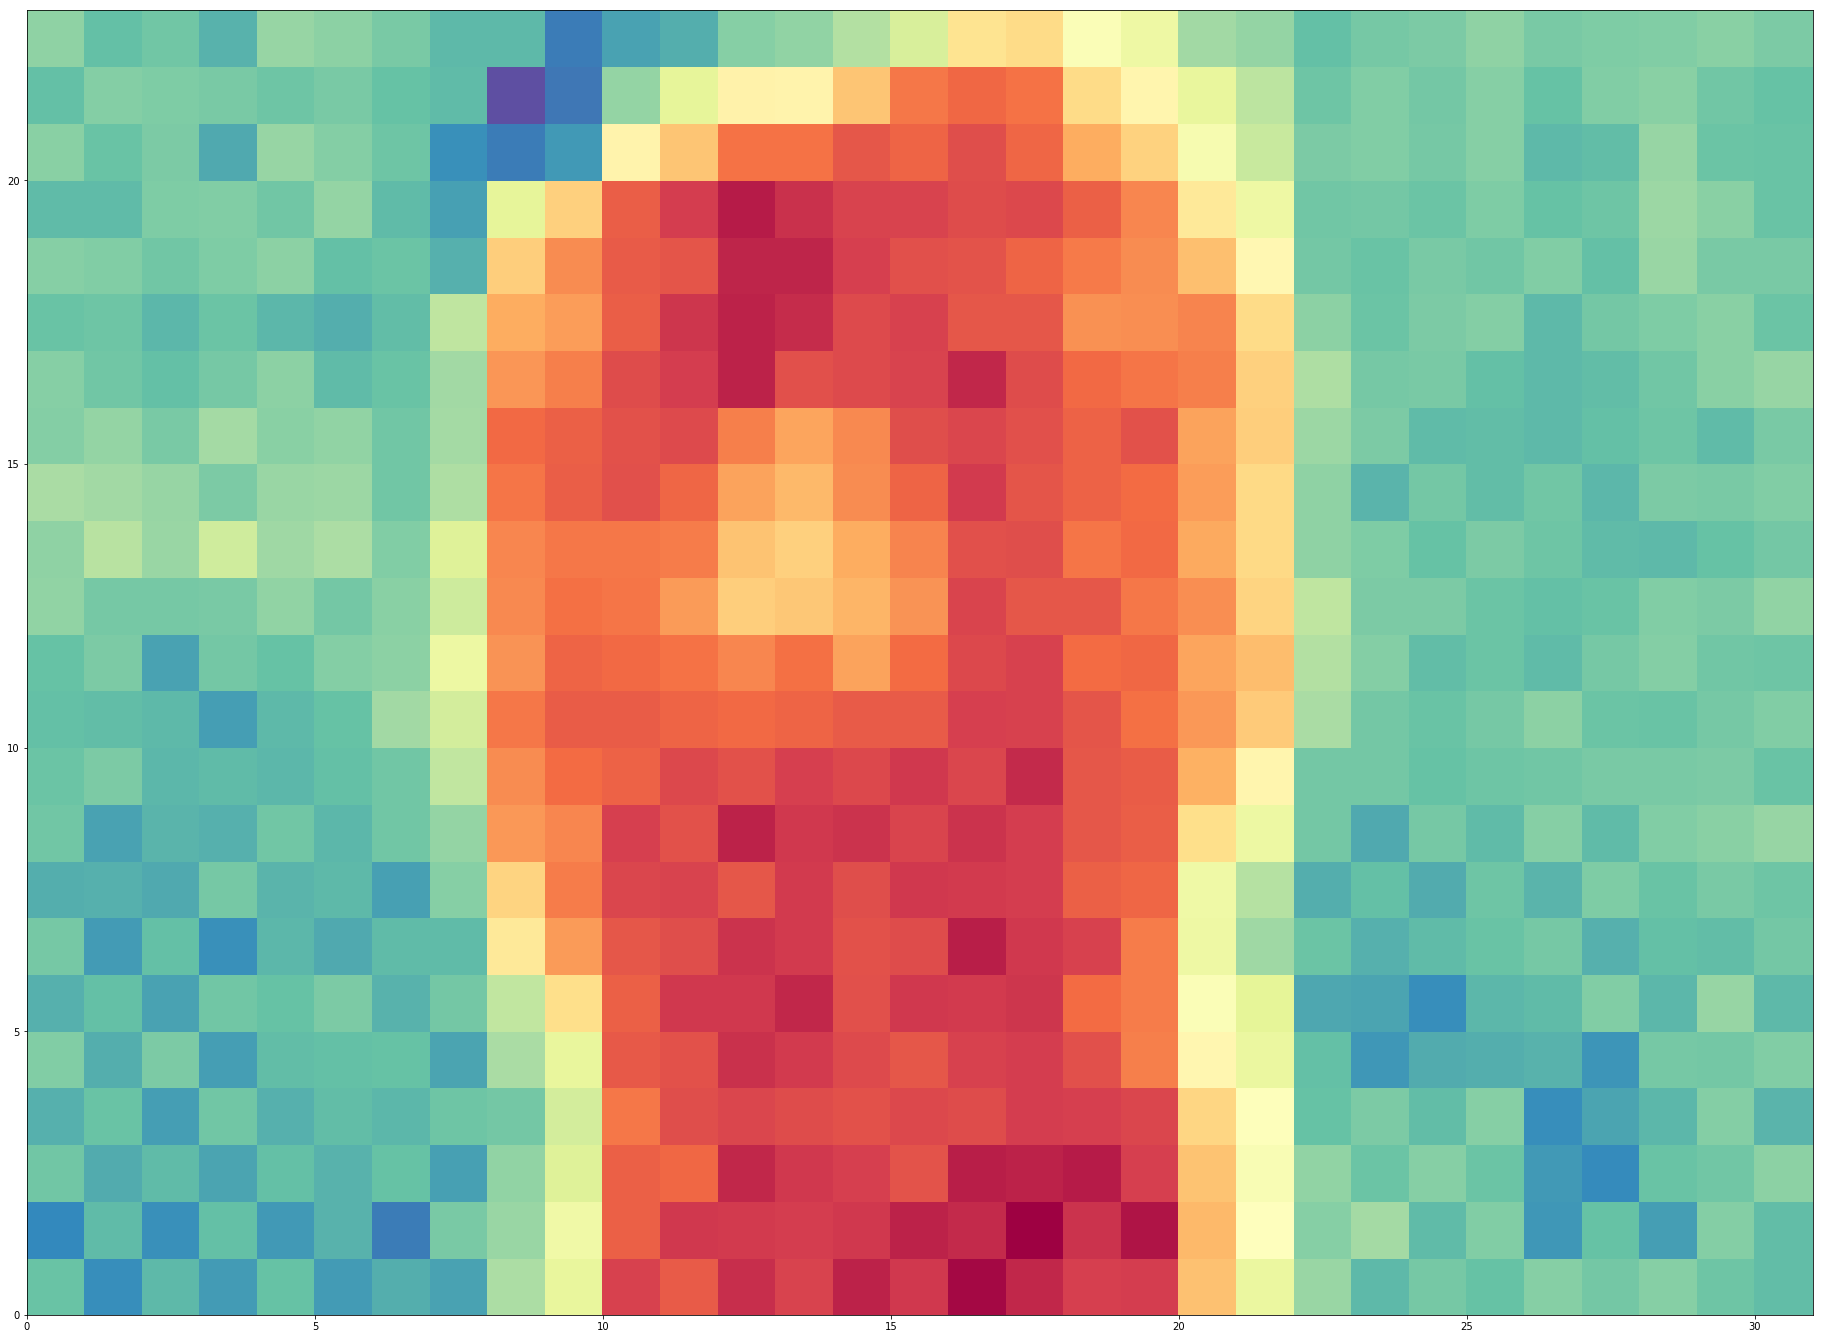

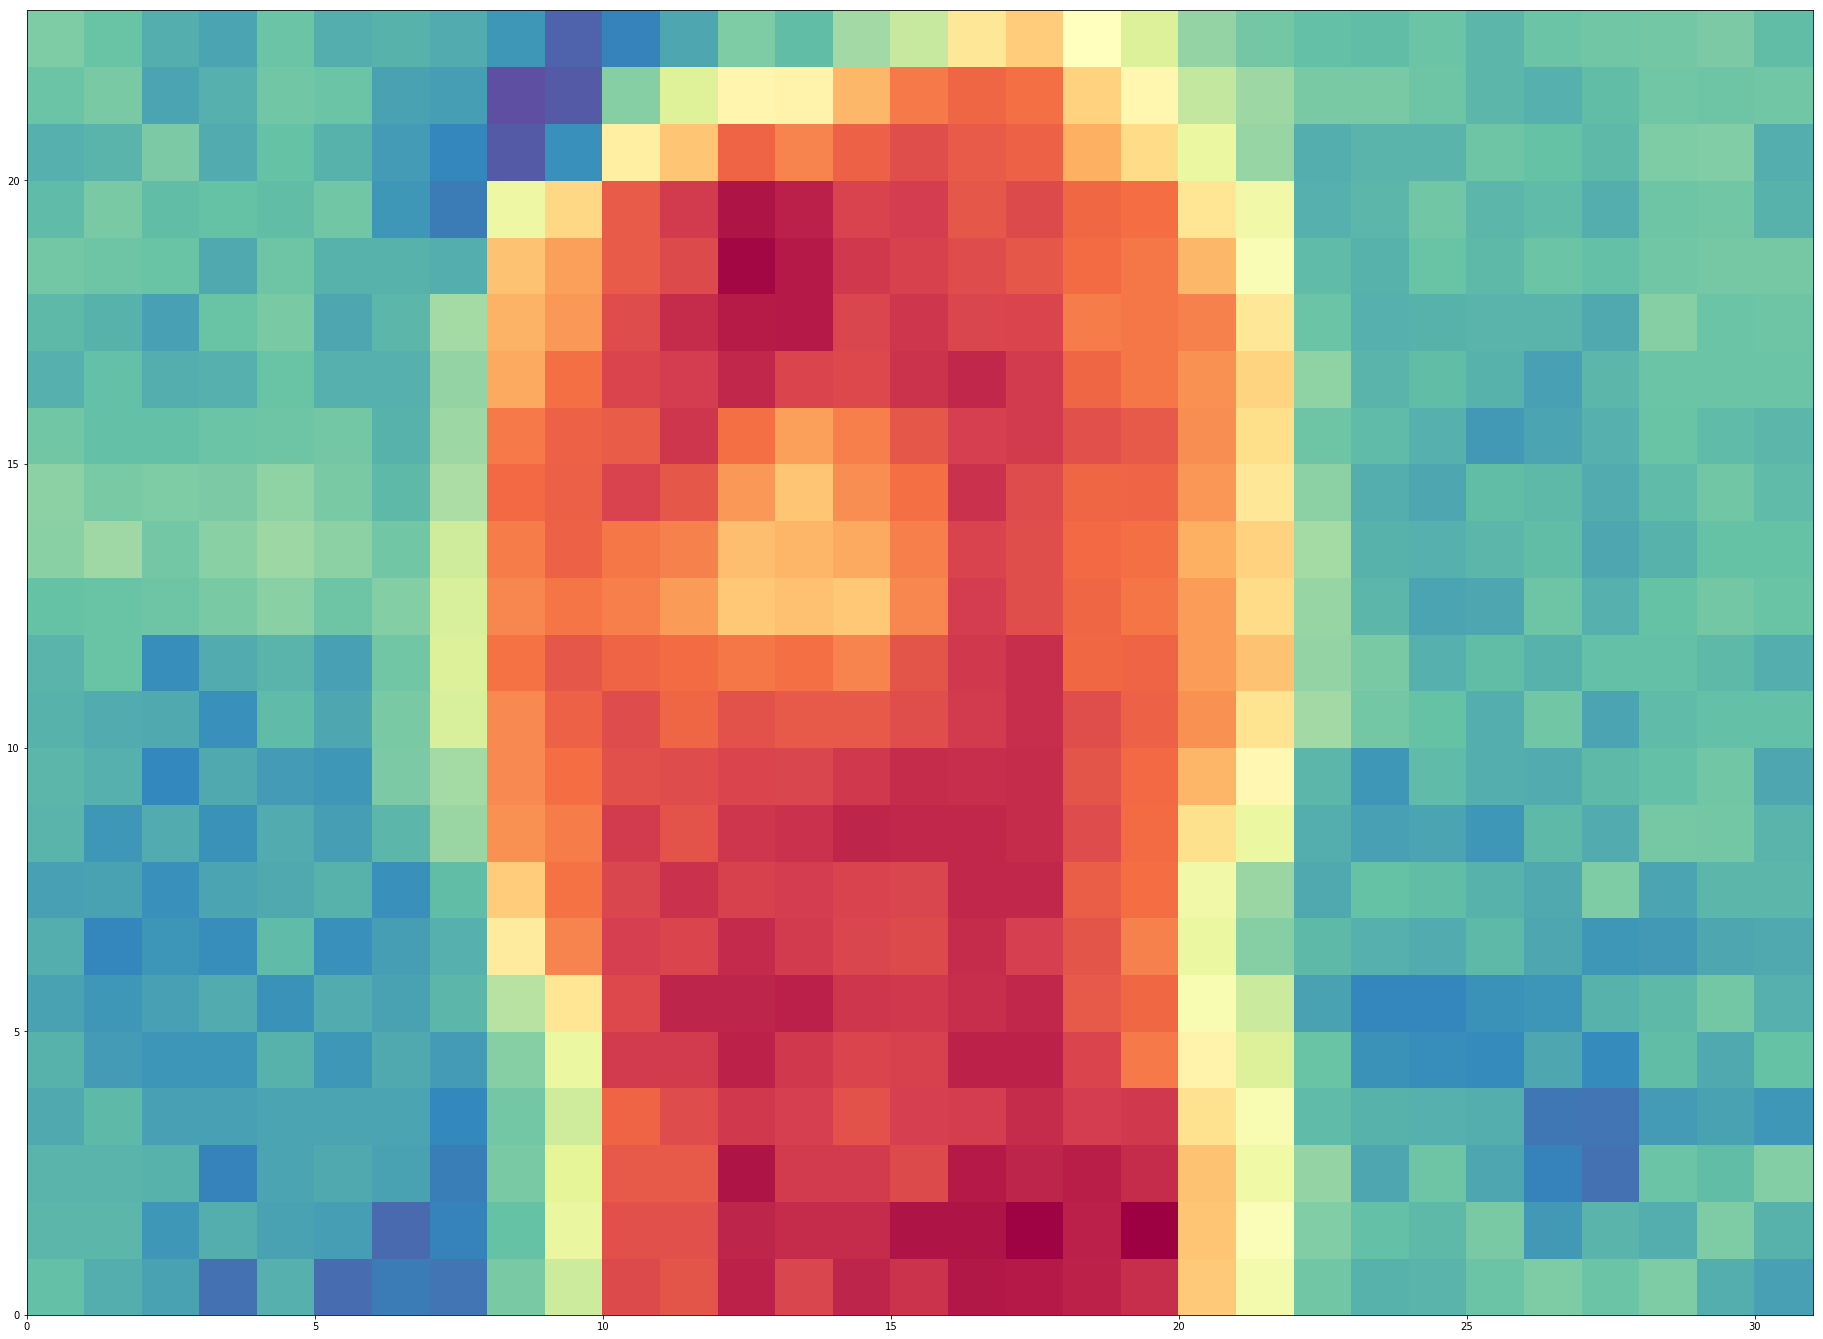

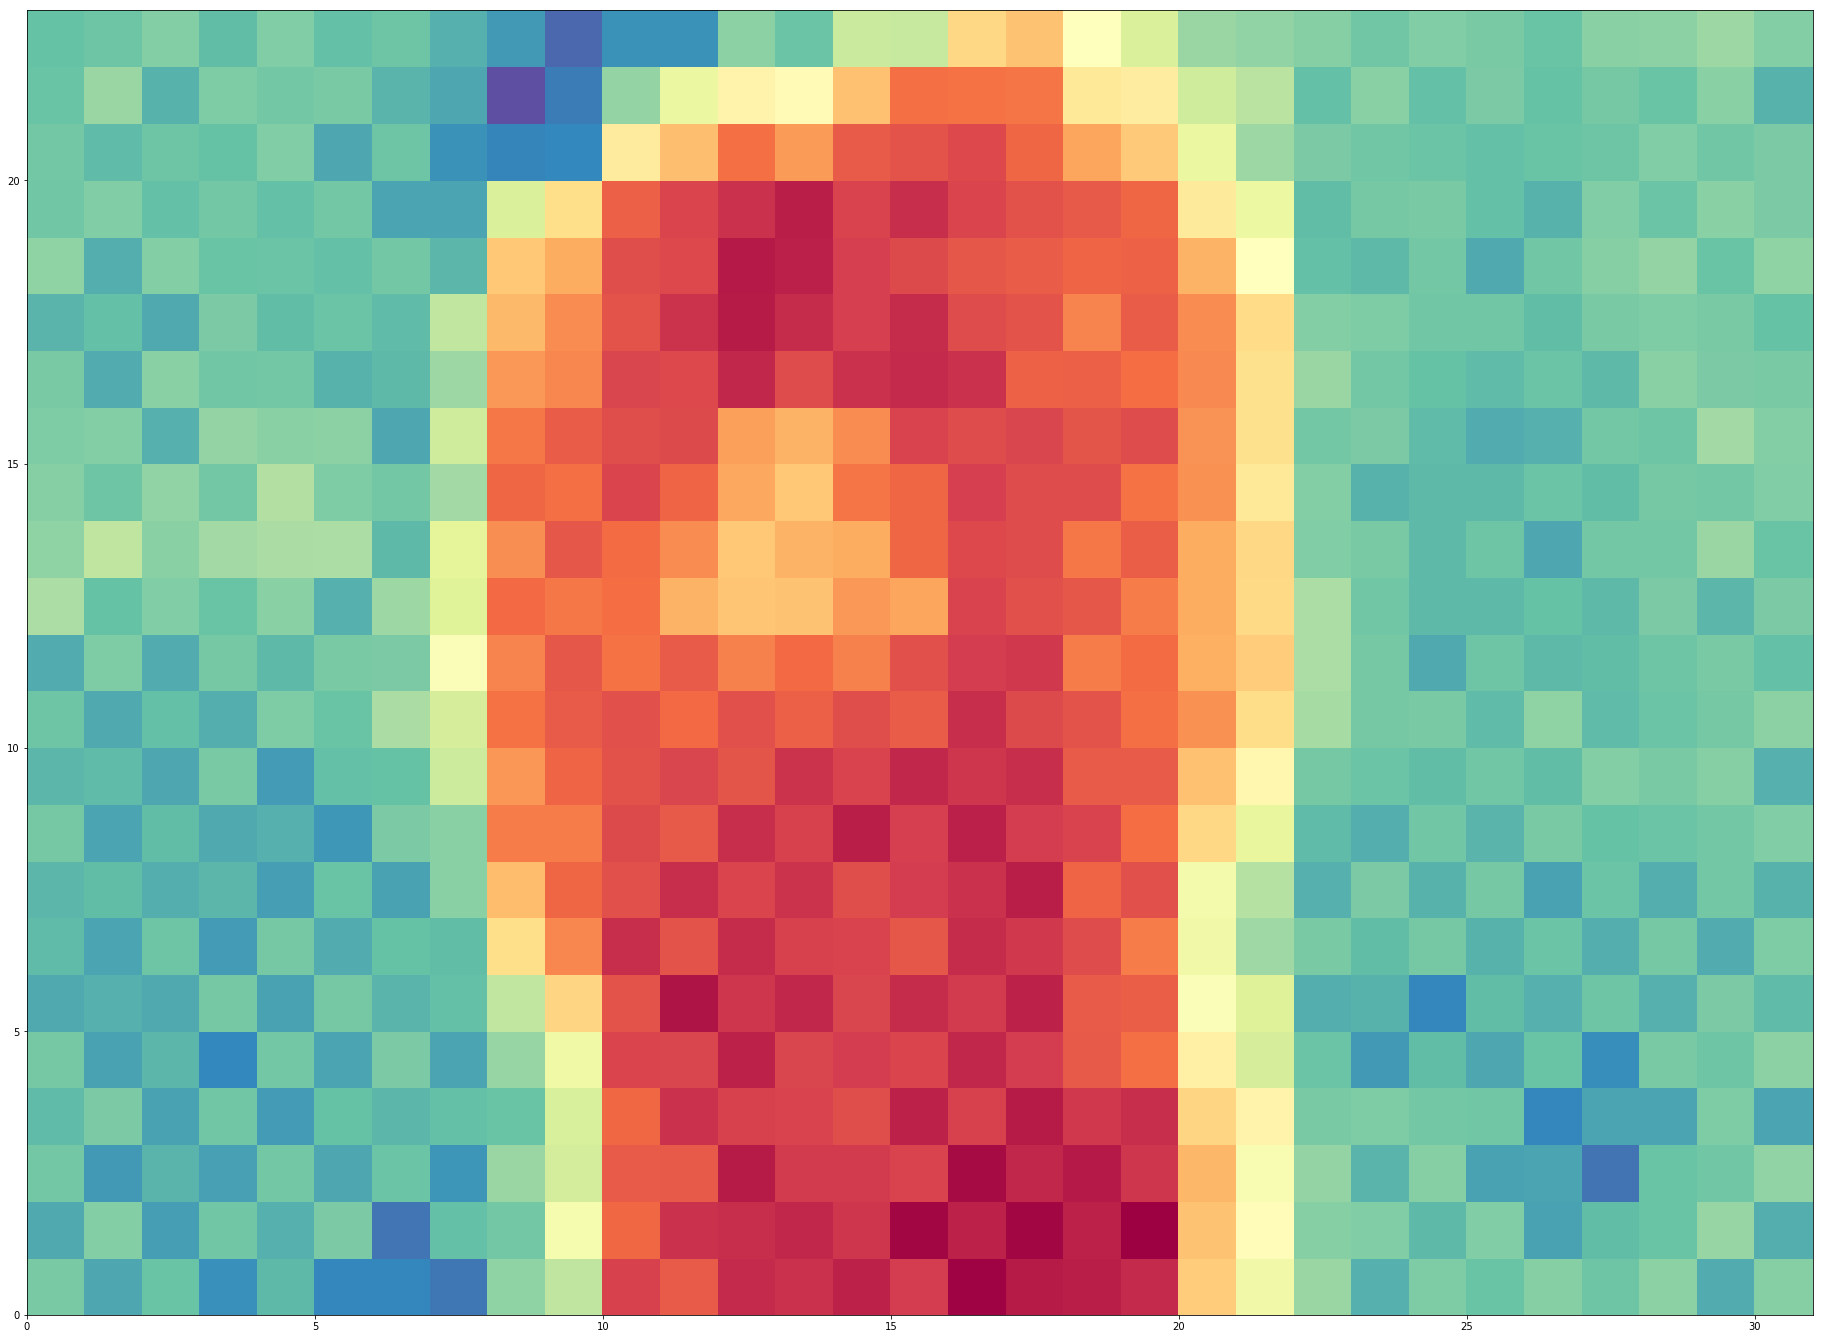

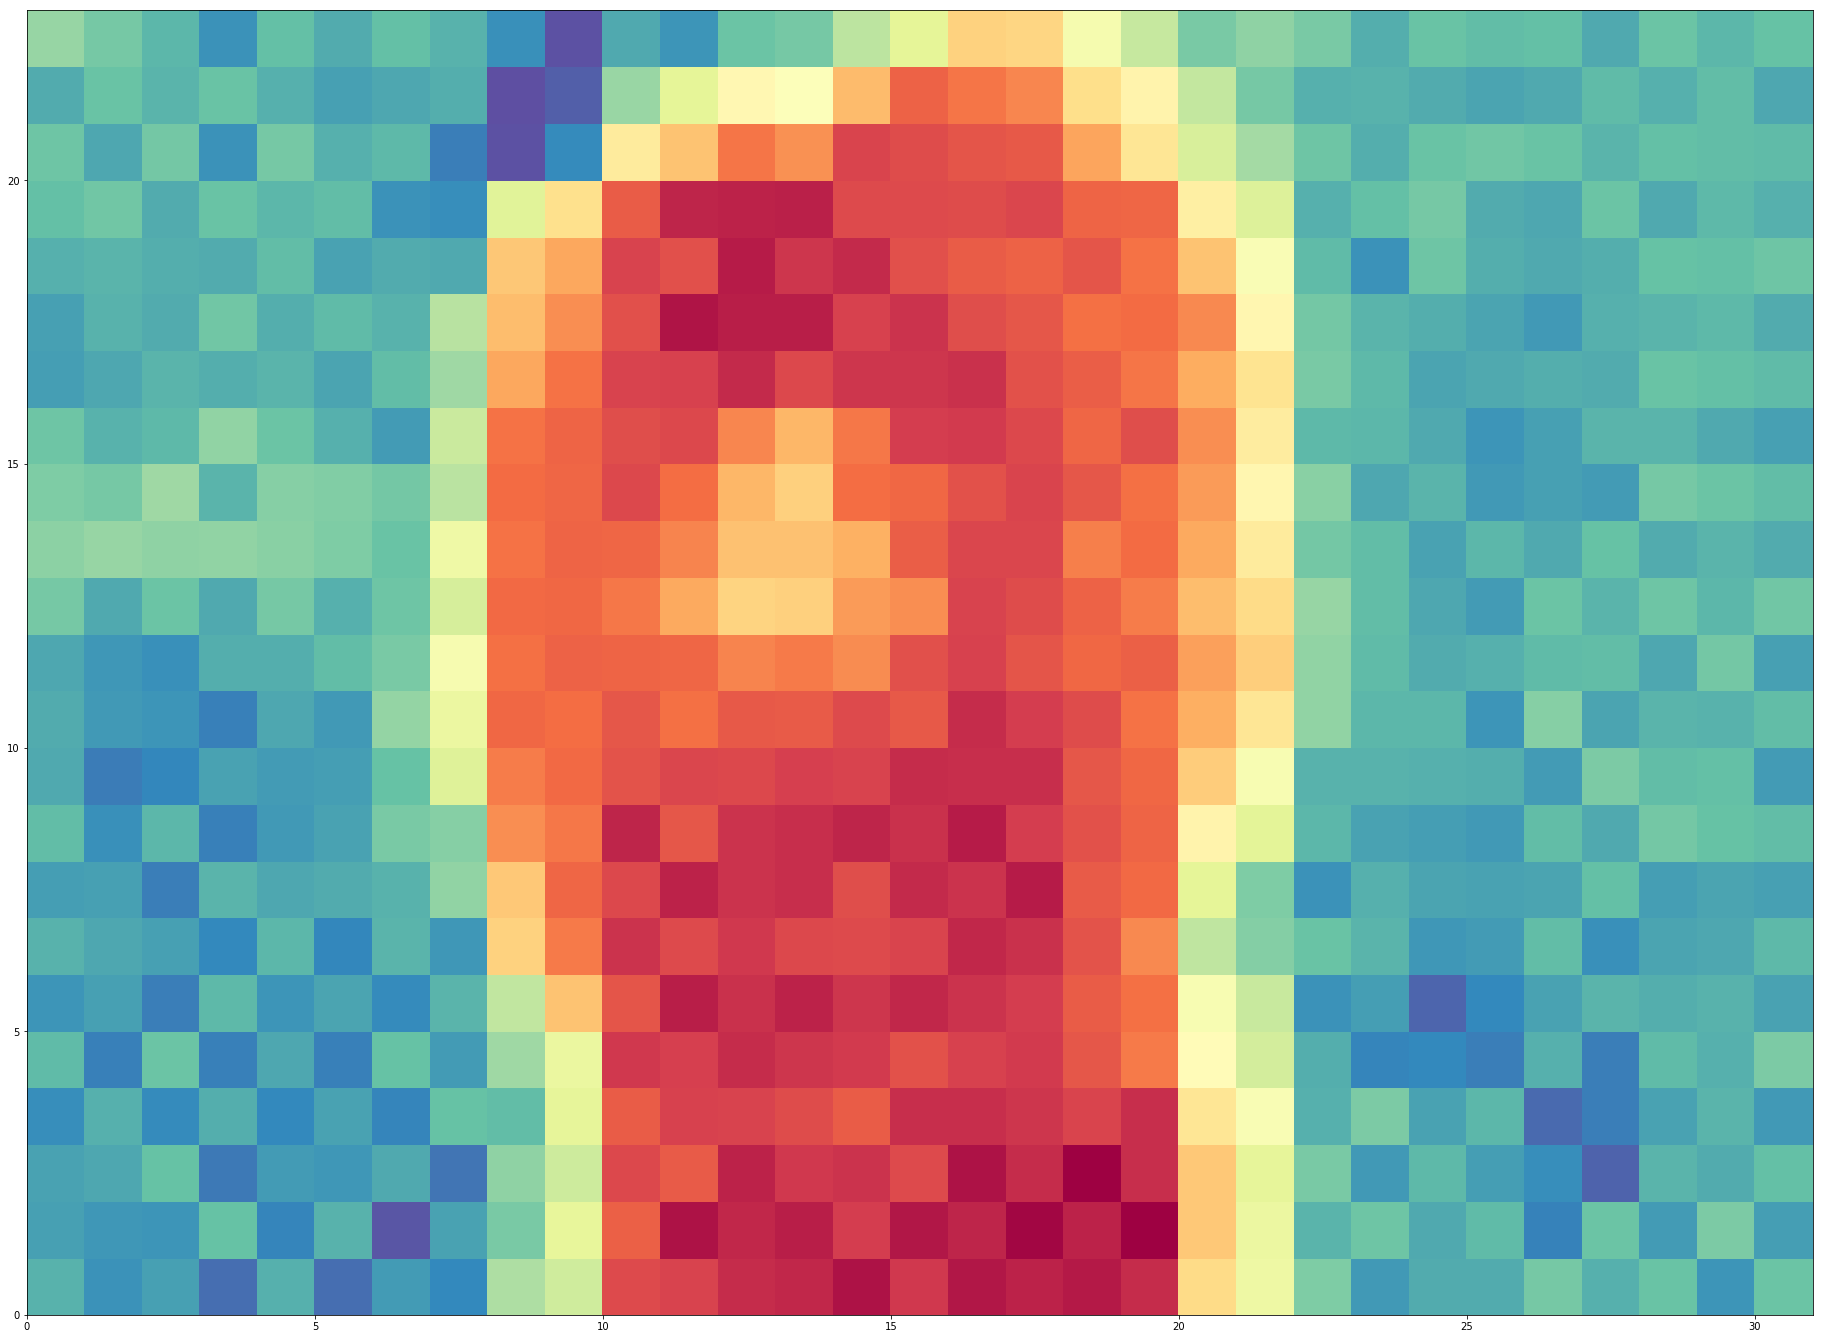

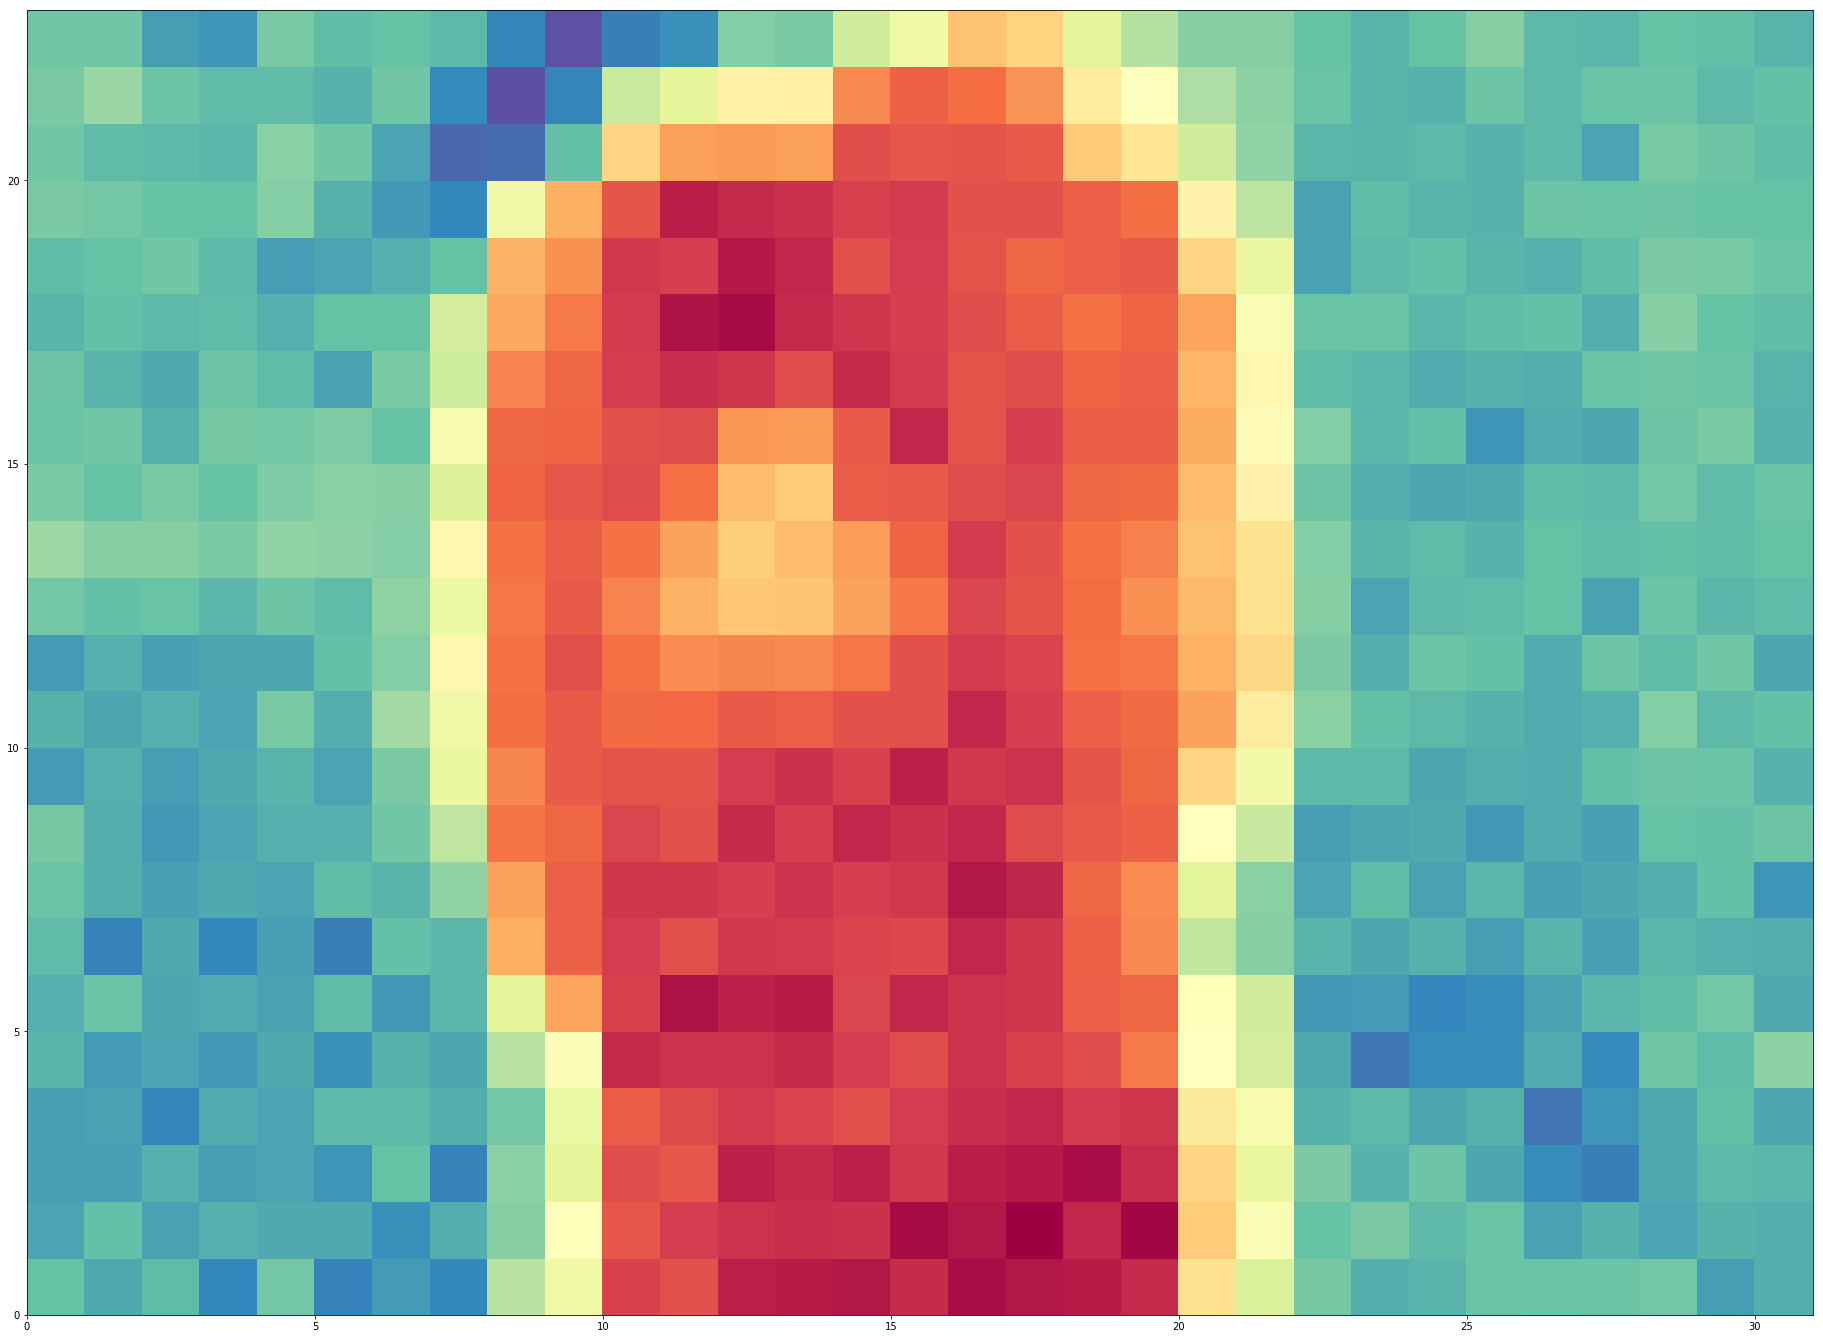

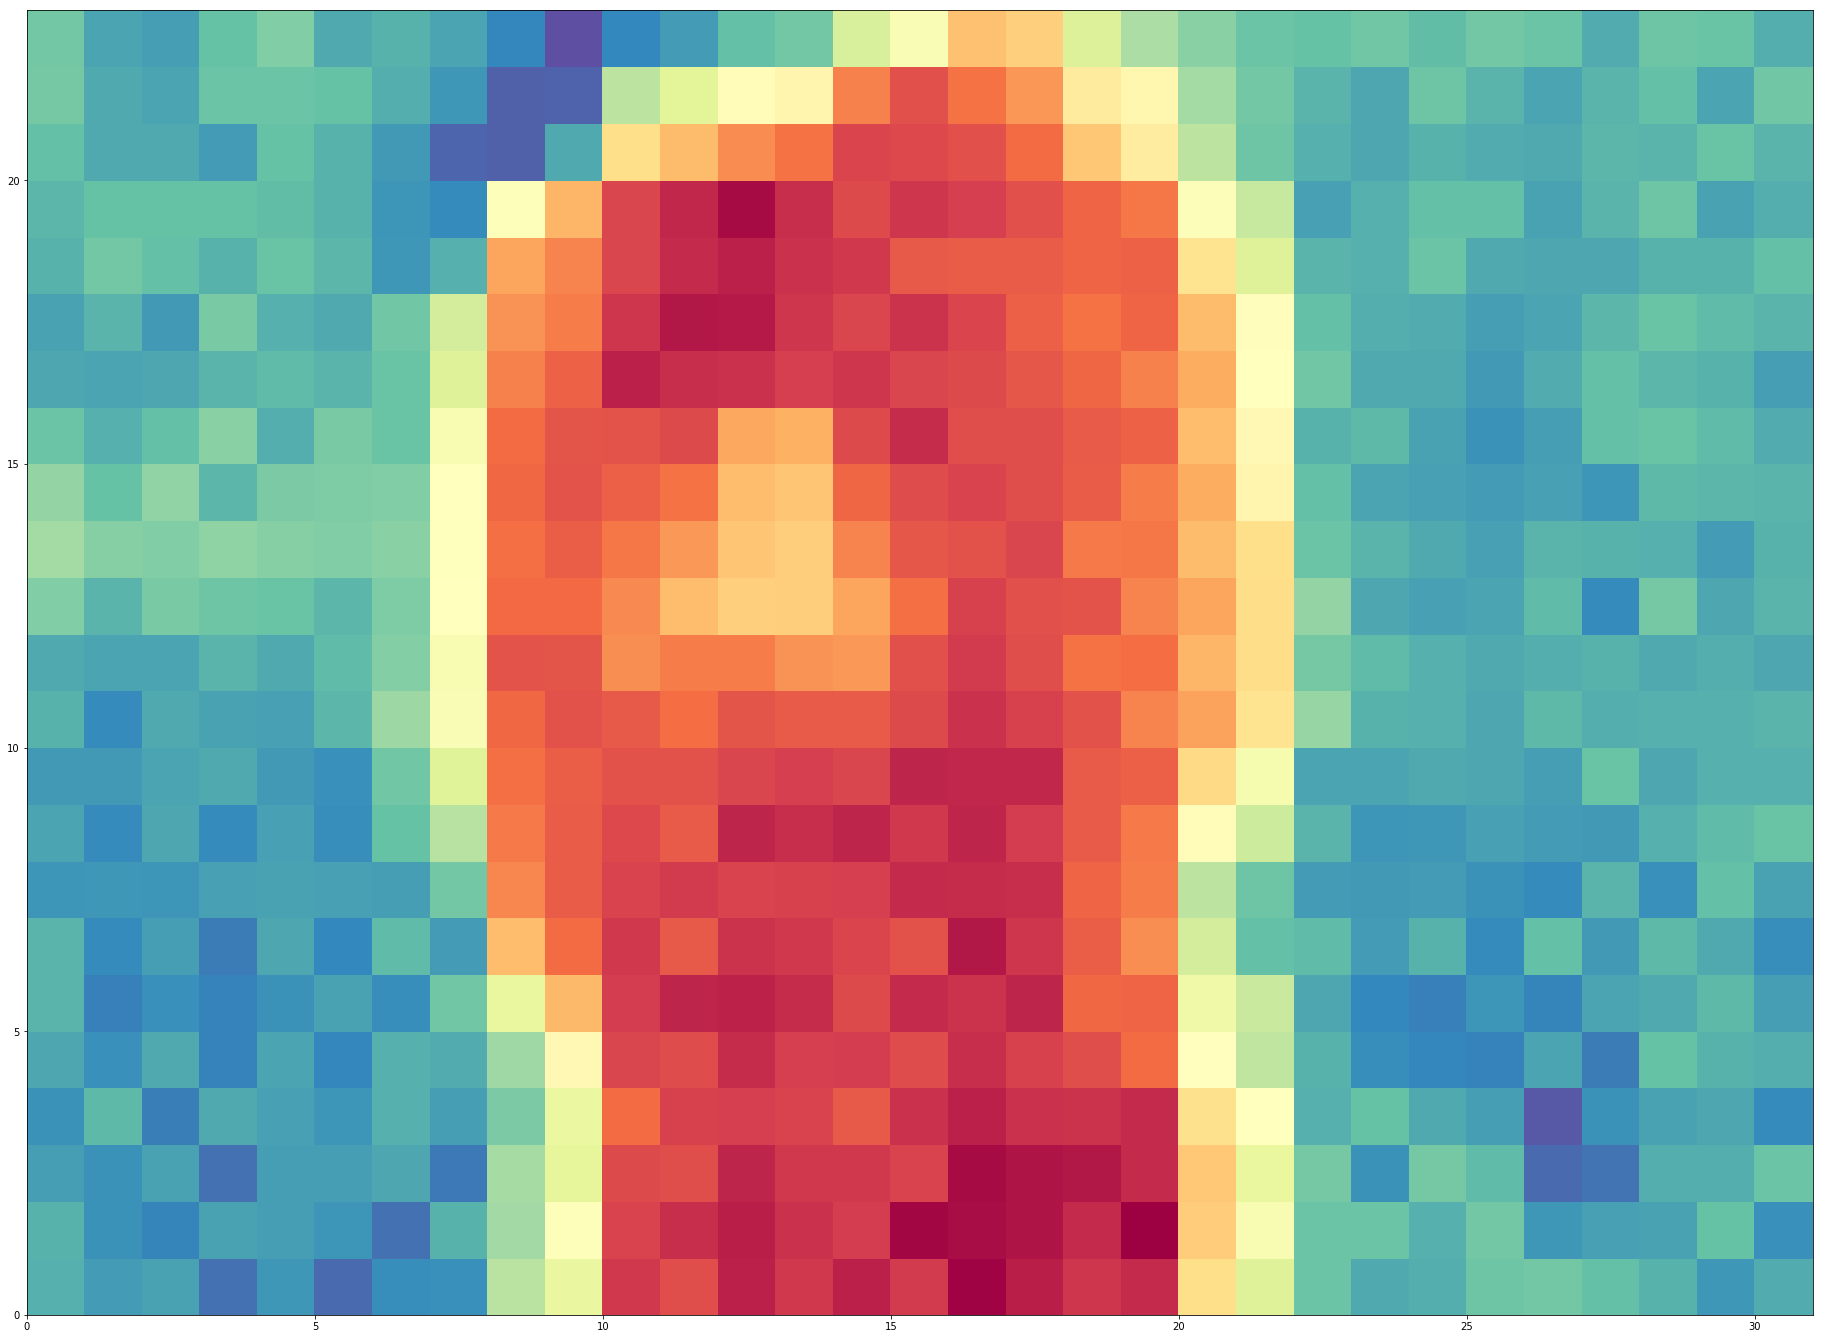

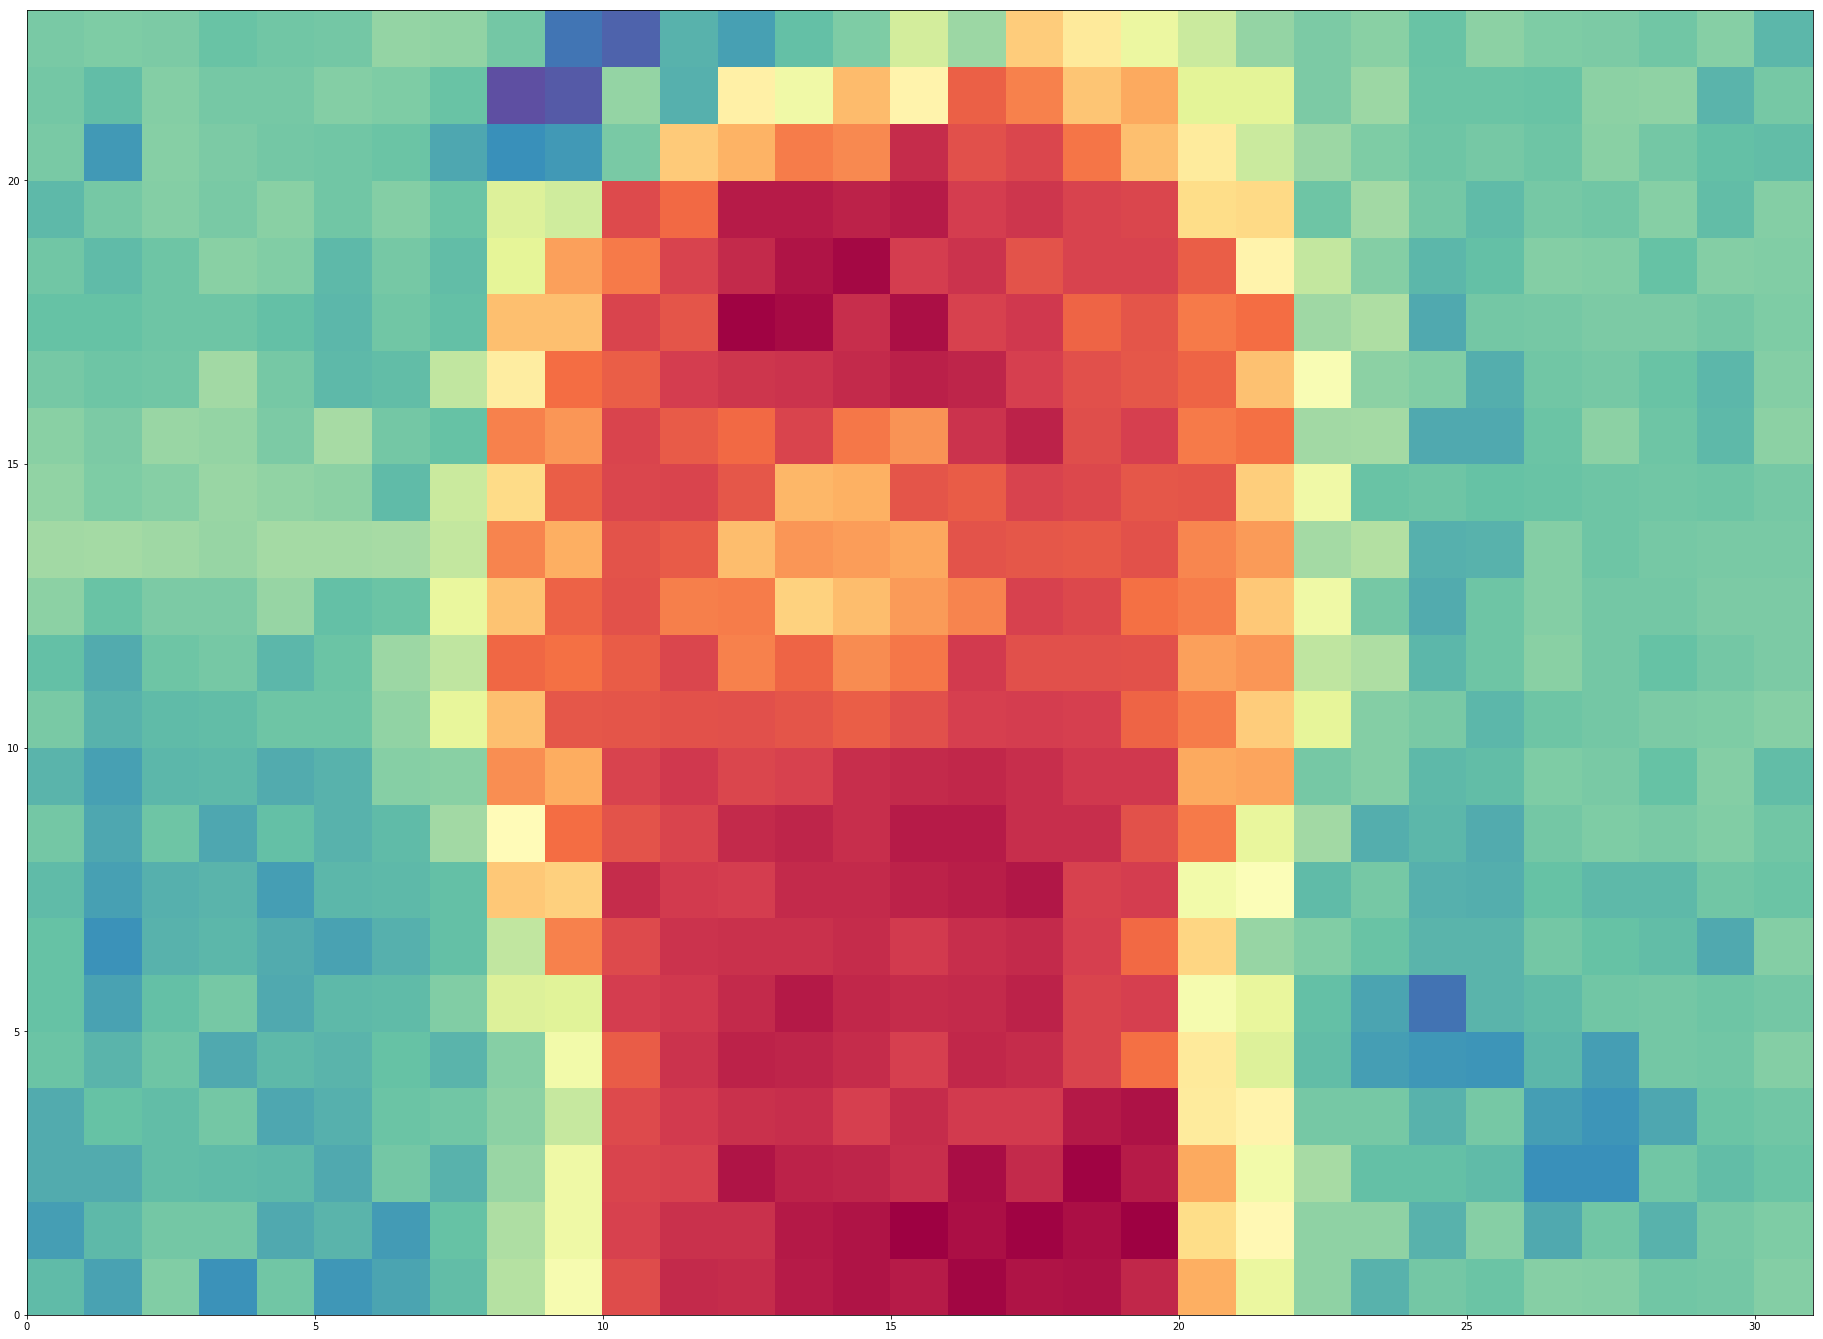

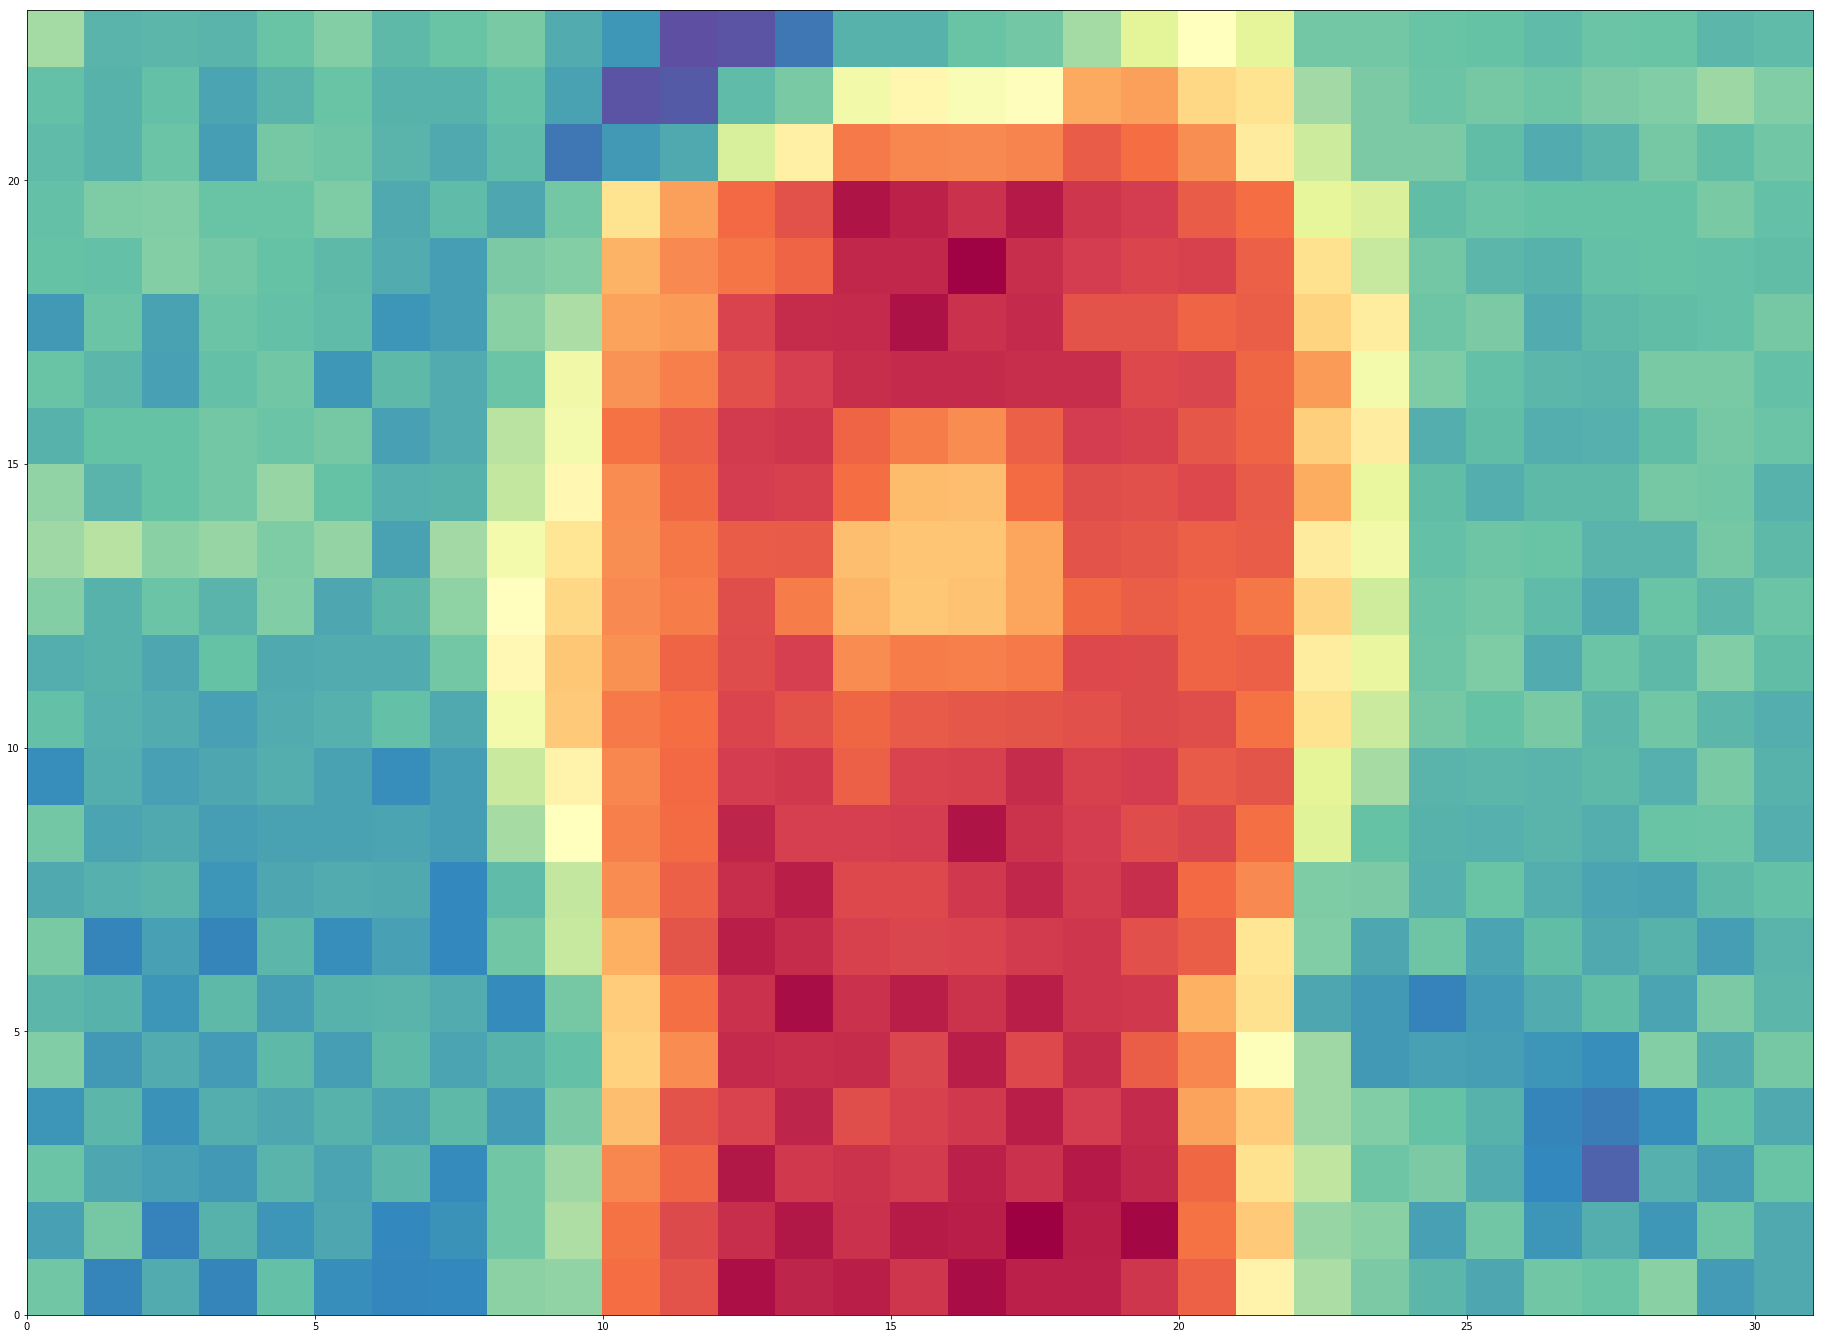

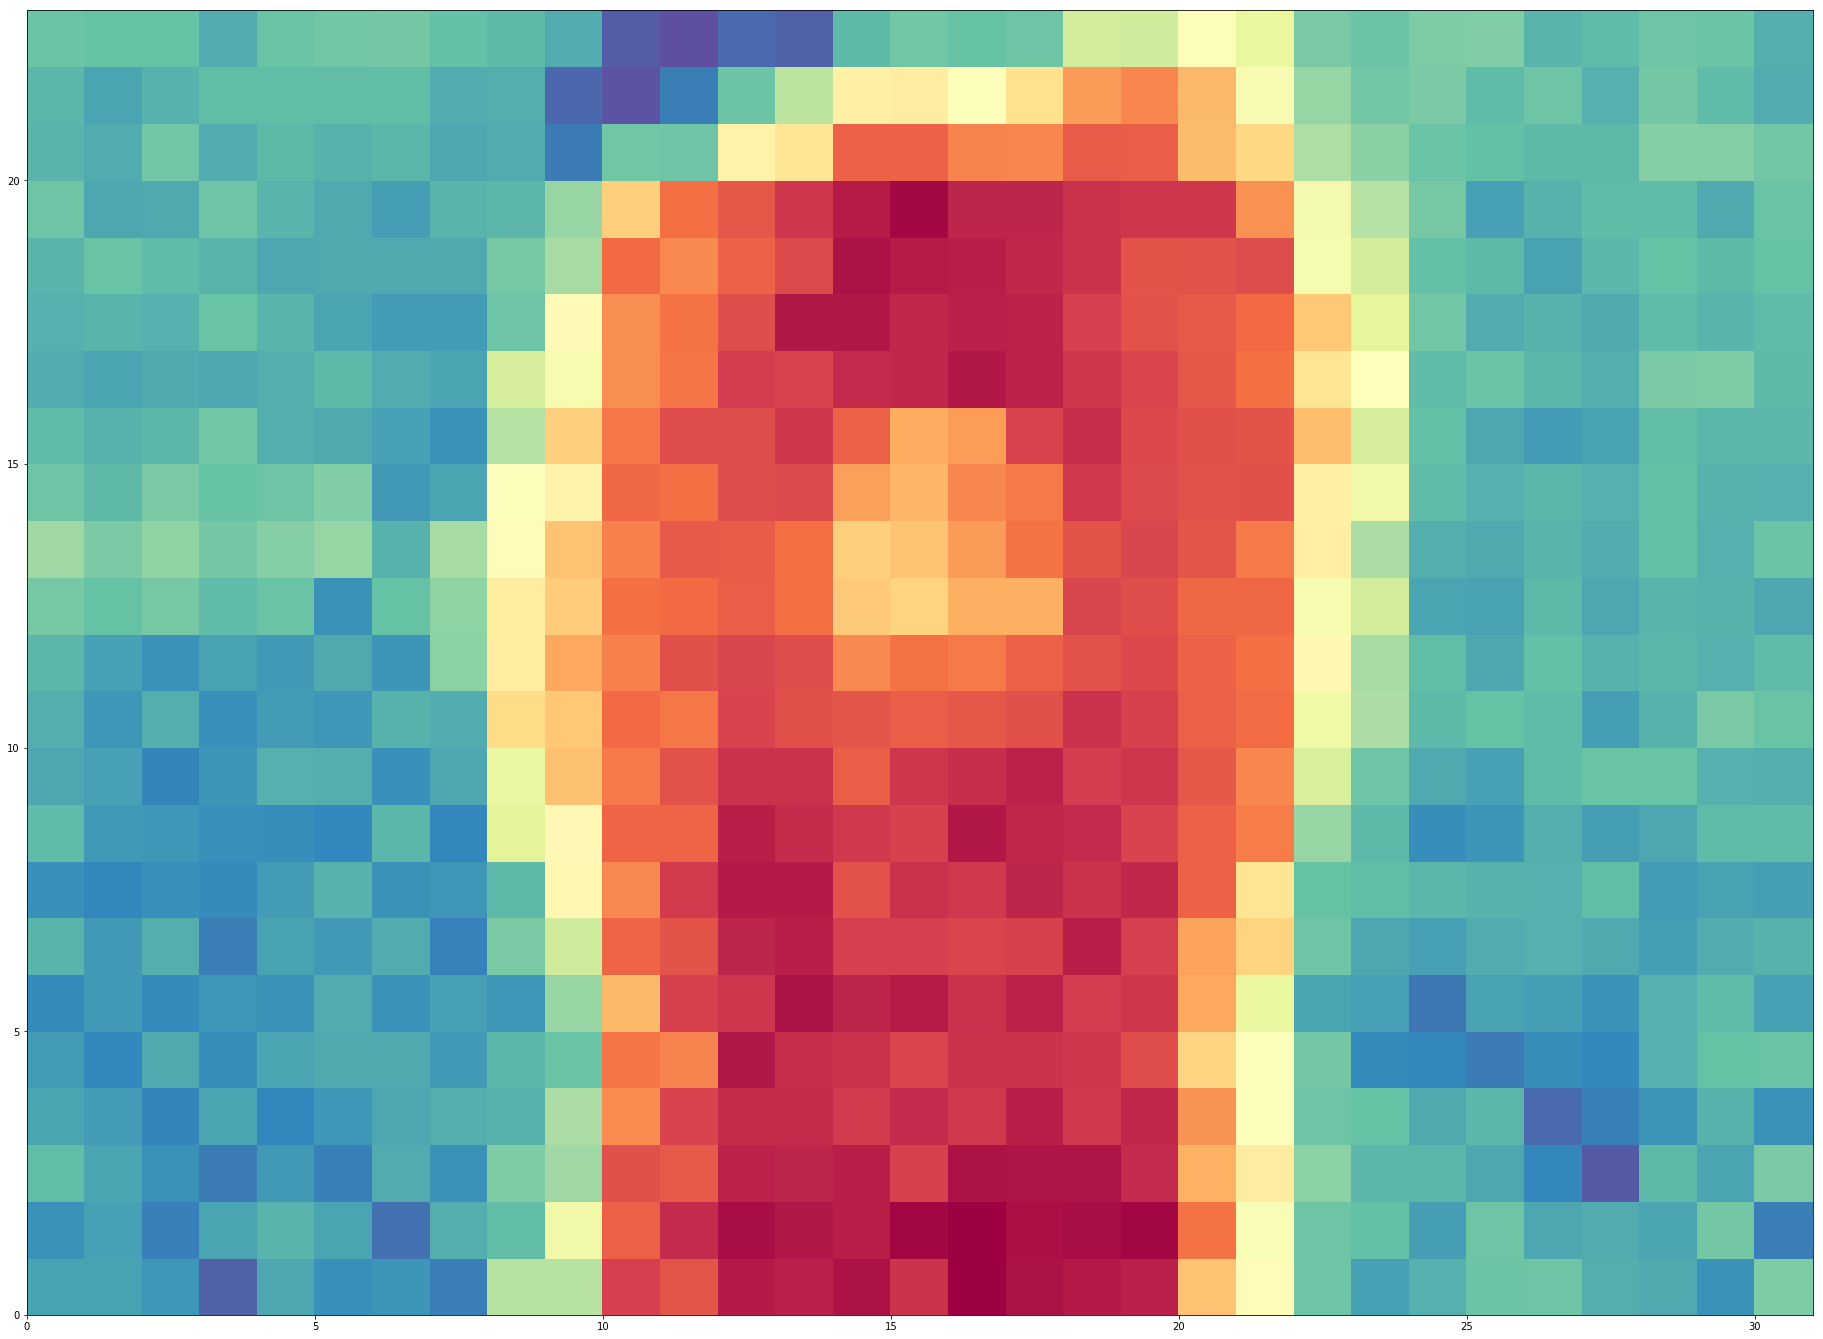

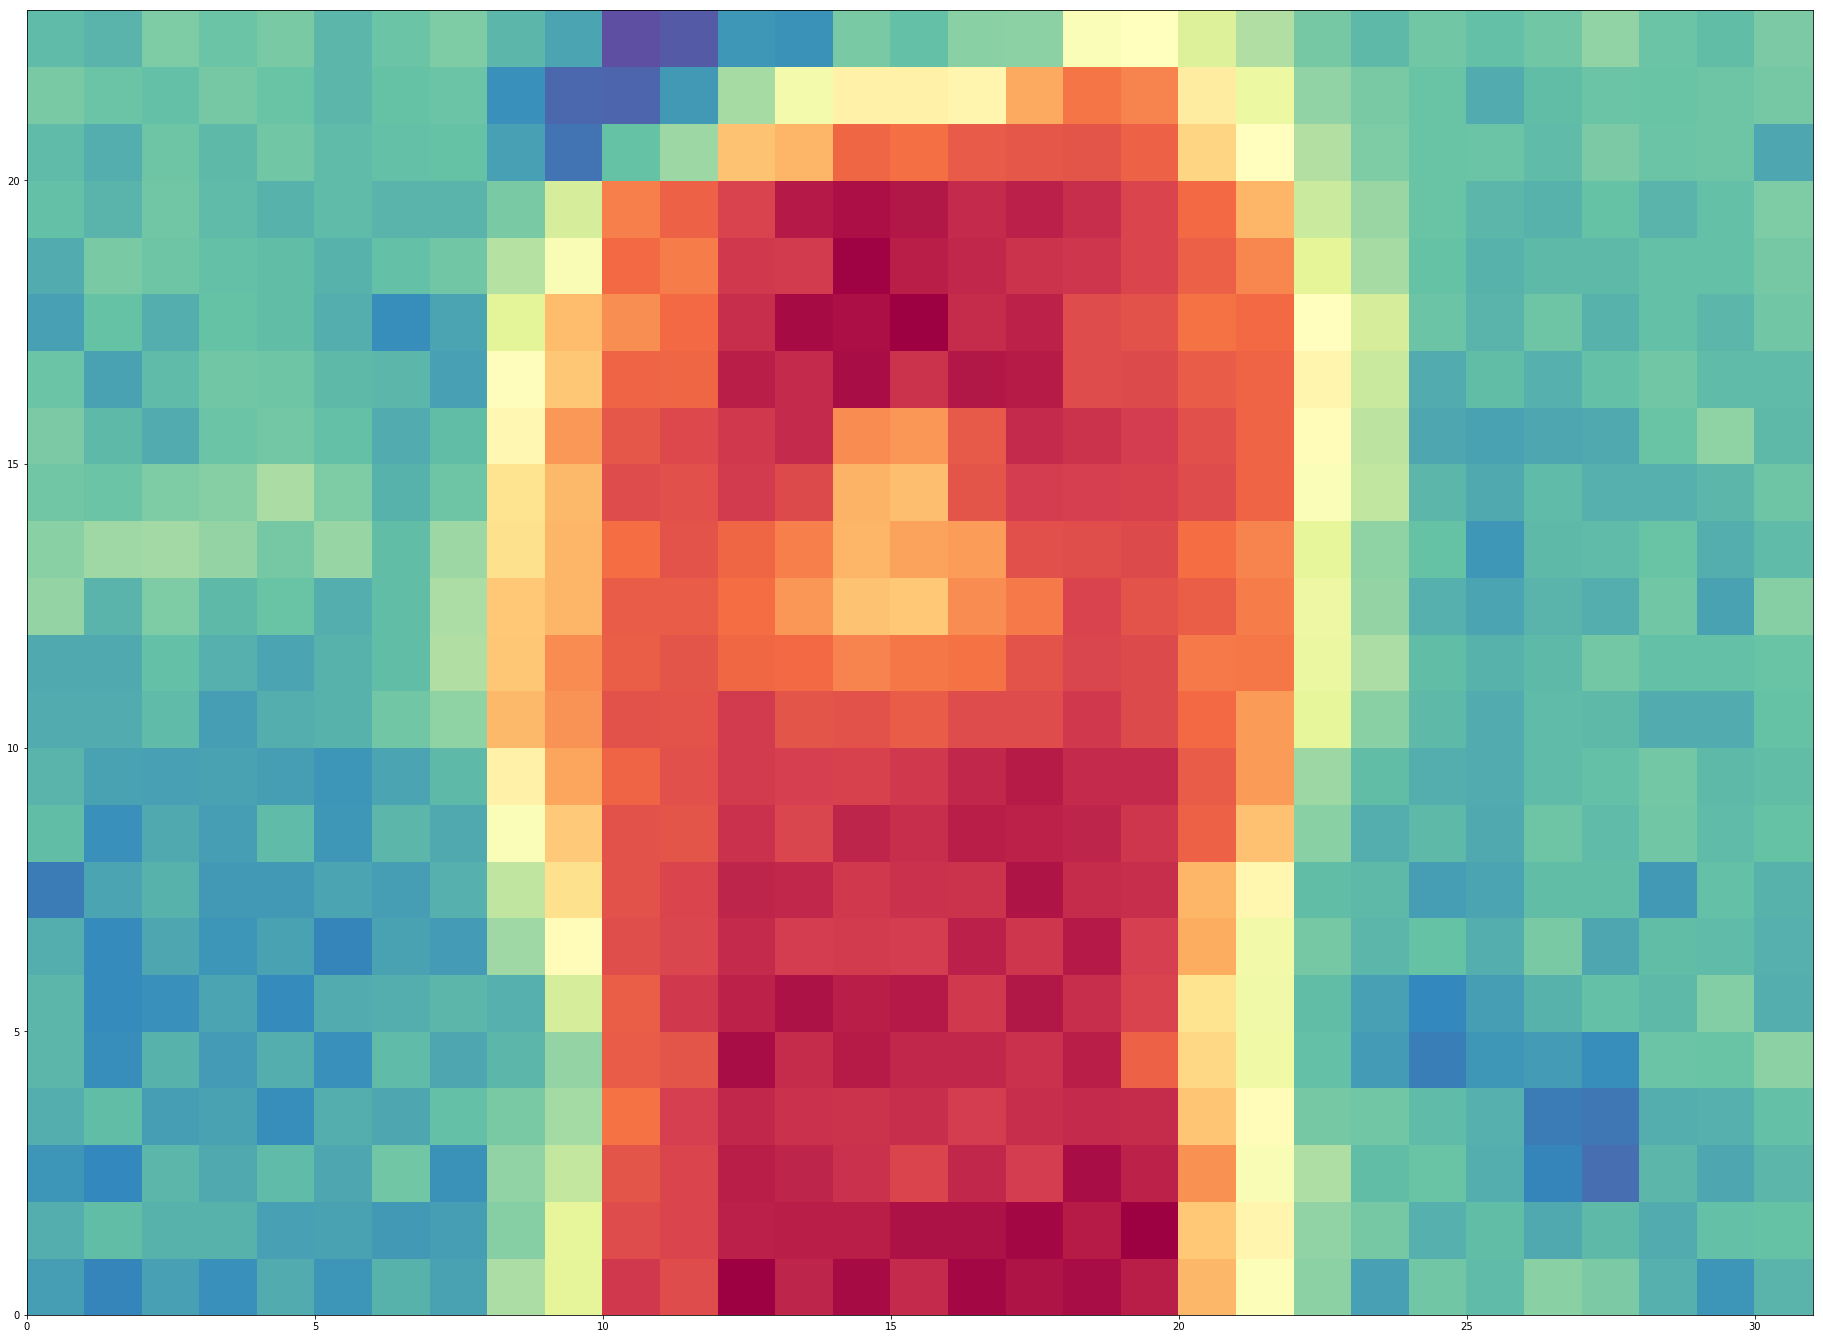

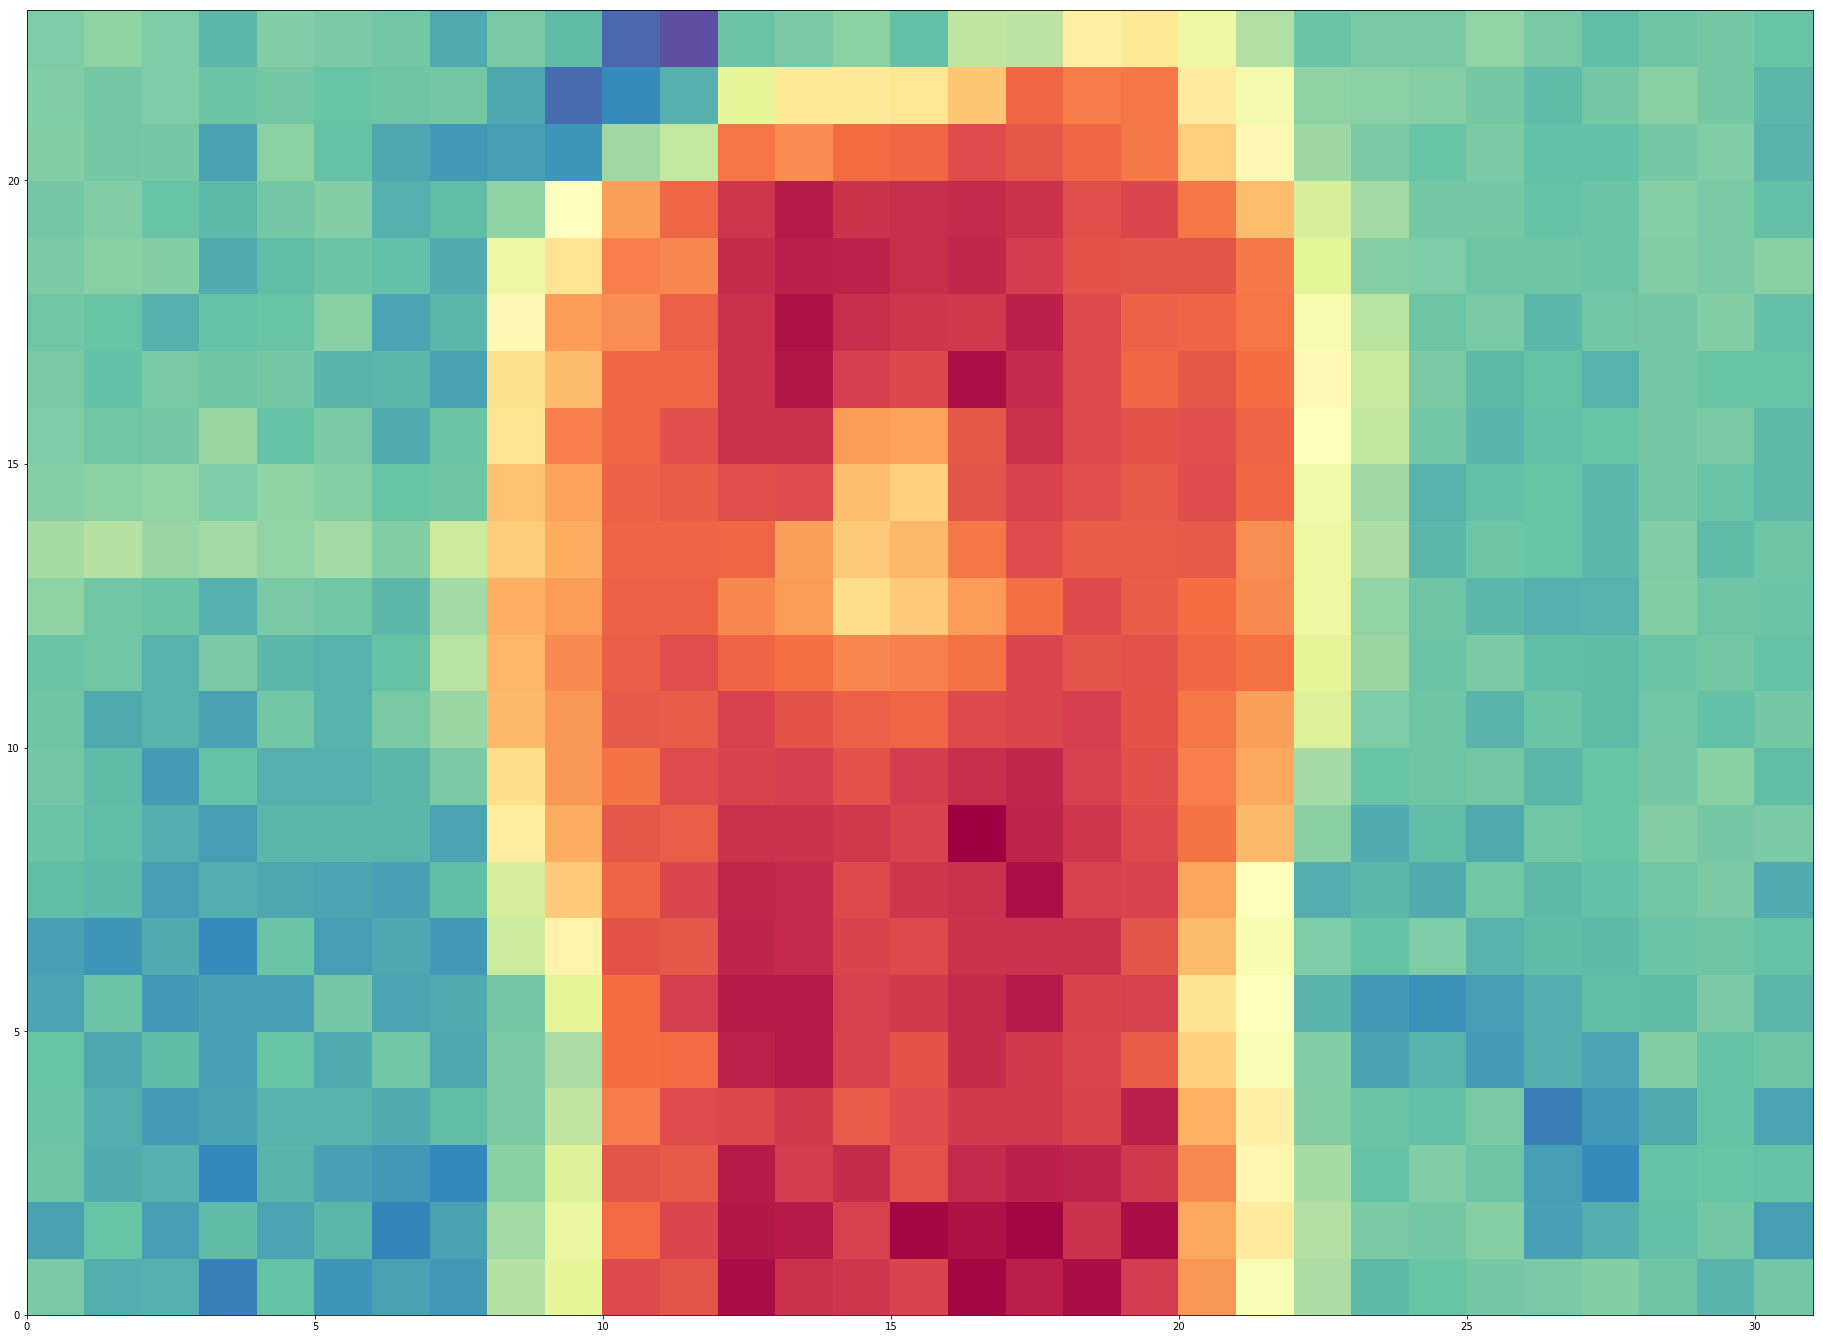

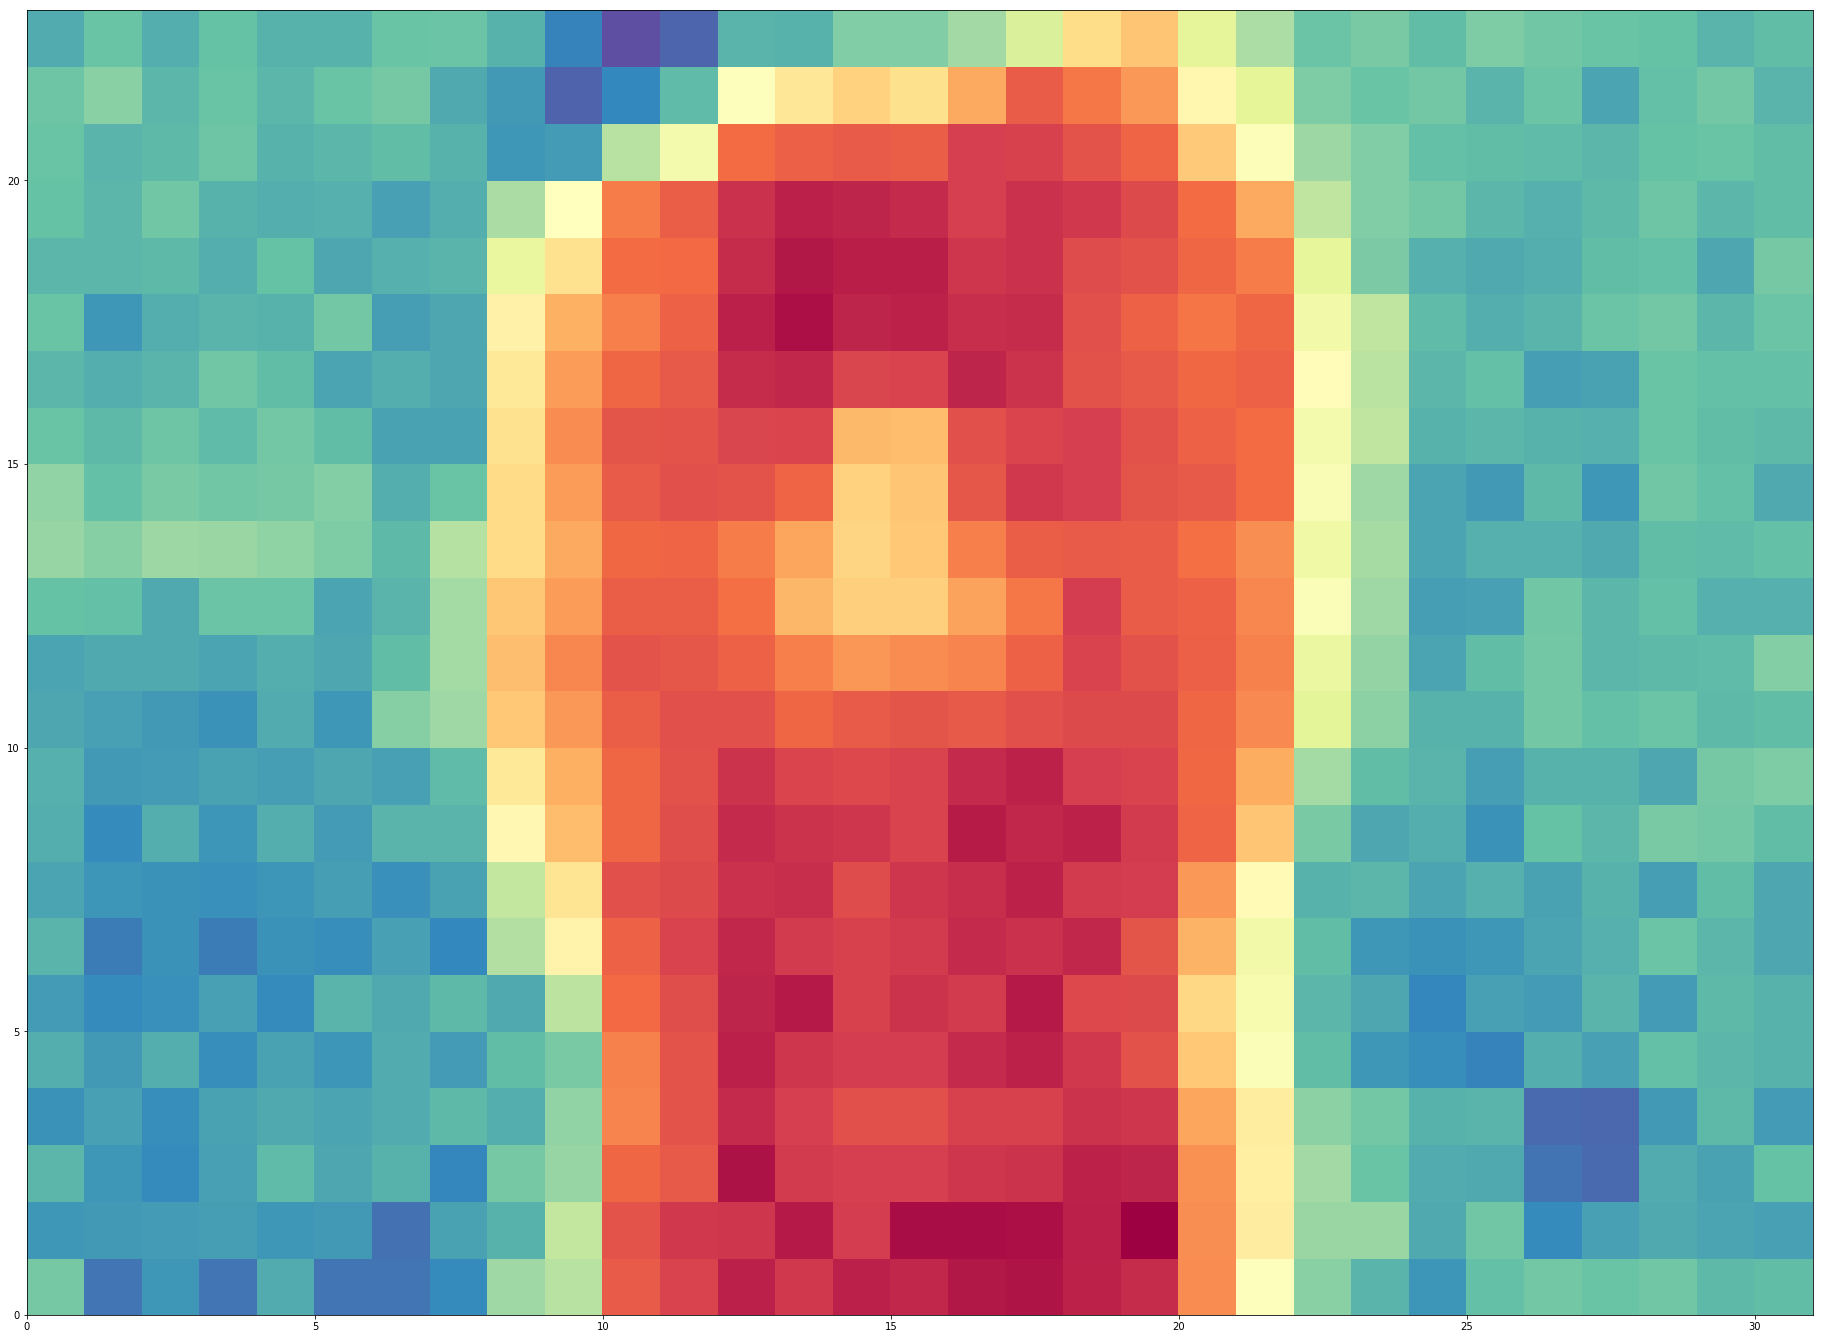

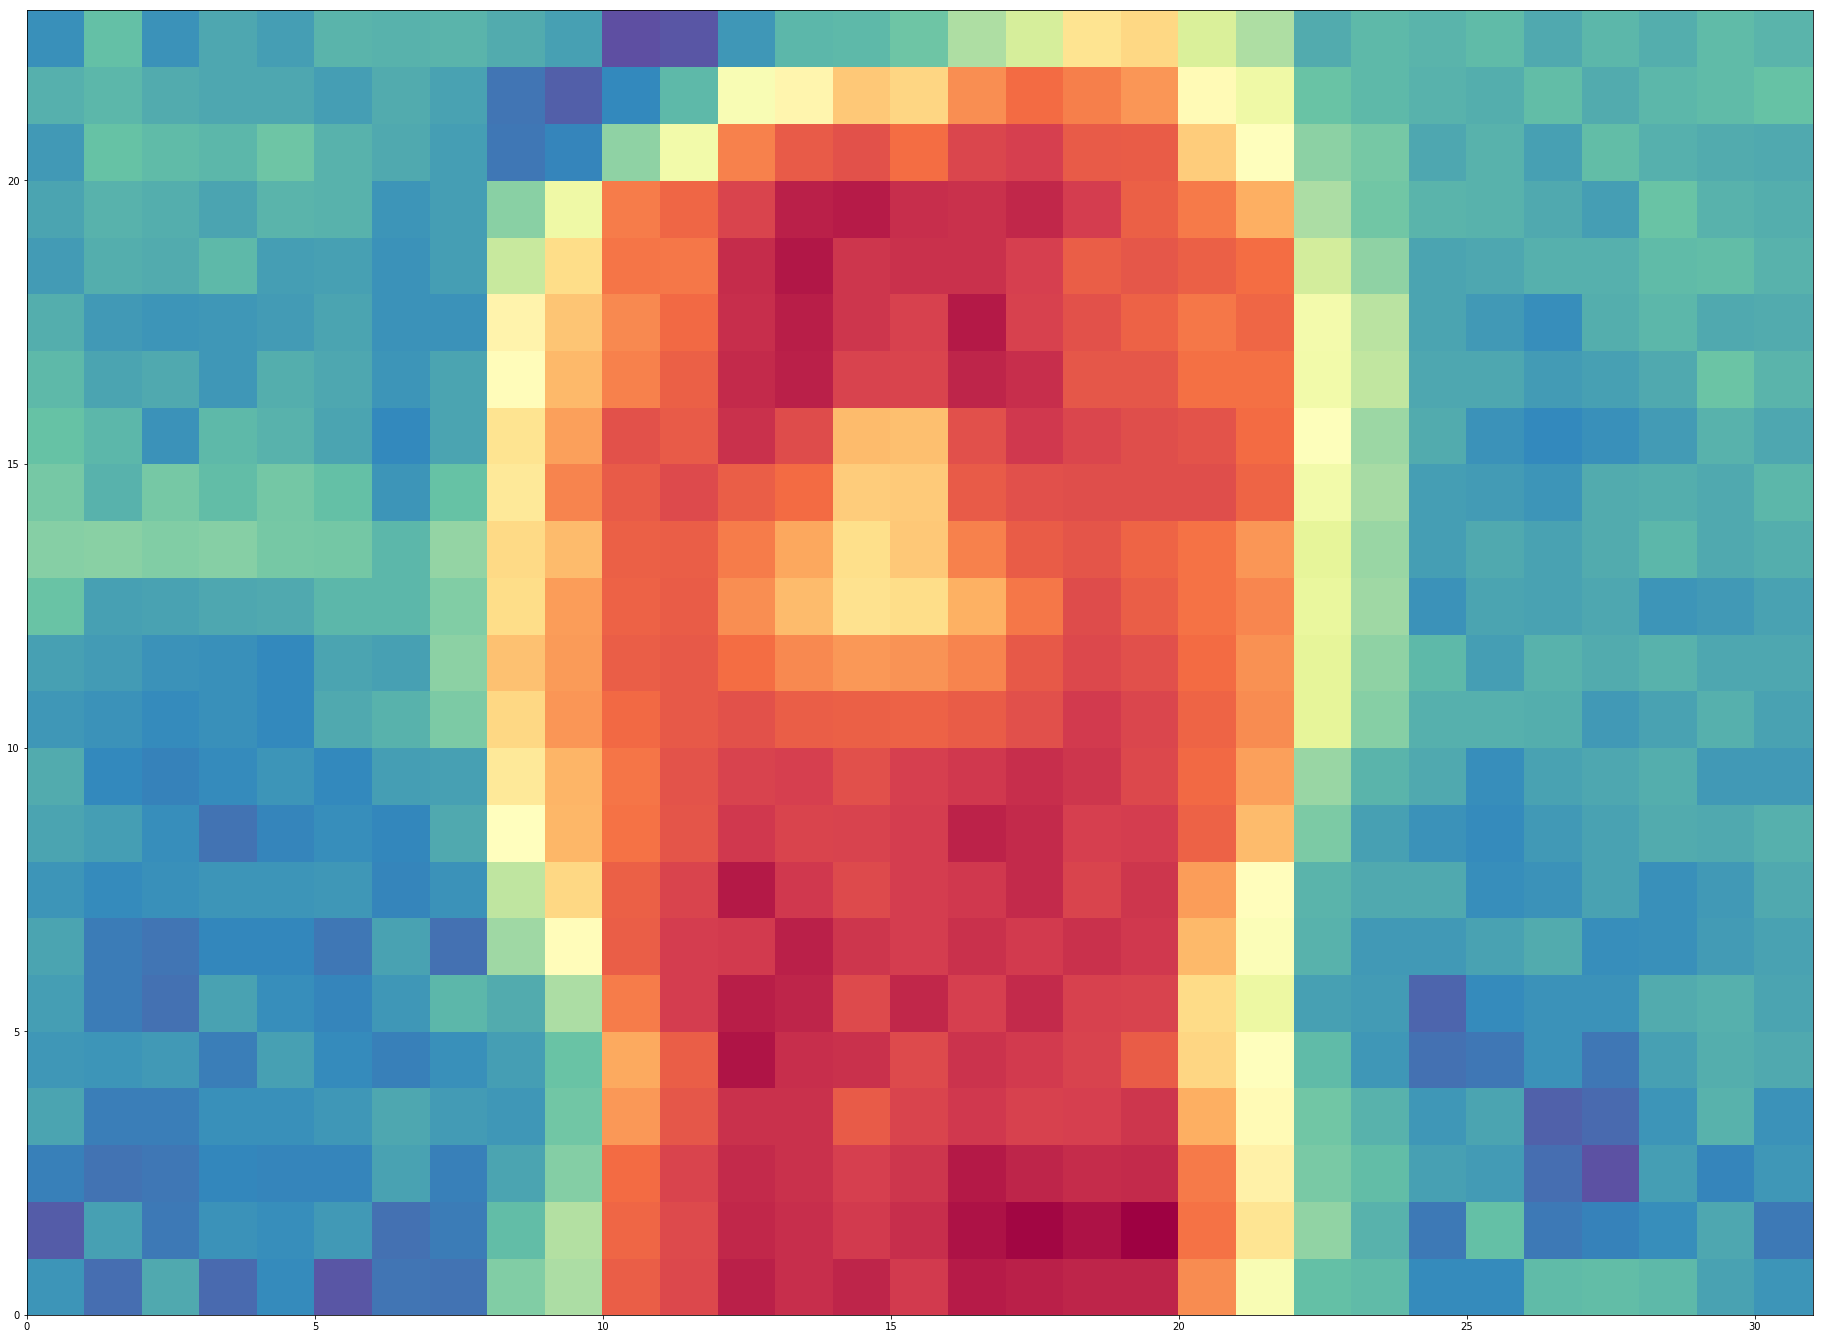

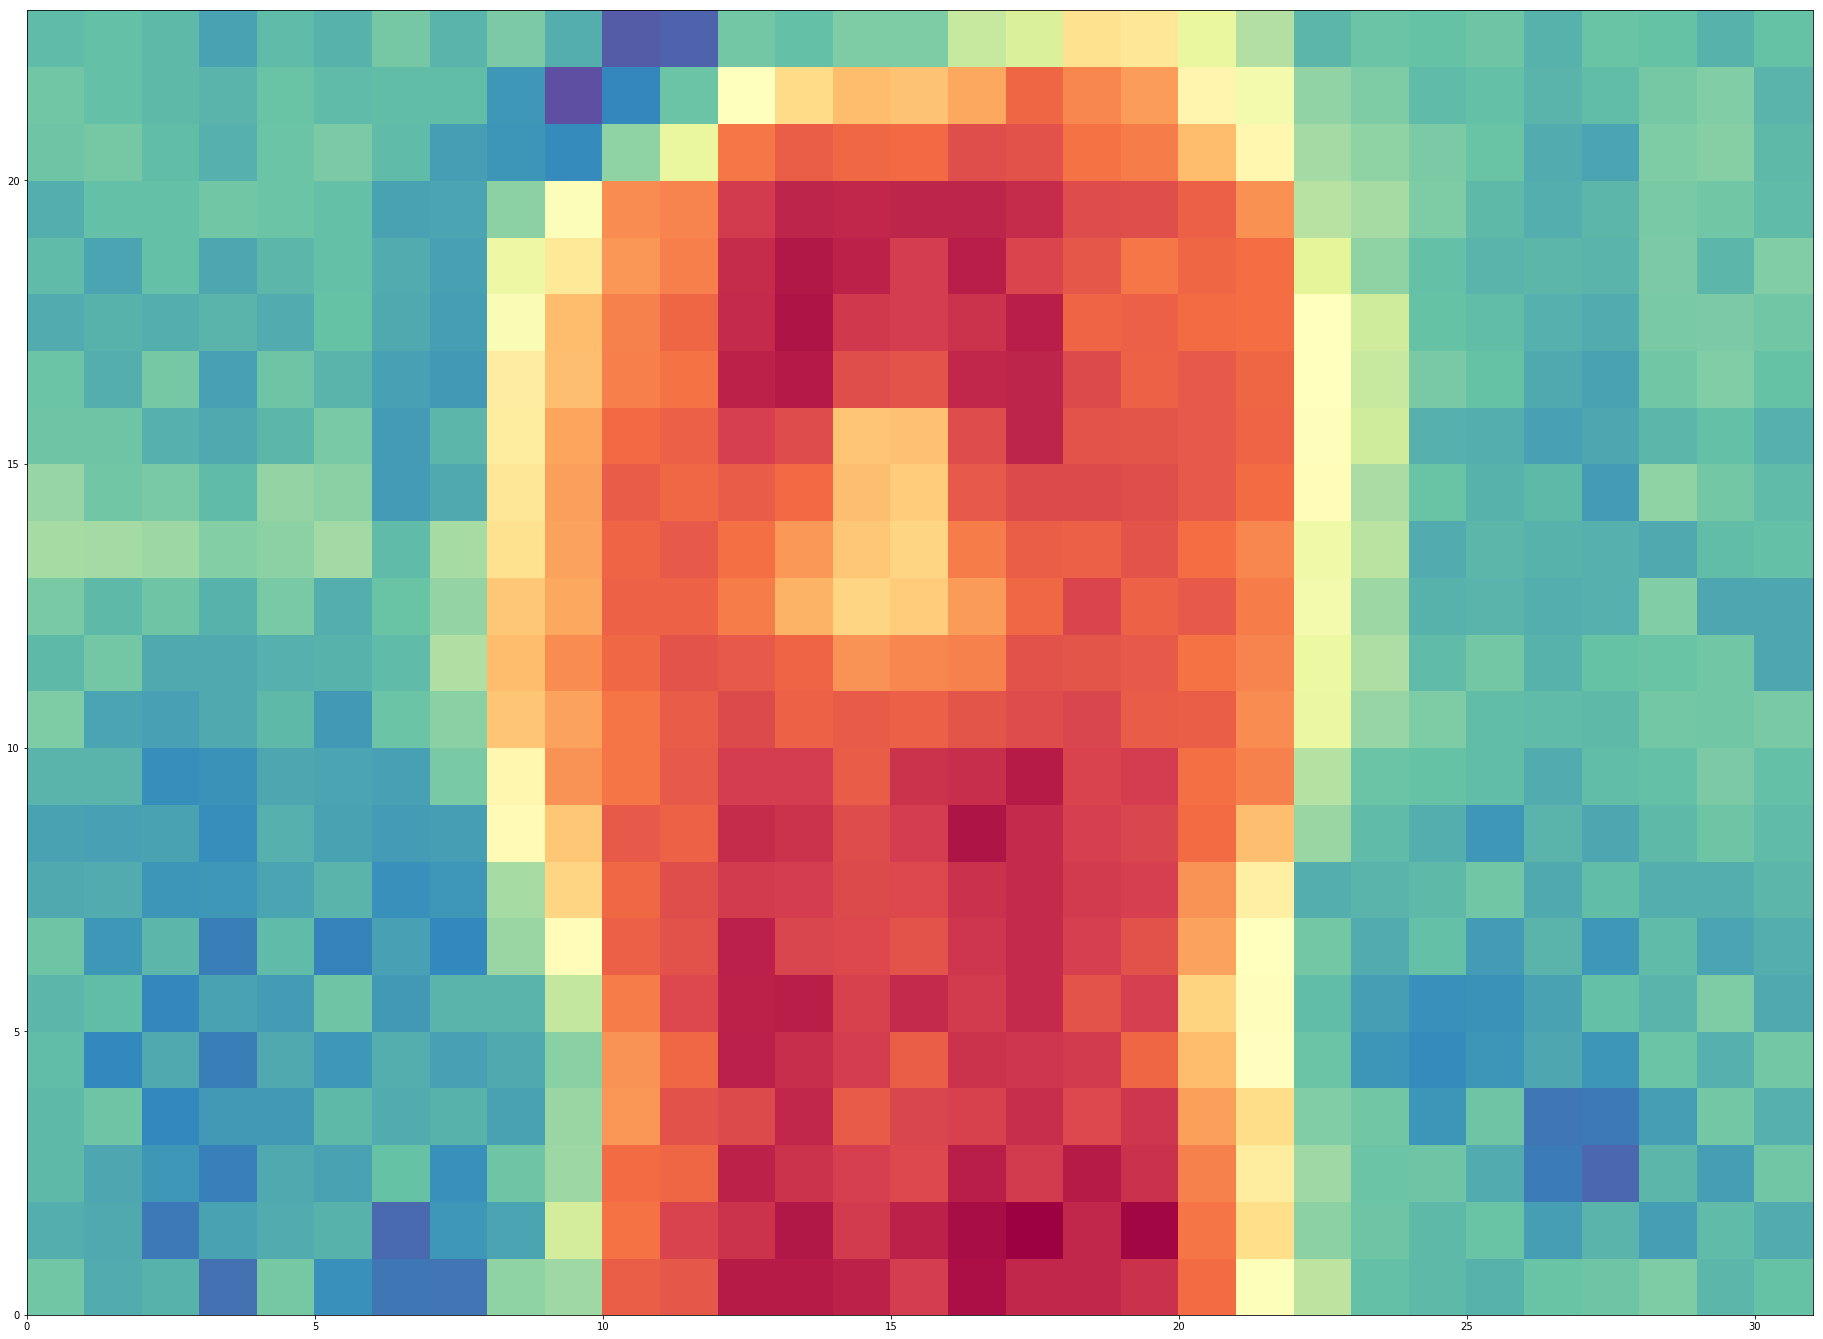

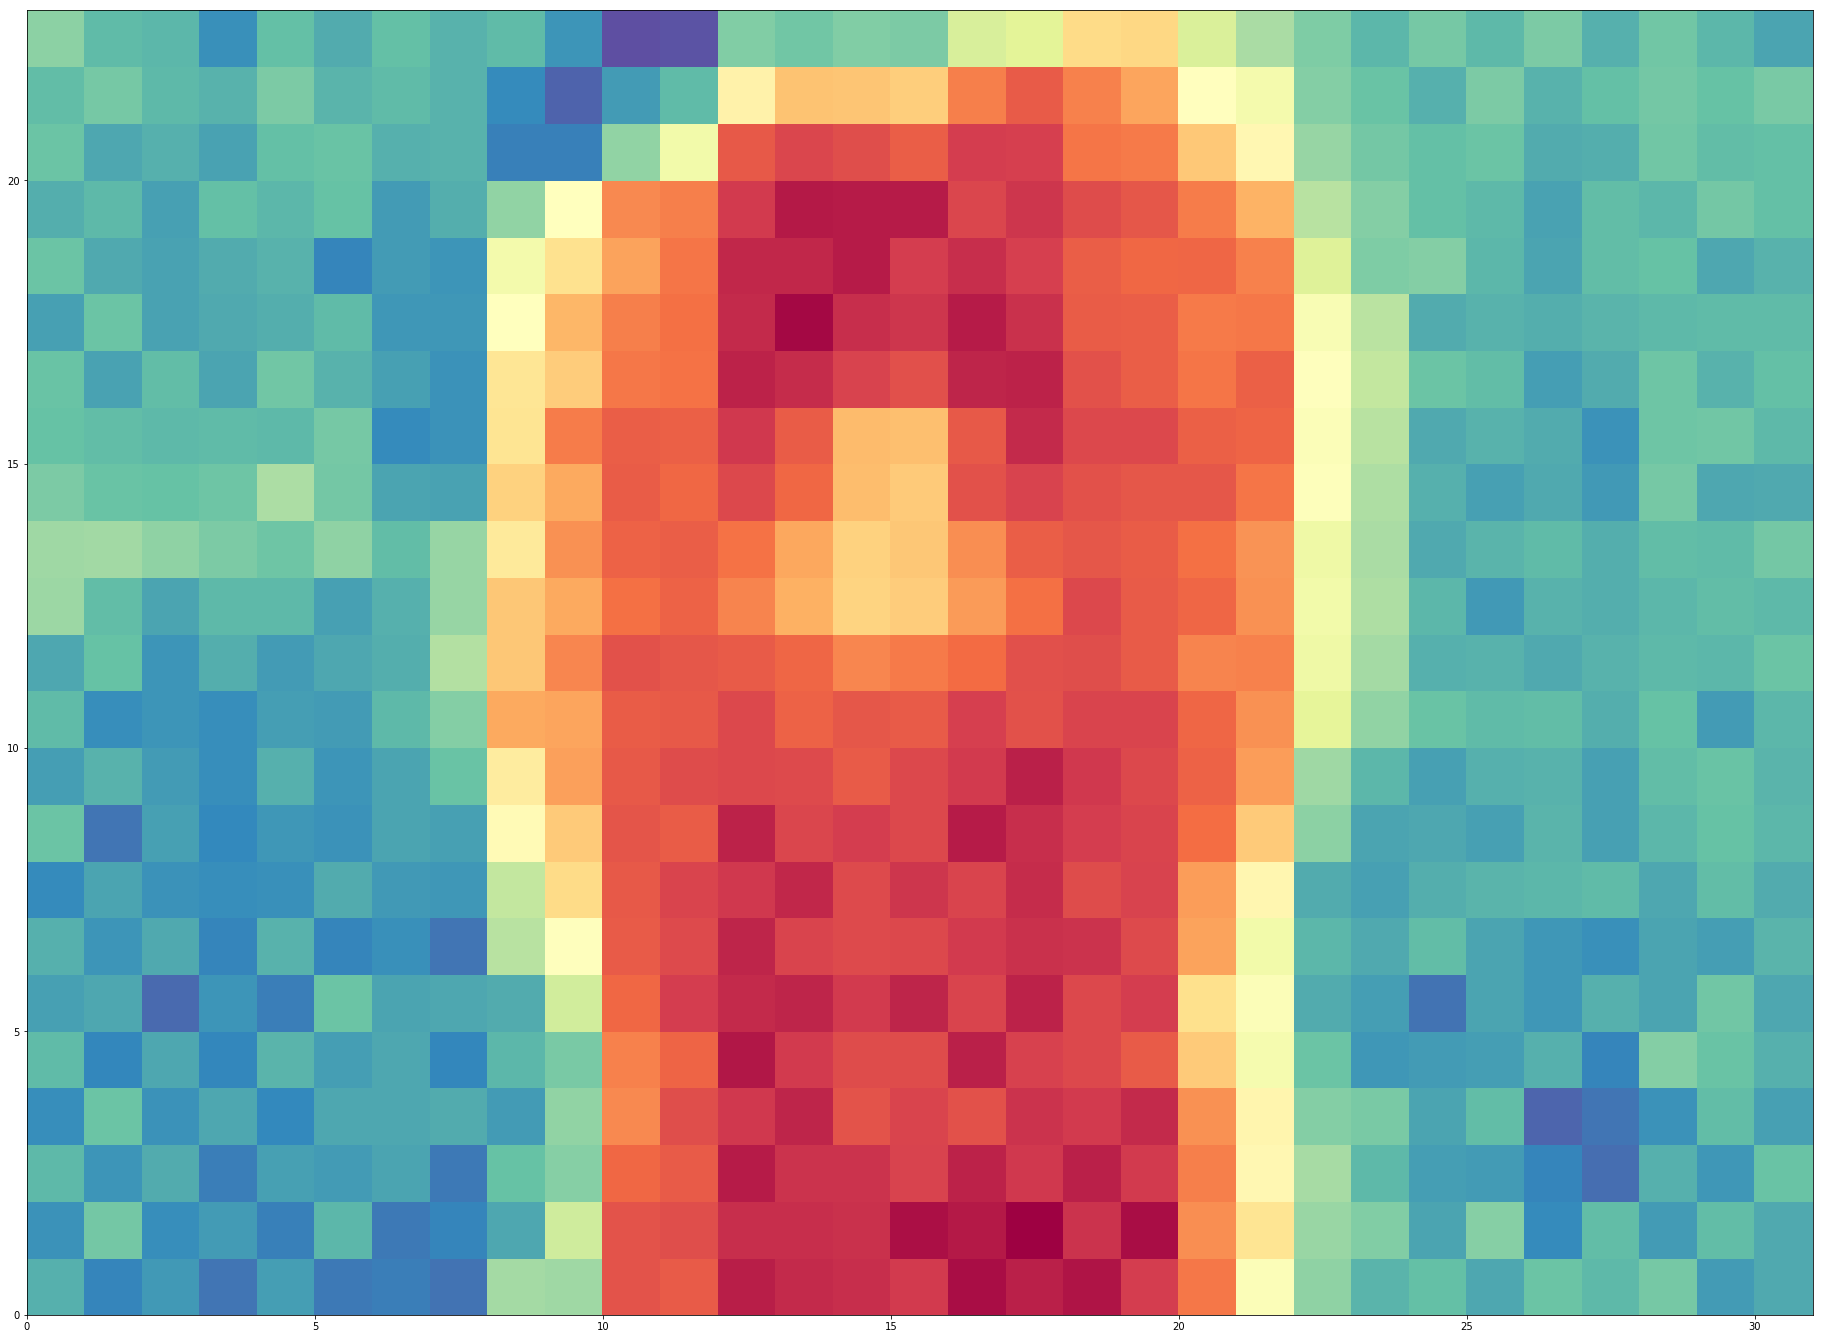

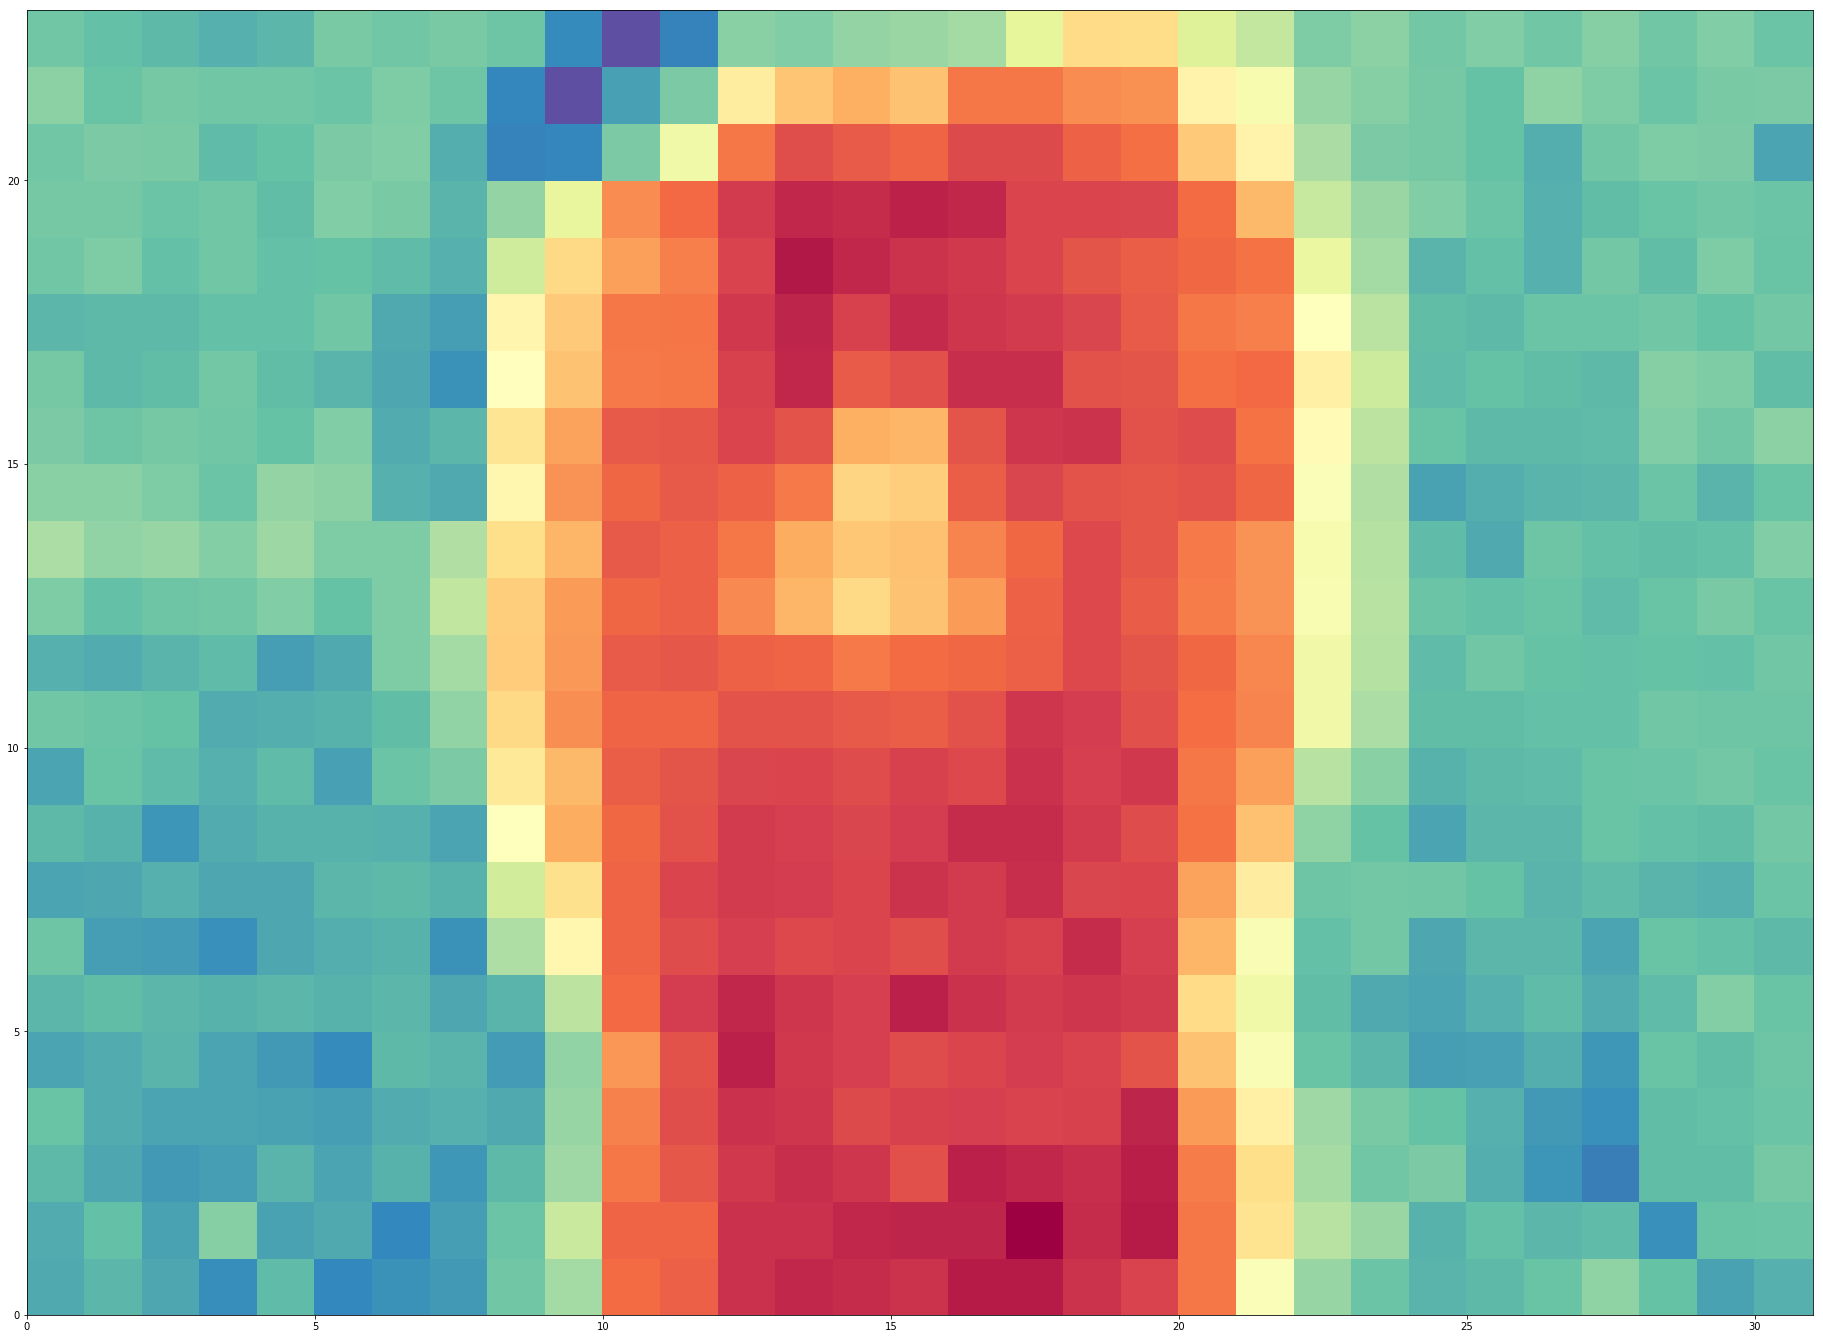

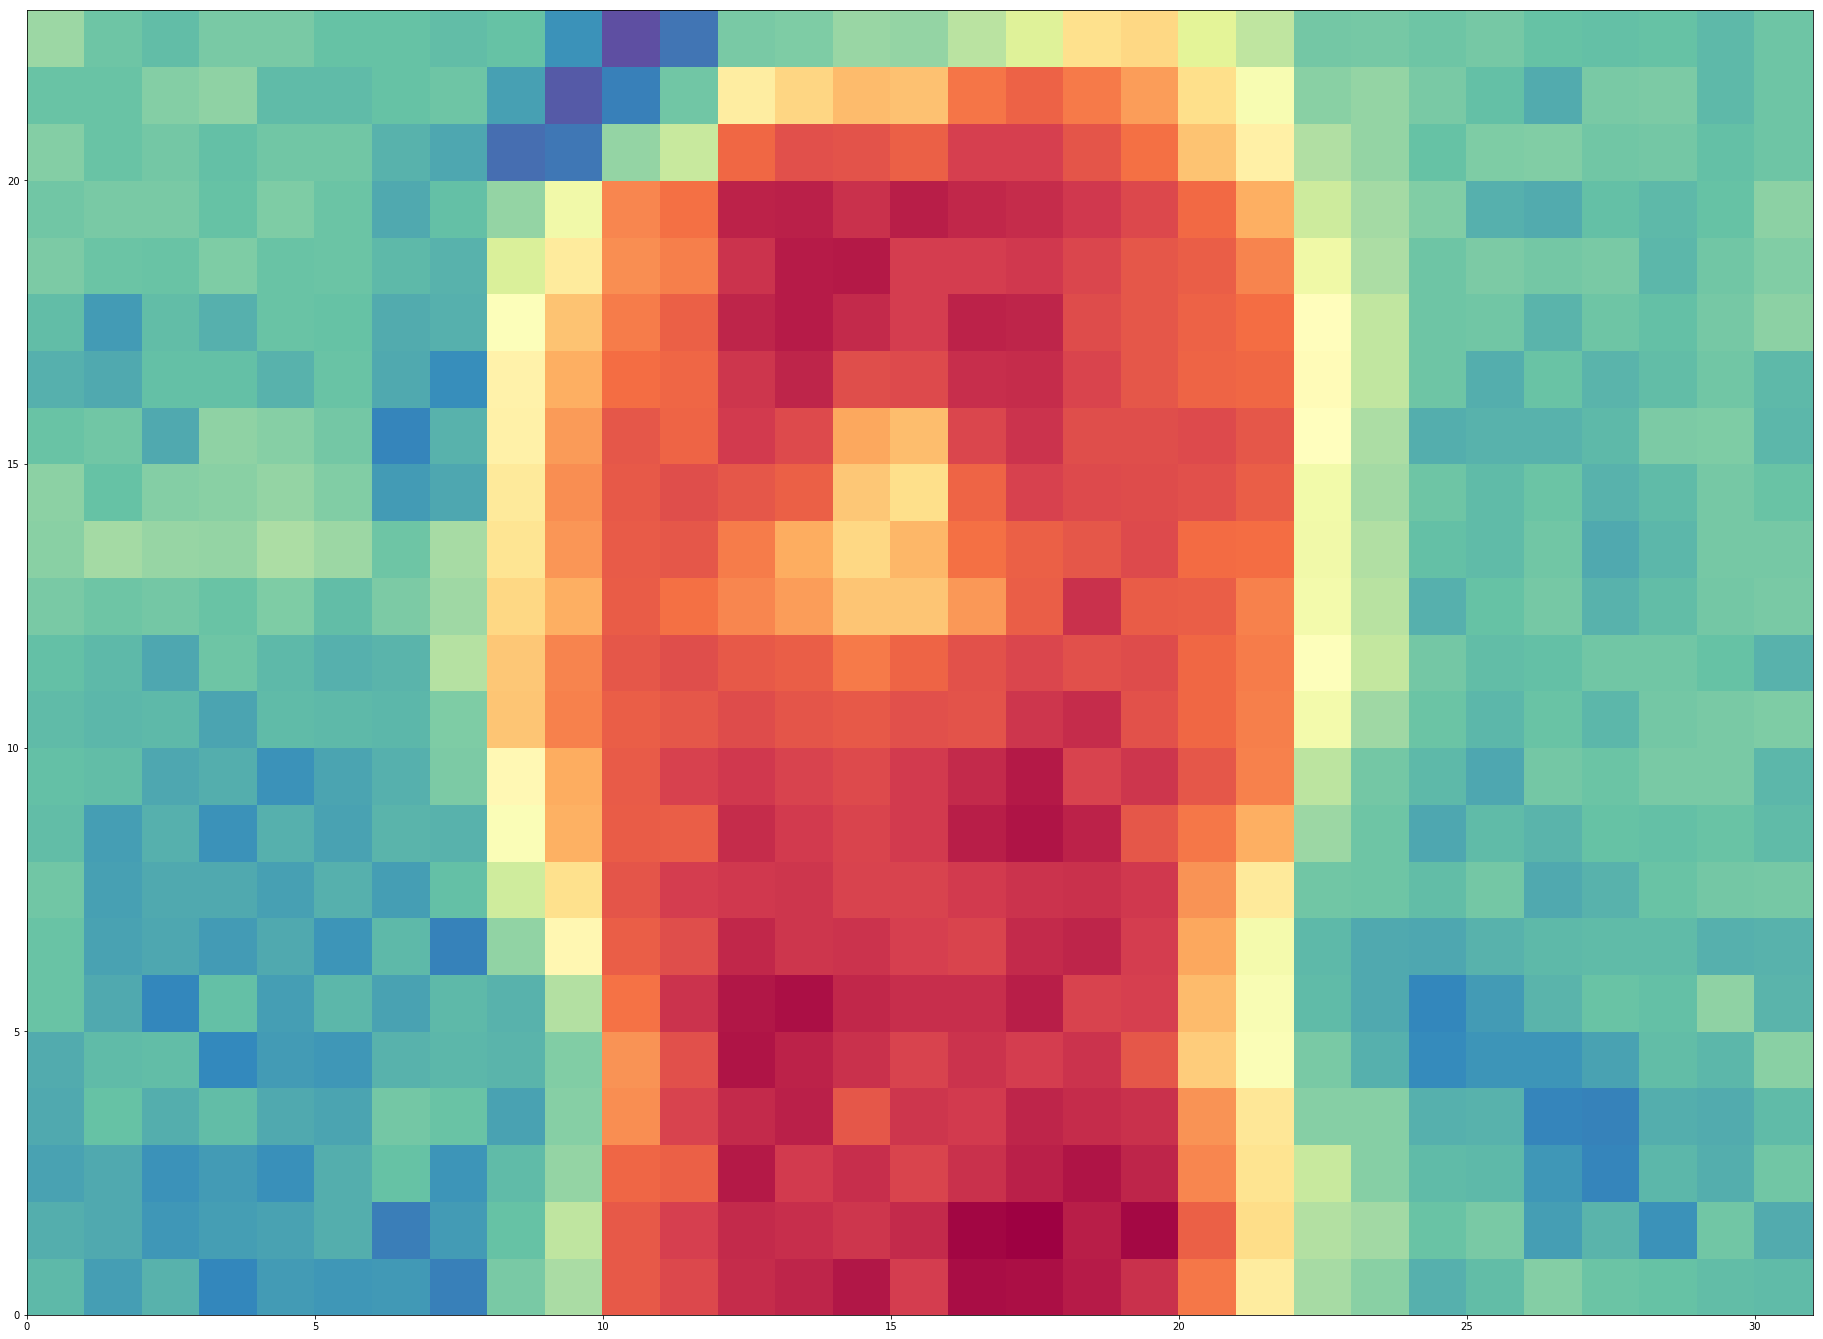

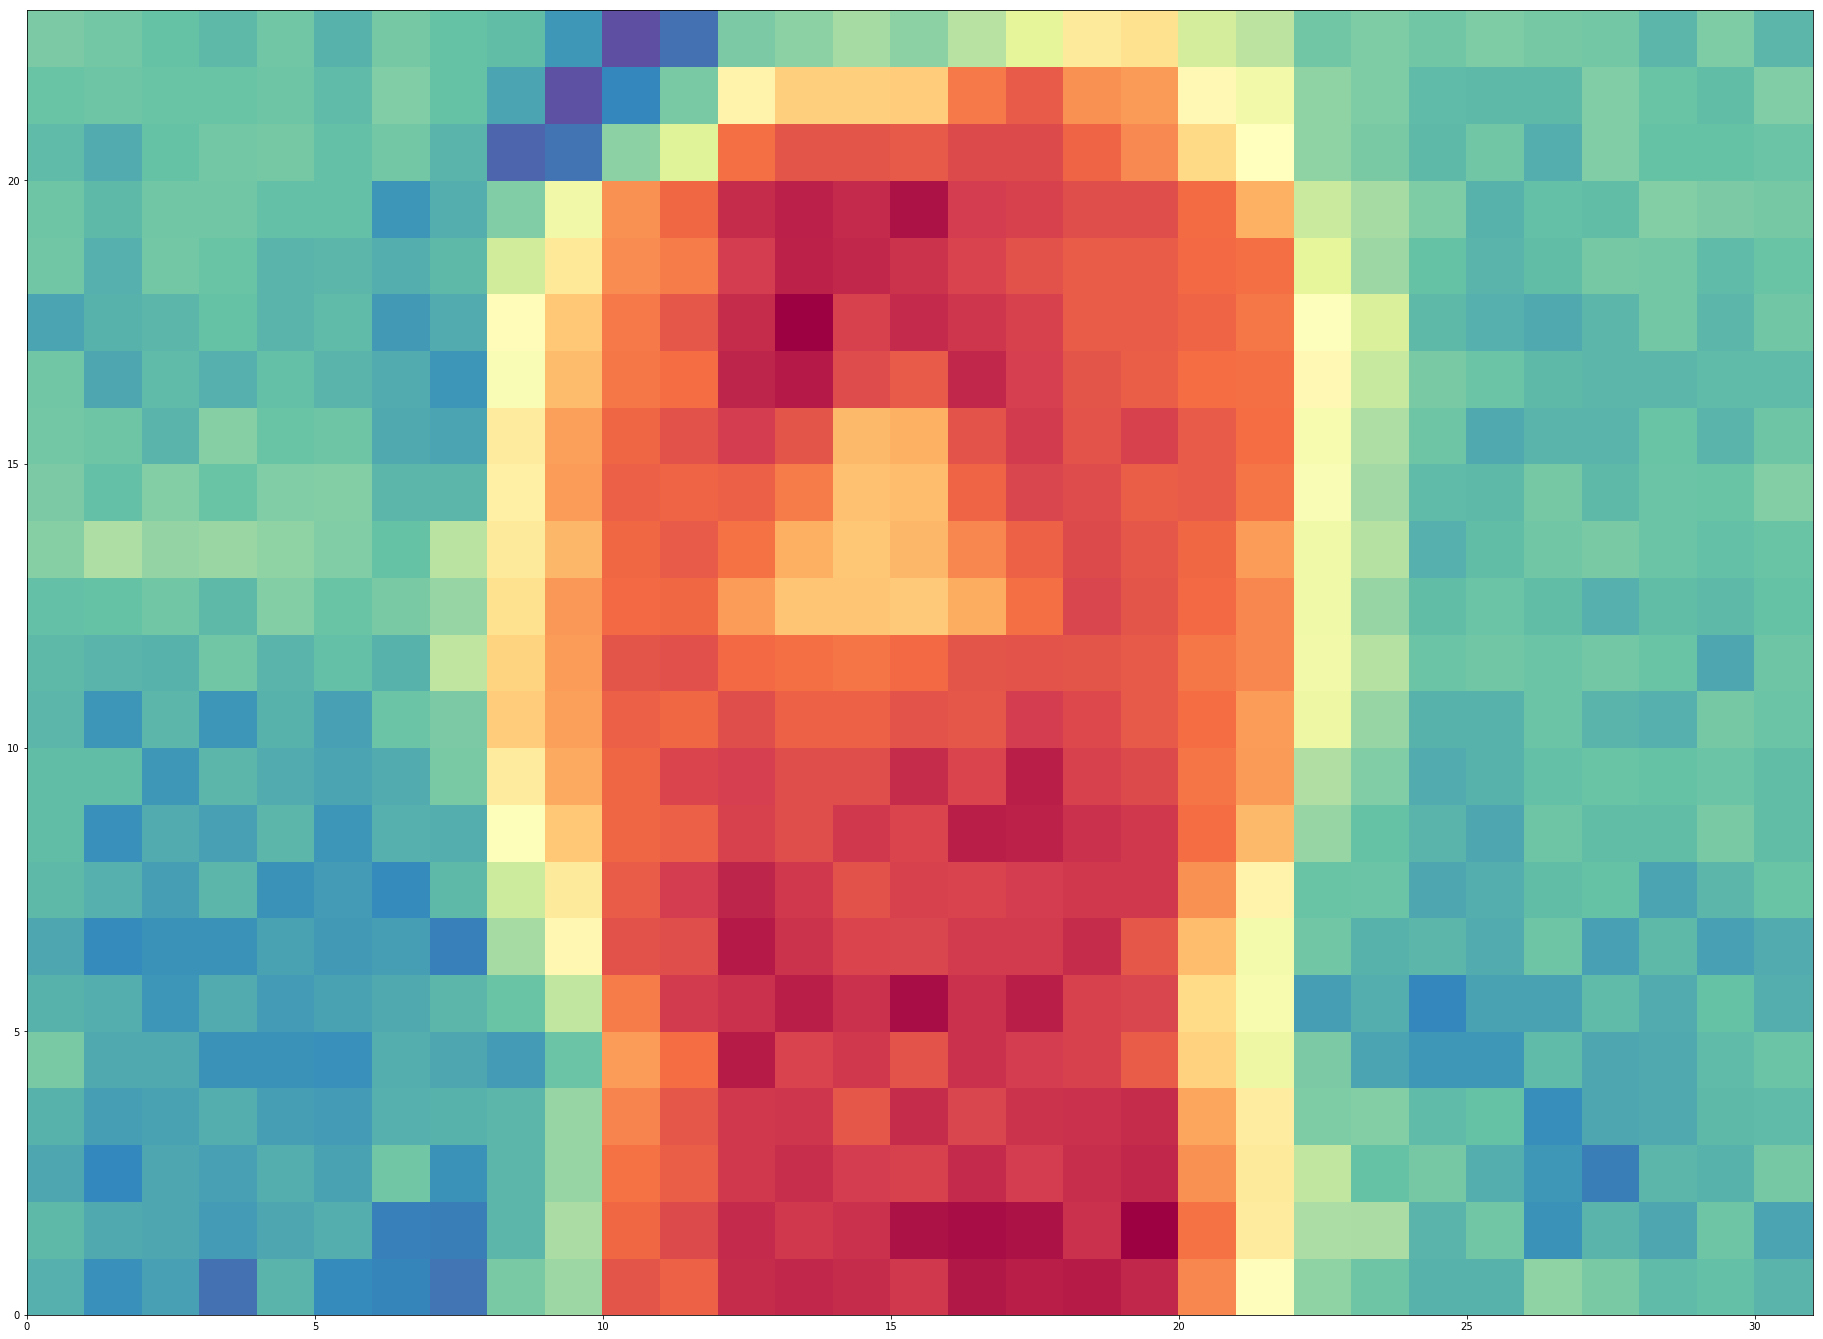

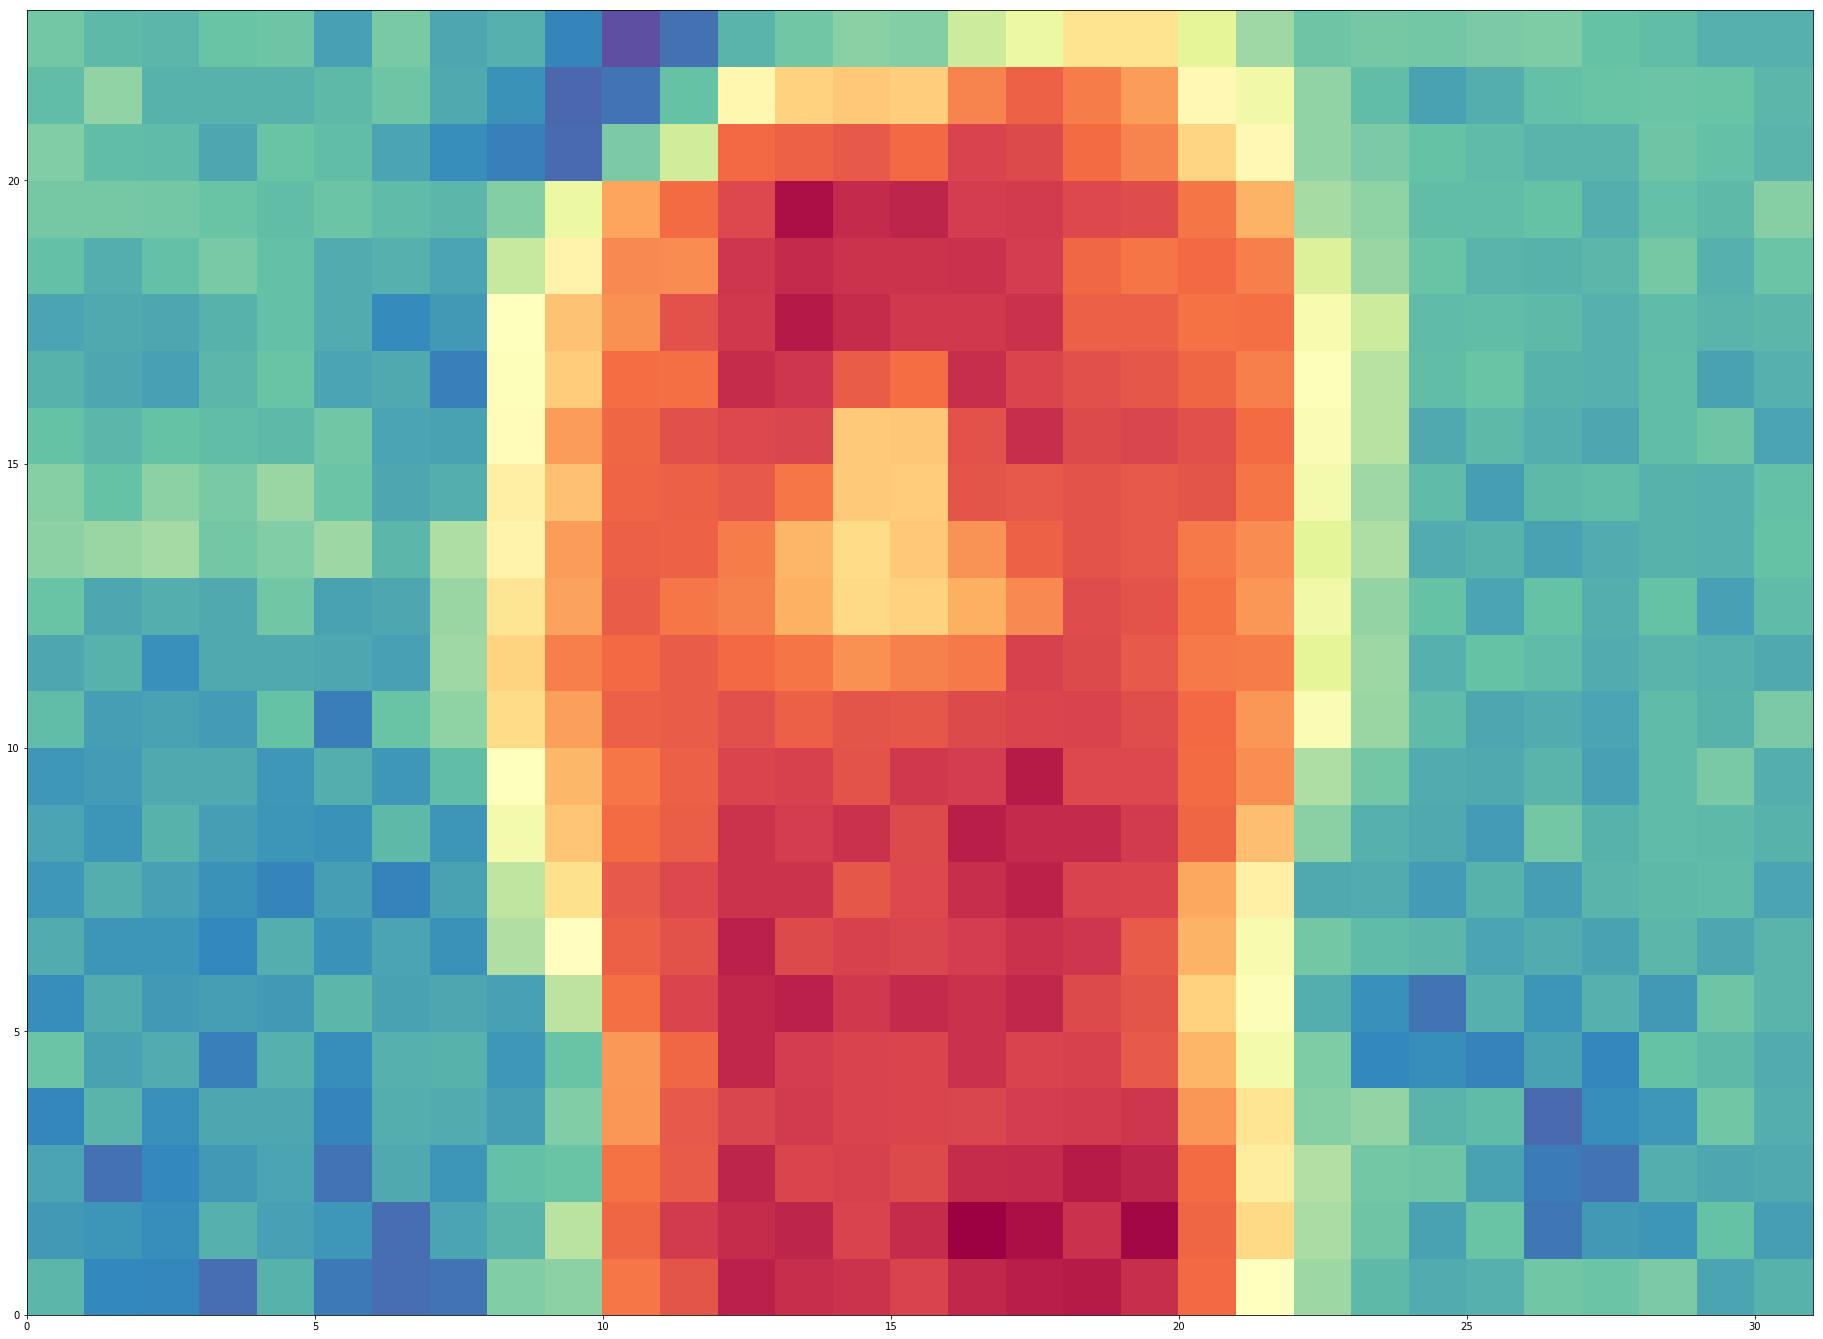

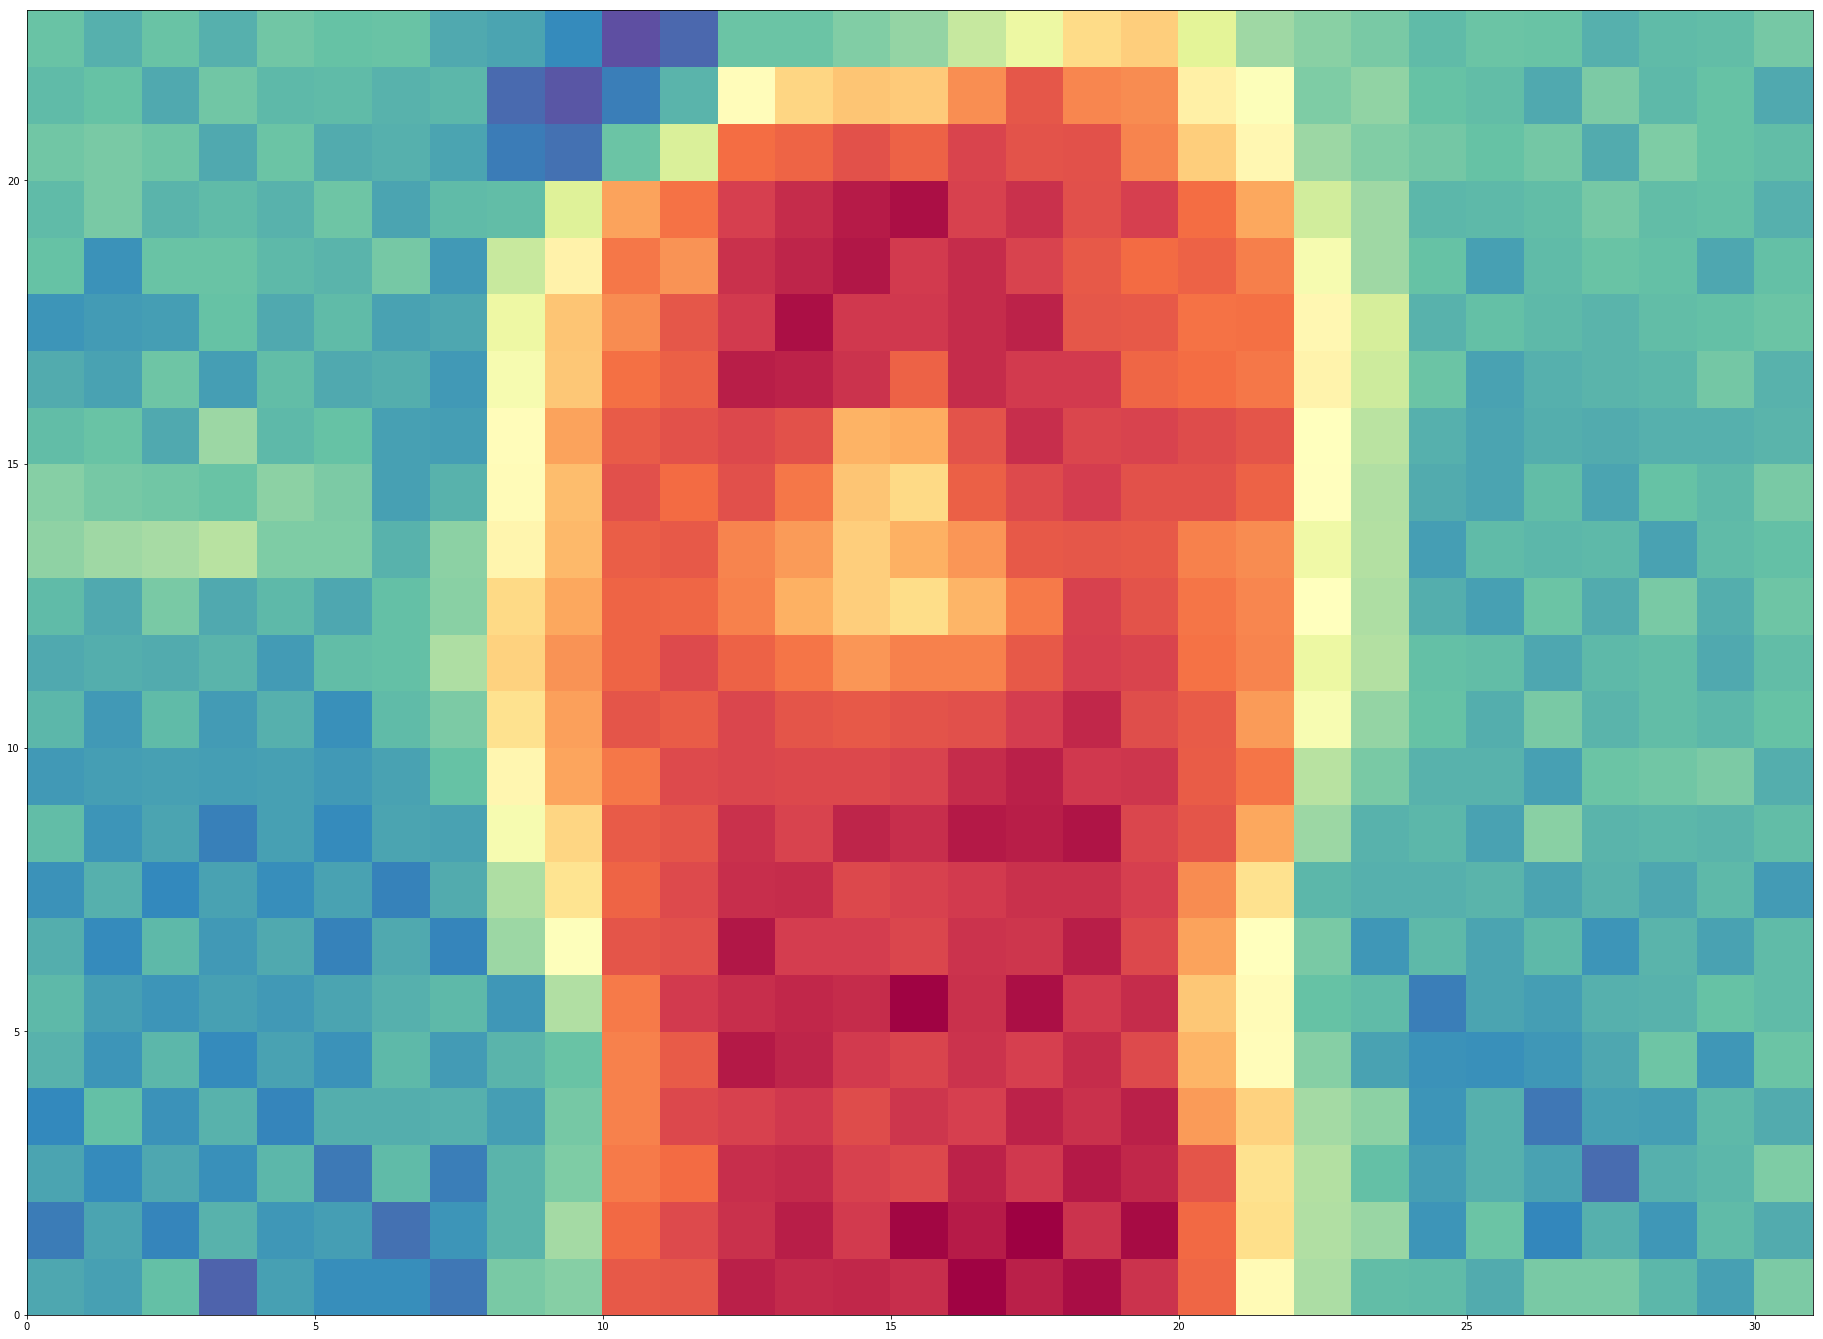

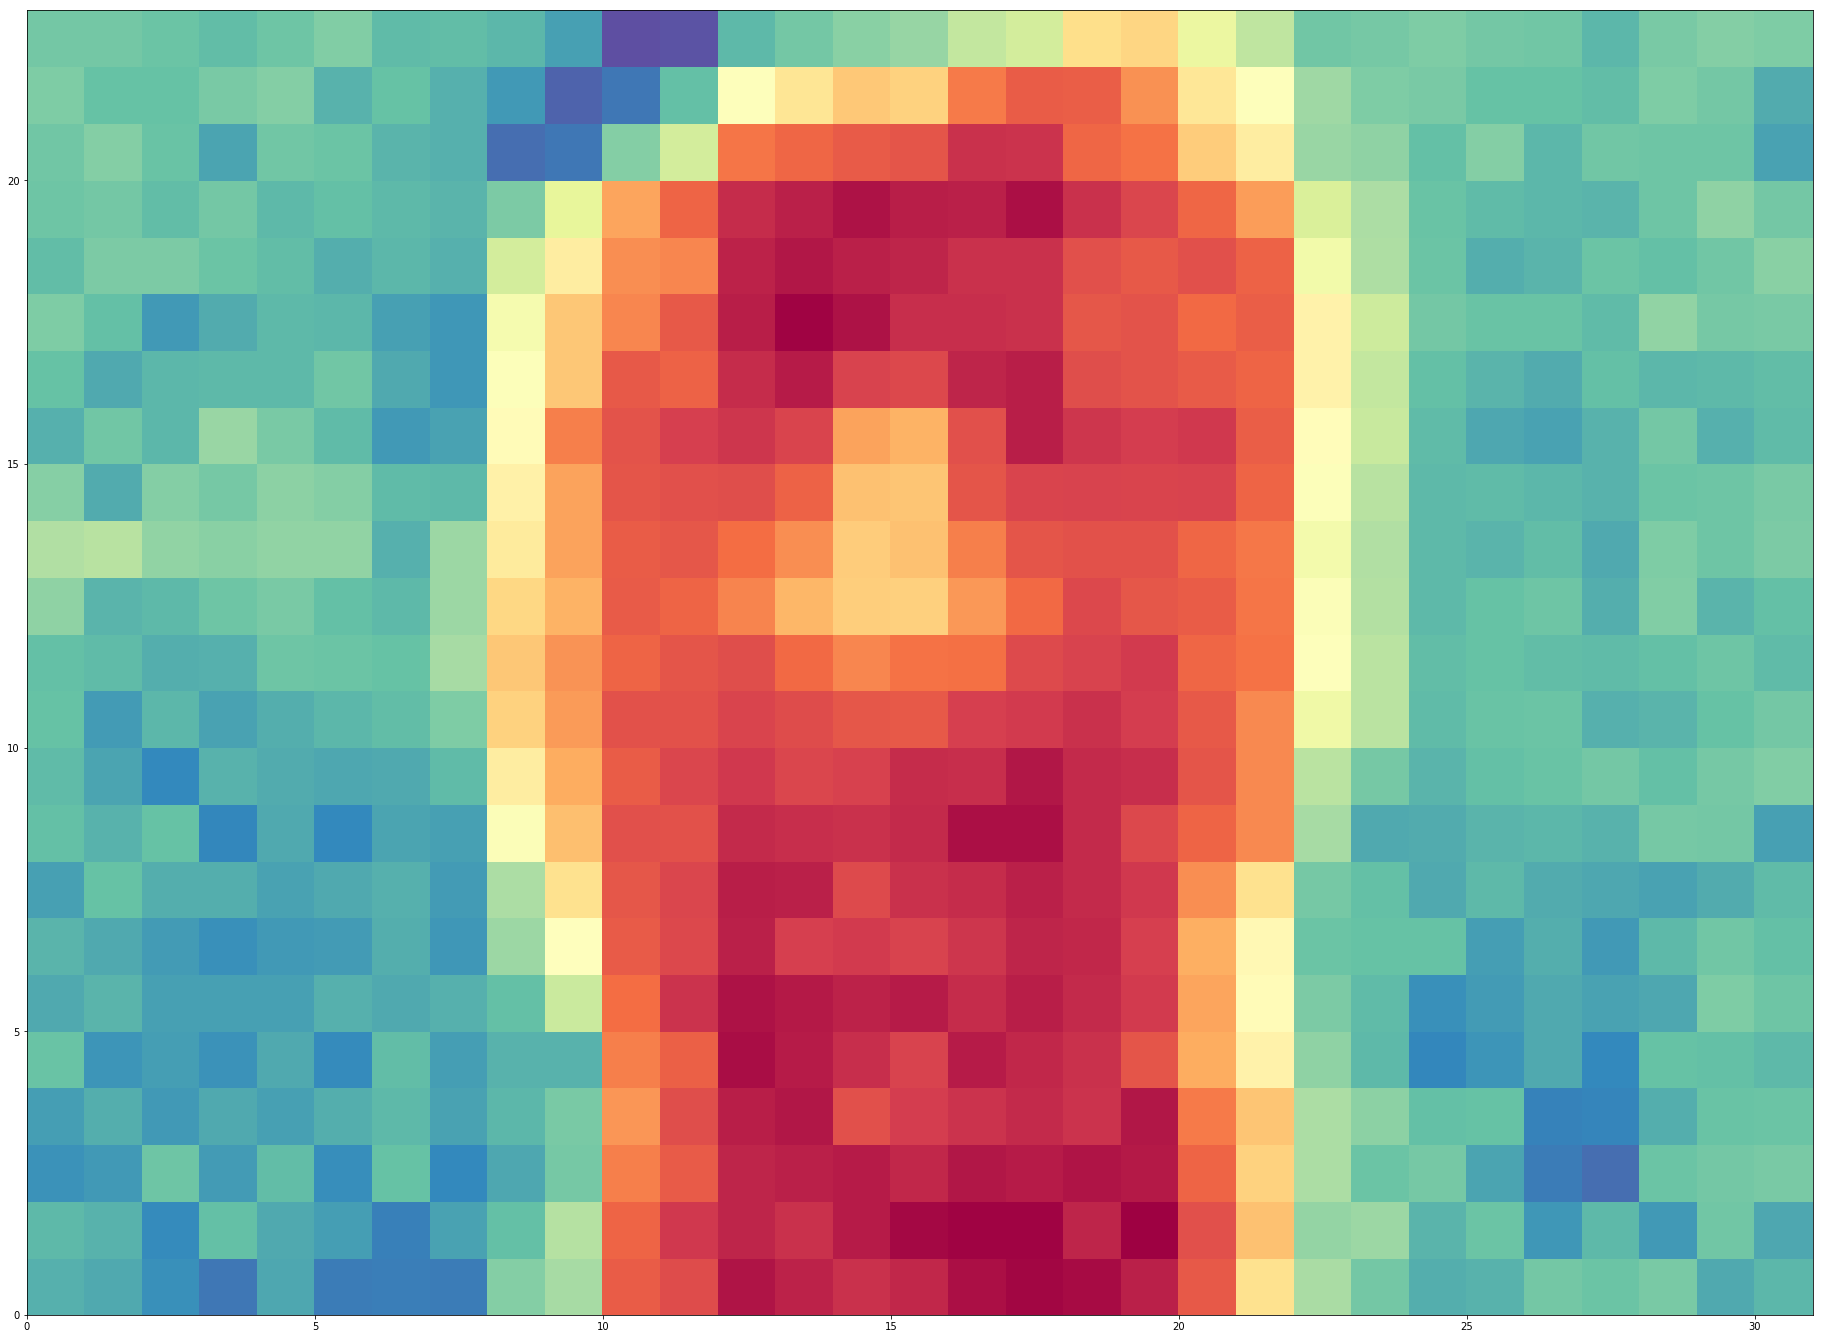

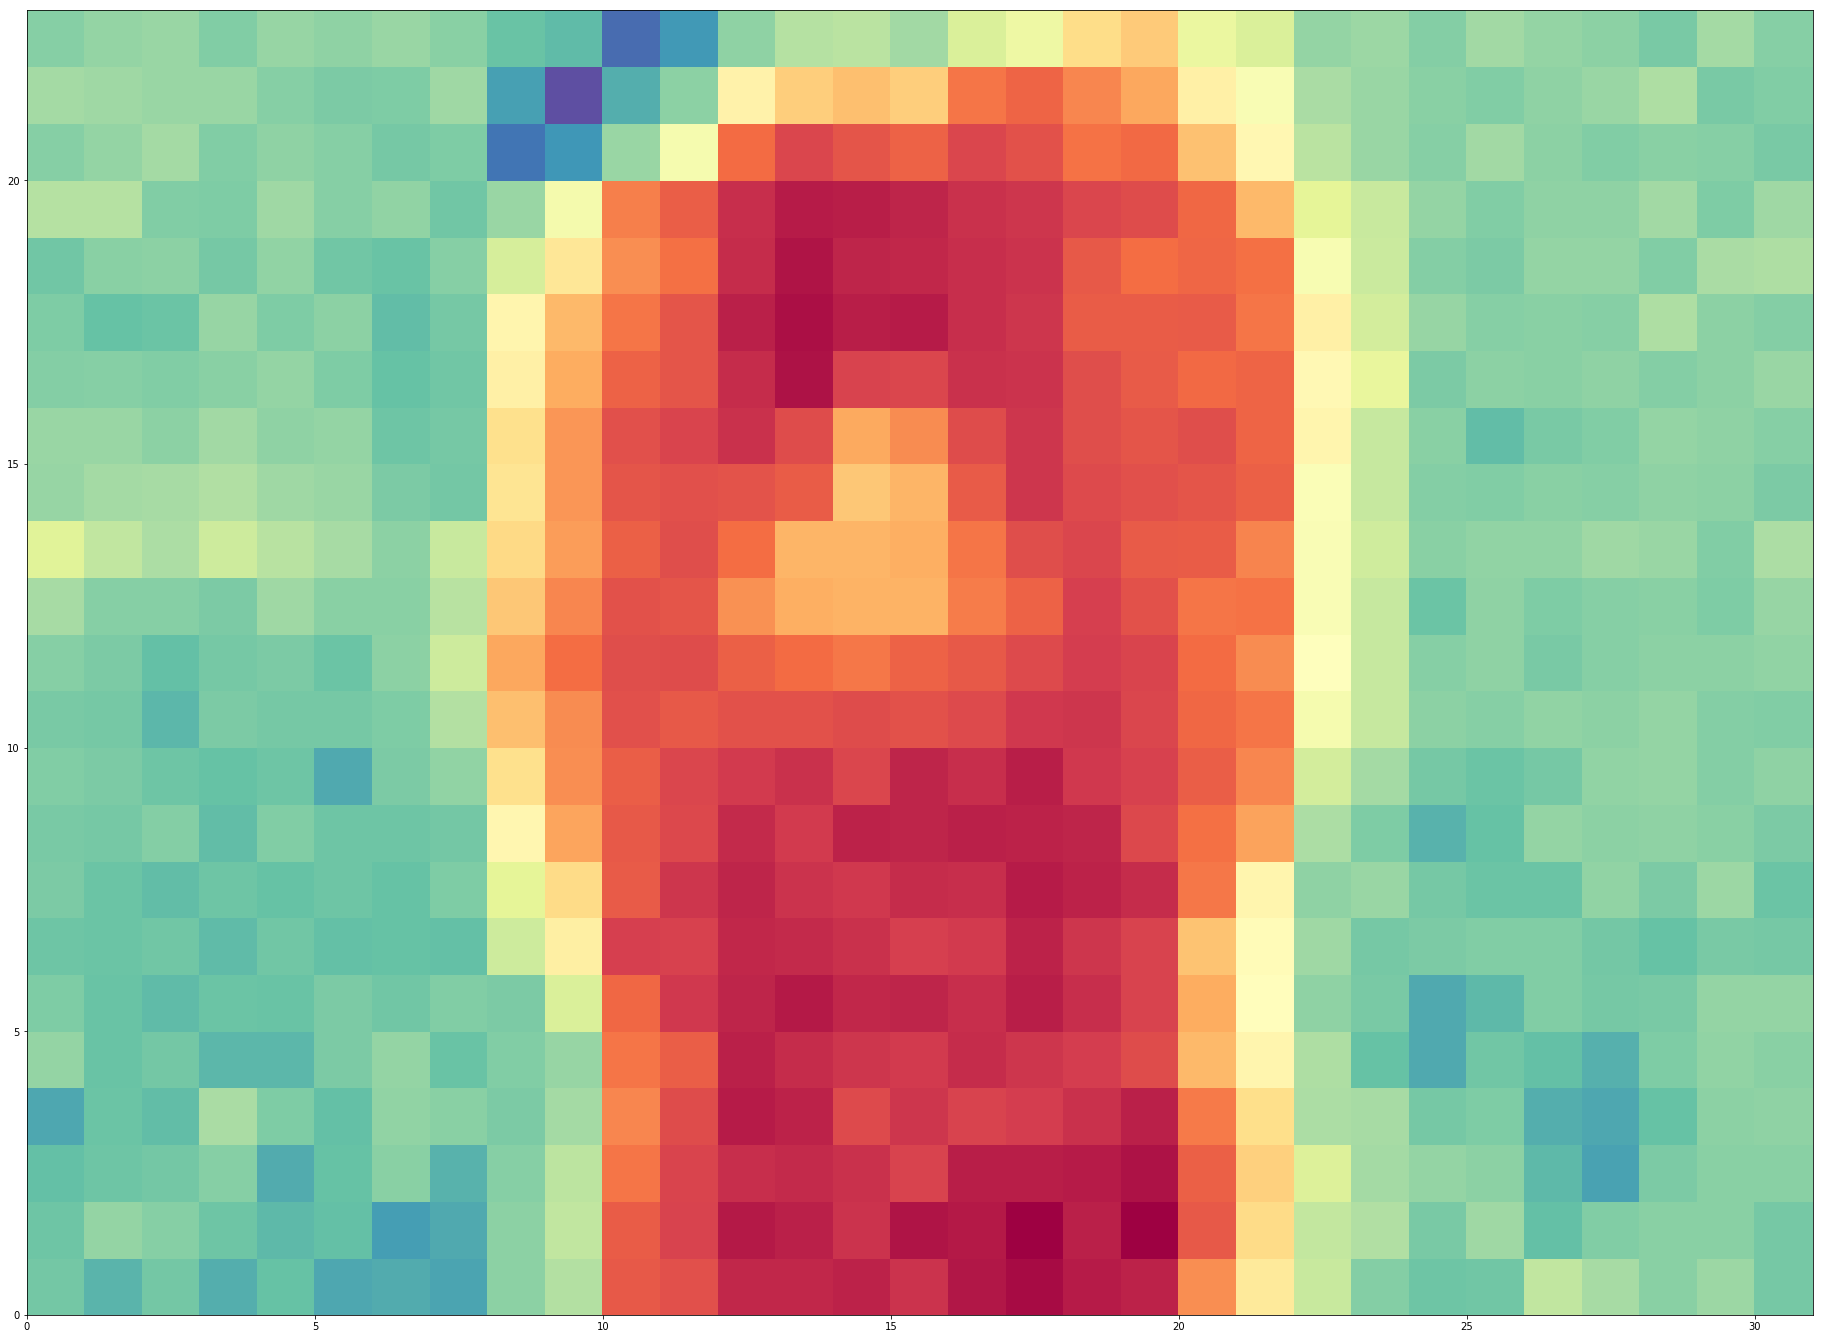

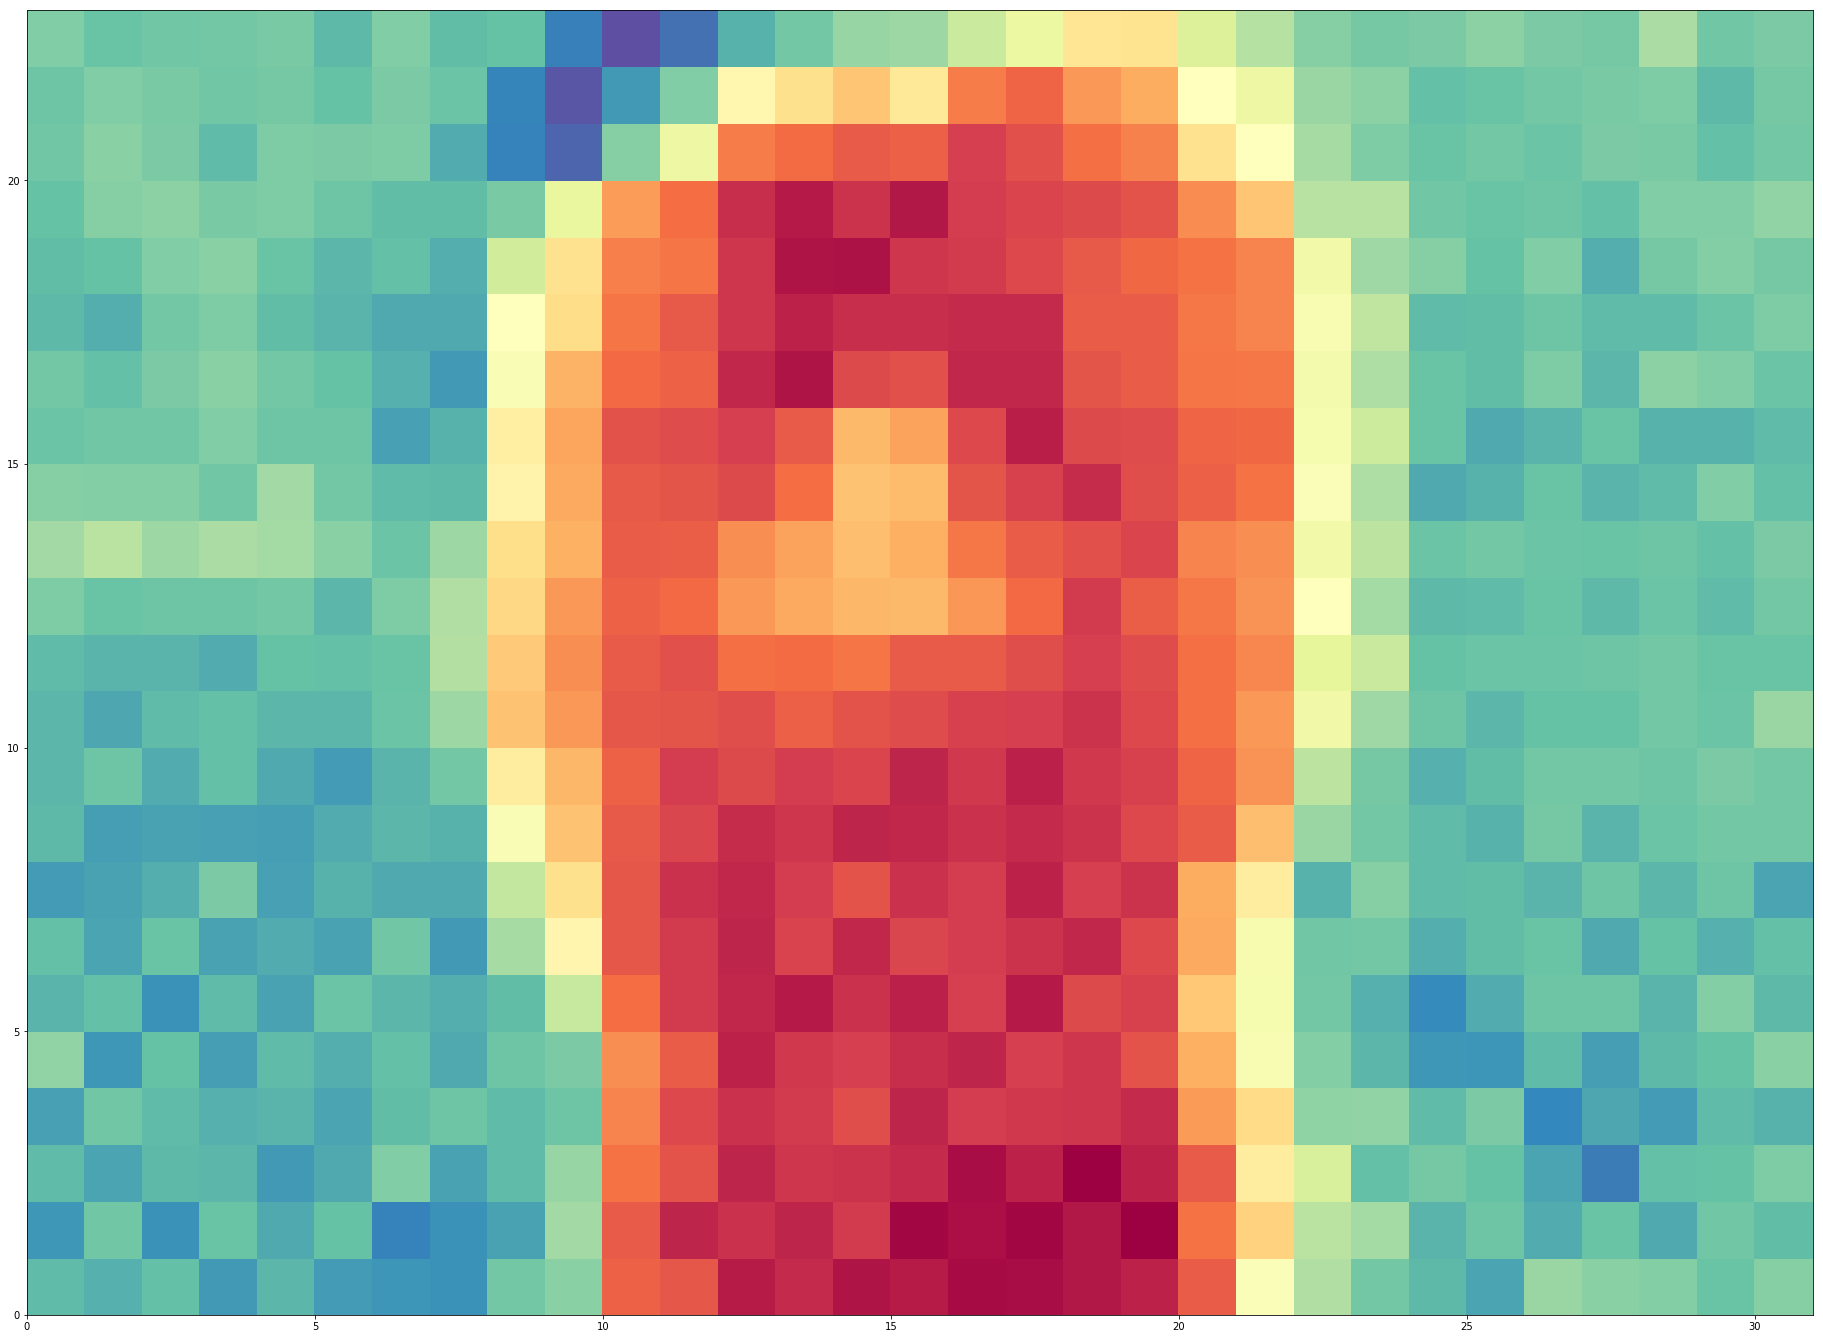

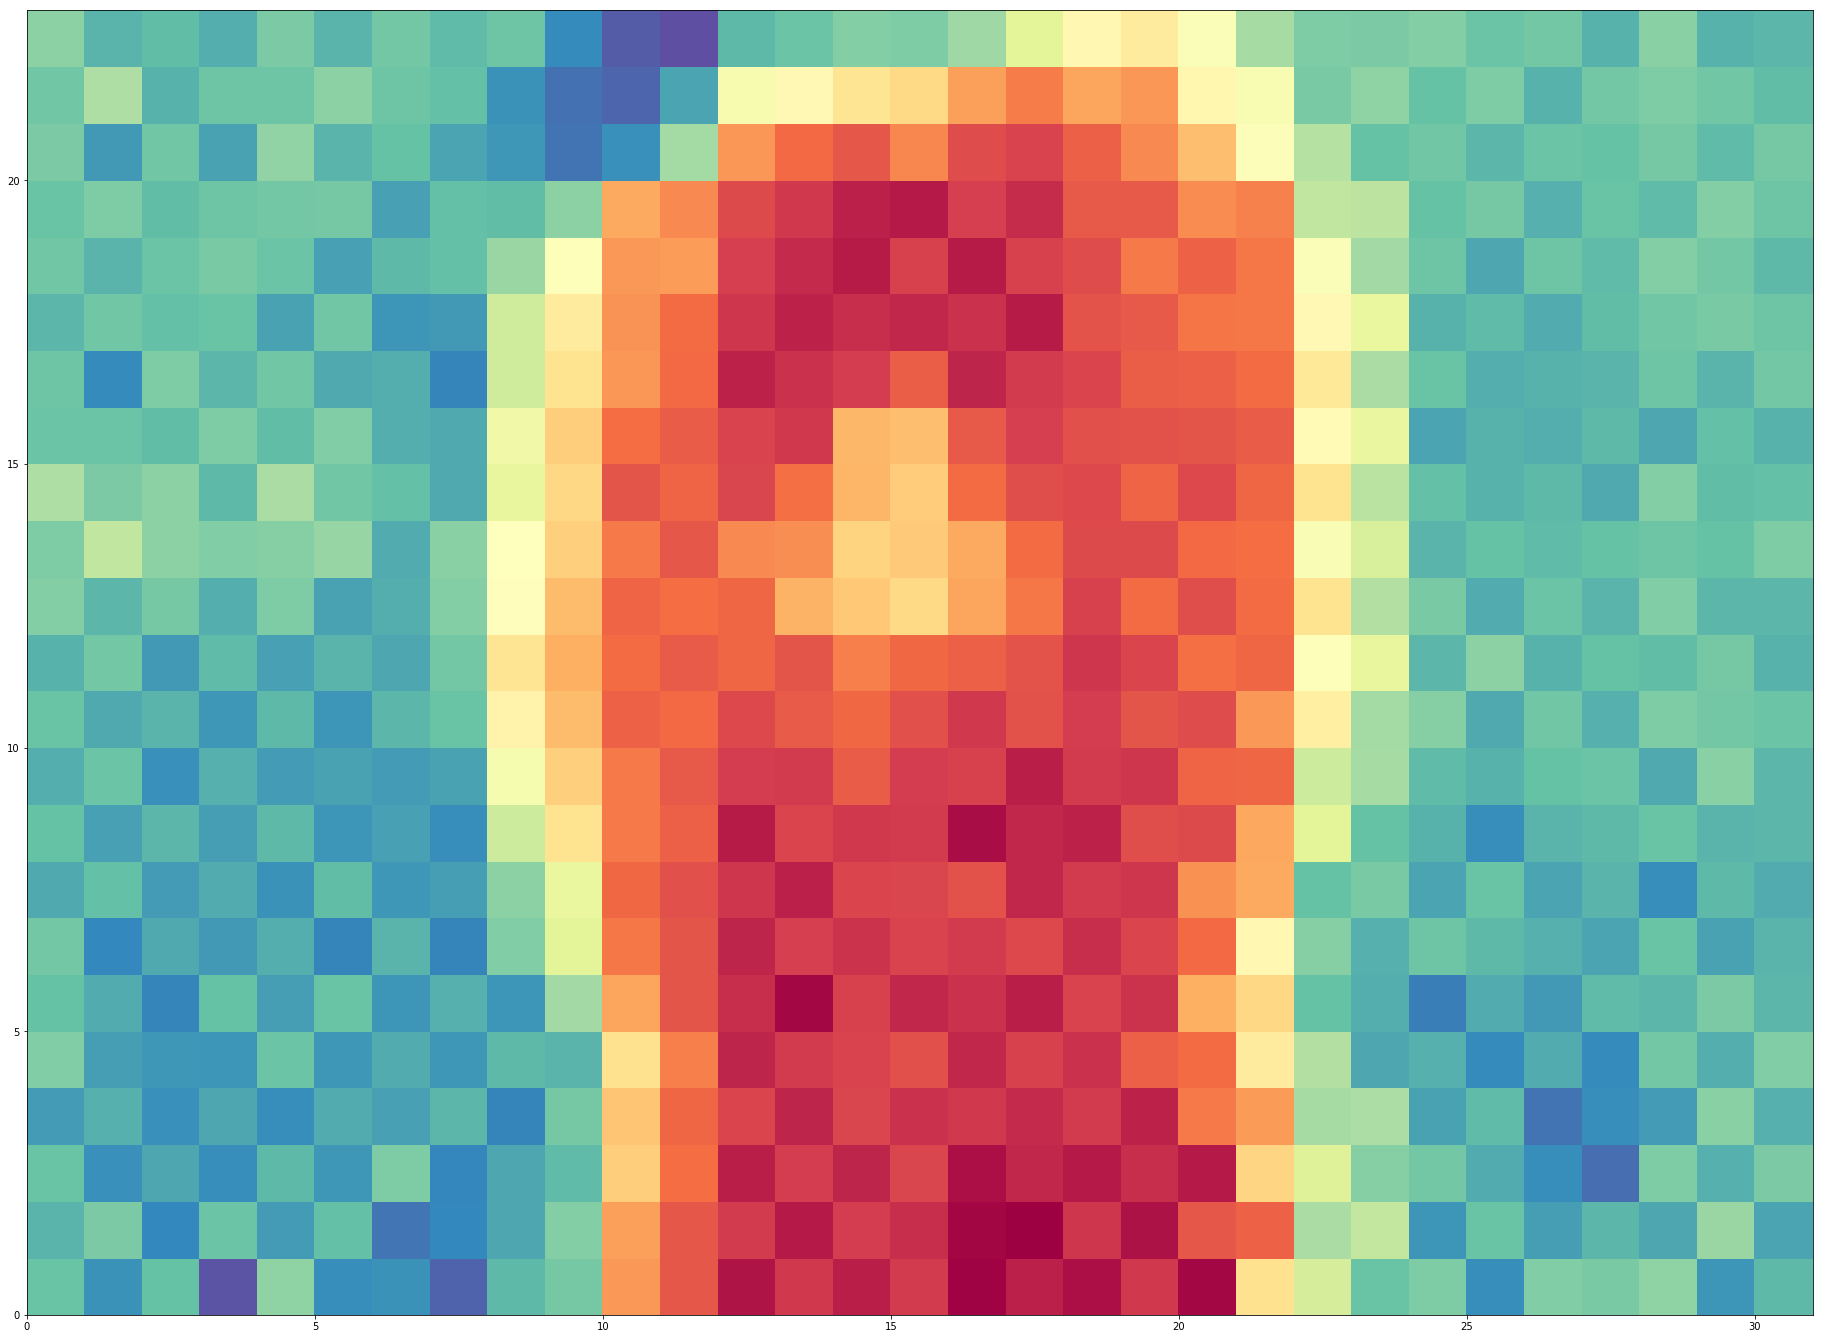

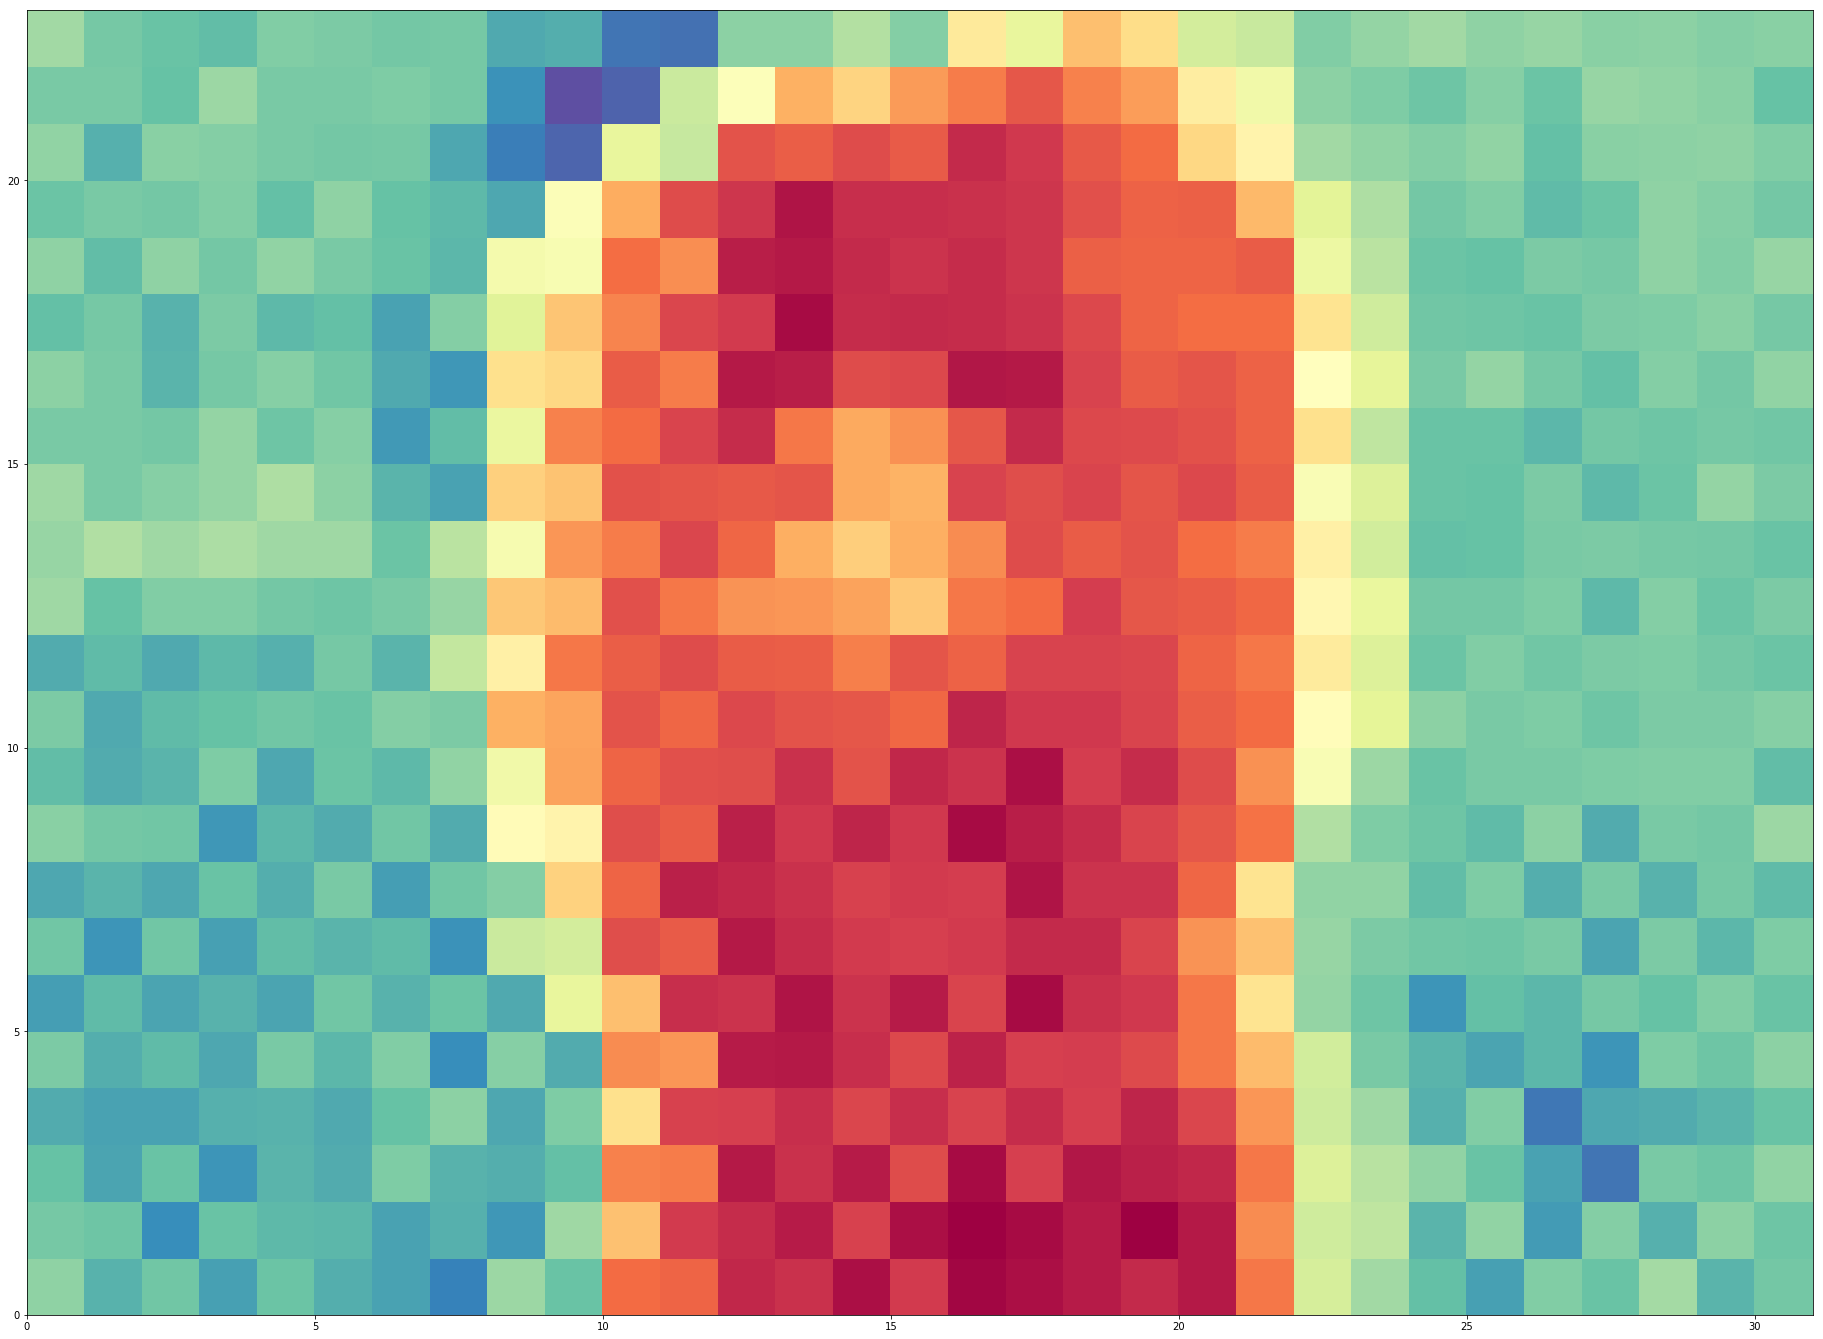

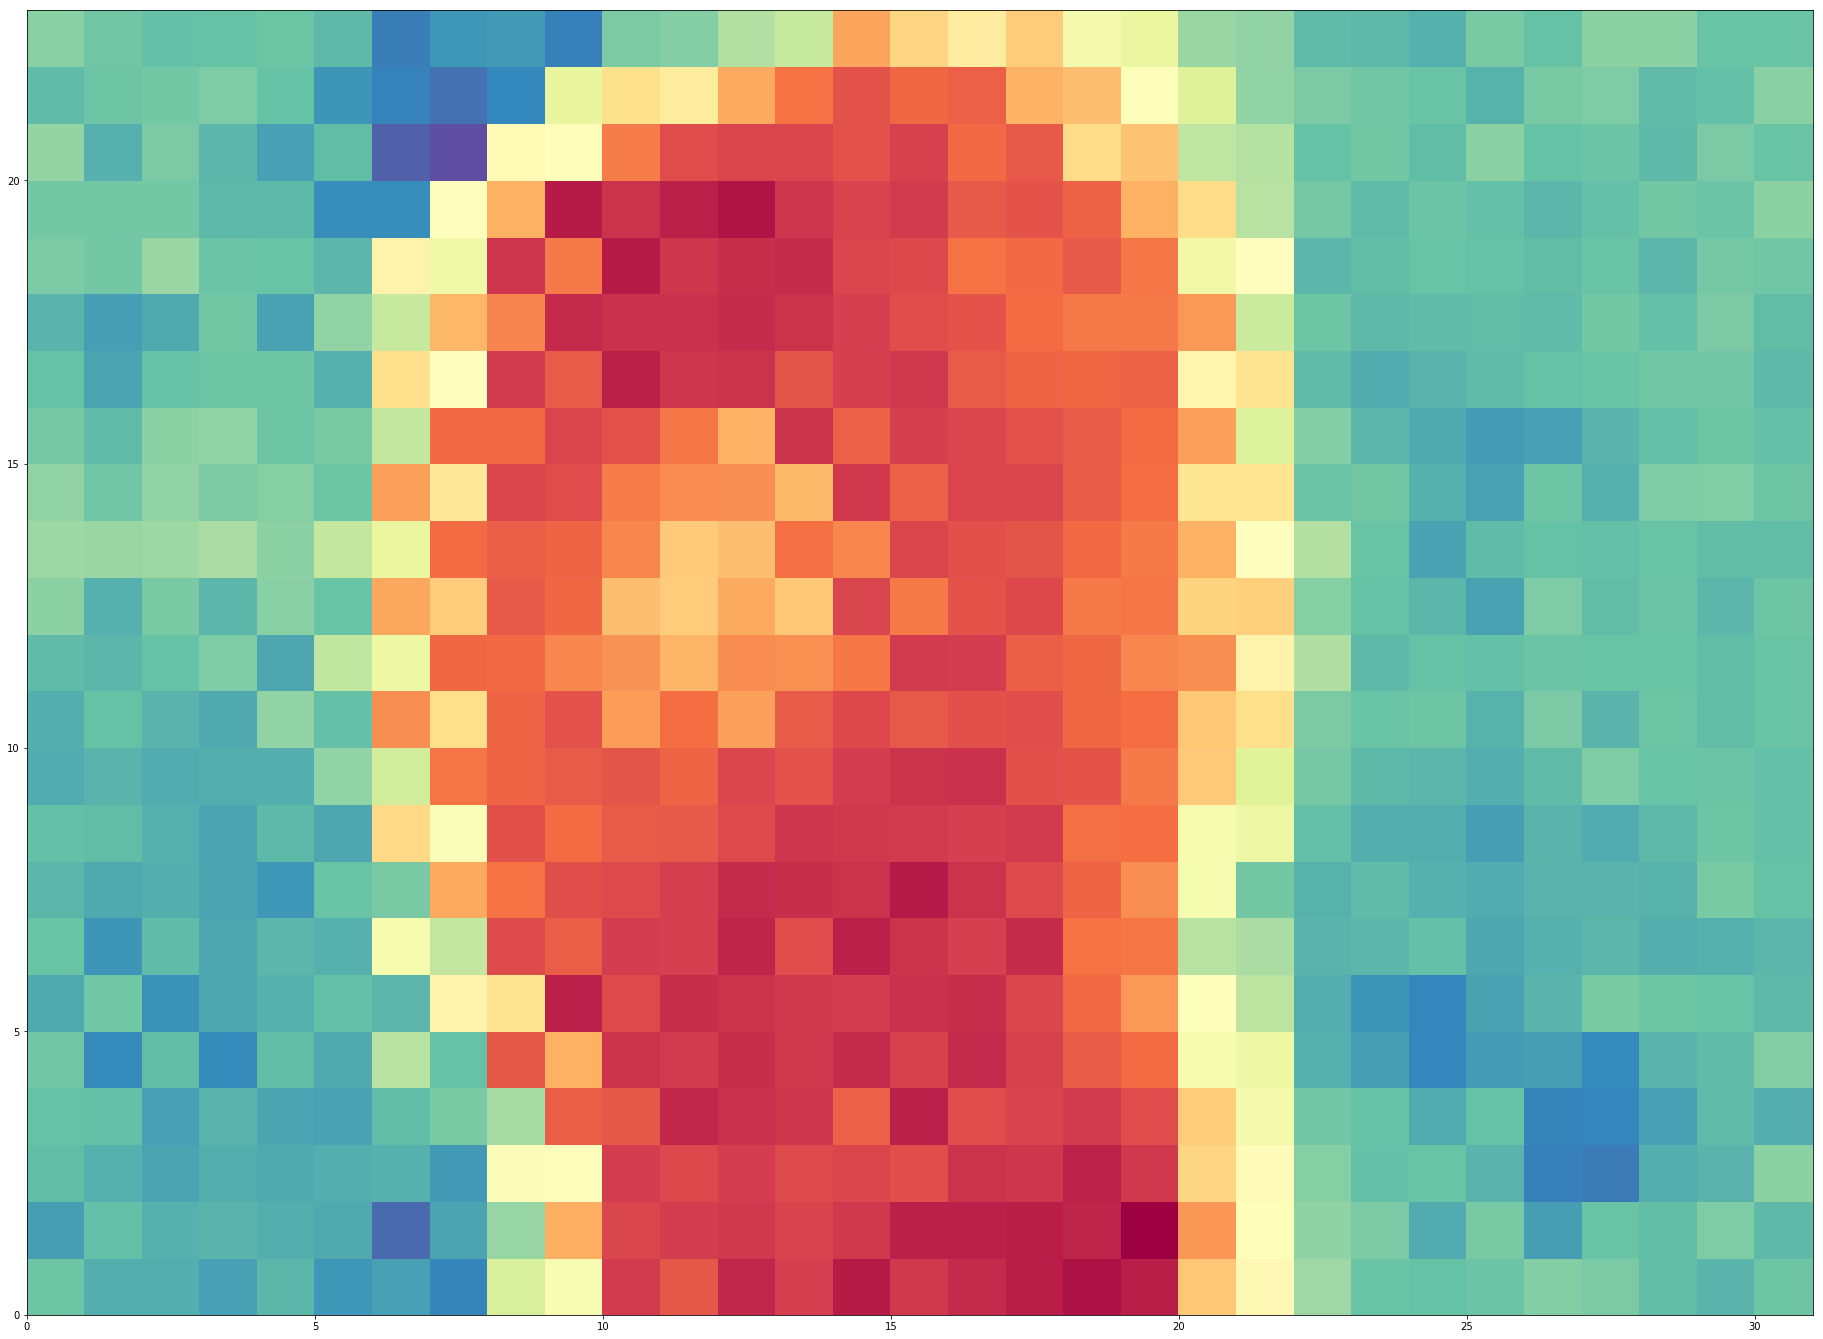

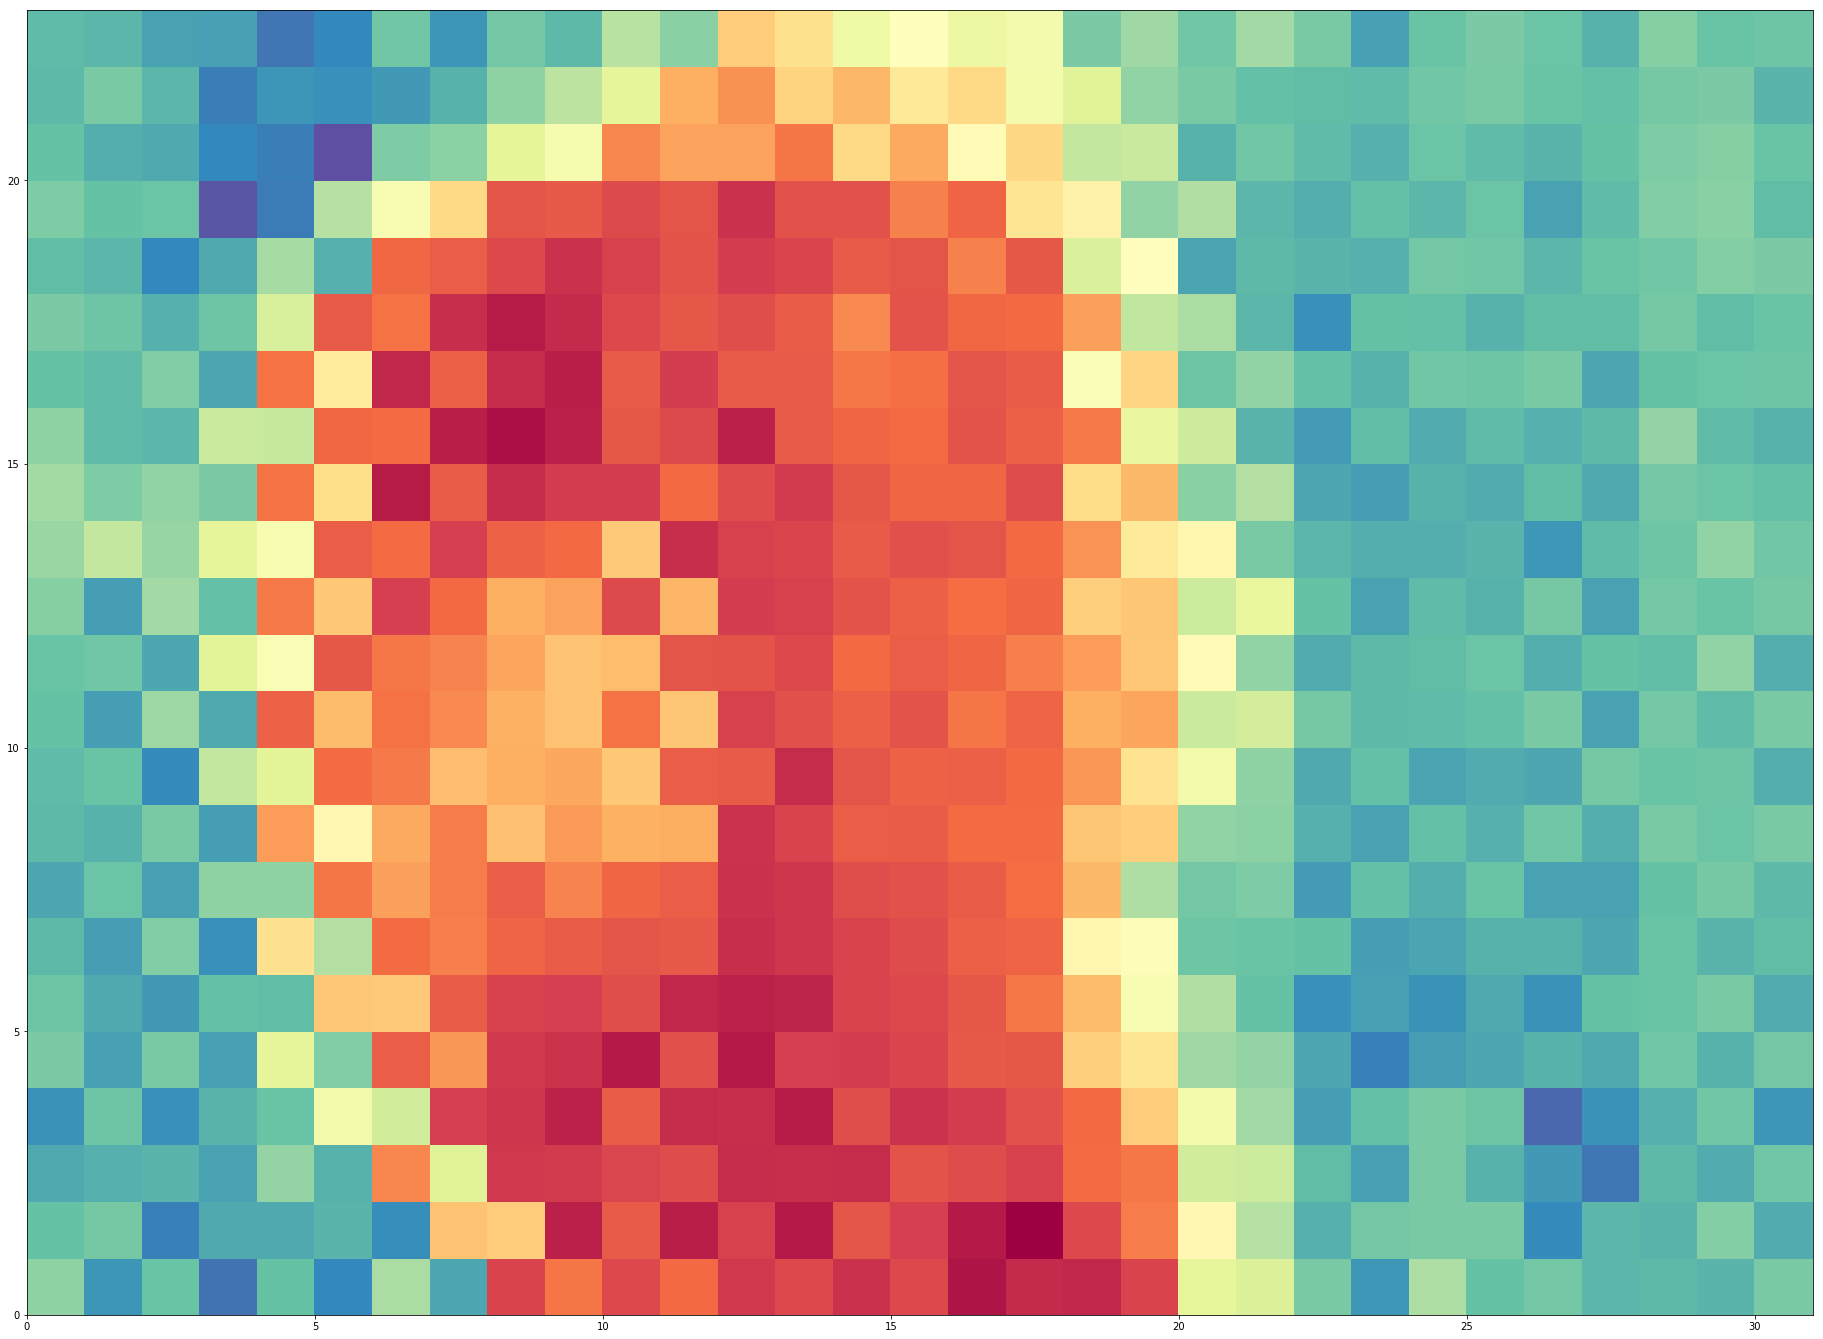

In [43]:
# 按等高线图画出温度分布
X, Y = np.meshgrid(np.linspace(0, 31, 32), np.linspace(0, 23, 24))
tmp_all = np.zeros([24, 32])
for l in range(df_temp.shape[0]):
    temperature = df_temp.iloc[l]
    temperature0 = np.zeros([24, 32]) 
    k = 0

    # 把温度点按照排成32*24,先排列（从右到左），再排行（从下到上）
    for i in range(24):
        for j in range(32):
            temperature0[-1-i, -1-j] = temperature[k] 
            #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
            k += 1         
    
    fig = plt.figure(figsize=(32, 24))
    ax0 = plt.subplot(1, 1, 1)
#     c = plt.contourf(X, Y, temperature0, cmap='Spectral_r', levels=20)
    ax0.pcolormesh(X, Y, temperature0, cmap='Spectral_r')
#         plt.contour(X, Y, tmp_ave, cmap='Spectral_r', levels=20)
#         cb = fig.colorbar(c)
#         cb.set_label('Temperature')
#     plt.title('cold_multiframe_{}'.format(l+1))
    fig.savefig('.\images\colormesh\{}'.format(l+1))

plt.show()

In [44]:
import cv2
b_ave = np.zeros(b1.shape)
g_ave = np.zeros(g1.shape)
r_ave = np.zeros(r1.shape)
for i in range(100):
    img1 = cv2.imread(r'.\images\colormesh\{}.png'.format(i+1), cv2.IMREAD_COLOR)  # 传入一张彩色图片
    b1, g1, r1 = cv2.split(img1)

    b_ave = np.add(b_ave.astype(np.uint32), b1.astype(np.uint32))/ 2
    g_ave = np.add(g_ave.astype(np.uint32), g1.astype(np.uint32))/ 2
    r_ave = np.add(r_ave.astype(np.uint32), r1.astype(np.uint32))/ 2

merged = cv2.merge([b_ave,g_ave,r_ave]) #合并函数

# cv2.imshow("merged 1", merged)
cv2.imwrite(r'.\images\colormesh\merged.png', merged)

# cv2.imshow("exampleB", b)  # 展示B通道图
# cv2.imshow("exampleG", g)
# cv2.imshow("exampleR", r)
cv2.waitKey(0)

-1